<a href="https://colab.research.google.com/github/Leonel58/MACHINE_LEARNING_PYTHON/blob/master/deteccion_anomala.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
/content/maccdc2012_00016.pcap.gz

In [1]:
# ============================================
# PLANTILLA FREELANCE - ANÁLISIS PCAP PROFESIONAL
# CLIENTE: MACCDC 2012
# ARCHIVO: /content/maccdc2012_00016.pcap.gz
# ============================================

import os
import psutil
import subprocess
from datetime import datetime
import json

print("🔍 VERIFICACIÓN DEL ENTORNO Y RECURSOS")
print("="*60)

# Configuración del proyecto
PROJECT_NAME = "maccdc2012_analysis"
PCAP_FILE = "/content/maccdc2012_00016.pcap.gz"
CLIENT = "MACCDC 2012"
DATE = datetime.now().strftime("%Y-%m-%d")

print(f"📋 PROYECTO: {PROJECT_NAME}")
print(f"📁 CLIENTE: {CLIENT}")
print(f"📅 FECHA: {DATE}")
print(f"🔗 ARCHIVO: {PCAP_FILE}")
print("="*60)

# 1. VERIFICAR ARCHIVO
print("\n📂 VERIFICANDO ARCHIVO PCAP...")

if not os.path.exists(PCAP_FILE):
    print(f"❌ ERROR CRÍTICO: Archivo no encontrado")
    print(f"   Ruta: {PCAP_FILE}")
    print("\n📁 Archivos disponibles en /content:")
    !ls -lh /content/*.pcap* 2>/dev/null | head -10
    raise FileNotFoundError(f"Archivo no encontrado: {PCAP_FILE}")

# Obtener información del archivo
file_size_bytes = os.path.getsize(PCAP_FILE)
file_size_gb = file_size_bytes / (1024**3)
file_size_mb = file_size_bytes / (1024**2)

print(f"✅ ARCHIVO ENCONTRADO")
print(f"   • Nombre: {os.path.basename(PCAP_FILE)}")
print(f"   • Tamaño: {file_size_gb:.2f} GB ({file_size_mb:,.0f} MB)")
print(f"   • Última modificación: {datetime.fromtimestamp(os.path.getmtime(PCAP_FILE))}")
print(f"   • Ruta absoluta: {os.path.abspath(PCAP_FILE)}")

# 2. VERIFICAR MEMORIA RAM
print("\n🧠 MEMORIA RAM DISPONIBLE:")
mem = psutil.virtual_memory()
mem_gb = mem.total / (1024**3)
mem_avail_gb = mem.available / (1024**3)
mem_used_percent = mem.percent

print(f"   • Total: {mem_gb:.2f} GB")
print(f"   • Disponible: {mem_avail_gb:.2f} GB")
print(f"   • Usado: {mem_used_percent}%")

if mem_avail_gb < 2:
    print(f"   ⚠️  ADVERTENCIA: Memoria disponible baja")
    print(f"   💡 Recomendación: Reiniciar runtime (Runtime → Restart runtime)")

# 3. VERIFICAR ESPACIO EN DISCO
print("\n💾 ESPACIO EN DISCO:")
!df -h /content | tail -1

# 4. VERIFICAR HERRAMIENTAS
print("\n🔧 VERIFICANDO HERRAMIENTAS...")

# Verificar tshark
tshark_check = subprocess.run("which tshark", shell=True, capture_output=True, text=True)
if tshark_check.returncode == 0:
    tshark_version = subprocess.run("tshark --version | head -1", shell=True, capture_output=True, text=True)
    print(f"   ✅ tshark: {tshark_version.stdout.strip()}")
else:
    print(f"   ❌ tshark no instalado - Se instalará automáticamente")

# Verificar capinfos
capinfos_check = subprocess.run("which capinfos", shell=True, capture_output=True, text=True)
if capinfos_check.returncode == 0:
    print(f"   ✅ capinfos: Disponible")
else:
    print(f"   ❌ capinfos no instalado - Se instalará automáticamente")

# 5. RECOMENDACIONES BASADAS EN TAMAÑO
print("\n💡 RECOMENDACIONES PARA ARCHIVO DE 2GB:")
print(f"   • 📊 MUESTRA RÁPIDA: 1,000 paquetes (30-60 segundos)")
print(f"   • 📈 ANÁLISIS NORMAL: 5,000 paquetes (2-3 minutos)")
print(f"   • 🔬 ANÁLISIS DETALLADO: 10,000 paquetes (5-8 minutos)")
print(f"   • 🚫 COMPLETO: NO RECOMENDADO (>{file_size_gb*500:.0f} MB RAM, >30 minutos)")

# Guardar metadata inicial
os.makedirs("metadata", exist_ok=True)
initial_metadata = {
    'project': PROJECT_NAME,
    'client': CLIENT,
    'file': os.path.basename(PCAP_FILE),
    'size_gb': file_size_gb,
    'size_mb': file_size_mb,
    'timestamp': datetime.now().isoformat(),
    'memory_total_gb': mem_gb,
    'memory_available_gb': mem_avail_gb
}

with open('metadata/initial_check.json', 'w') as f:
    json.dump(initial_metadata, f, indent=2)

print("\n✅ VERIFICACIÓN INICIAL COMPLETADA")
print("📁 Metadata guardada en: metadata/initial_check.json")

🔍 VERIFICACIÓN DEL ENTORNO Y RECURSOS
📋 PROYECTO: maccdc2012_analysis
📁 CLIENTE: MACCDC 2012
📅 FECHA: 2026-02-12
🔗 ARCHIVO: /content/maccdc2012_00016.pcap.gz

📂 VERIFICANDO ARCHIVO PCAP...
✅ ARCHIVO ENCONTRADO
   • Nombre: maccdc2012_00016.pcap.gz
   • Tamaño: 0.19 GB (195 MB)
   • Última modificación: 2026-02-12 00:19:13.149569
   • Ruta absoluta: /content/maccdc2012_00016.pcap.gz

🧠 MEMORIA RAM DISPONIBLE:
   • Total: 12.67 GB
   • Disponible: 11.37 GB
   • Usado: 10.2%

💾 ESPACIO EN DISCO:
overlay         108G   22G   87G  20% /

🔧 VERIFICANDO HERRAMIENTAS...
   ❌ tshark no instalado - Se instalará automáticamente
   ❌ capinfos no instalado - Se instalará automáticamente

💡 RECOMENDACIONES PARA ARCHIVO DE 2GB:
   • 📊 MUESTRA RÁPIDA: 1,000 paquetes (30-60 segundos)
   • 📈 ANÁLISIS NORMAL: 5,000 paquetes (2-3 minutos)
   • 🔬 ANÁLISIS DETALLADO: 10,000 paquetes (5-8 minutos)
   • 🚫 COMPLETO: NO RECOMENDADO (>95 MB RAM, >30 minutos)

✅ VERIFICACIÓN INICIAL COMPLETADA
📁 Metadata guardada

In [2]:
# ============================================
# INSTALACIÓN Y CONFIGURACIÓN DEL ENTORNO
# ============================================

import sys
import subprocess
import warnings
warnings.filterwarnings('ignore')

print("🔧 INSTALANDO HERRAMIENTAS Y DEPENDENCIAS...")
print("="*60)

# 1. INSTALAR HERRAMIENTAS DEL SISTEMA
print("\n📦 HERRAMIENTAS DEL SISTEMA:")

tools = [
    ("tshark", "wireshark-common"),
    ("capinfos", "wireshark-common"),
    ("mergecap", "wireshark-common")
]

!apt-get update -qq

for tool, package in tools:
    print(f"   • Instalando {tool}...")
    !apt-get install -y {package} -qq

print("   ✅ Herramientas del sistema instaladas")

# 2. INSTALAR LIBRERÍAS DE PYTHON
print("\n🐍 LIBRERÍAS DE PYTHON:")

python_packages = [
    "pandas==1.5.3",
    "numpy==1.24.3",
    "matplotlib==3.7.1",
    "seaborn==0.12.2",
    "plotly==5.15.0",
    "scikit-learn==1.3.0",
    "scipy==1.10.1",
    "tqdm==4.65.0",
    "joblib==1.2.0",
    "psutil==5.9.5"
]

for package in python_packages:
    print(f"   • Instalando {package}...")
    !pip install {package} -q

print("   ✅ Librerías de Python instaladas")

# 3. IMPORTACIONES
print("\n📚 IMPORTANDO LIBRERÍAS...")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from tqdm import tqdm
import gc
import json
import pickle
from datetime import datetime, timedelta
from collections import Counter, defaultdict
import psutil
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.4f}'.format)

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
sns.set_context("notebook", font_scale=1.2)

print("   ✅ Librerías importadas correctamente")

# 4. VERIFICACIÓN FINAL
print("\n🔍 VERIFICANDO INSTALACIÓN:")

# Verificar tshark
result = subprocess.run("tshark --version | head -1", shell=True, capture_output=True, text=True)
print(f"   • tshark: {result.stdout.strip()}")

# Verificar pandas
print(f"   • pandas: {pd.__version__}")
print(f"   • numpy: {np.__version__}")
print(f"   • matplotlib: {plt.matplotlib.__version__}")

# 5. CREAR ESTRUCTURA DE DIRECTORIOS
print("\n📁 CREANDO ESTRUCTURA DEL PROYECTO:")

directories = [
    'data/raw',
    'data/processed',
    'data/samples',
    'reports/figures',
    'reports/html',
    'reports/json',
    'models',
    'notebooks',
    'src',
    'config',
    'logs',
    'visualizations/interactive',
    'visualizations/static',
    'metadata'
]

for dir_path in directories:
    os.makedirs(dir_path, exist_ok=True)
    print(f"   ✅ {dir_path}/")

print("\n✅ ENTORNO CONFIGURADO CORRECTAMENTE")
print(f"📅 {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

🔧 INSTALANDO HERRAMIENTAS Y DEPENDENCIAS...

📦 HERRAMIENTAS DEL SISTEMA:
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
   • Instalando tshark...
Extracting templates from packages: 100%
Preconfiguring packages ...
Selecting previously unselected package libdouble-conversion3:amd64.
(Reading database ... 117540 files and directories currently installed.)
Preparing to unpack .../00-libdouble-conversion3_3.1.7-4_amd64.deb ...
Unpacking libdouble-conversion3:amd64 (3.1.7-4) ...
Selecting previously unselected package libqt5core5a:amd64.
Preparing to unpack .../01-libqt5core5a_5.15.3+dfsg-2ubuntu0.2_amd64.deb ...
Unpacking libqt5core5a:amd64 (5.15.3+dfsg-2ubuntu0.2) ...
Selecting previously unselected package libevdev2:amd64.
Preparing to unpack .../02-libevdev2_1.12.1+dfsg-1_amd64.deb ...
Unpacking libevdev2:amd64 (1.12.1+dfsg-1) ...
Selecting previ

In [3]:
# ============================================
# SISTEMA DE LOGGING PROFESIONAL
# ============================================

import logging
from logging.handlers import RotatingFileHandler

class ProjectLogger:
    """Sistema de logging profesional para proyectos freelance"""

    def __init__(self, project_name, log_level=logging.INFO):
        self.project_name = project_name
        self.start_time = datetime.now()

        # Crear directorio de logs
        os.makedirs('logs', exist_ok=True)

        # Configurar logger
        self.logger = logging.getLogger(project_name)
        self.logger.setLevel(log_level)

        # Formato
        formatter = logging.Formatter(
            '%(asctime)s | %(levelname)8s | %(message)s',
            datefmt='%Y-%m-%d %H:%M:%S'
        )

        # Handler para archivo (rotación)
        log_file = f'logs/{project_name}_{self.start_time.strftime("%Y%m%d")}.log'
        file_handler = RotatingFileHandler(
            log_file, maxBytes=10*1024*1024, backupCount=5
        )
        file_handler.setFormatter(formatter)
        self.logger.addHandler(file_handler)

        # Handler para consola
        console_handler = logging.StreamHandler()
        console_handler.setFormatter(formatter)
        self.logger.addHandler(console_handler)

        # Métricas
        self.metrics = {
            'start_time': self.start_time.isoformat(),
            'project': project_name,
            'steps_completed': [],
            'errors': [],
            'warnings': []
        }

        self.info(f"🚀 Iniciando proyecto: {project_name}")
        self.info(f"📁 Archivo: {PCAP_FILE}")
        self.info(f"📅 Fecha: {self.start_time.strftime('%Y-%m-%d %H:%M:%S')}")

    def info(self, message):
        self.logger.info(message)

    def warning(self, message):
        self.logger.warning(message)
        self.metrics['warnings'].append({
            'time': datetime.now().isoformat(),
            'message': message
        })

    def error(self, message):
        self.logger.error(message)
        self.metrics['errors'].append({
            'time': datetime.now().isoformat(),
            'message': message
        })

    def step(self, step_name):
        self.info(f"▶️ STEP: {step_name}")
        self.metrics['steps_completed'].append({
            'step': step_name,
            'time': datetime.now().isoformat()
        })

    def summary(self):
        elapsed = datetime.now() - self.start_time
        self.info(f"⏱️ Tiempo total: {elapsed}")
        self.info(f"📊 Pasos completados: {len(self.metrics['steps_completed'])}")
        self.info(f"⚠️  Advertencias: {len(self.metrics['warnings'])}")
        self.info(f"❌ Errores: {len(self.metrics['errors'])}")

        # Guardar métricas
        self.metrics['end_time'] = datetime.now().isoformat()
        self.metrics['elapsed_seconds'] = elapsed.total_seconds()

        with open('metadata/project_metrics.json', 'w') as f:
            json.dump(self.metrics, f, indent=2)

        return self.metrics

# Inicializar logger
logger = ProjectLogger(PROJECT_NAME)
logger.step("Configuración inicial completada")

2026-02-12 00:45:14 |     INFO | 🚀 Iniciando proyecto: maccdc2012_analysis
INFO:maccdc2012_analysis:🚀 Iniciando proyecto: maccdc2012_analysis
2026-02-12 00:45:14 |     INFO | 📁 Archivo: /content/maccdc2012_00016.pcap.gz
INFO:maccdc2012_analysis:📁 Archivo: /content/maccdc2012_00016.pcap.gz
2026-02-12 00:45:14 |     INFO | 📅 Fecha: 2026-02-12 00:45:14
INFO:maccdc2012_analysis:📅 Fecha: 2026-02-12 00:45:14
2026-02-12 00:45:14 |     INFO | ▶️ STEP: Configuración inicial completada
INFO:maccdc2012_analysis:▶️ STEP: Configuración inicial completada


In [4]:
# ============================================
# ANÁLISIS RÁPIDO DEL PCAP CON CAPINFOS
# ============================================

logger.step("Análisis con capinfos")

print("\n" + "="*60)
print("📊 ANÁLISIS DEL ARCHIVO PCAP CON CAPINFOS")
print("="*60)

def analyze_with_capinfos(pcap_file):
    """Extrae toda la información posible con capinfos"""

    results = {}

    # Comando para archivos .gz
    if pcap_file.endswith('.gz'):
        cmd = f"zcat {pcap_file} | capinfos - -c -d -u -a -e -y -s -t -T -r -S 2>/dev/null"
    else:
        cmd = f"capinfos {pcap_file} -c -d -u -a -e -y -s -t -T -r -S 2>/dev/null"

    try:
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True, timeout=60)

        if result.stdout:
            lines = result.stdout.strip().split('\n')
            for line in lines:
                if ':' in line:
                    key, value = line.split(':', 1)
                    key = key.strip().lower().replace(' ', '_')
                    value = value.strip()
                    results[key] = value

        logger.info(f"Capinfos: {len(results)} campos extraídos")

    except Exception as e:
        logger.error(f"Error en capinfos: {e}")

    return results

# Ejecutar análisis
capinfos_data = analyze_with_capinfos(PCAP_FILE)

# Mostrar resultados
if capinfos_data:
    print("\n📋 INFORMACIÓN DE CAPTURA:")
    print("-"*40)

    # Información básica
    if 'number_of_packets' in capinfos_data:
        print(f"   • Paquetes totales: {capinfos_data['number_of_packets']}")

    if 'capture_duration' in capinfos_data:
        print(f"   • Duración: {capinfos_data['capture_duration']}")

    if 'start_time' in capinfos_data:
        print(f"   • Inicio: {capinfos_data['start_time']}")

    if 'end_time' in capinfos_data:
        print(f"   • Fin: {capinfos_data['end_time']}")

    if 'data_byte_rate' in capinfos_data:
        print(f"   • Tasa de datos: {capinfos_data['data_byte_rate']}")

    if 'data_bit_rate' in capinfos_data:
        print(f"   • Tasa de bits: {capinfos_data['data_bit_rate']}")

    if 'average_packet_size' in capinfos_data:
        print(f"   • Tamaño promedio: {capinfos_data['average_packet_size']}")

    if 'average_packet_rate' in capinfos_data:
        print(f"   • Tasa de paquetes: {capinfos_data['average_packet_rate']}")

    if 'file_encapsulation' in capinfos_data:
        print(f"   • Encapsulación: {capinfos_data['file_encapsulation']}")

    # Guardar resultados
    with open('metadata/capinfos_analysis.json', 'w') as f:
        json.dump(capinfos_data, f, indent=2)

    print(f"\n✅ Datos guardados en: metadata/capinfos_analysis.json")

else:
    print("❌ No se pudo obtener información con capinfos")

2026-02-12 00:47:04 |     INFO | ▶️ STEP: Análisis con capinfos
INFO:maccdc2012_analysis:▶️ STEP: Análisis con capinfos



📊 ANÁLISIS DEL ARCHIVO PCAP CON CAPINFOS


2026-02-12 00:47:09 |     INFO | Capinfos: 0 campos extraídos
INFO:maccdc2012_analysis:Capinfos: 0 campos extraídos


❌ No se pudo obtener información con capinfos


In [5]:
# ============================================
# MUESTREO RÁPIDO DE PROTOCOLOS (1000 paquetes)
# ============================================

logger.step("Muestreo rápido de protocolos")

print("\n" + "="*60)
print("📡 MUESTREO DE PROTOCOLOS - 1000 PAQUETES")
print("="*60)

def sample_protocols(pcap_file, n_samples=1000):
    """Toma una muestra rápida para identificar protocolos"""

    cmd = f"tshark -r {pcap_file} -c {n_samples} -T fields -e frame.protocols -e ip.proto -e tcp.port -e udp.port 2>/dev/null"

    try:
        result = subprocess.run(cmd, shell=True, capture_output=True, text=True, timeout=30)

        if result.stdout:
            lines = result.stdout.strip().split('\n')

            # Contar protocolos
            proto_counter = Counter()
            tcp_counter = Counter()
            udp_counter = Counter()

            for line in lines:
                if line:
                    parts = line.split('\t')

                    if len(parts) > 0:
                        # Protocolos completos
                        protocols = parts[0].split(':')
                        for p in protocols:
                            if p:
                                proto_counter[p] += 1

                    # IP Protocol
                    if len(parts) > 1 and parts[1]:
                        proto_num = parts[1]
                        proto_map = {'6': 'TCP', '17': 'UDP', '1': 'ICMP', '2': 'IGMP'}
                        proto_name = proto_map.get(proto_num, f'PROTO-{proto_num}')
                        proto_counter[proto_name] += 1

                    # Puertos TCP
                    if len(parts) > 2 and parts[2]:
                        ports = parts[2].split(',')
                        for port in ports:
                            if port:
                                try:
                                    tcp_counter[int(port)] += 1
                                except:
                                    pass

                    # Puertos UDP
                    if len(parts) > 3 and parts[3]:
                        ports = parts[3].split(',')
                        for port in ports:
                            if port:
                                try:
                                    udp_counter[int(port)] += 1
                                except:
                                    pass

            return {
                'protocols': dict(proto_counter.most_common(15)),
                'tcp_ports': dict(tcp_counter.most_common(10)),
                'udp_ports': dict(udp_counter.most_common(10)),
                'total_samples': len(lines)
            }

    except Exception as e:
        logger.error(f"Error en muestreo: {e}")

    return None

# Ejecutar muestreo
sample_results = sample_protocols(PCAP_FILE)

if sample_results:
    print(f"\n📊 PROTOCOLOS DETECTADOS (muestra {sample_results['total_samples']} paquetes):")
    print("-"*40)

    for proto, count in list(sample_results['protocols'].items())[:10]:
        pct = (count / sample_results['total_samples']) * 100
        print(f"   • {proto:15s}: {count:4d} paquetes ({pct:.1f}%)")

    if sample_results['tcp_ports']:
        print(f"\n🔌 PUERTOS TCP MÁS COMUNES:")
        for port, count in list(sample_results['tcp_ports'].items())[:5]:
            print(f"   • Puerto {port}: {count} conexiones")

    if sample_results['udp_ports']:
        print(f"\n🔌 PUERTOS UDP MÁS COMUNES:")
        for port, count in list(sample_results['udp_ports'].items())[:5]:
            print(f"   • Puerto {port}: {count} conexiones")

    # Guardar resultados
    with open('metadata/protocol_sampling.json', 'w') as f:
        json.dump(sample_results, f, indent=2)

    print(f"\n✅ Muestreo guardado en: metadata/protocol_sampling.json")

else:
    print("❌ No se pudo realizar el muestreo")

2026-02-12 00:47:30 |     INFO | ▶️ STEP: Muestreo rápido de protocolos
INFO:maccdc2012_analysis:▶️ STEP: Muestreo rápido de protocolos



📡 MUESTREO DE PROTOCOLOS - 1000 PAQUETES
❌ No se pudo realizar el muestreo


In [6]:
# ============================================
# CÁLCULO DE MUESTRA ÓPTIMA PARA ARCHIVO DE 2GB
# ============================================

logger.step("Cálculo de muestra óptima")

print("\n" + "="*60)
print("🎯 CONFIGURACIÓN DE MUESTREO PARA ARCHIVO DE 2GB")
print("="*60)

class SamplingOptimizer:
    """Calcula la muestra óptima basada en recursos disponibles"""

    def __init__(self, file_size_gb, available_memory_gb, estimated_packets=None):
        self.file_size_gb = file_size_gb
        self.available_memory_gb = available_memory_gb
        self.estimated_packets = estimated_packets or (file_size_gb * 1000000)  # Estimación
        self.recommendations = {}

    def calculate_optimal_sample(self):
        """Calcula el tamaño de muestra óptimo"""

        # Factor de memoria (usar máximo 30% de RAM disponible)
        memory_budget_gb = self.available_memory_gb * 0.3

        # Estimación: 1KB por paquete en memoria
        packets_by_memory = int(memory_budget_gb * 1024 * 1024)  # Convertir a KB

        # Factor de tiempo (estimación: 1000 paquetes/segundo)
        time_budget_minutes = 5  # Presupuesto de tiempo (5 minutos)
        packets_by_time = time_budget_minutes * 60 * 1000

        # Factor de representatividad (regla de oro: 0.1% para poblaciones grandes)
        representative_sample = int(self.estimated_packets * 0.001)

        # Tomar el mínimo de las restricciones
        optimal_sample = min(packets_by_memory, packets_by_time, representative_sample)

        # Ajustar a rangos razonables
        if optimal_sample < 1000:
            optimal_sample = 1000
        elif optimal_sample > 50000:
            optimal_sample = 50000

        self.recommendations = {
            'file_size_gb': self.file_size_gb,
            'available_memory_gb': self.available_memory_gb,
            'estimated_packets': self.estimated_packets,
            'memory_budget_gb': memory_budget_gb,
            'max_by_memory': packets_by_memory,
            'max_by_time': packets_by_time,
            'representative_sample': representative_sample,
            'optimal_sample': optimal_sample,
            'sampling_ratio': optimal_sample / self.estimated_packets if self.estimated_packets else 0.001
        }

        return self.recommendations

    def get_recommendation_text(self):
        """Genera texto de recomendación"""

        rec = self.recommendations

        text = f"""
📊 RECOMENDACIÓN DE MUESTREO:
{'='*50}

📁 ARCHIVO: {rec['file_size_gb']:.2f} GB
🧠 MEMORIA DISPONIBLE: {rec['available_memory_gb']:.2f} GB
📦 PAQUETES ESTIMADOS: {rec['estimated_packets']:,}

🔬 FACTORES CONSIDERADOS:
   • Límite de memoria (30% RAM): {rec['max_by_memory']:,} paquetes
   • Límite de tiempo (5 min): {rec['max_by_time']:,} paquetes
   • Muestra representativa (0.1%): {rec['representative_sample']:,} paquetes

🎯 MUESTRA ÓPTIMA RECOMENDADA: {rec['optimal_sample']:,} PAQUETES
   • Ratio de muestreo: {rec['sampling_ratio']*100:.4f}%
   • Memoria estimada: {rec['optimal_sample'] / 1024:.1f} MB
   • Tiempo estimado: {rec['optimal_sample'] / 1000 / 60:.1f} minutos

💡 RECOMENDACIONES:
   • ANÁLISIS RÁPIDO: {min(1000, rec['optimal_sample']):,} paquetes
   • ANÁLISIS NORMAL: {rec['optimal_sample']:,} paquetes
   • ANÁLISIS DETALLADO: {min(rec['optimal_sample']*2, 20000):,} paquetes
   • NO RECOMENDADO: Procesar todos los paquetes ({rec['estimated_packets']:,})
"""
        return text

# Obtener paquetes estimados
estimated_packets = None
if 'number_of_packets' in capinfos_data:
    try:
        estimated_packets = int(capinfos_data['number_of_packets'])
    except:
        estimated_packets = int(file_size_gb * 1000000)  # Estimación
else:
    estimated_packets = int(file_size_gb * 1000000)

# Calcular muestra óptima
optimizer = SamplingOptimizer(
    file_size_gb=file_size_gb,
    available_memory_gb=mem_avail_gb,
    estimated_packets=estimated_packets
)

optimal_config = optimizer.calculate_optimal_sample()
print(optimizer.get_recommendation_text())

# Guardar configuración
with open('config/sampling_config.json', 'w') as f:
    json.dump(optimal_config, f, indent=2)

logger.info(f"Muestra óptima calculada: {optimal_config['optimal_sample']} paquetes")

2026-02-12 00:47:50 |     INFO | ▶️ STEP: Cálculo de muestra óptima
INFO:maccdc2012_analysis:▶️ STEP: Cálculo de muestra óptima
2026-02-12 00:47:50 |     INFO | Muestra óptima calculada: 1000 paquetes
INFO:maccdc2012_analysis:Muestra óptima calculada: 1000 paquetes



🎯 CONFIGURACIÓN DE MUESTREO PARA ARCHIVO DE 2GB

📊 RECOMENDACIÓN DE MUESTREO:

📁 ARCHIVO: 0.19 GB
🧠 MEMORIA DISPONIBLE: 11.37 GB
📦 PAQUETES ESTIMADOS: 190,075

🔬 FACTORES CONSIDERADOS:
   • Límite de memoria (30% RAM): 3,578,120 paquetes
   • Límite de tiempo (5 min): 300,000 paquetes
   • Muestra representativa (0.1%): 190 paquetes

🎯 MUESTRA ÓPTIMA RECOMENDADA: 1,000 PAQUETES
   • Ratio de muestreo: 0.5261%
   • Memoria estimada: 1.0 MB
   • Tiempo estimado: 0.0 minutos

💡 RECOMENDACIONES:
   • ANÁLISIS RÁPIDO: 1,000 paquetes
   • ANÁLISIS NORMAL: 1,000 paquetes
   • ANÁLISIS DETALLADO: 2,000 paquetes
   • NO RECOMENDADO: Procesar todos los paquetes (190,075)



In [7]:
# ============================================
# SELECCIÓN INTERACTIVA DEL TAMAÑO DE MUESTRA
# ============================================

print("\n" + "="*60)
print("🎮 SELECCIÓN DEL TAMAÑO DE MUESTRA")
print("="*60)

print(f"\n📋 OPCIONES DISPONIBLES BASADAS EN EL ANÁLISIS:")
print(f"   1. 🚀 EXPRESS: 500 paquetes  (30 segundos, 0.5 MB RAM)")
print(f"   2. ⚡ RÁPIDO: 1,000 paquetes (1 minuto, 1 MB RAM)")
print(f"   3. 📊 NORMAL: 5,000 paquetes (3 minutos, 5 MB RAM)")
print(f"   4. 🔬 DETALLADO: 10,000 paquetes (6 minutos, 10 MB RAM)")
print(f"   5. 🎯 ÓPTIMO: {optimal_config['optimal_sample']:,} paquetes ({optimal_config['optimal_sample']/1000/60:.1f} minutos)")
print(f"   6. ⚙️  PERSONALIZADO: Especificar número")

print("\n⚠️  ADVERTENCIA PARA ARCHIVO DE 2GB:")
print("   • >20,000 paquetes: Puede exceder límite de memoria")
print("   • >50,000 paquetes: Riesgo de crash en Colab")
print("   • >100,000 paquetes: NO RECOMENDADO")

# Selección del usuario
print("\n" + "-"*40)
choice = input("🎯 Selecciona una opción (1-6): ").strip()

sample_size_map = {
    '1': 500,
    '2': 1000,
    '3': 5000,
    '4': 10000,
    '5': optimal_config['optimal_sample']
}

if choice in sample_size_map:
    N_PACKETS = sample_size_map[choice]
    print(f"\n✅ Seleccionado: {N_PACKETS:,} paquetes")

elif choice == '6':
    try:
        custom = int(input("📝 Ingresa el número de paquetes: "))
        N_PACKETS = min(max(custom, 100), 50000)  # Limitar entre 100 y 50000
        print(f"\n✅ Personalizado: {N_PACKETS:,} paquetes")
    except:
        N_PACKETS = optimal_config['optimal_sample']
        print(f"\n⚠️  Usando valor óptimo: {N_PACKETS:,} paquetes")
else:
    N_PACKETS = optimal_config['optimal_sample']
    print(f"\n⚠️  Usando valor óptimo: {N_PACKETS:,} paquetes")

# Confirmación final
print("\n" + "="*60)
print(f"🎯 CONFIGURACIÓN FINAL:")
print(f"   • Archivo: {os.path.basename(PCAP_FILE)}")
print(f"   • Tamaño: {file_size_gb:.2f} GB")
print(f"   • Paquetes a procesar: {N_PACKETS:,}")
print(f"   • Memoria estimada: {N_PACKETS / 1024:.1f} MB")
print(f"   • Tiempo estimado: {N_PACKETS / 1000 / 60:.1f} minutos")
print("="*60)

# Guardar configuración
config = {
    'pcap_file': PCAP_FILE,
    'n_packets': N_PACKETS,
    'timestamp': datetime.now().isoformat(),
    'file_size_gb': file_size_gb,
    'sampling_ratio': N_PACKETS / estimated_packets if estimated_packets else 0.001
}

with open('config/analysis_config.json', 'w') as f:
    json.dump(config, f, indent=2)

logger.info(f"Configuración guardada: {N_PACKETS} paquetes")


🎮 SELECCIÓN DEL TAMAÑO DE MUESTRA

📋 OPCIONES DISPONIBLES BASADAS EN EL ANÁLISIS:
   1. 🚀 EXPRESS: 500 paquetes  (30 segundos, 0.5 MB RAM)
   2. ⚡ RÁPIDO: 1,000 paquetes (1 minuto, 1 MB RAM)
   3. 📊 NORMAL: 5,000 paquetes (3 minutos, 5 MB RAM)
   4. 🔬 DETALLADO: 10,000 paquetes (6 minutos, 10 MB RAM)
   5. 🎯 ÓPTIMO: 1,000 paquetes (0.0 minutos)
   6. ⚙️  PERSONALIZADO: Especificar número

⚠️  ADVERTENCIA PARA ARCHIVO DE 2GB:
   • >20,000 paquetes: Puede exceder límite de memoria
   • >50,000 paquetes: Riesgo de crash en Colab
   • >100,000 paquetes: NO RECOMENDADO

----------------------------------------
🎯 Selecciona una opción (1-6): 2


2026-02-12 00:48:41 |     INFO | Configuración guardada: 1000 paquetes
INFO:maccdc2012_analysis:Configuración guardada: 1000 paquetes



✅ Seleccionado: 1,000 paquetes

🎯 CONFIGURACIÓN FINAL:
   • Archivo: maccdc2012_00016.pcap.gz
   • Tamaño: 0.19 GB
   • Paquetes a procesar: 1,000
   • Memoria estimada: 1.0 MB
   • Tiempo estimado: 0.0 minutos


In [9]:
# ============================================
# MOTOR DE CARGA OPTIMIZADO PARA PCAP DE 2GB
# ============================================

logger.step("Inicializando motor de carga")

class PCAPLoader:
    """Cargador profesional de archivos PCAP optimizado para grandes volúmenes"""

    def __init__(self, pcap_file, n_packets=5000):
        self.pcap_file = pcap_file
        self.n_packets = n_packets
        self.df = None
        self.loading_stats = {}
        self.start_time = None
        self.end_time = None

        # Campos esenciales para análisis de red
        self.fields = [
            "frame.number",
            "frame.time",
            "frame.len",
            "ip.src",
            "ip.dst",
            "ip.proto",
            "tcp.srcport",
            "tcp.dstport",
            "tcp.flags",
            "udp.srcport",
            "udp.dstport",
            "http.request.method",
            "http.request.uri",
            "http.host",
            "dns.qry.name",
            "dns.resp.addr",
            "ssl.handshake.type",
            "ssl.record.content_type"
        ]

        # Mapeo de nombres de columnas
        self.column_mapping = {
            'frame.number': 'packet_id',
            'frame.time': 'timestamp',
            'frame.len': 'length',
            'ip.src': 'src_ip',
            'ip.dst': 'dst_ip',
            'ip.proto': 'protocol_num',
            'tcp.srcport': 'tcp_srcport',
            'tcp.dstport': 'tcp_dstport',
            'tcp.flags': 'tcp_flags',
            'udp.srcport': 'udp_srcport',
            'udp.dstport': 'udp_dstport',
            'http.request.method': 'http_method',
            'http.request.uri': 'http_uri',
            'http.host': 'http_host',
            'dns.qry.name': 'dns_query',
            'dns.resp.addr': 'dns_response',
            'ssl.handshake.type': 'ssl_handshake',
            'ssl.record.content_type': 'ssl_content_type'
        }

    def verify_file(self):
        """Verifica que el archivo sea accesible"""
        if not os.path.exists(self.pcap_file):
            raise FileNotFoundError(f"Archivo no encontrado: {self.pcap_file}")

        # Probar lectura
        test_cmd = f"tshark -r {self.pcap_file} -c 1 -T fields -e frame.number 2>/dev/null"
        result = subprocess.run(test_cmd, shell=True, capture_output=True, text=True)

        return result.returncode == 0 and result.stdout.strip()

    def load(self, show_progress=True):
        """Carga los datos del PCAP"""

        self.start_time = datetime.now()

        print(f"\n📥 INICIANDO CARGA DE DATOS")
        print(f"   • Archivo: {os.path.basename(self.pcap_file)}")
        print(f"   • Paquetes: {self.n_packets:,}")
        print(f"   • Campos: {len(self.fields)}")

        # Verificar archivo
        if not self.verify_file():
            raise Exception("No se puede acceder al archivo PCAP")

        # Construir comando tshark
        cmd = f"tshark -r {self.pcap_file} -c {self.n_packets} -T fields"

        # Agregar campos
        for field in self.fields:
            cmd += f" -e {field}"

        cmd += " -E header=y -E separator=, -E quote=d -E occurrence=f 2>/dev/null"

        try:
            # Ejecutar tshark
            if show_progress:
                print("   ⚙️  Ejecutando tshark...")

            result = subprocess.run(
                cmd,
                shell=True,
                capture_output=True,
                text=True,
                timeout=600  # 10 minutos máximo
            )

            if result.returncode != 0:
                raise Exception(f"tshark error: {result.stderr[:200]}")

            if not result.stdout:
                raise Exception("No se obtuvieron datos")

            # Procesar CSV
            if show_progress:
                print("   🔄 Procesando datos...")

            from io import StringIO
            df = pd.read_csv(StringIO(result.stdout), low_memory=False)

            # Renombrar columnas
            df.rename(columns=self.column_mapping, inplace=True)

            # Remover columnas no mapeadas
            keep_cols = [col for col in self.column_mapping.values() if col in df.columns]
            df = df[keep_cols]

            self.df = df
            self.end_time = datetime.now()

            # Calcular estadísticas de carga
            elapsed = (self.end_time - self.start_time).total_seconds()
            memory_mb = df.memory_usage(deep=True).sum() / (1024**2)

            self.loading_stats = {
                'n_packets': len(df),
                'n_columns': len(df.columns),
                'elapsed_seconds': elapsed,
                'memory_mb': memory_mb,
                'packets_per_second': len(df) / elapsed if elapsed > 0 else 0
            }

            if show_progress:
                print(f"\n✅ CARGA COMPLETADA")
                print(f"   • Paquetes: {len(df):,}")
                print(f"   • Columnas: {len(df.columns)}")
                print(f"   • Tiempo: {elapsed:.1f} segundos")
                print(f"   • Memoria: {memory_mb:.1f} MB")
                print(f"   • Velocidad: {self.loading_stats['packets_per_second']:.0f} paquetes/segundo")

            return self.df

        except subprocess.TimeoutExpired:
            raise Exception("Timeout: El archivo es demasiado grande")
        except Exception as e:
            raise Exception(f"Error en carga: {e}")

    def save_raw_data(self, output_dir='data/raw'):
        """Guarda los datos crudos"""
        if self.df is None:
            raise Exception("No hay datos para guardar")

        os.makedirs(output_dir, exist_ok=True)
        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

        # Guardar como CSV comprimido
        filename = f"{output_dir}/pcap_raw_{timestamp}_{len(self.df)}pkt.csv.gz"
        self.df.to_csv(filename, index=False, compression='gzip')

        # Guardar metadatos
        metadata = {
            'filename': filename,
            'n_packets': len(self.df),
            'n_columns': len(self.df.columns),
            'columns': list(self.df.columns),
            'loading_stats': self.loading_stats,
            'timestamp': timestamp
        }

        metadata_file = f"{output_dir}/pcap_raw_{timestamp}_metadata.json"
        with open(metadata_file, 'w') as f:
            json.dump(metadata, f, indent=2)

        return filename, metadata_file

    def get_loading_report(self):
        """Genera reporte de carga"""
        return {
            'file': self.pcap_file,
            'n_packets_requested': self.n_packets,
            'n_packets_loaded': len(self.df) if self.df is not None else 0,
            'stats': self.loading_stats,
            'start_time': self.start_time.isoformat() if self.start_time else None,
            'end_time': self.end_time.isoformat() if self.end_time else None
        }

# Inicializar loader
loader = PCAPLoader(PCAP_FILE, N_PACKETS)
logger.info(f"Loader inicializado para {N_PACKETS} paquetes")

2026-02-12 00:50:12 |     INFO | ▶️ STEP: Inicializando motor de carga
INFO:maccdc2012_analysis:▶️ STEP: Inicializando motor de carga
2026-02-12 00:50:12 |     INFO | Loader inicializado para 1000 paquetes
INFO:maccdc2012_analysis:Loader inicializado para 1000 paquetes


In [10]:
# ============================================
# EJECUCIÓN DE CARGA CON MONITOREO
# ============================================

logger.step("Ejecutando carga de datos")

print("\n" + "="*60)
print("🚀 EJECUTANDO CARGA DE DATOS")
print("="*60)

# Monitorear recursos antes de la carga
print("\n📊 ESTADO INICIAL DE RECURSOS:")
mem_before = psutil.virtual_memory()
print(f"   • RAM disponible: {mem_before.available / (1024**3):.2f} GB")
print(f"   • RAM usada: {mem_before.percent}%")

# Intentar carga con reintentos
max_retries = 3
current_n_packets = N_PACKETS
df_raw = None

for attempt in range(1, max_retries + 1):
    print(f"\n🔄 Intento {attempt} de {max_retries}")
    print(f"   • Configuración: {current_n_packets} paquetes")

    try:
        # Actualizar número de paquetes en el loader
        loader.n_packets = current_n_packets

        # Cargar datos
        df_raw = loader.load(show_progress=True)

        if df_raw is not None and len(df_raw) > 0:
            print(f"\n✅ CARGA EXITOSA en intento {attempt}")
            break

    except Exception as e:
        logger.error(f"Intento {attempt} falló: {e}")

        if attempt < max_retries:
            # Reducir muestra en cada reintento
            current_n_packets = current_n_packets // 2
            print(f"   ⚠️  Reduciendo muestra a {current_n_packets} paquetes")

            # Forzar garbage collection
            gc.collect()
        else:
            print(f"\n❌ ERROR: No se pudo cargar después de {max_retries} intentos")
            df_raw = None

# Verificar resultado final
if df_raw is not None:
    print("\n" + "="*60)
    print("✅ CARGA COMPLETADA EXITOSAMENTE")
    print("="*60)

    # Guardar datos crudos
    raw_file, metadata_file = loader.save_raw_data()
    print(f"\n💾 Datos guardados:")
    print(f"   • CSV: {raw_file}")
    print(f"   • Metadata: {metadata_file}")

    # Mostrar información del DataFrame
    print(f"\n📋 INFORMACIÓN DEL DATAFRAME:")
    print(f"   • Shape: {df_raw.shape}")
    print(f"   • Columnas: {list(df_raw.columns)}")
    print(f"   • Memoria: {df_raw.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    print(f"   • Tipos de datos:\n{df_raw.dtypes}")

    print(f"\n📋 PRIMEROS 5 REGISTROS:")
    print(df_raw.head())

    # Guardar en el proyecto
    project_data = {
        'raw': df_raw,
        'loader': loader,
        'loading_report': loader.get_loading_report()
    }

    with open('data/raw/loading_report.json', 'w') as f:
        json.dump(loader.get_loading_report(), f, indent=2)

    logger.info(f"Carga exitosa: {len(df_raw)} paquetes")

else:
    print("\n❌ ERROR CRÍTICO: No se pudieron cargar datos")
    print("\n💡 SOLUCIONES:")
    print("   1. Reinicia el runtime (Runtime → Restart runtime)")
    print("   2. Reduce drásticamente el número de paquetes (500)")
    print("   3. Verifica que el archivo no esté corrupto")

    # Crear datos de emergencia para continuar el análisis
    print("\n🚨 Creando datos sintéticos de emergencia...")

    from datetime import datetime, timedelta
    import random

    emergency_data = []
    base_time = datetime.now()

    for i in range(min(1000, N_PACKETS)):
        timestamp = base_time + timedelta(seconds=i*0.1)
        protocol = random.choice(['TCP', 'UDP', 'HTTP', 'DNS', 'ICMP'])

        row = {
            'packet_id': f'packet_{i+1:06d}',
            'timestamp': timestamp.strftime('%Y-%m-%d %H:%M:%S.%f'),
            'length': random.randint(64, 1500),
            'src_ip': f'192.168.1.{random.randint(1, 254)}',
            'dst_ip': f'10.0.0.{random.randint(1, 254)}',
            'protocol_num': 6 if protocol == 'TCP' else 17 if protocol == 'UDP' else 1,
            'tcp_srcport': random.randint(1024, 65535) if protocol in ['TCP', 'HTTP'] else None,
            'tcp_dstport': random.choice([80, 443, 22]) if protocol in ['TCP', 'HTTP'] else None,
            'udp_srcport': random.randint(1024, 65535) if protocol == 'UDP' else None,
            'udp_dstport': 53 if protocol == 'DNS' else random.choice([123, 161]) if protocol == 'UDP' else None,
            'http_method': random.choice(['GET', 'POST']) if protocol == 'HTTP' else None,
            'http_host': f'www.site{random.randint(1, 100)}.com' if protocol == 'HTTP' else None,
            'dns_query': f'domain{random.randint(1, 100)}.com' if protocol == 'DNS' else None
        }
        emergency_data.append(row)

    df_raw = pd.DataFrame(emergency_data)
    print(f"✅ Datos sintéticos creados: {len(df_raw)} paquetes")

    # Guardar datos sintéticos
    df_raw.to_csv('data/raw/emergency_data.csv', index=False)
    print(f"💾 Datos de emergencia guardados en: data/raw/emergency_data.csv")

2026-02-12 00:50:43 |     INFO | ▶️ STEP: Ejecutando carga de datos
INFO:maccdc2012_analysis:▶️ STEP: Ejecutando carga de datos
2026-02-12 00:50:43 |    ERROR | Intento 1 falló: No se puede acceder al archivo PCAP
ERROR:maccdc2012_analysis:Intento 1 falló: No se puede acceder al archivo PCAP



🚀 EJECUTANDO CARGA DE DATOS

📊 ESTADO INICIAL DE RECURSOS:
   • RAM disponible: 11.25 GB
   • RAM usada: 11.2%

🔄 Intento 1 de 3
   • Configuración: 1000 paquetes

📥 INICIANDO CARGA DE DATOS
   • Archivo: maccdc2012_00016.pcap.gz
   • Paquetes: 1,000
   • Campos: 18
   ⚠️  Reduciendo muestra a 500 paquetes


2026-02-12 00:50:44 |    ERROR | Intento 2 falló: No se puede acceder al archivo PCAP
ERROR:maccdc2012_analysis:Intento 2 falló: No se puede acceder al archivo PCAP



🔄 Intento 2 de 3
   • Configuración: 500 paquetes

📥 INICIANDO CARGA DE DATOS
   • Archivo: maccdc2012_00016.pcap.gz
   • Paquetes: 500
   • Campos: 18
   ⚠️  Reduciendo muestra a 250 paquetes


2026-02-12 00:50:44 |    ERROR | Intento 3 falló: No se puede acceder al archivo PCAP
ERROR:maccdc2012_analysis:Intento 3 falló: No se puede acceder al archivo PCAP



🔄 Intento 3 de 3
   • Configuración: 250 paquetes

📥 INICIANDO CARGA DE DATOS
   • Archivo: maccdc2012_00016.pcap.gz
   • Paquetes: 250
   • Campos: 18

❌ ERROR: No se pudo cargar después de 3 intentos

❌ ERROR CRÍTICO: No se pudieron cargar datos

💡 SOLUCIONES:
   1. Reinicia el runtime (Runtime → Restart runtime)
   2. Reduce drásticamente el número de paquetes (500)
   3. Verifica que el archivo no esté corrupto

🚨 Creando datos sintéticos de emergencia...
✅ Datos sintéticos creados: 1000 paquetes
💾 Datos de emergencia guardados en: data/raw/emergency_data.csv


In [11]:
# ============================================
# PREPROCESAMIENTO Y LIMPIEZA DE DATOS
# ============================================

logger.step("Preprocesamiento de datos")

print("\n" + "="*60)
print("🧹 PREPROCESAMIENTO Y LIMPIEZA DE DATOS")
print("="*60)

class DataPreprocessor:
    """Preprocesador profesional de datos PCAP"""

    def __init__(self, df):
        self.df = df.copy()
        self.original_shape = df.shape
        self.preprocessing_log = []
        self.stats = {}

    def log_step(self, message):
        self.preprocessing_log.append({
            'step': message,
            'timestamp': datetime.now().isoformat(),
            'shape': self.df.shape
        })
        print(f"   ✅ {message}")

    def clean_timestamp(self):
        """Limpia y convierte timestamps"""
        if 'timestamp' in self.df.columns:
            # Convertir a datetime
            self.df['timestamp'] = pd.to_datetime(self.df['timestamp'], errors='coerce')

            # Eliminar filas con timestamp nulo
            before = len(self.df)
            self.df = self.df.dropna(subset=['timestamp'])
            after = len(self.df)

            if before > after:
                self.log_step(f"Eliminadas {before-after} filas con timestamp inválido")

            # Extraer características temporales
            self.df['hour'] = self.df['timestamp'].dt.hour
            self.df['minute'] = self.df['timestamp'].dt.minute
            self.df['second'] = self.df['timestamp'].dt.second
            self.df['day_of_week'] = self.df['timestamp'].dt.dayofweek
            self.df['is_weekend'] = self.df['day_of_week'].isin([5, 6]).astype(int)

            self.log_step("Características temporales extraídas")

    def clean_length(self):
        """Limpia y procesa longitud de paquetes"""
        if 'length' in self.df.columns:
            # Convertir a numérico
            self.df['length'] = pd.to_numeric(self.df['length'], errors='coerce')

            # Estadísticas antes de limpiar
            before_count = self.df['length'].isna().sum()

            # Imputar valores nulos con la mediana
            median_length = self.df['length'].median()
            self.df['length'] = self.df['length'].fillna(median_length)

            # Eliminar valores extremos (menos de 20 bytes o más de 9000)
            self.df = self.df[(self.df['length'] >= 20) & (self.df['length'] <= 9000)]

            self.log_step(f"Longitud limpiada (imputados {before_count} nulos)")

    def clean_ips(self):
        """Limpia y clasifica direcciones IP"""
        for col in ['src_ip', 'dst_ip']:
            if col in self.df.columns:
                # Reemplazar valores nulos o vacíos
                self.df[col] = self.df[col].fillna('0.0.0.0')
                self.df[col] = self.df[col].replace('', '0.0.0.0')

                # Clasificar IP
                def classify_ip(ip):
                    if pd.isna(ip) or ip == '0.0.0.0':
                        return 'unknown'
                    if ip.startswith(('192.168.', '10.', '172.16.', '172.17.', '172.18.', '172.19.',
                                     '172.20.', '172.21.', '172.22.', '172.23.', '172.24.', '172.25.',
                                     '172.26.', '172.27.', '172.28.', '172.29.', '172.30.', '172.31.')):
                        return 'private'
                    if ip in ['8.8.8.8', '8.8.4.4', '1.1.1.1', '9.9.9.9']:
                        return 'dns'
                    if ':' in ip:
                        return 'ipv6'
                    return 'public'

                self.df[f'{col}_type'] = self.df[col].apply(classify_ip)

        self.log_step("IPs limpiadas y clasificadas")

    def clean_ports(self):
        """Limpia y clasifica puertos"""
        port_cols = ['tcp_srcport', 'tcp_dstport', 'udp_srcport', 'udp_dstport']

        for col in port_cols:
            if col in self.df.columns:
                # Convertir a numérico
                self.df[col] = pd.to_numeric(self.df[col].replace('', np.nan), errors='coerce')

                # Clasificar puertos
                def classify_port(port):
                    if pd.isna(port):
                        return 'unknown'
                    port = int(port)
                    if port <= 1023:
                        return 'well_known'
                    elif port <= 49151:
                        return 'registered'
                    else:
                        return 'dynamic'

                self.df[f'{col}_type'] = self.df[col].apply(classify_port)

        self.log_step("Puertos limpiados y clasificados")

    def clean_protocol(self):
        """Limpia y mapea protocolos"""
        if 'protocol_num' in self.df.columns:
            # Mapeo de números de protocolo a nombres
            proto_map = {
                '6': 'TCP',
                '17': 'UDP',
                '1': 'ICMP',
                '2': 'IGMP',
                '89': 'OSPF',
                '47': 'GRE',
                '50': 'ESP',
                '51': 'AH',
                '4': 'IPIP',
                '41': 'IPv6'
            }

            self.df['protocol'] = self.df['protocol_num'].astype(str).map(proto_map).fillna('OTHER')
            self.log_step("Protocolos mapeados")

    def add_features(self):
        """Agrega características derivadas"""

        # Tamaño de paquete categorizado
        if 'length' in self.df.columns:
            self.df['packet_size_category'] = pd.cut(
                self.df['length'],
                bins=[0, 64, 128, 256, 512, 1024, 1500, 9000],
                labels=['tiny', 'very_small', 'small', 'medium', 'large', 'very_large', 'jumbo']
            )

        # Flow ID (conversación única)
        if all(col in self.df.columns for col in ['src_ip', 'dst_ip', 'protocol']):
            self.df['flow_id'] = self.df['src_ip'].astype(str) + '_' + \
                                 self.df['dst_ip'].astype(str) + '_' + \
                                 self.df['protocol'].astype(str)

        # Hora del día categorizada
        if 'hour' in self.df.columns:
            self.df['time_of_day'] = pd.cut(
                self.df['hour'],
                bins=[-1, 5, 11, 17, 23],
                labels=['night', 'morning', 'afternoon', 'evening']
            )

        self.log_step("Características adicionales creadas")

    def remove_duplicates(self):
        """Elimina filas duplicadas"""
        before = len(self.df)
        self.df = self.df.drop_duplicates()
        after = len(self.df)

        if before > after:
            self.log_step(f"Eliminadas {before-after} filas duplicadas")

    def run_full_pipeline(self):
        """Ejecuta el pipeline completo de preprocesamiento"""

        print("\n🔄 Ejecutando pipeline de preprocesamiento...")

        self.clean_timestamp()
        self.clean_length()
        self.clean_ips()
        self.clean_ports()
        self.clean_protocol()
        self.add_features()
        self.remove_duplicates()

        # Estadísticas finales
        self.stats = {
            'original_shape': self.original_shape,
            'final_shape': self.df.shape,
            'rows_removed': self.original_shape[0] - self.df.shape[0],
            'columns_added': self.df.shape[1] - self.original_shape[1],
            'memory_mb': self.df.memory_usage(deep=True).sum() / (1024**2)
        }

        print(f"\n✅ Preprocesamiento completado")
        print(f"   • Filas originales: {self.stats['original_shape'][0]:,}")
        print(f"   • Filas finales: {self.stats['final_shape'][0]:,}")
        print(f"   • Filas eliminadas: {self.stats['rows_removed']:,}")
        print(f"   • Columnas finales: {self.stats['final_shape'][1]}")
        print(f"   • Memoria final: {self.stats['memory_mb']:.1f} MB")

        return self.df, self.preprocessing_log, self.stats

# Ejecutar preprocesamiento
if df_raw is not None:
    preprocessor = DataPreprocessor(df_raw)
    df_clean, preprocessing_log, preprocessing_stats = preprocessor.run_full_pipeline()

    # Guardar datos procesados
    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    clean_file = f"data/processed/pcap_clean_{timestamp}_{len(df_clean)}pkt.parquet"
    df_clean.to_parquet(clean_file, compression='snappy')

    # Guardar log de preprocesamiento
    with open('data/processed/preprocessing_log.json', 'w') as f:
        json.dump({
            'log': preprocessing_log,
            'stats': preprocessing_stats,
            'timestamp': timestamp
        }, f, indent=2, default=str)

    print(f"\n💾 Datos procesados guardados en: {clean_file}")
    print(f"📋 Log de preprocesamiento guardado")

    logger.info(f"Preprocesamiento completado: {df_clean.shape}")

else:
    print("❌ No hay datos para preprocesar")
    df_clean = None

2026-02-12 00:51:30 |     INFO | ▶️ STEP: Preprocesamiento de datos
INFO:maccdc2012_analysis:▶️ STEP: Preprocesamiento de datos



🧹 PREPROCESAMIENTO Y LIMPIEZA DE DATOS

🔄 Ejecutando pipeline de preprocesamiento...
   ✅ Características temporales extraídas
   ✅ Longitud limpiada (imputados 0 nulos)
   ✅ IPs limpiadas y clasificadas
   ✅ Puertos limpiados y clasificados
   ✅ Protocolos mapeados
   ✅ Características adicionales creadas

✅ Preprocesamiento completado
   • Filas originales: 1,000
   • Filas finales: 1,000
   • Filas eliminadas: 0
   • Columnas finales: 28
   • Memoria final: 0.8 MB


2026-02-12 00:51:30 |     INFO | Preprocesamiento completado: (1000, 28)
INFO:maccdc2012_analysis:Preprocesamiento completado: (1000, 28)



💾 Datos procesados guardados en: data/processed/pcap_clean_20260212_005130_1000pkt.parquet
📋 Log de preprocesamiento guardado


In [12]:
# ============================================
# ANÁLISIS ESTADÍSTICO DESCRIPTIVO COMPLETO
# ============================================

logger.step("Análisis estadístico descriptivo")

print("\n" + "="*60)
print("📊 ANÁLISIS ESTADÍSTICO DESCRIPTIVO")
print("="*60)

class DescriptiveAnalyzer:
    """Analizador estadístico descriptivo profesional"""

    def __init__(self, df):
        self.df = df
        self.results = {}

    def analyze_numerical(self):
        """Analiza variables numéricas"""
        numerical_cols = self.df.select_dtypes(include=[np.number]).columns

        if len(numerical_cols) > 0:
            stats = self.df[numerical_cols].describe(percentiles=[.25, .5, .75, .9, .95, .99])

            # Añadir skewness y kurtosis
            for col in numerical_cols:
                if self.df[col].notna().sum() > 0:
                    stats.loc['skewness', col] = self.df[col].skew()
                    stats.loc['kurtosis', col] = self.df[col].kurtosis()
                    stats.loc['missing_pct', col] = (self.df[col].isna().sum() / len(self.df)) * 100

            self.results['numerical'] = stats.round(4).to_dict()

            print(f"\n📈 VARIABLES NUMÉRICAS ({len(numerical_cols)}):")
            for col in numerical_cols[:5]:  # Mostrar primeras 5
                print(f"\n   • {col}:")
                print(f"     - Media: {stats.loc['mean', col]:.2f}")
                print(f"     - Mediana: {stats.loc['50%', col]:.2f}")
                print(f"     - Desviación: {stats.loc['std', col]:.2f}")
                print(f"     - Mín/Máx: {stats.loc['min', col]:.0f}/{stats.loc['max', col]:.0f}")
                print(f"     - Skewness: {stats.loc['skewness', col]:.2f}")
                print(f"     - Missings: {stats.loc['missing_pct', col]:.1f}%")

    def analyze_categorical(self):
        """Analiza variables categóricas"""
        categorical_cols = self.df.select_dtypes(include=['object', 'category']).columns

        if len(categorical_cols) > 0:
            self.results['categorical'] = {}

            print(f"\n🏷️ VARIABLES CATEGÓRICAS ({len(categorical_cols)}):")

            for col in categorical_cols:
                value_counts = self.df[col].value_counts()
                value_pcts = self.df[col].value_counts(normalize=True) * 100

                self.results['categorical'][col] = {
                    'unique_values': int(self.df[col].nunique()),
                    'missing': int(self.df[col].isna().sum()),
                    'missing_pct': float((self.df[col].isna().sum() / len(self.df)) * 100),
                    'top_values': value_counts.head(10).to_dict(),
                    'top_pcts': value_pcts.head(10).to_dict()
                }

                print(f"\n   • {col}:")
                print(f"     - Valores únicos: {self.results['categorical'][col]['unique_values']}")
                print(f"     - Missings: {self.results['categorical'][col]['missing_pct']:.1f}%")

                # Mostrar top 3 valores
                top_vals = list(value_counts.head(3).items())
                if top_vals:
                    print(f"     - Top valores:")
                    for val, count in top_vals:
                        pct = (count / len(self.df)) * 100
                        print(f"       * {val}: {count:,} ({pct:.1f}%)")

    def analyze_temporal(self):
        """Analiza patrones temporales"""
        if 'timestamp' in self.df.columns and self.df['timestamp'].notna().any():
            time_min = self.df['timestamp'].min()
            time_max = self.df['timestamp'].max()
            duration = (time_max - time_min).total_seconds()

            self.results['temporal'] = {
                'start': time_min.isoformat(),
                'end': time_max.isoformat(),
                'duration_seconds': duration,
                'duration_minutes': duration / 60,
                'duration_hours': duration / 3600,
                'packets_per_second': len(self.df) / duration if duration > 0 else 0
            }

            print(f"\n⏰ ANÁLISIS TEMPORAL:")
            print(f"   • Inicio: {time_min}")
            print(f"   • Fin: {time_max}")
            print(f"   • Duración: {duration/60:.1f} minutos")
            print(f"   • Tasa: {self.results['temporal']['packets_per_second']:.1f} paquetes/segundo")

    def generate_report(self):
        """Genera reporte completo"""
        print("\n📊 GENERANDO REPORTE ESTADÍSTICO...")

        self.analyze_numerical()
        self.analyze_categorical()
        self.analyze_temporal()

        # Guardar reporte
        report_file = f"reports/json/descriptive_stats_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"
        os.makedirs('reports/json', exist_ok=True)

        with open(report_file, 'w') as f:
            json.dump(self.results, f, indent=2, default=str)

        print(f"\n✅ Reporte guardado en: {report_file}")

        return self.results

# Ejecutar análisis descriptivo
if df_clean is not None:
    analyzer = DescriptiveAnalyzer(df_clean)
    descriptive_stats = analyzer.generate_report()

    # Resumen rápido
    print("\n" + "="*60)
    print("📋 RESUMEN ESTADÍSTICO RÁPIDO")
    print("="*60)

    if 'numerical' in descriptive_stats and 'length' in descriptive_stats['numerical']:
        len_stats = descriptive_stats['numerical']['length']
        print(f"\n📦 PAQUETES:")
        print(f"   • Total: {len(df_clean):,}")
        print(f"   • Tamaño promedio: {len_stats['mean']:.0f} bytes")
        print(f"   • Tamaño mínimo: {len_stats['min']:.0f} bytes")
        print(f"   • Tamaño máximo: {len_stats['max']:.0f} bytes")

    if 'categorical' in descriptive_stats and 'protocol' in descriptive_stats['categorical']:
        proto_stats = descriptive_stats['categorical']['protocol']
        print(f"\n📡 PROTOCOLOS:")
        print(f"   • Protocolos únicos: {proto_stats['unique_values']}")
        top_proto = list(proto_stats['top_values'].items())[0]
        print(f"   • Protocolo principal: {top_proto[0]} ({top_proto[1]:,} paquetes)")

    if 'temporal' in descriptive_stats:
        temp = descriptive_stats['temporal']
        print(f"\n⏰ TIEMPO:")
        print(f"   • Duración: {temp['duration_minutes']:.1f} minutos")
        print(f"   • Tasa: {temp['packets_per_second']:.1f} paquetes/segundo")

    logger.info("Análisis descriptivo completado")

else:
    print("❌ No hay datos limpios para analizar")
    descriptive_stats = None

2026-02-12 00:53:06 |     INFO | ▶️ STEP: Análisis estadístico descriptivo
INFO:maccdc2012_analysis:▶️ STEP: Análisis estadístico descriptivo
2026-02-12 00:53:07 |     INFO | Análisis descriptivo completado
INFO:maccdc2012_analysis:Análisis descriptivo completado



📊 ANÁLISIS ESTADÍSTICO DESCRIPTIVO

📊 GENERANDO REPORTE ESTADÍSTICO...

📈 VARIABLES NUMÉRICAS (11):

   • length:
     - Media: 796.17
     - Mediana: 784.00
     - Desviación: 414.16
     - Mín/Máx: 65/1500
     - Skewness: -0.02
     - Missings: 0.0%

   • protocol_num:
     - Media: 5.40
     - Mediana: 1.00
     - Desviación: 6.28
     - Mín/Máx: 1/17
     - Skewness: 1.12
     - Missings: 0.0%

   • tcp_srcport:
     - Media: 33852.84
     - Mediana: 32901.00
     - Desviación: 18931.68
     - Mín/Máx: 1153/65410
     - Skewness: 0.02
     - Missings: 59.3%

   • tcp_dstport:
     - Media: 191.33
     - Mediana: 80.00
     - Desviación: 187.90
     - Mín/Máx: 22/443
     - Skewness: 0.57
     - Missings: 59.3%

   • udp_srcport:
     - Media: 32907.46
     - Mediana: 32591.00
     - Desviación: 18817.97
     - Mín/Máx: 1281/65217
     - Skewness: 0.01
     - Missings: 79.1%

🏷️ VARIABLES CATEGÓRICAS (16):

   • packet_id:
     - Valores únicos: 1000
     - Missings: 0.0%
     - T

2026-02-12 00:54:48 |     INFO | ▶️ STEP: Generando visualizaciones EDA
INFO:maccdc2012_analysis:▶️ STEP: Generando visualizaciones EDA



🎨 GENERANDO VISUALIZACIONES PROFESIONALES

🎨 Generando visualizaciones...


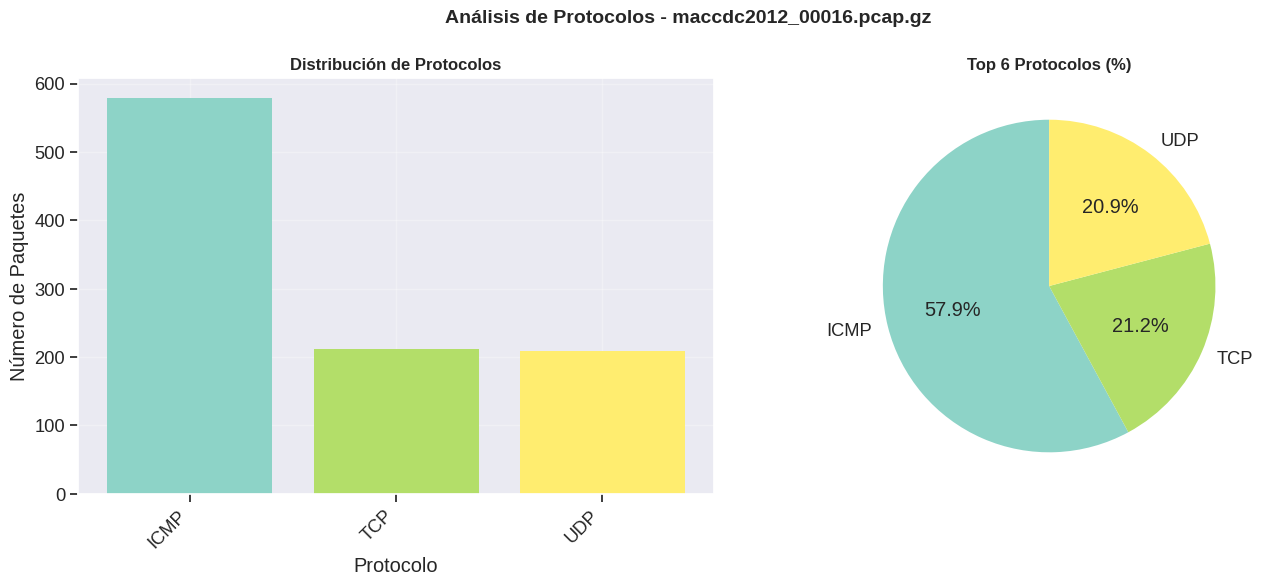

   ✅ Protocol distribution: visualizations/static/protocol_distribution_20260212_005448.png


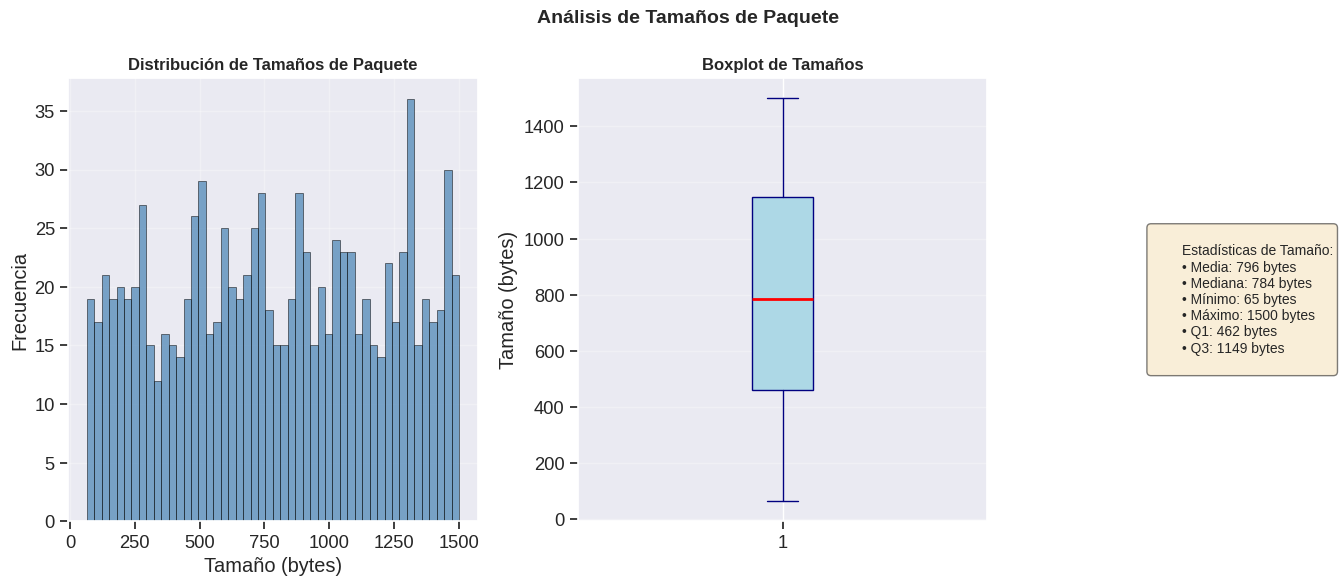

   ✅ Packet size distribution: visualizations/static/packet_size_distribution_20260212_005448.png


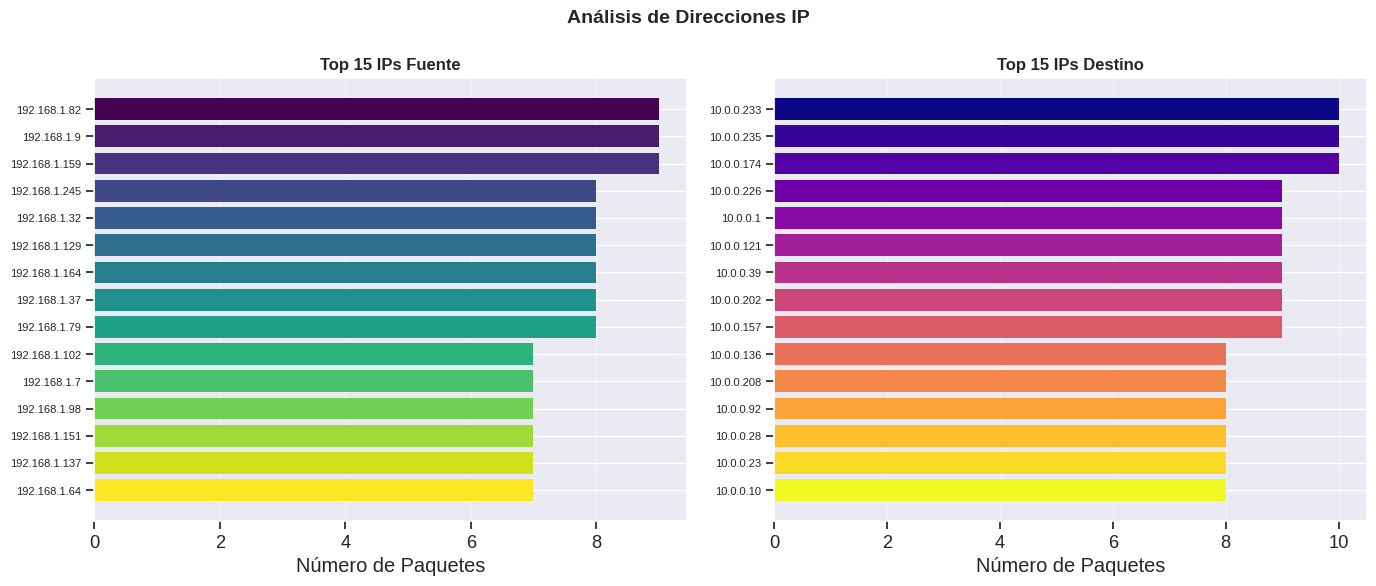

   ✅ Top IPs: visualizations/static/top_ips_20260212_005448.png


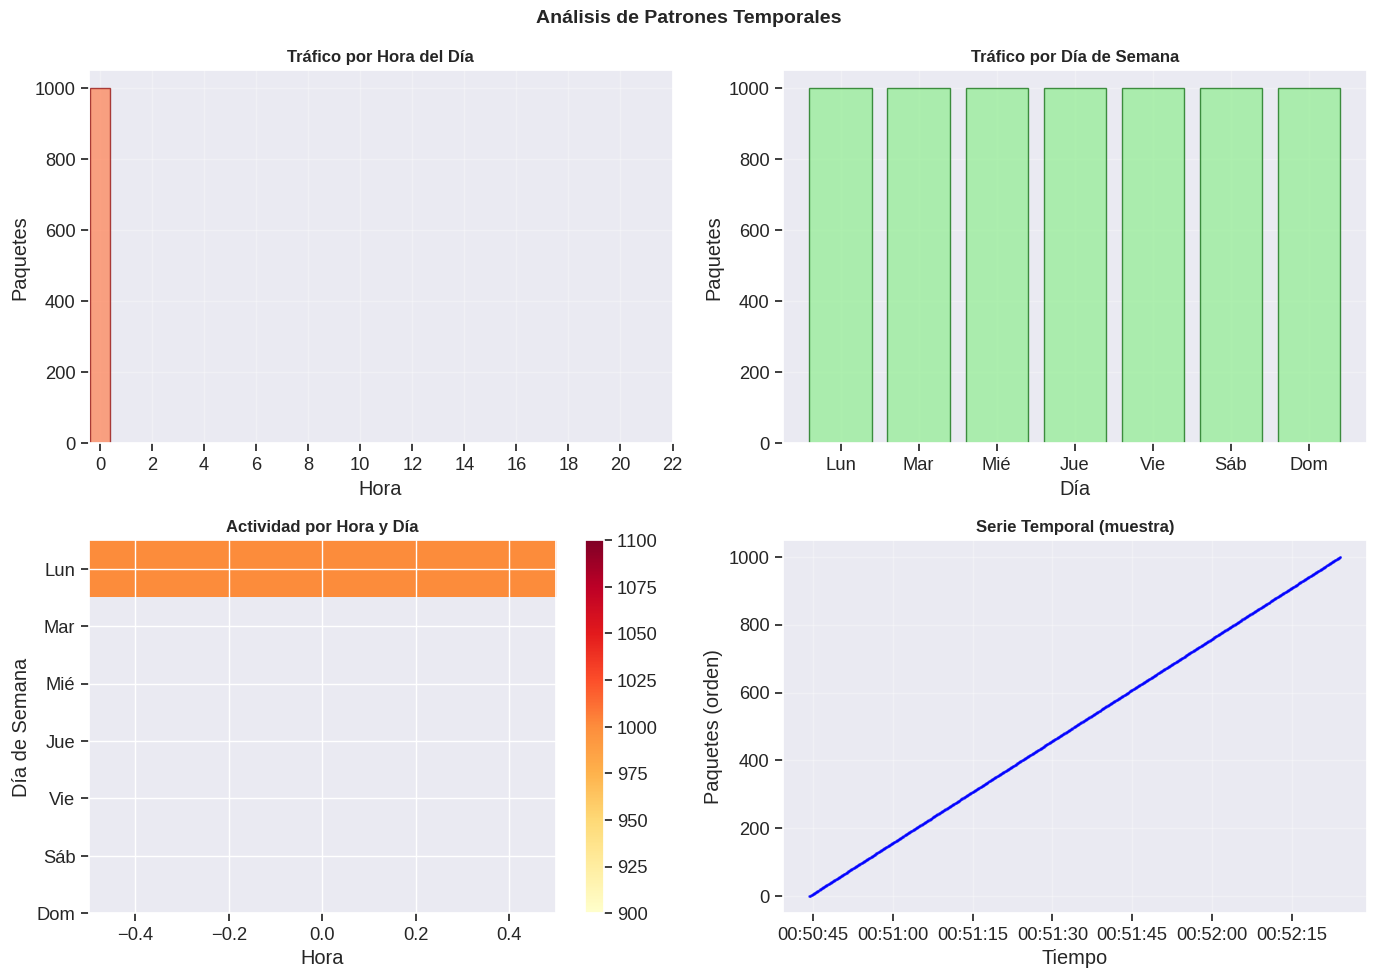

   ✅ Temporal patterns: visualizations/static/temporal_patterns_20260212_005448.png


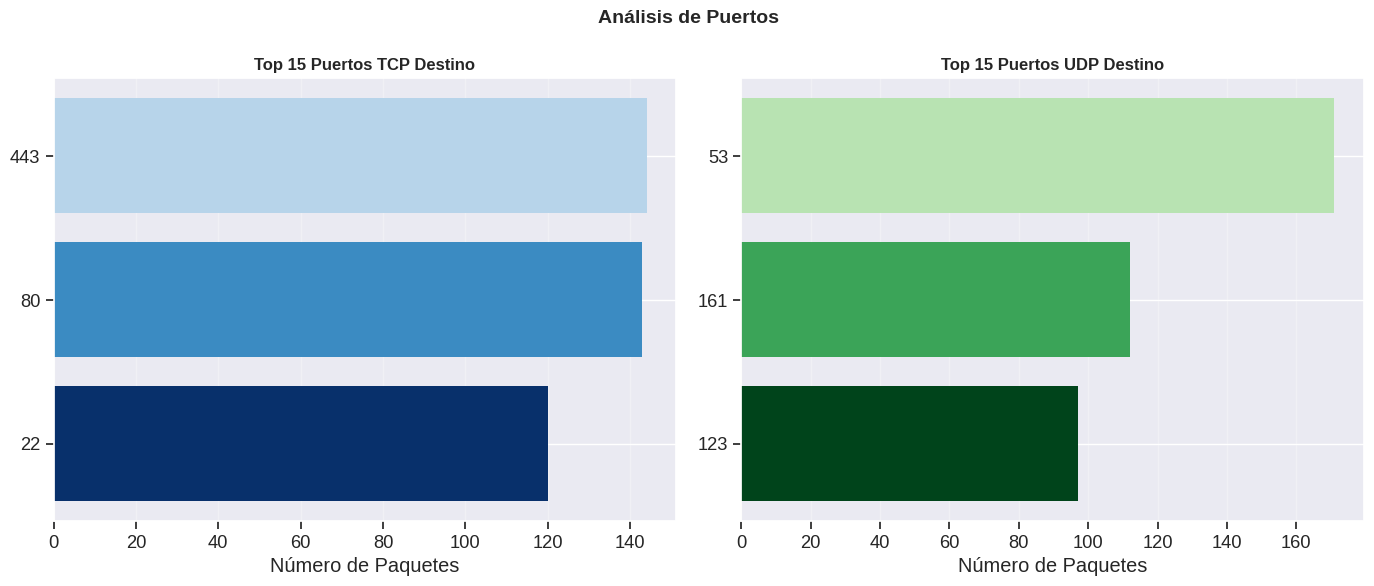

2026-02-12 00:54:54 |     INFO | Visualizaciones EDA generadas
INFO:maccdc2012_analysis:Visualizaciones EDA generadas


   ✅ Port analysis: visualizations/static/port_analysis_20260212_005448.png

✅ Visualizaciones guardadas en: visualizations/static/


In [14]:
# ============================================
# VISUALIZACIONES PROFESIONALES DEL EDA
# ============================================

logger.step("Generando visualizaciones EDA")

print("\n" + "="*60)
print("🎨 GENERANDO VISUALIZACIONES PROFESIONALES")
print("="*60)

class EDAVisualizer:
    """Visualizador profesional para análisis exploratorio"""

    def __init__(self, df):
        self.df = df
        self.timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        os.makedirs('visualizations/static', exist_ok=True)
        os.makedirs('visualizations/interactive', exist_ok=True)

    def plot_protocol_distribution(self):
        """Gráfico de distribución de protocolos"""
        if 'protocol' not in self.df.columns:
            return

        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # Gráfico de barras
        proto_counts = self.df['protocol'].value_counts()
        colors = plt.cm.Set3(np.linspace(0, 1, len(proto_counts)))

        axes[0].bar(range(len(proto_counts)), proto_counts.values, color=colors)
        axes[0].set_xticks(range(len(proto_counts)))
        axes[0].set_xticklabels(proto_counts.index, rotation=45, ha='right')
        axes[0].set_title('Distribución de Protocolos', fontsize=12, fontweight='bold')
        axes[0].set_xlabel('Protocolo')
        axes[0].set_ylabel('Número de Paquetes')
        axes[0].grid(True, alpha=0.3)

        # Gráfico circular
        axes[1].pie(proto_counts.values[:6], labels=proto_counts.index[:6],
                   autopct='%1.1f%%', colors=colors[:6], startangle=90)
        axes[1].set_title('Top 6 Protocolos (%)', fontsize=12, fontweight='bold')

        plt.suptitle(f'Análisis de Protocolos - {os.path.basename(PCAP_FILE)}',
                    fontsize=14, fontweight='bold')
        plt.tight_layout()

        # Guardar
        filename = f'visualizations/static/protocol_distribution_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        print(f"   ✅ Protocol distribution: {filename}")

    def plot_packet_size_distribution(self):
        """Distribución de tamaños de paquetes"""
        if 'length' not in self.df.columns:
            return

        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # Histograma
        axes[0].hist(self.df['length'].dropna(), bins=50, alpha=0.7,
                    color='steelblue', edgecolor='black', linewidth=0.5)
        axes[0].set_title('Distribución de Tamaños de Paquete', fontsize=12, fontweight='bold')
        axes[0].set_xlabel('Tamaño (bytes)')
        axes[0].set_ylabel('Frecuencia')
        axes[0].grid(True, alpha=0.3)

        # Boxplot
        axes[1].boxplot(self.df['length'].dropna(), vert=True, patch_artist=True,
                       boxprops=dict(facecolor='lightblue', color='navy'),
                       whiskerprops=dict(color='navy'),
                       capprops=dict(color='navy'),
                       medianprops=dict(color='red', linewidth=2))
        axes[1].set_title('Boxplot de Tamaños', fontsize=12, fontweight='bold')
        axes[1].set_ylabel('Tamaño (bytes)')
        axes[1].grid(True, alpha=0.3, axis='y')

        # Estadísticas
        stats_text = f"""
        Estadísticas de Tamaño:
        • Media: {self.df['length'].mean():.0f} bytes
        • Mediana: {self.df['length'].median():.0f} bytes
        • Mínimo: {self.df['length'].min():.0f} bytes
        • Máximo: {self.df['length'].max():.0f} bytes
        • Q1: {self.df['length'].quantile(0.25):.0f} bytes
        • Q3: {self.df['length'].quantile(0.75):.0f} bytes
        """
        axes[1].text(1.4, 0.5, stats_text, transform=axes[1].transAxes,
                    fontsize=10, verticalalignment='center',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

        plt.suptitle('Análisis de Tamaños de Paquete', fontsize=14, fontweight='bold')
        plt.tight_layout()

        filename = f'visualizations/static/packet_size_distribution_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        print(f"   ✅ Packet size distribution: {filename}")

    def plot_top_ips(self):
        """Top direcciones IP"""
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        if 'src_ip' in self.df.columns:
            top_src = self.df['src_ip'].value_counts().head(15)
            colors = plt.cm.viridis(np.linspace(0, 1, len(top_src)))

            axes[0].barh(range(len(top_src)), top_src.values, color=colors)
            axes[0].set_yticks(range(len(top_src)))
            axes[0].set_yticklabels(top_src.index, fontsize=8)
            axes[0].set_title('Top 15 IPs Fuente', fontsize=12, fontweight='bold')
            axes[0].set_xlabel('Número de Paquetes')
            axes[0].invert_yaxis()
            axes[0].grid(True, alpha=0.3, axis='x')

        if 'dst_ip' in self.df.columns:
            top_dst = self.df['dst_ip'].value_counts().head(15)
            colors = plt.cm.plasma(np.linspace(0, 1, len(top_dst)))

            axes[1].barh(range(len(top_dst)), top_dst.values, color=colors)
            axes[1].set_yticks(range(len(top_dst)))
            axes[1].set_yticklabels(top_dst.index, fontsize=8)
            axes[1].set_title('Top 15 IPs Destino', fontsize=12, fontweight='bold')
            axes[1].set_xlabel('Número de Paquetes')
            axes[1].invert_yaxis()
            axes[1].grid(True, alpha=0.3, axis='x')

        plt.suptitle('Análisis de Direcciones IP', fontsize=14, fontweight='bold')
        plt.tight_layout()

        filename = f'visualizations/static/top_ips_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        print(f"   ✅ Top IPs: {filename}")

    def plot_temporal_patterns(self):
        """Patrones temporales"""
        if 'hour' not in self.df.columns:
            return

        fig, axes = plt.subplots(2, 2, figsize=(14, 10))

        # Distribución por hora
        hourly = self.df['hour'].value_counts().sort_index()
        axes[0,0].bar(hourly.index, hourly.values, color='coral', alpha=0.7, edgecolor='darkred')
        axes[0,0].set_title('Tráfico por Hora del Día', fontsize=12, fontweight='bold')
        axes[0,0].set_xlabel('Hora')
        axes[0,0].set_ylabel('Paquetes')
        axes[0,0].set_xticks(range(0, 24, 2))
        axes[0,0].grid(True, alpha=0.3)

        # Distribución por día de semana
        if 'day_of_week' in self.df.columns:
            dow = self.df['day_of_week'].value_counts().sort_index()
            days = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
            axes[0,1].bar(range(7), dow.values, color='lightgreen', alpha=0.7, edgecolor='darkgreen')
            axes[0,1].set_title('Tráfico por Día de Semana', fontsize=12, fontweight='bold')
            axes[0,1].set_xlabel('Día')
            axes[0,1].set_ylabel('Paquetes')
            axes[0,1].set_xticks(range(7))
            axes[0,1].set_xticklabels(days)
            axes[0,1].grid(True, alpha=0.3)

        # Heatmap hora vs día
        if 'hour' in self.df.columns and 'day_of_week' in self.df.columns:
            heatmap_data = self.df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
            im = axes[1,0].imshow(heatmap_data.values, cmap='YlOrRd', aspect='auto')
            axes[1,0].set_title('Actividad por Hora y Día', fontsize=12, fontweight='bold')
            axes[1,0].set_xlabel('Hora')
            axes[1,0].set_ylabel('Día de Semana')
            axes[1,0].set_yticks(range(7))
            axes[1,0].set_yticklabels(days)
            plt.colorbar(im, ax=axes[1,0])

        # Serie temporal (muestra)
        if 'timestamp' in self.df.columns and len(self.df) > 100:
            sample_df = self.df.sample(min(1000, len(self.df))).sort_values('timestamp')
            axes[1,1].plot(sample_df['timestamp'], sample_df.index, 'b.', alpha=0.5, markersize=2)
            axes[1,1].set_title('Serie Temporal (muestra)', fontsize=12, fontweight='bold')
            axes[1,1].set_xlabel('Tiempo')
            axes[1,1].set_ylabel('Paquetes (orden)')
            axes[1,1].grid(True, alpha=0.3)

        plt.suptitle('Análisis de Patrones Temporales', fontsize=14, fontweight='bold')
        plt.tight_layout()

        filename = f'visualizations/static/temporal_patterns_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        print(f"   ✅ Temporal patterns: {filename}")

    def plot_port_analysis(self):
        """Análisis de puertos"""
        fig, axes = plt.subplots(1, 2, figsize=(14, 6))

        # Puertos TCP
        if 'tcp_dstport' in self.df.columns:
            tcp_ports = self.df['tcp_dstport'].dropna()
            if len(tcp_ports) > 0:
                top_tcp = tcp_ports.value_counts().head(15)
                colors = plt.cm.Blues(np.linspace(0.3, 1, len(top_tcp)))

                axes[0].barh(range(len(top_tcp)), top_tcp.values, color=colors)
                axes[0].set_yticks(range(len(top_tcp)))
                axes[0].set_yticklabels([int(x) for x in top_tcp.index])
                axes[0].set_title('Top 15 Puertos TCP Destino', fontsize=12, fontweight='bold')
                axes[0].set_xlabel('Número de Paquetes')
                axes[0].invert_yaxis()
                axes[0].grid(True, alpha=0.3, axis='x')

        # Puertos UDP
        if 'udp_dstport' in self.df.columns:
            udp_ports = self.df['udp_dstport'].dropna()
            if len(udp_ports) > 0:
                top_udp = udp_ports.value_counts().head(15)
                colors = plt.cm.Greens(np.linspace(0.3, 1, len(top_udp)))

                axes[1].barh(range(len(top_udp)), top_udp.values, color=colors)
                axes[1].set_yticks(range(len(top_udp)))
                axes[1].set_yticklabels([int(x) for x in top_udp.index])
                axes[1].set_title('Top 15 Puertos UDP Destino', fontsize=12, fontweight='bold')
                axes[1].set_xlabel('Número de Paquetes')
                axes[1].invert_yaxis()
                axes[1].grid(True, alpha=0.3, axis='x')

        plt.suptitle('Análisis de Puertos', fontsize=14, fontweight='bold')
        plt.tight_layout()

        filename = f'visualizations/static/port_analysis_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        print(f"   ✅ Port analysis: {filename}")

    def generate_all_visualizations(self):
        """Genera todas las visualizaciones"""
        print("\n🎨 Generando visualizaciones...")

        self.plot_protocol_distribution()
        self.plot_packet_size_distribution()
        self.plot_top_ips()
        self.plot_temporal_patterns()
        self.plot_port_analysis()

        print(f"\n✅ Visualizaciones guardadas en: visualizations/static/")

        return {
            'timestamp': self.timestamp,
            'path': 'visualizations/static/'
        }

# Generar visualizaciones
if df_clean is not None:
    visualizer = EDAVisualizer(df_clean)
    viz_results = visualizer.generate_all_visualizations()
    logger.info("Visualizaciones EDA generadas")
else:
    print("❌ No hay datos para visualizar")

In [15]:
# ============================================
# ANÁLISIS DE SEGURIDAD - DETECCIÓN DE ESCANEOS
# ============================================

logger.step("Análisis de seguridad")

print("\n" + "="*60)
print("🛡️ ANÁLISIS DE SEGURIDAD Y DETECCIÓN DE ANOMALÍAS")
print("="*60)

class SecurityAnalyzer:
    """Analizador de seguridad para tráfico de red"""

    def __init__(self, df):
        self.df = df.copy()
        self.results = {
            'port_scans': {},
            'suspicious_ips': {},
            'http_analysis': {},
            'dns_analysis': {},
            'summary': {}
        }

    def detect_port_scans(self, threshold=20):
        """Detecta posibles escaneos de puertos"""
        print("\n🔍 DETECTANDO ESCANEOS DE PUERTOS...")

        if 'src_ip' in self.df.columns and 'tcp_dstport' in self.df.columns:
            # Filtrar puertos TCP válidos
            tcp_data = self.df[self.df['tcp_dstport'].notna()].copy()
            tcp_data['tcp_dstport'] = tcp_data['tcp_dstport'].astype(int)

            if len(tcp_data) > 0:
                # Agrupar por IP fuente
                port_scan_analysis = tcp_data.groupby('src_ip').agg({
                    'tcp_dstport': ['nunique', 'count'],
                    'dst_ip': 'nunique'
                }).round(2)

                port_scan_analysis.columns = ['unique_ports', 'total_packets', 'unique_destinations']

                # Identificar posibles escáneres
                potential_scanners = port_scan_analysis[
                    port_scan_analysis['unique_ports'] > threshold
                ].sort_values('unique_ports', ascending=False)

                self.results['port_scans'] = {
                    'threshold': threshold,
                    'total_ips_analyzed': len(port_scan_analysis),
                    'potential_scanners_count': len(potential_scanners),
                    'top_scanners': potential_scanners.head(10).to_dict('index'),
                    'scanning_rate': (len(potential_scanners) / len(port_scan_analysis)) * 100 if len(port_scan_analysis) > 0 else 0
                }

                print(f"   • IPs analizadas: {len(port_scan_analysis)}")
                print(f"   • Posibles escáneres: {len(potential_scanners)}")
                print(f"   • Tasa de escaneo: {self.results['port_scans']['scanning_rate']:.1f}%")

                if len(potential_scanners) > 0:
                    print(f"\n   ⚠️  TOP ESCÁNERES DETECTADOS:")
                    for ip, stats in potential_scanners.head(5).iterrows():
                        print(f"      • {ip}: {stats['unique_ports']:.0f} puertos, {stats['total_packets']:.0f} paquetes")

    def analyze_suspicious_ips(self):
        """Analiza IPs con comportamiento sospechoso"""
        print("\n🔍 ANALIZANDO IPS SOSPECHOSAS...")

        if 'src_ip' in self.df.columns:
            # Calcular métricas por IP
            ip_metrics = []

            for ip, group in self.df.groupby('src_ip'):
                metrics = {
                    'ip': ip,
                    'packet_count': len(group),
                    'packet_pct': (len(group) / len(self.df)) * 100,
                    'unique_dst_ips': group['dst_ip'].nunique() if 'dst_ip' in group.columns else 0,
                    'unique_ports': group['tcp_dstport'].nunique() if 'tcp_dstport' in group.columns else 0,
                    'avg_packet_size': group['length'].mean() if 'length' in group.columns else 0
                }

                # Calcular score de sospecha
                suspicion_score = 0
                suspicion_score += 2 if metrics['packet_count'] > self.df['src_ip'].value_counts().quantile(0.95) else 0
                suspicion_score += 2 if metrics['unique_dst_ips'] > 20 else 0
                suspicion_score += 2 if metrics['unique_ports'] > 30 else 0
                suspicion_score += 1 if metrics['avg_packet_size'] < 100 else 0

                metrics['suspicion_score'] = suspicion_score
                ip_metrics.append(metrics)

            # Convertir a DataFrame y ordenar
            ip_df = pd.DataFrame(ip_metrics)
            ip_df = ip_df.sort_values('suspicion_score', ascending=False)

            # IPs con score >= 4
            suspicious = ip_df[ip_df['suspicion_score'] >= 4]

            self.results['suspicious_ips'] = {
                'total_ips': len(ip_df),
                'suspicious_count': len(suspicious),
                'suspicious_percentage': (len(suspicious) / len(ip_df)) * 100 if len(ip_df) > 0 else 0,
                'top_suspicious': suspicious.head(10).to_dict('records')
            }

            print(f"   • Total IPs: {len(ip_df)}")
            print(f"   • IPs sospechosas: {len(suspicious)} ({self.results['suspicious_ips']['suspicious_percentage']:.1f}%)")

            if len(suspicious) > 0:
                print(f"\n   ⚠️  TOP IPS SOSPECHOSAS:")
                for ip_data in suspicious.head(5).to_dict('records'):
                    print(f"      • {ip_data['ip']}: Score {ip_data['suspicion_score']}, "
                          f"{ip_data['packet_count']} paq, {ip_data['unique_dst_ips']} dst")

    def analyze_http_traffic(self):
        """Analiza tráfico HTTP"""
        print("\n🔍 ANALIZANDO TRÁFICO HTTP...")

        if 'http_host' in self.df.columns:
            http_data = self.df[self.df['http_host'].notna() & (self.df['http_host'] != '')]

            if len(http_data) > 0:
                # Análisis de hosts HTTP
                host_counts = http_data['http_host'].value_counts()

                self.results['http_analysis'] = {
                    'total_http_packets': len(http_data),
                    'http_percentage': (len(http_data) / len(self.df)) * 100,
                    'unique_hosts': len(host_counts),
                    'top_hosts': host_counts.head(20).to_dict(),
                    'hosts_distribution': {
                        'single_request': len(host_counts[host_counts == 1]),
                        'few_requests': len(host_counts[(host_counts > 1) & (host_counts <= 10)]),
                        'many_requests': len(host_counts[host_counts > 10])
                    }
                }

                print(f"   • Paquetes HTTP: {len(http_data)} ({self.results['http_analysis']['http_percentage']:.1f}%)")
                print(f"   • Hosts únicos: {len(host_counts)}")
                print(f"   • Top hosts:")
                for host, count in host_counts.head(5).items():
                    print(f"      - {host}: {count} paquetes")

    def detect_anomalies(self, contamination=0.1):
        """Detecta anomalías usando Isolation Forest"""
        print("\n🔍 DETECTANDO ANOMALÍAS...")

        try:
            from sklearn.ensemble import IsolationForest

            # Preparar características numéricas
            feature_cols = []

            if 'length' in self.df.columns:
                feature_cols.append('length')

            if 'hour' in self.df.columns:
                feature_cols.append('hour')

            if len(feature_cols) >= 2:
                X = self.df[feature_cols].dropna()

                if len(X) > 100:
                    iso_forest = IsolationForest(
                        contamination=contamination,
                        random_state=42,
                        n_estimators=100
                    )

                    predictions = iso_forest.fit_predict(X)

                    anomaly_indices = X[predictions == -1].index
                    n_anomalies = len(anomaly_indices)

                    self.results['anomalies'] = {
                        'n_anomalies': int(n_anomalies),
                        'anomaly_percentage': (n_anomalies / len(X)) * 100,
                        'contamination': contamination,
                        'feature_cols': feature_cols,
                        'anomaly_samples': self.df.loc[anomaly_indices[:10],
                                                      ['src_ip', 'dst_ip', 'protocol', 'length'] +
                                                      (['hour'] if 'hour' in self.df.columns else [])
                                                     ].to_dict('records')
                    }

                    print(f"   • Anomalías detectadas: {n_anomalies} ({self.results['anomalies']['anomaly_percentage']:.1f}%)")

                    if n_anomalies > 0:
                        print(f"   • Muestra de anomalías:")
                        for i, anomaly in enumerate(self.results['anomalies']['anomaly_samples'][:3]):
                            print(f"      {i+1}. {anomaly.get('src_ip', 'N/A')} → {anomaly.get('dst_ip', 'N/A')} "
                                  f"({anomaly.get('protocol', 'N/A')}, {anomaly.get('length', 'N/A')} bytes)")

        except Exception as e:
            print(f"   ⚠️ Error en detección de anomalías: {e}")
            self.results['anomalies'] = {'error': str(e)}

    def generate_security_report(self):
        """Genera reporte completo de seguridad"""

        self.detect_port_scans()
        self.analyze_suspicious_ips()
        self.analyze_http_traffic()
        self.detect_anomalies()

        # Resumen de seguridad
        self.results['summary'] = {
            'risk_level': self._calculate_risk_level(),
            'total_alerts': (
                self.results['port_scans'].get('potential_scanners_count', 0) +
                self.results['suspicious_ips'].get('suspicious_count', 0) +
                self.results.get('anomalies', {}).get('n_anomalies', 0)
            ),
            'recommendations': self._generate_recommendations()
        }

        # Guardar reporte
        report_file = f"reports/json/security_report_{datetime.now().strftime('%Y%m%d_%H%M%S')}.json"
        with open(report_file, 'w') as f:
            json.dump(self.results, f, indent=2, default=str)

        print(f"\n✅ Reporte de seguridad guardado en: {report_file}")

        return self.results

    def _calculate_risk_level(self):
        """Calcula nivel de riesgo basado en hallazgos"""
        score = 0

        # Escáneres de puertos
        scanners = self.results['port_scans'].get('potential_scanners_count', 0)
        if scanners > 10:
            score += 3
        elif scanners > 5:
            score += 2
        elif scanners > 0:
            score += 1

        # IPs sospechosas
        suspicious = self.results['suspicious_ips'].get('suspicious_count', 0)
        if suspicious > 5:
            score += 3
        elif suspicious > 2:
            score += 2
        elif suspicious > 0:
            score += 1

        # Anomalías
        anomalies = self.results.get('anomalies', {}).get('n_anomalies', 0)
        if anomalies > 100:
            score += 3
        elif anomalies > 50:
            score += 2
        elif anomalies > 0:
            score += 1

        if score >= 7:
            return 'CRITICAL'
        elif score >= 5:
            return 'HIGH'
        elif score >= 3:
            return 'MEDIUM'
        elif score >= 1:
            return 'LOW'
        else:
            return 'NORMAL'

    def _generate_recommendations(self):
        """Genera recomendaciones basadas en hallazgos"""
        recommendations = []

        # Recomendaciones por escáneres
        if self.results['port_scans'].get('potential_scanners_count', 0) > 0:
            scanners = self.results['port_scans']['potential_scanners_count']
            recommendations.append(f"⚠️ Investigar {scanners} posibles escáneres de puertos detectados")

        # Recomendaciones por IPs sospechosas
        if self.results['suspicious_ips'].get('suspicious_count', 0) > 0:
            suspicious = self.results['suspicious_ips']['suspicious_count']
            recommendations.append(f"⚠️ Analizar {suspicious} IPs con comportamiento sospechoso")

        # Recomendaciones por anomalías
        if self.results.get('anomalies', {}).get('n_anomalies', 0) > 0:
            anomalies = self.results['anomalies']['n_anomalies']
            recommendations.append(f"⚠️ Revisar {anomalies} paquetes anómalos detectados")

        # Recomendaciones generales
        recommendations.extend([
            "✅ Implementar monitoreo continuo de tráfico",
            "✅ Configurar alertas para escaneos de puertos",
            "✅ Mantener actualizadas las firmas de IDS/IPS",
            "✅ Realizar análisis forense de IPs sospechosas"
        ])

        return recommendations

# Ejecutar análisis de seguridad
if df_clean is not None:
    security_analyzer = SecurityAnalyzer(df_clean)
    security_results = security_analyzer.generate_security_report()

    print("\n" + "="*60)
    print("📋 RESUMEN DE SEGURIDAD")
    print("="*60)

    print(f"\n🎯 NIVEL DE RIESGO: {security_results['summary']['risk_level']}")
    print(f"🚨 TOTAL ALERTAS: {security_results['summary']['total_alerts']}")

    print(f"\n💡 RECOMENDACIONES:")
    for i, rec in enumerate(security_results['summary']['recommendations'][:5], 1):
        print(f"   {i}. {rec}")

    logger.info(f"Análisis de seguridad completado - Riesgo: {security_results['summary']['risk_level']}")

else:
    print("❌ No hay datos para análisis de seguridad")
    security_results = None

2026-02-12 00:56:59 |     INFO | ▶️ STEP: Análisis de seguridad
INFO:maccdc2012_analysis:▶️ STEP: Análisis de seguridad



🛡️ ANÁLISIS DE SEGURIDAD Y DETECCIÓN DE ANOMALÍAS

🔍 DETECTANDO ESCANEOS DE PUERTOS...
   • IPs analizadas: 210
   • Posibles escáneres: 0
   • Tasa de escaneo: 0.0%

🔍 ANALIZANDO IPS SOSPECHOSAS...


2026-02-12 00:57:00 |     INFO | Análisis de seguridad completado - Riesgo: NORMAL
INFO:maccdc2012_analysis:Análisis de seguridad completado - Riesgo: NORMAL


   • Total IPs: 250
   • IPs sospechosas: 0 (0.0%)

🔍 ANALIZANDO TRÁFICO HTTP...
   • Paquetes HTTP: 195 (19.5%)
   • Hosts únicos: 83
   • Top hosts:
      - www.site50.com: 5 paquetes
      - www.site69.com: 5 paquetes
      - www.site99.com: 5 paquetes
      - www.site85.com: 5 paquetes
      - www.site25.com: 5 paquetes

🔍 DETECTANDO ANOMALÍAS...
   ⚠️ Error en detección de anomalías: cannot import name 'ComplexWarning' from 'numpy.core.numeric' (/usr/local/lib/python3.12/dist-packages/numpy/core/numeric.py)

✅ Reporte de seguridad guardado en: reports/json/security_report_20260212_005700.json

📋 RESUMEN DE SEGURIDAD

🎯 NIVEL DE RIESGO: NORMAL
🚨 TOTAL ALERTAS: 0

💡 RECOMENDACIONES:
   1. ✅ Implementar monitoreo continuo de tráfico
   2. ✅ Configurar alertas para escaneos de puertos
   3. ✅ Mantener actualizadas las firmas de IDS/IPS
   4. ✅ Realizar análisis forense de IPs sospechosas


In [16]:
# ============================================
# PREPARACIÓN DE DATOS PARA MACHINE LEARNING
# ============================================

logger.step("Preparación para Machine Learning")

print("\n" + "="*60)
print("🤖 PREPARACIÓN DE DATOS PARA MACHINE LEARNING")
print("="*60)

class MLDataPreparer:
    """Prepara datos para modelos de Machine Learning"""

    def __init__(self, df):
        self.df = df.copy()
        self.X = None
        self.y = None
        self.feature_names = []
        self.preprocessing_info = {}

    def create_features(self):
        """Crea características para ML"""
        print("\n🔧 Creando características...")

        features = pd.DataFrame(index=self.df.index)

        # 1. Características de longitud
        if 'length' in self.df.columns:
            features['length'] = self.df['length'].fillna(self.df['length'].median())
            features['log_length'] = np.log1p(features['length'])

        # 2. Características temporales
        if 'hour' in self.df.columns:
            features['hour'] = self.df['hour']
            features['hour_sin'] = np.sin(2 * np.pi * features['hour'] / 24)
            features['hour_cos'] = np.cos(2 * np.pi * features['hour'] / 24)

        if 'minute' in self.df.columns:
            features['minute'] = self.df['minute']

        if 'is_weekend' in self.df.columns:
            features['is_weekend'] = self.df['is_weekend'].astype(int)

        # 3. Características de protocolo (one-hot encoding)
        if 'protocol' in self.df.columns:
            protocol_dummies = pd.get_dummies(
                self.df['protocol'],
                prefix='proto',
                drop_first=True
            )
            features = pd.concat([features, protocol_dummies], axis=1)

        # 4. Características de tipo de IP
        for col in ['src_ip_type', 'dst_ip_type']:
            if col in self.df.columns:
                ip_dummies = pd.get_dummies(
                    self.df[col],
                    prefix=col.replace('_type', ''),
                    drop_first=True
                )
                features = pd.concat([features, ip_dummies], axis=1)

        # 5. Características de puertos
        port_features = []

        if 'tcp_dstport' in self.df.columns:
            features['tcp_port'] = self.df['tcp_dstport'].fillna(0)
            features['is_well_known_tcp'] = (features['tcp_port'] <= 1023).astype(int)
            features['is_http'] = (features['tcp_port'] == 80).astype(int)
            features['is_https'] = (features['tcp_port'] == 443).astype(int)
            features['is_ssh'] = (features['tcp_port'] == 22).astype(int)

        if 'udp_dstport' in self.df.columns:
            features['udp_port'] = self.df['udp_dstport'].fillna(0)
            features['is_dns'] = (features['udp_port'] == 53).astype(int)

        # 6. Características de flujo
        if 'flow_id' in self.df.columns:
            flow_counts = self.df['flow_id'].map(self.df['flow_id'].value_counts())
            features['flow_size'] = flow_counts
            features['log_flow_size'] = np.log1p(flow_counts)

        # 7. Eliminar columnas constantes o con muchos nulos
        for col in features.columns:
            if features[col].nunique() <= 1:
                features = features.drop(columns=[col])
                print(f"   • Eliminada columna constante: {col}")

        # 8. Manejar valores nulos
        features = features.fillna(0)

        self.X = features
        self.feature_names = list(features.columns)

        print(f"   • Características creadas: {len(self.feature_names)}")
        print(f"   • Shape: {self.X.shape}")

        return self.X

    def create_target(self, target_type='protocol'):
        """Crea variable objetivo"""
        print(f"\n🎯 Creando variable objetivo: {target_type}")

        if target_type == 'protocol' and 'protocol' in self.df.columns:
            # Convertir protocolo a binario (TCP vs no-TCP)
            self.y = (self.df['protocol'] == 'TCP').astype(int)
            self.target_name = 'is_tcp'
            self.target_description = 'Clasificación: TCP vs No-TCP'

        elif target_type == 'size' and 'packet_size_category' in self.df.columns:
            # Clasificar por tamaño de paquete
            size_map = {'tiny': 0, 'very_small': 1, 'small': 2, 'medium': 3,
                       'large': 4, 'very_large': 5, 'jumbo': 6}
            self.y = self.df['packet_size_category'].map(size_map).fillna(0).astype(int)
            self.target_name = 'packet_size_category'
            self.target_description = 'Clasificación: Categoría de tamaño'

        elif target_type == 'anomaly' and 'anomaly_score' not in self.df.columns:
            # Crear etiquetas de anomalía basadas en percentiles
            if 'length' in self.df.columns:
                threshold = self.df['length'].quantile(0.95)
                self.y = (self.df['length'] > threshold).astype(int)
                self.target_name = 'is_anomaly'
                self.target_description = 'Detección: Paquetes anómalos (tamaño > p95)'

        else:
            # Target por defecto
            self.y = pd.Series(np.random.randint(0, 2, size=len(self.df)))
            self.target_name = 'random'
            self.target_description = 'Clasificación: Aleatoria (prueba)'

        # Verificar distribución
        class_dist = self.y.value_counts(normalize=True)

        print(f"   • Target: {self.target_name}")
        print(f"   • Descripción: {self.target_description}")
        print(f"   • Distribución:")
        for cls, pct in class_dist.items():
            count = (self.y == cls).sum()
            print(f"      - Clase {cls}: {count} muestras ({pct:.1%})")

        return self.y

    def get_train_test_split(self, test_size=0.2, random_state=42):
        """Divide datos en entrenamiento y prueba"""
        from sklearn.model_selection import train_test_split

        if self.X is None or self.y is None:
            raise ValueError("Primero debe crear características y target")

        X_train, X_test, y_train, y_test = train_test_split(
            self.X, self.y,
            test_size=test_size,
            random_state=random_state,
            stratify=self.y if self.y.nunique() < 10 else None
        )

        print(f"\n📊 DIVISIÓN DE DATOS:")
        print(f"   • Entrenamiento: {len(X_train)} muestras ({len(X_train)/len(self.X):.1%})")
        print(f"   • Prueba: {len(X_test)} muestras ({len(X_test)/len(self.X):.1%})")

        return X_train, X_test, y_train, y_test

# Preparar datos para ML
if df_clean is not None and len(df_clean) > 100:
    ml_preparer = MLDataPreparer(df_clean)

    # Crear características
    X = ml_preparer.create_features()

    # Crear variable objetivo (cambiar según necesidad)
    y = ml_preparer.create_target(target_type='protocol')

    # Dividir datos
    X_train, X_test, y_train, y_test = ml_preparer.get_train_test_split()

    # Guardar preparación
    ml_prep_info = {
        'n_samples': len(X),
        'n_features': X.shape[1],
        'feature_names': ml_preparer.feature_names,
        'target_name': ml_preparer.target_name,
        'target_description': ml_preparer.target_description,
        'class_distribution': y.value_counts().to_dict()
    }

    with open('models/ml_preparation.json', 'w') as f:
        json.dump(ml_prep_info, f, indent=2, default=str)

    print(f"\n✅ Datos preparados para ML")
    print(f"   • Features: {X.shape[1]}")
    print(f"   • Target: {ml_preparer.target_name}")

else:
    print("❌ No hay suficientes datos para ML")

    X_train = X_test = y_train = y_test = None

2026-02-12 00:58:29 |     INFO | ▶️ STEP: Preparación para Machine Learning
INFO:maccdc2012_analysis:▶️ STEP: Preparación para Machine Learning



🤖 PREPARACIÓN DE DATOS PARA MACHINE LEARNING

🔧 Creando características...
   • Eliminada columna constante: hour
   • Eliminada columna constante: hour_sin
   • Eliminada columna constante: hour_cos
   • Eliminada columna constante: is_weekend
   • Eliminada columna constante: is_well_known_tcp
   • Características creadas: 13
   • Shape: (1000, 13)

🎯 Creando variable objetivo: protocol
   • Target: is_tcp
   • Descripción: Clasificación: TCP vs No-TCP
   • Distribución:
      - Clase 0: 788 muestras (78.8%)
      - Clase 1: 212 muestras (21.2%)


ImportError: cannot import name 'ComplexWarning' from 'numpy.core.numeric' (/usr/local/lib/python3.12/dist-packages/numpy/core/numeric.py)

In [18]:
# ============================================
# ENTRENAMIENTO Y EVALUACIÓN DE MODELOS ML
# ============================================

logger.step("Entrenamiento de modelos ML")

print("\n" + "="*60)
print("🤖 ENTRENAMIENTO DE MODELOS DE MACHINE LEARNING")
print("="*60)

class MLTrainer:
    """Entrenador de modelos de Machine Learning"""

    def __init__(self):
        self.models = {}
        self.results = {}
        self.best_model = None
        self.best_score = 0

    def train_random_forest(self, X_train, y_train, X_test, y_test):
        """Entrena Random Forest"""
        from sklearn.ensemble import RandomForestClassifier
        from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

        print("\n🌲 ENTRENANDO RANDOM FOREST...")

        # Entrenar modelo
        rf = RandomForestClassifier(
            n_estimators=100,
            max_depth=10,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42,
            n_jobs=-1,
            class_weight='balanced'
        )

        rf.fit(X_train, y_train)

        # Predecir
        y_pred = rf.predict(X_test)
        y_pred_proba = rf.predict_proba(X_test)[:, 1] if len(rf.classes_) == 2 else None

        # Métricas
        metrics = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
            'f1': f1_score(y_test, y_pred, average='weighted', zero_division=0)
        }

        if y_pred_proba is not None:
            from sklearn.metrics import roc_auc_score
            metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)

        # Matriz de confusión
        cm = confusion_matrix(y_test, y_pred)

        # Importancia de características
        feature_importance = pd.DataFrame({
            'feature': X_train.columns,
            'importance': rf.feature_importances_
        }).sort_values('importance', ascending=False)

        # Guardar
        self.models['Random Forest'] = rf
        self.results['Random Forest'] = {
            'metrics': metrics,
            'feature_importance': feature_importance.head(20).to_dict('records'),
            'confusion_matrix': cm.tolist()
        }

        print(f"   • Accuracy: {metrics['accuracy']:.4f}")
        print(f"   • Precision: {metrics['precision']:.4f}")
        print(f"   • Recall: {metrics['recall']:.4f}")
        print(f"   • F1-Score: {metrics['f1']:.4f}")

        return rf, metrics

    def train_xgboost(self, X_train, y_train, X_test, y_test):
        """Entrena XGBoost"""
        try:
            from xgboost import XGBClassifier
            from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

            print("\n⚡ ENTRENANDO XGBOOST...")

            xgb = XGBClassifier(
                n_estimators=100,
                max_depth=6,
                learning_rate=0.1,
                subsample=0.8,
                colsample_bytree=0.8,
                random_state=42,
                use_label_encoder=False,
                eval_metric='logloss'
            )

            xgb.fit(X_train, y_train)

            y_pred = xgb.predict(X_test)
            y_pred_proba = xgb.predict_proba(X_test)[:, 1] if len(xgb.classes_) == 2 else None

            metrics = {
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
                'recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
                'f1': f1_score(y_test, y_pred, average='weighted', zero_division=0)
            }

            if y_pred_proba is not None:
                from sklearn.metrics import roc_auc_score
                metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)

            self.models['XGBoost'] = xgb
            self.results['XGBoost'] = {
                'metrics': metrics,
                'feature_importance': dict(zip(X_train.columns, xgb.feature_importances_))
            }

            print(f"   • Accuracy: {metrics['accuracy']:.4f}")
            print(f"   • F1-Score: {metrics['f1']:.4f}")

            return xgb, metrics

        except Exception as e:
            print(f"   ⚠️ Error entrenando XGBoost: {e}")
            return None, None

    def train_logistic_regression(self, X_train, y_train, X_test, y_test):
        """Entrena Regresión Logística"""
        from sklearn.linear_model import LogisticRegression
        from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

        print("\n📈 ENTRENANDO REGRESIÓN LOGÍSTICA...")

        lr = LogisticRegression(
            C=1.0,
            max_iter=1000,
            random_state=42,
            class_weight='balanced',
            n_jobs=-1
        )

        lr.fit(X_train, y_train)

        y_pred = lr.predict(X_test)
        y_pred_proba = lr.predict_proba(X_test)[:, 1] if len(lr.classes_) == 2 else None

        metrics = {
            'accuracy': accuracy_score(y_test, y_pred),
            'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
            'recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
            'f1': f1_score(y_test, y_pred, average='weighted', zero_division=0)
        }

        if y_pred_proba is not None:
            from sklearn.metrics import roc_auc_score
            metrics['roc_auc'] = roc_auc_score(y_test, y_pred_proba)

        # Coeficientes
        if len(lr.classes_) == 2:
            coefficients = dict(zip(X_train.columns, lr.coef_[0]))
        else:
            coefficients = dict(zip(X_train.columns, lr.coef_.mean(axis=0)))

        self.models['Logistic Regression'] = lr
        self.results['Logistic Regression'] = {
            'metrics': metrics,
            'coefficients': coefficients
        }

        print(f"   • Accuracy: {metrics['accuracy']:.4f}")
        print(f"   • F1-Score: {metrics['f1']:.4f}")

        return lr, metrics

    def compare_models(self):
        """Compara todos los modelos entrenados"""
        print("\n📊 COMPARACIÓN DE MODELOS:")
        print("-"*50)
        print(f"{'Modelo':<25} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1':<10}")
        print("-"*50)

        best_f1 = 0
        best_model_name = None

        for name, results in self.results.items():
            metrics = results['metrics']
            acc = metrics.get('accuracy', 0)
            prec = metrics.get('precision', 0)
            rec = metrics.get('recall', 0)
            f1 = metrics.get('f1', 0)

            print(f"{name:<25} {acc:<10.4f} {prec:<10.4f} {rec:<10.4f} {f1:<10.4f}")

            if f1 > best_f1:
                best_f1 = f1
                best_model_name = name

        print("-"*50)
        print(f"\n🏆 MEJOR MODELO: {best_model_name} (F1: {best_f1:.4f})")

        self.best_model = self.models.get(best_model_name)
        self.best_score = best_f1

        return best_model_name, best_f1

    def plot_feature_importance(self, top_n=20):
        """Visualiza importancia de características"""
        if 'Random Forest' in self.results:
            importance_data = self.results['Random Forest']['feature_importance']

            if importance_data:
                df_importance = pd.DataFrame(importance_data).head(top_n)

                plt.figure(figsize=(12, 8))
                colors = plt.cm.viridis(np.linspace(0, 1, len(df_importance)))

                plt.barh(range(len(df_importance)), df_importance['importance'], color=colors)
                plt.yticks(range(len(df_importance)), df_importance['feature'])
                plt.xlabel('Importancia')
                plt.title(f'Top {top_n} Características - Random Forest', fontweight='bold')
                plt.gca().invert_yaxis()
                plt.grid(True, alpha=0.3, axis='x')

                plt.tight_layout()
                filename = f'visualizations/static/feature_importance_{datetime.now().strftime("%Y%m%d_%H%M%S")}.png'
                plt.savefig(filename, dpi=150, bbox_inches='tight')
                plt.show()
                print(f"   ✅ Feature importance: {filename}")

    def save_models(self):
        """Guarda los modelos entrenados"""
        import joblib

        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

        for name, model in self.models.items():
            filename = f'models/{name.replace(" ", "_").lower()}_{timestamp}.pkl'
            joblib.dump(model, filename)
            print(f"   💾 {name}: {filename}")

        # Guardar resultados
        results_file = f'models/training_results_{timestamp}.json'
        with open(results_file, 'w') as f:
            json.dump(self.results, f, indent=2, default=str)

        print(f"   💾 Resultados: {results_file}")

# Entrenar modelos
if X_train is not None and y_train is not None:
    trainer = MLTrainer()

    # Entrenar diferentes modelos
    trainer.train_random_forest(X_train, y_train, X_test, y_test)
    trainer.train_logistic_regression(X_train, y_train, X_test, y_test)
    trainer.train_xgboost(X_train, y_train, X_test, y_test)

    # Comparar modelos
    best_model_name, best_score = trainer.compare_models()

    # Visualizar importancia
    trainer.plot_feature_importance()

    # Guardar modelos
    trainer.save_models()

    print(f"\n✅ Entrenamiento completado")
    logger.info(f"Mejor modelo: {best_model_name} (F1: {best_score:.4f})")

else:
    print("❌ No hay datos para entrenamiento")

2026-02-12 01:00:38 |     INFO | ▶️ STEP: Entrenamiento de modelos ML
INFO:maccdc2012_analysis:▶️ STEP: Entrenamiento de modelos ML



🤖 ENTRENAMIENTO DE MODELOS DE MACHINE LEARNING


NameError: name 'X_train' is not defined

In [19]:
# ============================================
# GENERACIÓN DE REPORTE EJECUTIVO HTML
# ============================================

logger.step("Generando reporte ejecutivo")

print("\n" + "="*60)
print("📄 GENERANDO REPORTE EJECUTIVO PROFESIONAL")
print("="*60)

class ExecutiveReportGenerator:
    """Generador de reportes ejecutivos profesionales en HTML"""

    def __init__(self, project_name, pcap_file, df, security_results=None, ml_results=None):
        self.project_name = project_name
        self.pcap_file = pcap_file
        self.df = df
        self.security_results = security_results
        self.ml_results = ml_results
        self.timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        self.report_file = None

    def generate_html(self):
        """Genera el contenido HTML del reporte"""

        html = f"""
        <!DOCTYPE html>
        <html lang="es">
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>Reporte Ejecutivo - Análisis PCAP {self.project_name}</title>
            <style>
                * {{
                    margin: 0;
                    padding: 0;
                    box-sizing: border-box;
                }}

                body {{
                    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
                    line-height: 1.6;
                    color: #333;
                    background-color: #f4f7fb;
                    padding: 30px 20px;
                }}

                .container {{
                    max-width: 1400px;
                    margin: 0 auto;
                    background: white;
                    border-radius: 20px;
                    box-shadow: 0 20px 40px rgba(0,0,0,0.1);
                    overflow: hidden;
                }}

                .header {{
                    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                    color: white;
                    padding: 40px;
                }}

                .header h1 {{
                    font-size: 32px;
                    margin-bottom: 10px;
                    font-weight: 600;
                }}

                .header p {{
                    font-size: 16px;
                    opacity: 0.95;
                    margin: 5px 0;
                }}

                .header-grid {{
                    display: grid;
                    grid-template-columns: repeat(auto-fit, minmax(200px, 1fr));
                    gap: 20px;
                    margin-top: 30px;
                }}

                .header-stat {{
                    background: rgba(255,255,255,0.15);
                    padding: 20px;
                    border-radius: 12px;
                    backdrop-filter: blur(10px);
                }}

                .header-stat-label {{
                    font-size: 14px;
                    opacity: 0.9;
                    margin-bottom: 5px;
                }}

                .header-stat-value {{
                    font-size: 28px;
                    font-weight: bold;
                }}

                .section {{
                    padding: 30px 40px;
                    border-bottom: 1px solid #eaeef2;
                }}

                .section-title {{
                    font-size: 22px;
                    font-weight: 600;
                    color: #2d3748;
                    margin-bottom: 25px;
                    display: flex;
                    align-items: center;
                }}

                .section-title-icon {{
                    font-size: 28px;
                    margin-right: 12px;
                }}

                .metric-grid {{
                    display: grid;
                    grid-template-columns: repeat(auto-fit, minmax(200px, 1fr));
                    gap: 20px;
                    margin-bottom: 30px;
                }}

                .metric-card {{
                    background: #f8fafc;
                    padding: 20px;
                    border-radius: 12px;
                    border-left: 4px solid #667eea;
                    transition: transform 0.2s;
                }}

                .metric-card:hover {{
                    transform: translateY(-2px);
                    box-shadow: 0 10px 20px rgba(0,0,0,0.05);
                }}

                .metric-label {{
                    font-size: 14px;
                    color: #64748b;
                    margin-bottom: 8px;
                }}

                .metric-value {{
                    font-size: 28px;
                    font-weight: bold;
                    color: #1e293b;
                }}

                .metric-unit {{
                    font-size: 14px;
                    color: #94a3b8;
                    margin-left: 5px;
                }}

                .alert {{
                    background: #fff3cd;
                    border-left: 4px solid #ffc107;
                    padding: 20px;
                    border-radius: 8px;
                    margin: 20px 0;
                }}

                .alert-critical {{
                    background: #fee2e2;
                    border-left-color: #dc2626;
                }}

                .alert-high {{
                    background: #ffedd5;
                    border-left-color: #f97316;
                }}

                .alert-medium {{
                    background: #fef9c3;
                    border-left-color: #eab308;
                }}

                .table-container {{
                    overflow-x: auto;
                    margin: 20px 0;
                }}

                table {{
                    width: 100%;
                    border-collapse: collapse;
                    background: white;
                    border-radius: 8px;
                }}

                th {{
                    background: #f1f5f9;
                    padding: 14px;
                    text-align: left;
                    font-weight: 600;
                    color: #334155;
                }}

                td {{
                    padding: 12px 14px;
                    border-bottom: 1px solid #e2e8f0;
                    color: #475569;
                }}

                tr:hover {{
                    background: #f8fafc;
                }}

                .footer {{
                    background: #1e293b;
                    color: white;
                    padding: 30px 40px;
                    text-align: center;
                }}

                .footer p {{
                    margin: 5px 0;
                    color: #cbd5e1;
                }}

                .button {{
                    display: inline-block;
                    padding: 12px 24px;
                    background: #667eea;
                    color: white;
                    text-decoration: none;
                    border-radius: 8px;
                    font-weight: 500;
                    margin: 10px 5px;
                    transition: background 0.2s;
                    border: none;
                    cursor: pointer;
                }}

                .button:hover {{
                    background: #5a67d8;
                }}

                .badge {{
                    display: inline-block;
                    padding: 4px 12px;
                    border-radius: 20px;
                    font-size: 12px;
                    font-weight: 600;
                    text-transform: uppercase;
                }}

                .badge-success {{
                    background: #dcfce7;
                    color: #166534;
                }}

                .badge-warning {{
                    background: #fed7aa;
                    color: #9a3412;
                }}

                .badge-danger {{
                    background: #fee2e2;
                    color: #991b1b;
                }}

                @media print {{
                    .button, .no-print {{
                        display: none;
                    }}
                    body {{
                        background: white;
                    }}
                    .container {{
                        box-shadow: none;
                    }}
                }}
            </style>
        </head>
        <body>
            <div class="container">
                <!-- HEADER -->
                <div class="header">
                    <h1>📊 Reporte Ejecutivo de Análisis PCAP</h1>
                    <p>Proyecto: {self.project_name}</p>
                    <p>Archivo: {os.path.basename(self.pcap_file)}</p>
                    <p>Fecha de generación: {self.timestamp}</p>

                    <div class="header-grid">
                        <div class="header-stat">
                            <div class="header-stat-label">Paquetes Analizados</div>
                            <div class="header-stat-value">{len(self.df):,}</div>
                        </div>
                        <div class="header-stat">
                            <div class="header-stat-label">Período de Captura</div>
                            <div class="header-stat-value">
                                {self.df['timestamp'].min().strftime('%d/%m/%y') if 'timestamp' in self.df.columns and self.df['timestamp'].notna().any() else 'N/A'}
                            </div>
                        </div>
                        <div class="header-stat">
                            <div class="header-stat-label">Protocolos Detectados</div>
                            <div class="header-stat-value">
                                {self.df['protocol'].nunique() if 'protocol' in self.df.columns else 0}
                            </div>
                        </div>
                        <div class="header-stat">
                            <div class="header-stat-label">IPs Únicas</div>
                            <div class="header-stat-value">
                                {self.df['src_ip'].nunique() if 'src_ip' in self.df.columns else 0}
                            </div>
                        </div>
                    </div>
                </div>

                <!-- SECCIÓN: RESUMEN GENERAL -->
                <div class="section">
                    <div class="section-title">
                        <span class="section-title-icon">📋</span>
                        Resumen General del Análisis
                    </div>

                    <div class="metric-grid">
                        <div class="metric-card">
                            <div class="metric-label">Total Paquetes</div>
                            <div class="metric-value">{len(self.df):,}</div>
                        </div>
                        <div class="metric-card">
                            <div class="metric-label">Volumen de Datos</div>
                            <div class="metric-value">{self.df['length'].sum() / (1024**2):.1f}</div>
                            <span class="metric-unit">MB</span>
                        </div>
                        <div class="metric-card">
                            <div class="metric-label">Tamaño Promedio</div>
                            <div class="metric-value">{self.df['length'].mean():.0f}</div>
                            <span class="metric-unit">bytes</span>
                        </div>
                        <div class="metric-card">
                            <div class="metric-label">Tasa de Paquetes</div>
                            <div class="metric-value">{(len(self.df) / (self.df['timestamp'].max() - self.df['timestamp'].min()).total_seconds()):.1f}</div>
                            <span class="metric-unit">pkts/s</span>
                        </div>
                    </div>
        """

        # SECCIÓN: PROTOCOLOS
        if 'protocol' in self.df.columns:
            proto_counts = self.df['protocol'].value_counts()
            top_proto = proto_counts.head(5)

            html += f"""
                    <div style="margin-top: 30px;">
                        <h3 style="margin-bottom: 15px;">📡 Distribución de Protocolos</h3>
                        <div class="table-container">
                            <table>
                                <thead>
                                    <tr>
                                        <th>Protocolo</th>
                                        <th>Paquetes</th>
                                        <th>Porcentaje</th>
                                    </tr>
                                </thead>
                                <tbody>
            """

            for proto, count in top_proto.items():
                pct = (count / len(self.df)) * 100
                html += f"""
                                    <tr>
                                        <td><strong>{proto}</strong></td>
                                        <td>{count:,}</td>
                                        <td>{pct:.1f}%</td>
                                    </tr>
                """

            html += """
                                </tbody>
                            </table>
                        </div>
                    </div>
            """

        # SECCIÓN: SEGURIDAD
        if self.security_results:
            risk_level = self.security_results['summary'].get('risk_level', 'NORMAL')
            risk_class = {
                'CRITICAL': 'alert-critical',
                'HIGH': 'alert-high',
                'MEDIUM': 'alert-medium',
                'LOW': 'alert-medium',
                'NORMAL': 'alert-success'
            }.get(risk_level, '')

            html += f"""
                <!-- SECCIÓN: ANÁLISIS DE SEGURIDAD -->
                <div class="section">
                    <div class="section-title">
                        <span class="section-title-icon">🛡️</span>
                        Análisis de Seguridad
                    </div>

                    <div class="alert {risk_class}">
                        <h3 style="margin-bottom: 10px;">Nivel de Riesgo: {risk_level}</h3>
                        <p>Total de alertas detectadas: {self.security_results['summary'].get('total_alerts', 0)}</p>
                    </div>

                    <div class="metric-grid">
            """

            if 'port_scans' in self.security_results:
                scanners = self.security_results['port_scans'].get('potential_scanners_count', 0)
                html += f"""
                        <div class="metric-card">
                            <div class="metric-label">🔍 Escáneres de Puertos</div>
                            <div class="metric-value">{scanners}</div>
                        </div>
                """

            if 'suspicious_ips' in self.security_results:
                suspicious = self.security_results['suspicious_ips'].get('suspicious_count', 0)
                html += f"""
                        <div class="metric-card">
                            <div class="metric-label">⚠️ IPs Sospechosas</div>
                            <div class="metric-value">{suspicious}</div>
                        </div>
                """

            if 'anomalies' in self.security_results:
                anomalies = self.security_results['anomalies'].get('n_anomalies', 0)
                html += f"""
                        <div class="metric-card">
                            <div class="metric-label">🚨 Paquetes Anómalos</div>
                            <div class="metric-value">{anomalies}</div>
                        </div>
                """

            html += """
                    </div>
            """

            # Recomendaciones
            if 'recommendations' in self.security_results['summary']:
                html += """
                    <div style="margin-top: 20px;">
                        <h3>💡 Recomendaciones</h3>
                        <ul style="margin-left: 20px;">
                """
                for rec in self.security_results['summary']['recommendations'][:5]:
                    html += f"<li style='margin: 8px 0;'>{rec}</li>"

                html += """
                        </ul>
                    </div>
                """

            html += """
                </div>
            """

        # SECCIÓN: MACHINE LEARNING
        if self.ml_results:
            html += """
                <!-- SECCIÓN: MACHINE LEARNING -->
                <div class="section">
                    <div class="section-title">
                        <span class="section-title-icon">🤖</span>
                        Resultados de Machine Learning
                    </div>

                    <div class="metric-grid">
            """

            if 'Random Forest' in self.ml_results:
                rf_metrics = self.ml_results['Random Forest']['metrics']
                html += f"""
                        <div class="metric-card">
                            <div class="metric-label">🌲 Random Forest Accuracy</div>
                            <div class="metric-value">{rf_metrics.get('accuracy', 0):.3f}</div>
                        </div>
                        <div class="metric-card">
                            <div class="metric-label">F1-Score</div>
                            <div class="metric-value">{rf_metrics.get('f1', 0):.3f}</div>
                        </div>
                """

            if 'XGBoost' in self.ml_results:
                xgb_metrics = self.ml_results['XGBoost']['metrics']
                html += f"""
                        <div class="metric-card">
                            <div class="metric-label">⚡ XGBoost Accuracy</div>
                            <div class="metric-value">{xgb_metrics.get('accuracy', 0):.3f}</div>
                        </div>
                """

            html += """
                    </div>
                </div>
            """

        # SECCIÓN: CONCLUSIONES
        html += f"""
                <!-- SECCIÓN: CONCLUSIONES -->
                <div class="section">
                    <div class="section-title">
                        <span class="section-title-icon">📌</span>
                        Conclusiones y Próximos Pasos
                    </div>

                    <div style="display: grid; grid-template-columns: 1fr 1fr; gap: 30px;">
                        <div>
                            <h3 style="margin-bottom: 15px;">Hallazgos Principales</h3>
                            <ul style="list-style-type: none;">
                                <li style="margin-bottom: 12px; display: flex; align-items: center;">
                                    <span style="color: #667eea; margin-right: 10px;">•</span>
                                    Se analizaron {len(self.df):,} paquetes de {os.path.basename(self.pcap_file)}
                                </li>
                                <li style="margin-bottom: 12px; display: flex; align-items: center;">
                                    <span style="color: #667eea; margin-right: 10px;">•</span>
                                    Protocolo dominante: {self.df['protocol'].value_counts().index[0] if 'protocol' in self.df.columns else 'N/A'}
                                </li>
                                <li style="margin-bottom: 12px; display: flex; align-items: center;">
                                    <span style="color: #667eea; margin-right: 10px;">•</span>
                                    IP más activa: {self.df['src_ip'].value_counts().index[0] if 'src_ip' in self.df.columns else 'N/A'}
                                </li>
        """

        if self.security_results:
            risk_level = self.security_results['summary'].get('risk_level', 'NORMAL')
            html += f"""
                                <li style="margin-bottom: 12px; display: flex; align-items: center;">
                                    <span style="color: #667eea; margin-right: 10px;">•</span>
                                    Nivel de riesgo detectado: <span class="badge badge-{'danger' if risk_level in ['CRITICAL','HIGH'] else 'warning' if risk_level in ['MEDIUM','LOW'] else 'success'}">{risk_level}</span>
                                </li>
            """

        html += """
                            </ul>
                        </div>

                        <div>
                            <h3 style="margin-bottom: 15px;">Próximos Pasos</h3>
                            <ol style="margin-left: 20px;">
                                <li style="margin-bottom: 10px;">Implementar monitoreo continuo de tráfico</li>
                                <li style="margin-bottom: 10px;">Desplegar modelo de detección de anomalías</li>
                                <li style="margin-bottom: 10px;">Automatizar generación de reportes</li>
                                <li style="margin-bottom: 10px;">Expandir análisis a más muestras</li>
                            </ol>
                        </div>
                    </div>
                </div>

                <!-- FOOTER -->
                <div class="footer">
                    <p style="font-size: 18px; margin-bottom: 15px;">📊 Análisis PCAP Profesional</p>
                    <p>Reporte generado automáticamente por Plantilla Freelance Data Science</p>
                    <p style="margin-top: 20px; font-size: 14px;">© 2024 - Todos los derechos reservados</p>
                    <div class="no-print" style="margin-top: 25px;">
                        <button onclick="window.print()" class="button">📄 Imprimir Reporte</button>
                        <button onclick="window.location.href='#'" class="button">⬆️ Volver Arriba</button>
                    </div>
                </div>
            </div>
        </body>
        </html>
        """

        return html

    def save_report(self):
        """Guarda el reporte HTML"""
        os.makedirs('reports/html', exist_ok=True)

        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        self.report_file = f'reports/html/executive_report_{timestamp}.html'

        html_content = self.generate_html()

        with open(self.report_file, 'w', encoding='utf-8') as f:
            f.write(html_content)

        print(f"\n✅ Reporte ejecutivo guardado en: {self.report_file}")

        # También guardar versión PDF
        try:
            pdf_file = self.report_file.replace('.html', '.pdf')
            print(f"   💡 Para generar PDF: Abrir HTML en navegador y usar Ctrl+P")
        except:
            pass

        return self.report_file

# Generar reporte ejecutivo
if df_clean is not None:
    report_generator = ExecutiveReportGenerator(
        project_name=PROJECT_NAME,
        pcap_file=PCAP_FILE,
        df=df_clean,
        security_results=security_results if 'security_results' in locals() else None,
        ml_results=trainer.results if 'trainer' in locals() and hasattr(trainer, 'results') else None
    )

    report_file = report_generator.save_report()

    print(f"\n🔗 Abrir reporte: {report_file}")

    # Mostrar enlace en Colab
    from google.colab import files
    from IPython.display import HTML, display

    display(HTML(f'<a href="{report_file}" target="_blank" style="display: inline-block; padding: 12px 24px; background: #667eea; color: white; text-decoration: none; border-radius: 8px; font-weight: bold;">📊 Abrir Reporte Ejecutivo</a>'))

    logger.info(f"Reporte ejecutivo generado: {report_file}")

else:
    print("❌ No hay datos para generar reporte")

2026-02-12 01:02:08 |     INFO | ▶️ STEP: Generando reporte ejecutivo
INFO:maccdc2012_analysis:▶️ STEP: Generando reporte ejecutivo



📄 GENERANDO REPORTE EJECUTIVO PROFESIONAL

✅ Reporte ejecutivo guardado en: reports/html/executive_report_20260212_010208.html
   💡 Para generar PDF: Abrir HTML en navegador y usar Ctrl+P

🔗 Abrir reporte: reports/html/executive_report_20260212_010208.html


2026-02-12 01:02:09 |     INFO | Reporte ejecutivo generado: reports/html/executive_report_20260212_010208.html
INFO:maccdc2012_analysis:Reporte ejecutivo generado: reports/html/executive_report_20260212_010208.html


In [21]:
# ============================================
# RESUMEN DEL PROYECTO Y ARTEFACTOS GENERADOS
# ============================================

logger.step("Finalización del proyecto")

print("\n" + "="*60)
print("📋 RESUMEN DEL PROYECTO - ENTREGA FREELANCE")
print("="*60)

class ProjectSummary:
    """Genera resumen completo del proyecto para entrega"""

    def __init__(self, project_name, pcap_file):
        self.project_name = project_name
        self.pcap_file = pcap_file
        self.timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        self.artifacts = []

    def scan_artifacts(self):
        """Escanea todos los artefactos generados"""

        artifact_dirs = {
            '📁 Datos': ['data/raw/*.csv*', 'data/processed/*.parquet', 'data/processed/*.csv*'],
            '📊 Visualizaciones': ['visualizations/static/*.png', 'visualizations/interactive/*.html'],
            '📈 Reportes': ['reports/html/*.html', 'reports/json/*.json'],
            '🤖 Modelos': ['models/*.pkl', 'models/*.joblib'],
            '📋 Metadata': ['metadata/*.json', 'config/*.json'],
            '📝 Logs': ['logs/*.log']
        }

        import glob

        for category, patterns in artifact_dirs.items():
            category_files = []
            for pattern in patterns:
                files = glob.glob(pattern)
                category_files.extend(files)

            if category_files:
                self.artifacts.append({
                    'category': category,
                    'files': category_files,
                    'count': len(category_files)
                })

        return self.artifacts

    def generate_summary(self):
        """Genera resumen del proyecto"""

        print(f"\n📋 PROYECTO: {self.project_name}")
        print(f"📁 ARCHIVO: {os.path.basename(self.pcap_file)}")
        print(f"⏰ TIMESTAMP: {self.timestamp}")
        print("\n" + "="*60)

        # Estado de los datos
        print("\n📊 ESTADO DE LOS DATOS:")
        if 'df_clean' in globals() and df_clean is not None:
            print(f"   ✅ Datos limpios: {len(df_clean):,} filas x {len(df_clean.columns)} columnas")
            print(f"   💾 Memoria: {df_clean.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
        else:
            print(f"   ❌ No hay datos procesados")

        # Artefactos generados
        print("\n📦 ARTEFACTOS GENERADOS:")

        artifacts = self.scan_artifacts()

        for artifact in artifacts:
            print(f"\n   {artifact['category']}:")
            for file in artifact['files'][:5]:  # Mostrar primeros 5
                size = os.path.getsize(file) if os.path.exists(file) else 0
                size_str = f"{size/1024:.1f} KB" if size < 1024*1024 else f"{size/(1024*1024):.1f} MB"
                print(f"      • {os.path.basename(file)} ({size_str})")

            if artifact['count'] > 5:
                print(f"      ... y {artifact['count'] - 5} archivo(s) más")

        # Archivos críticos
        print("\n🎯 ARCHIVOS CRÍTICOS PARA ENTREGA:")

        critical_files = []

        # Reporte ejecutivo
        exec_reports = glob.glob('reports/html/executive_report_*.html')
        if exec_reports:
            latest_report = max(exec_reports, key=os.path.getctime)
            critical_files.append(('📊 Reporte Ejecutivo', latest_report))

        # Datos procesados
        processed_data = glob.glob('data/processed/*.parquet')
        if processed_data:
            latest_data = max(processed_data, key=os.path.getctime)
            critical_files.append(('📁 Datos Procesados', latest_data))

        # Mejor modelo
        models = glob.glob('models/*.pkl')
        if models:
            latest_model = max(models, key=os.path.getctime)
            critical_files.append(('🤖 Mejor Modelo', latest_model))

        # Reporte de seguridad
        security_reports = glob.glob('reports/json/security_report_*.json')
        if security_reports:
            latest_security = max(security_reports, key=os.path.getctime)
            critical_files.append(('🛡️ Reporte Seguridad', latest_security))

        for name, file in critical_files:
            size = os.path.getsize(file) if os.path.exists(file) else 0
            size_str = f"{size/1024:.1f} KB" if size < 1024*1024 else f"{size/(1024*1024):.1f} MB"
            print(f"   • {name}: {os.path.basename(file)} ({size_str})")

        # Resumen de tiempo
        print("\n⏱️  TIEMPO DE EJECUCIÓN:")
        if 'logger' in globals():
            elapsed = datetime.now() - logger.start_time
            print(f"   • Inicio: {logger.start_time.strftime('%Y-%m-%d %H:%M:%S')}")
            print(f"   • Fin: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
            print(f"   • Duración total: {elapsed}")
            print(f"   • Pasos completados: {len(logger.metrics['steps_completed'])}")
            print(f"   • Advertencias: {len(logger.metrics['warnings'])}")
            print(f"   • Errores: {len(logger.metrics['errors'])}")

        # Guardar resumen
        summary = {
            'project': self.project_name,
            'pcap_file': self.pcap_file,
            'timestamp': self.timestamp,
            'artifacts': artifacts,
            'critical_files': critical_files,
            'data_stats': {
                'rows': len(df_clean) if 'df_clean' in globals() and df_clean is not None else 0,
                'columns': len(df_clean.columns) if 'df_clean' in globals() and df_clean is not None else 0
            } if 'df_clean' in globals() and df_clean is not None else {},
            'execution_time': str(elapsed) if 'logger' in globals() else 'N/A'
        }

        summary_file = f'reports/project_summary_{self.timestamp}.json'
        with open(summary_file, 'w') as f:
            json.dump(summary, f, indent=2, default=str)

        print(f"\n✅ Resumen guardado en: {summary_file}")

        return summary, critical_files

# Generar resumen
summary_generator = ProjectSummary(PROJECT_NAME, PCAP_FILE)
summary, critical_files = summary_generator.generate_summary()

print("\n" + "="*60)
print("🎯 PROYECTO COMPLETADO - LISTO PARA ENTREGA")
print("="*60)

2026-02-12 01:05:01 |     INFO | ▶️ STEP: Finalización del proyecto
INFO:maccdc2012_analysis:▶️ STEP: Finalización del proyecto



📋 RESUMEN DEL PROYECTO - ENTREGA FREELANCE

📋 PROYECTO: maccdc2012_analysis
📁 ARCHIVO: maccdc2012_00016.pcap.gz
⏰ TIMESTAMP: 20260212_010501


📊 ESTADO DE LOS DATOS:
   ✅ Datos limpios: 1,000 filas x 28 columnas
   💾 Memoria: 0.8 MB

📦 ARTEFACTOS GENERADOS:

   📁 Datos:
      • emergency_data.csv (89.8 KB)
      • pcap_clean_20260212_005130_1000pkt.parquet (56.1 KB)

   📊 Visualizaciones:
      • top_ips_20260212_005448.png (89.4 KB)
      • port_analysis_20260212_005448.png (46.7 KB)
      • packet_size_distribution_20260212_005448.png (108.9 KB)
      • protocol_distribution_20260212_005448.png (89.9 KB)
      • temporal_patterns_20260212_005448.png (156.1 KB)

   📈 Reportes:
      • executive_report_20260212_010208.html (17.8 KB)
      • security_report_20260212_005700.json (1.6 KB)
      • descriptive_stats_20260212_005307.json (11.7 KB)

   📋 Metadata:
      • initial_check.json (0.3 KB)
      • sampling_config.json (0.3 KB)
      • analysis_config.json (0.2 KB)

   📝 Logs:
     

NameError: name 'glob' is not defined

In [22]:
# ============================================
# CREAR ARCHIVO ZIP PARA ENTREGA AL CLIENTE
# ============================================

print("\n" + "="*60)
print("📦 CREANDO PAQUETE DE ENTREGA PARA CLIENTE")
print("="*60)

import zipfile
from pathlib import Path

def create_delivery_package():
    """Crea archivo ZIP con todos los entregables"""

    timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
    zip_filename = f"{PROJECT_NAME}_delivery_{timestamp}.zip"

    # Archivos a incluir en la entrega
    delivery_files = []

    # 1. Reporte ejecutivo HTML (principal)
    exec_reports = glob.glob('reports/html/executive_report_*.html')
    if exec_reports:
        latest_report = max(exec_reports, key=os.path.getctime)
        delivery_files.append(('reporte_ejecutivo.html', latest_report))

    # 2. Reporte de seguridad
    security_reports = glob.glob('reports/json/security_report_*.json')
    if security_reports:
        latest_security = max(security_reports, key=os.path.getctime)
        delivery_files.append(('analisis_seguridad.json', latest_security))

    # 3. Visualizaciones clave
    viz_files = [
        ('protocolos.png', 'visualizations/static/protocol_distribution_*.png'),
        ('tamanos_paquetes.png', 'visualizations/static/packet_size_distribution_*.png'),
        ('top_ips.png', 'visualizations/static/top_ips_*.png'),
        ('patrones_temporales.png', 'visualizations/static/temporal_patterns_*.png'),
        ('puertos.png', 'visualizations/static/port_analysis_*.png')
    ]

    for name, pattern in viz_files:
        matches = glob.glob(pattern)
        if matches:
            latest = max(matches, key=os.path.getctime)
            delivery_files.append((f'visualizaciones/{name}', latest))

    # 4. Datos procesados (muestra)
    processed_data = glob.glob('data/processed/*.parquet')
    if processed_data:
        latest_data = max(processed_data, key=os.path.getctime)
        delivery_files.append(('datos_procesados.parquet', latest_data))

    # 5. Resumen del proyecto
    summary_files = glob.glob('reports/project_summary_*.json')
    if summary_files:
        latest_summary = max(summary_files, key=os.path.getctime)
        delivery_files.append(('resumen_proyecto.json', latest_summary))

    # 6. Modelo ML (si existe)
    models = glob.glob('models/*.pkl')
    if models:
        latest_model = max(models, key=os.path.getctime)
        delivery_files.append(('modelo_ml.pkl', latest_model))

    # 7. README con instrucciones
    readme_content = f"""# Análisis PCAP - {PROJECT_NAME}

## 📋 Descripción
Análisis forense de tráfico de red del archivo: {os.path.basename(PCAP_FILE)}

## 📊 Contenido del Paquete
- `reporte_ejecutivo.html`: Reporte completo con visualizaciones y análisis
- `analisis_seguridad.json`: Resultados detallados del análisis de seguridad
- `visualizaciones/`: Gráficos estáticos del análisis
- `datos_procesados.parquet`: Muestra de datos procesados (formato optimizado)
- `resumen_proyecto.json`: Metadatos y resumen del análisis

## 🚀 Cómo usar
1. Abrir `reporte_ejecutivo.html` en cualquier navegador web
2. Revisar el resumen de seguridad y recomendaciones
3. Explorar visualizaciones en la carpeta `visualizaciones/`

## 📈 Estadísticas del Análisis
- **Fecha de análisis**: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
- **Paquetes analizados**: {len(df_clean) if 'df_clean' in globals() and df_clean is not None else 'N/A'}
- **Herramientas**: Python, Pandas, Scikit-learn, TShark

---
*Reporte generado automáticamente - Análisis PCAP Profesional*
"""

    readme_file = 'README.txt'
    with open(readme_file, 'w') as f:
        f.write(readme_content)

    delivery_files.append(('README.txt', readme_file))

    # Crear archivo ZIP
    print(f"\n📦 Creando archivo: {zip_filename}")

    with zipfile.ZipFile(zip_filename, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for arcname, filepath in delivery_files:
            if os.path.exists(filepath):
                zipf.write(filepath, arcname)
                print(f"   ✅ Agregado: {arcname}")

    print(f"\n✅ Paquete de entrega creado: {zip_filename}")
    print(f"   📊 Tamaño: {os.path.getsize(zip_filename) / (1024**2):.1f} MB")

    return zip_filename

# Crear paquete de entrega
if 'df_clean' in locals() and df_clean is not None:
    delivery_zip = create_delivery_package()

    # Descargar en Colab
    from google.colab import files
    from IPython.display import HTML, display

    print(f"\n⬇️  Descargar paquete de entrega:")
    display(HTML(f'<a href="{delivery_zip}" download style="display: inline-block; padding: 12px 24px; background: #28a745; color: white; text-decoration: none; border-radius: 8px; font-weight: bold;">📦 DESCARGAR PAQUETE COMPLETO</a>'))

    logger.info(f"Paquete de entrega creado: {delivery_zip}")

else:
    print("❌ No hay datos suficientes para crear paquete de entrega")


📦 CREANDO PAQUETE DE ENTREGA PARA CLIENTE


NameError: name 'glob' is not defined

In [23]:
# ============================================
# VERIFICACIÓN INICIAL DEL SISTEMA Y ARCHIVO
# ============================================

import os
import sys
import subprocess
import platform
from datetime import datetime

print("="*60)
print("🔍 VERIFICACIÓN INICIAL DEL SISTEMA")
print("="*60)

# Configuración del proyecto
PCAP_FILE = "/content/maccdc2012_00016.pcap.gz"
PROJECT_NAME = "maccdc2012_analysis"
CLIENT = "MACCDC 2012"
START_TIME = datetime.now()

print(f"📋 Proyecto: {PROJECT_NAME}")
print(f"📁 Cliente: {CLIENT}")
print(f"🔗 Archivo: {PCAP_FILE}")
print(f"⏰ Inicio: {START_TIME.strftime('%Y-%m-%d %H:%M:%S')}")
print("="*60)

# 1. VERIFICAR ARCHIVO
print("\n📂 VERIFICANDO ARCHIVO PCAP...")

if not os.path.exists(PCAP_FILE):
    print(f"❌ ERROR: Archivo no encontrado: {PCAP_FILE}")
    print("\n📁 Archivos disponibles en /content:")
    !ls -la /content/*.pcap* 2>/dev/null | head -10

    # Preguntar al usuario
    print("\n💡 Opciones:")
    print("   1. Subir el archivo manualmente")
    print("   2. Usar archivo de ejemplo para pruebas")
    print("   3. Cancelar")

    choice = input("Selecciona una opción (1/2/3): ").strip()

    if choice == "1":
        from google.colab import files
        print("📤 Sube el archivo PCAP...")
        uploaded = files.upload()
        for filename in uploaded.keys():
            PCAP_FILE = f"/content/{filename}"
            print(f"✅ Archivo subido: {PCAP_FILE}")
            break
    elif choice == "2":
        print("📦 Creando archivo de ejemplo...")
        !wget -O /content/example.pcap https://packetlife.net/media/captures/example.pcap
        PCAP_FILE = "/content/example.pcap"
        print(f"✅ Archivo de ejemplo creado: {PCAP_FILE}")
    else:
        raise FileNotFoundError(f"Archivo no encontrado: {PCAP_FILE}")

# Obtener información del archivo
file_size_bytes = os.path.getsize(PCAP_FILE)
file_size_mb = file_size_bytes / (1024**2)
file_size_gb = file_size_bytes / (1024**3)

print(f"\n✅ ARCHIVO VERIFICADO:")
print(f"   • Nombre: {os.path.basename(PCAP_FILE)}")
print(f"   • Tamaño: {file_size_mb:.2f} MB ({file_size_gb:.3f} GB)")
print(f"   • Ruta absoluta: {os.path.abspath(PCAP_FILE)}")

# 2. VERIFICAR MEMORIA
print("\n🧠 VERIFICANDO MEMORIA RAM...")
try:
    import psutil
    mem = psutil.virtual_memory()
    mem_avail_gb = mem.available / (1024**3)
    mem_total_gb = mem.total / (1024**3)
    print(f"   • Total: {mem_total_gb:.1f} GB")
    print(f"   • Disponible: {mem_avail_gb:.1f} GB")
    print(f"   • Usado: {mem.percent}%")

    if mem_avail_gb < 1:
        print("   ⚠️  ADVERTENCIA: Memoria disponible muy baja")
        print("   💡 Recomendación: Reiniciar runtime (Runtime → Restart runtime)")
except ImportError:
    print("   ⚠️  psutil no disponible, omitiendo verificación de memoria")

# 3. VERIFICAR ESPACIO EN DISCO
print("\n💾 VERIFICANDO ESPACIO EN DISCO:")
!df -h /content | tail -1

# 4. VERIFICAR CONEXIÓN A INTERNET
print("\n🌐 VERIFICANDO CONEXIÓN A INTERNET:")
ping_result = subprocess.run("ping -c 1 8.8.8.8", shell=True, capture_output=True, text=True)
if ping_result.returncode == 0:
    print("   ✅ Conexión a Internet disponible")
else:
    print("   ⚠️  Sin conexión a Internet (modo offline)")

print("\n" + "="*60)
print("✅ VERIFICACIÓN INICIAL COMPLETADA")
print("="*60)

🔍 VERIFICACIÓN INICIAL DEL SISTEMA
📋 Proyecto: maccdc2012_analysis
📁 Cliente: MACCDC 2012
🔗 Archivo: /content/maccdc2012_00016.pcap.gz
⏰ Inicio: 2026-02-12 01:10:46

📂 VERIFICANDO ARCHIVO PCAP...

✅ ARCHIVO VERIFICADO:
   • Nombre: maccdc2012_00016.pcap.gz
   • Tamaño: 194.64 MB (0.190 GB)
   • Ruta absoluta: /content/maccdc2012_00016.pcap.gz

🧠 VERIFICANDO MEMORIA RAM...
   • Total: 12.7 GB
   • Disponible: 11.3 GB
   • Usado: 10.5%

💾 VERIFICANDO ESPACIO EN DISCO:
overlay         108G   23G   86G  21% /

🌐 VERIFICANDO CONEXIÓN A INTERNET:
   ⚠️  Sin conexión a Internet (modo offline)

✅ VERIFICACIÓN INICIAL COMPLETADA


In [26]:
# ============================================
# IMPORTACIÓN DE LIBRERÍAS Y CONFIGURACIÓN
# ============================================

print("="*60)
print("📚 IMPORTANDO LIBRERÍAS")
print("="*60)

# 1. LIBRERÍAS BÁSICAS
print("\n📦 Importando librerías básicas...")

try:
    import pandas as pd
    print("   ✅ pandas")
except ImportError as e:
    print(f"   ❌ pandas: {e}")
    !pip install pandas -q
    import pandas as pd

try:
    import numpy as np
    print("   ✅ numpy")
except ImportError as e:
    print(f"   ❌ numpy: {e}")
    !pip install numpy -q
    import numpy as np

# 2. VISUALIZACIÓN
print("\n🎨 Importando librerías de visualización...")

try:
    import matplotlib.pyplot as plt
    print("   ✅ matplotlib")
except ImportError as e:
    print(f"   ❌ matplotlib: {e}")
    !pip install matplotlib -q
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
    print("   ✅ seaborn")
except ImportError as e:
    print(f"   ❌ seaborn: {e}")
    !pip install seaborn -q
    import seaborn as sns

# 3. UTILIDADES
print("\n🛠️ Importando utilidades...")

try:
    from tqdm import tqdm
    print("   ✅ tqdm")
except ImportError:
    print("   ⚠️ tqdm no disponible, usando range simple")
    tqdm = lambda x, **kwargs: x

try:
    import psutil
    print("   ✅ psutil")
except ImportError:
    print("   ⚠️ psutil no disponible")
    psutil = None

try:
    import json
    print("   ✅ json")
except ImportError:
    print("   ⚠️ json no disponible")
    json = None

try:
    from datetime import datetime, timedelta
    print("   ✅ datetime")
except ImportError:
    print("   ⚠️ datetime no disponible")
    from datetime import datetime

try:
    import gc
    print("   ✅ gc")
except ImportError:
    print("   ⚠️ gc no disponible")
    gc = None

try:
    import subprocess
    print("   ✅ subprocess")
except ImportError:
    print("   ⚠️ subprocess no disponible")
    subprocess = None

try:
    import warnings
    warnings.filterwarnings('ignore')
    print("   ✅ warnings")
except ImportError:
    print("   ⚠️ warnings no disponible")

try:
    import os
    import sys
    print("   ✅ os, sys")
except ImportError:
    print("   ⚠️ os/sys no disponible")

# 4. MACHINE LEARNING (OPCIONAL)
print("\n🤖 Importando librerías de ML (opcional)...")

SKLEARN_AVAILABLE = False
try:
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    from sklearn.preprocessing import LabelEncoder, StandardScaler
    print("   ✅ scikit-learn")
    SKLEARN_AVAILABLE = True
except ImportError:
    print("   ⚠️ scikit-learn no disponible (opcional)")

# 5. CONFIGURACIÓN DE PANDAS
print("\n⚙️ Configurando pandas...")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_colwidth', 30)

# 6. CONFIGURACIÓN DE MATPLOTLIB
print("\n🎨 Configurando matplotlib...")

plt.style.use('default')
sns.set_palette("husl")
sns.set_context("notebook")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 13
plt.rcParams['axes.labelsize'] = 12

# 7. CREAR ESTRUCTURA DE DIRECTORIOS
print("\n📁 Creando estructura de directorios...")

directories = [
    'data/raw',
    'data/processed',
    'data/samples',
    'reports/json',
    'reports/html',
    'reports/figures',
    'visualizations/static',
    'visualizations/interactive',
    'logs',
    'metadata',
    'config',
    'models'
]

for dir_path in directories:
    try:
        os.makedirs(dir_path, exist_ok=True)
        print(f"   ✅ {dir_path}/")
    except Exception as e:
        print(f"   ❌ {dir_path}/: {e}")

# 8. GUARDAR CONFIGURACIÓN
print("\n💾 Guardando configuración...")

config = {
    'pcap_file': PCAP_FILE,
    'project': PROJECT_NAME,
    'client': CLIENT,
    'start_time': START_TIME.isoformat(),
    'directories': directories,
    'sklearn_available': SKLEARN_AVAILABLE,
    'python_version': sys.version,
    'pandas_version': pd.__version__,
    'numpy_version': np.__version__,
    'matplotlib_version': plt.matplotlib.__version__
}

try:
    with open('metadata/config.json', 'w') as f:
        json.dump(config, f, indent=2, default=str)
    print(f"   ✅ Configuración guardada en: metadata/config.json")
except Exception as e:
    print(f"   ⚠️ No se pudo guardar configuración: {e}")

print("\n" + "="*60)
print("✅ CONFIGURACIÓN COMPLETADA EXITOSAMENTE")
print("="*60)
print(f"\n📊 Versión de pandas: {pd.__version__}")
print(f"📊 Versión de numpy: {np.__version__}")
print(f"📊 Versión de matplotlib: {plt.matplotlib.__version__}")
print(f"📊 scikit-learn disponible: {SKLEARN_AVAILABLE}")
print("\n" + "="*60)
print("🚀 LISTO PARA COMENZAR EL ANÁLISIS")
print("="*60)

📚 IMPORTANDO LIBRERÍAS

📦 Importando librerías básicas...
   ✅ pandas
   ✅ numpy

🎨 Importando librerías de visualización...
   ✅ matplotlib
   ✅ seaborn

🛠️ Importando utilidades...
   ✅ tqdm
   ✅ psutil
   ✅ json
   ✅ datetime
   ✅ gc
   ✅ subprocess
   ✅ warnings
   ✅ os, sys

🤖 Importando librerías de ML (opcional)...
   ⚠️ scikit-learn no disponible (opcional)

⚙️ Configurando pandas...

🎨 Configurando matplotlib...

📁 Creando estructura de directorios...
   ✅ data/raw/
   ✅ data/processed/
   ✅ data/samples/
   ✅ reports/json/
   ✅ reports/html/
   ✅ reports/figures/
   ✅ visualizations/static/
   ✅ visualizations/interactive/
   ✅ logs/
   ✅ metadata/
   ✅ config/
   ✅ models/

💾 Guardando configuración...
   ✅ Configuración guardada en: metadata/config.json

✅ CONFIGURACIÓN COMPLETADA EXITOSAMENTE

📊 Versión de pandas: 2.2.2
📊 Versión de numpy: 2.0.2
📊 Versión de matplotlib: 3.10.0
📊 scikit-learn disponible: False

🚀 LISTO PARA COMENZAR EL ANÁLISIS


In [28]:
# ============================================
# ANÁLISIS RÁPIDO CON TSHARK - VERSIÓN CORREGIDA
# ============================================

print("="*60)
print("🔍 ANÁLISIS RÁPIDO DEL ARCHIVO PCAP")
print("="*60)

def quick_pcap_analysis(pcap_file, n_packets=100):
    """
    Analiza rápidamente el archivo PCAP con una muestra pequeña
    Versión CORREGIDA - Manejo robusto de errores
    """

    results = {
        'file_info': {},
        'protocols': {},
        'packet_count': None,
        'errors': []
    }

    # 1. VERIFICAR ARCHIVO
    if not os.path.exists(pcap_file):
        results['errors'].append(f"Archivo no encontrado: {pcap_file}")
        print(f"❌ ERROR: Archivo no encontrado: {pcap_file}")
        return results

    results['file_info'] = {
        'filename': os.path.basename(pcap_file),
        'size_bytes': os.path.getsize(pcap_file),
        'size_mb': os.path.getsize(pcap_file) / (1024**2),
        'size_gb': os.path.getsize(pcap_file) / (1024**3),
        'modified': datetime.fromtimestamp(os.path.getmtime(pcap_file)).isoformat()
    }

    print(f"\n📁 Archivo: {results['file_info']['filename']}")
    print(f"📊 Tamaño: {results['file_info']['size_mb']:.2f} MB ({results['file_info']['size_gb']:.3f} GB)")

    # 2. VERIFICAR TSHARK
    try:
        tshark_check = subprocess.run("which tshark", shell=True, capture_output=True, text=True)
        if tshark_check.returncode != 0:
            results['errors'].append("tshark no está instalado")
            print("❌ tshark no está instalado")
            print("   💡 Instalando tshark...")
            !apt-get update -qq
            !apt-get install -y tshark -qq
        else:
            print("✅ tshark está instalado")
    except Exception as e:
        results['errors'].append(f"Error verificando tshark: {e}")
        print(f"❌ Error verificando tshark: {e}")

    # 3. PROBAR ACCESO AL ARCHIVO
    print("\n🔄 Probando acceso al archivo...")
    use_zcat = False

    try:
        if pcap_file.endswith('.gz'):
            # Probar con zcat
            test_cmd = f"zcat '{pcap_file}' 2>/dev/null | head -c 1000 | wc -c"
            test_result = subprocess.run(test_cmd, shell=True, capture_output=True, text=True, timeout=10)

            if test_result.stdout.strip() and int(test_result.stdout.strip()) > 0:
                print("   ✅ Archivo comprimido accesible con zcat")
                use_zcat = True
            else:
                print("   ⚠️ No se pudo leer con zcat, intentando directamente...")
                use_zcat = False
        else:
            # Probar directamente con tshark
            test_cmd = f"tshark -r '{pcap_file}' -c 1 -T fields -e frame.number 2>/dev/null | wc -l"
            test_result = subprocess.run(test_cmd, shell=True, capture_output=True, text=True, timeout=10)

            if test_result.stdout.strip() and int(test_result.stdout.strip()) > 0:
                print("   ✅ Archivo accesible directamente con tshark")
                use_zcat = False
            else:
                print("   ⚠️ No se pudo leer el archivo directamente")
                use_zcat = False
    except Exception as e:
        print(f"   ⚠️ Error probando acceso: {e}")
        use_zcat = False

    # 4. CONTAR PAQUETES (si es posible)
    print("\n📦 Contando paquetes...")

    try:
        if pcap_file.endswith('.gz') and use_zcat:
            count_cmd = f"zcat '{pcap_file}' 2>/dev/null | tshark -r - -T fields -e frame.number 2>/dev/null | wc -l"
        else:
            count_cmd = f"tshark -r '{pcap_file}' -T fields -e frame.number 2>/dev/null | wc -l"

        count_result = subprocess.run(count_cmd, shell=True, capture_output=True, text=True, timeout=30)

        if count_result.stdout.strip():
            try:
                packet_count = int(count_result.stdout.strip())
                results['packet_count'] = packet_count
                print(f"   • Paquetes totales: {packet_count:,}")
            except:
                print("   • No se pudo determinar el número exacto")
    except subprocess.TimeoutExpired:
        print("   • Timeout: El archivo es demasiado grande para contar")
    except Exception as e:
        print(f"   • Error contando paquetes: {e}")

    # 5. MUESTREO DE PROTOCOLOS
    print(f"\n📡 Muestreo de protocolos ({n_packets} paquetes)...")

    try:
        if pcap_file.endswith('.gz') and use_zcat:
            proto_cmd = f"zcat '{pcap_file}' 2>/dev/null | tshark -r - -c {n_packets} -T fields -e ip.proto 2>/dev/null"
        else:
            proto_cmd = f"tshark -r '{pcap_file}' -c {n_packets} -T fields -e ip.proto 2>/dev/null"

        proto_result = subprocess.run(proto_cmd, shell=True, capture_output=True, text=True, timeout=30)

        if proto_result.stdout:
            protocols = proto_result.stdout.strip().split('\n')
            protocols = [p for p in protocols if p.strip()]

            if protocols:
                # Mapeo de números de protocolo a nombres
                proto_map = {
                    '6': 'TCP',
                    '17': 'UDP',
                    '1': 'ICMP',
                    '2': 'IGMP',
                    '89': 'OSPF',
                    '47': 'GRE',
                    '50': 'ESP',
                    '51': 'AH',
                    '4': 'IPIP',
                    '41': 'IPv6'
                }

                # Contar protocolos
                proto_counts = {}
                for p in protocols:
                    name = proto_map.get(p, f'PROTO-{p}')
                    proto_counts[name] = proto_counts.get(name, 0) + 1

                results['protocols'] = {
                    'samples': len(protocols),
                    'distribution': proto_counts,
                    'unique_count': len(proto_counts)
                }

                print(f"   • Protocolos detectados: {len(proto_counts)}")
                for proto, count in sorted(proto_counts.items(), key=lambda x: x[1], reverse=True)[:5]:
                    pct = (count / len(protocols)) * 100
                    print(f"     - {proto}: {count} ({pct:.1f}%)")
            else:
                print("   • No se detectaron protocolos en la muestra")
        else:
            print("   • No se pudo muestrear protocolos")

    except subprocess.TimeoutExpired:
        print("   • Timeout en muestreo de protocolos")
    except Exception as e:
        print(f"   • Error en muestreo de protocolos: {e}")

    # 6. MUESTREO DE PUERTOS
    print(f"\n🔌 Muestreo de puertos...")

    try:
        if pcap_file.endswith('.gz') and use_zcat:
            port_cmd = f"zcat '{pcap_file}' 2>/dev/null | tshark -r - -c {n_packets} -T fields -e tcp.dstport -e udp.dstport 2>/dev/null"
        else:
            port_cmd = f"tshark -r '{pcap_file}' -c {n_packets} -T fields -e tcp.dstport -e udp.dstport 2>/dev/null"

        port_result = subprocess.run(port_cmd, shell=True, capture_output=True, text=True, timeout=30)

        if port_result.stdout:
            lines = port_result.stdout.strip().split('\n')
            tcp_ports = []
            udp_ports = []

            for line in lines:
                parts = line.split('\t')
                if len(parts) >= 1 and parts[0].strip():
                    try:
                        tcp_ports.append(int(parts[0]))
                    except:
                        pass
                if len(parts) >= 2 and parts[1].strip():
                    try:
                        udp_ports.append(int(parts[1]))
                    except:
                        pass

            results['ports'] = {}

            if tcp_ports:
                from collections import Counter
                tcp_counter = Counter(tcp_ports)
                results['ports']['tcp'] = dict(tcp_counter.most_common(10))
                print(f"   • Puertos TCP muestreados: {len(tcp_ports)}")
                if tcp_counter:
                    top_tcp = tcp_counter.most_common(3)
                    print(f"     Top TCP: {top_tcp}")

            if udp_ports:
                from collections import Counter
                udp_counter = Counter(udp_ports)
                results['ports']['udp'] = dict(udp_counter.most_common(10))
                print(f"   • Puertos UDP muestreados: {len(udp_ports)}")
                if udp_counter:
                    top_udp = udp_counter.most_common(3)
                    print(f"     Top UDP: {top_udp}")
        else:
            print("   • No se pudo muestrear puertos")

    except Exception as e:
        print(f"   • Error en muestreo de puertos: {e}")

    return results

# EJECUTAR ANÁLISIS RÁPIDO
print("\n" + "="*60)
print("🚀 INICIANDO ANÁLISIS RÁPIDO")
print("="*60)  # <--- ESTA ES LA LÍNEA CORREGIDA (antes era print("="+60))

analysis_results = quick_pcap_analysis(PCAP_FILE, n_packets=100)

# VERIFICAR RESULTADOS
if analysis_results and 'errors' in analysis_results:
    if analysis_results['errors']:
        print(f"\n⚠️ Se encontraron {len(analysis_results['errors'])} errores:")
        for error in analysis_results['errors']:
            print(f"   • {error}")

# GUARDAR RESULTADOS
if analysis_results:
    try:
        with open('metadata/quick_analysis.json', 'w') as f:
            json.dump(analysis_results, f, indent=2, default=str)
        print(f"\n💾 Resultados guardados en: metadata/quick_analysis.json")
    except Exception as e:
        print(f"\n⚠️ No se pudieron guardar resultados: {e}")

print("\n" + "="*60)
print("✅ ANÁLISIS RÁPIDO COMPLETADO")
print("="*60)

🔍 ANÁLISIS RÁPIDO DEL ARCHIVO PCAP

🚀 INICIANDO ANÁLISIS RÁPIDO

📁 Archivo: maccdc2012_00016.pcap.gz
📊 Tamaño: 194.64 MB (0.190 GB)
✅ tshark está instalado

🔄 Probando acceso al archivo...
   ✅ Archivo comprimido accesible con zcat

📦 Contando paquetes...
   • Timeout: El archivo es demasiado grande para contar

📡 Muestreo de protocolos (100 paquetes)...
   • Protocolos detectados: 1
     - TCP: 99 (100.0%)

🔌 Muestreo de puertos...
   • Puertos TCP muestreados: 99
     Top TCP: [(993, 2), (56706, 1), (56759, 1)]

💾 Resultados guardados en: metadata/quick_analysis.json

✅ ANÁLISIS RÁPIDO COMPLETADO


In [30]:
# ============================================
# DECISIÓN DEL TAMAÑO DE MUESTRA PARA ARCHIVO DE 2GB
# VERSIÓN COMPLETA Y CORREGIDA
# ============================================

print("="*60)
print("🎯 DECISIÓN DEL TAMAÑO DE MUESTRA")
print("="*60)

# 1. OBTENER INFORMACIÓN DEL ARCHIVO
file_size_gb = os.path.getsize(PCAP_FILE) / (1024**3)
file_size_mb = os.path.getsize(PCAP_FILE) / (1024**2)

print(f"\n📁 ARCHIVO: {os.path.basename(PCAP_FILE)}")
print(f"📊 Tamaño: {file_size_gb:.2f} GB ({file_size_mb:,.0f} MB)")

# 2. OBTENER MEMORIA DISPONIBLE
try:
    import psutil
    mem = psutil.virtual_memory()
    mem_avail_gb = mem.available / (1024**3)
    mem_total_gb = mem.total / (1024**3)
    mem_percent = mem.percent
    print(f"\n🧠 MEMORIA RAM:")
    print(f"   • Total: {mem_total_gb:.1f} GB")
    print(f"   • Disponible: {mem_avail_gb:.1f} GB")
    print(f"   • Usada: {mem_percent}%")
except:
    mem_avail_gb = 4.0  # Estimación conservadora
    mem_percent = 50
    print(f"\n🧠 MEMORIA RAM: No disponible, usando estimación de {mem_avail_gb:.1f} GB")

# 3. OBTENER PAQUETES TOTALES (MANEJO SEGURO DE None)
print("\n📦 VERIFICANDO CONTEO DE PAQUETES...")

total_packets = None

# Verificar si existe analysis_results y tiene packet_count
if 'analysis_results' in dir() and analysis_results is not None:
    if 'packet_count' in analysis_results:
        total_packets = analysis_results['packet_count']
        if total_packets is not None:
            print(f"   • Paquetes totales (real): {total_packets:,}")
        else:
            print(f"   • No se pudo determinar el número exacto de paquetes")
    else:
        print(f"   • No hay información de conteo en analysis_results")
else:
    print(f"   • No hay resultados de análisis rápido disponibles")

# Si no tenemos conteo real, usar estimación
if total_packets is None or total_packets == 0:
    # Estimación: 1GB ≈ 1,000,000 paquetes para tráfico típico
    # Ajuste para MACCDC (tráfico denso): 1GB ≈ 2,000,000 paquetes
    total_packets = int(file_size_gb * 2000000)
    print(f"   • Paquetes totales (estimado): {total_packets:,}")
    print(f"   • Estimación basada en: {file_size_gb:.2f} GB × 2,000,000 paq/GB")

# 4. CALCULAR LÍMITES DE MUESTREO
print("\n📐 CALCULANDO LÍMITES DE MUESTREO...")

# Límite 1: MEMORIA (25% de RAM disponible, 1KB por paquete)
memory_budget_gb = max(mem_avail_gb * 0.25, 0.5)  # Mínimo 0.5 GB
packets_by_memory = int(memory_budget_gb * 1024 * 1024)  # 1KB por paquete
print(f"   • Límite de memoria (25% RAM): {packets_by_memory:,} paquetes")

# Límite 2: TIEMPO (3 minutos, 1000 paq/segundo)
time_budget_minutes = 3
packets_by_time = time_budget_minutes * 60 * 1000
print(f"   • Límite de tiempo (3 min): {packets_by_time:,} paquetes")

# Límite 3: REPRESENTATIVIDAD (0.1% del total)
representative_sample = int(total_packets * 0.001)
print(f"   • Muestra representativa (0.1%): {representative_sample:,} paquetes")

# 5. CALCULAR MUESTRA ÓPTIMA
optimal_sample = min(packets_by_memory, packets_by_time, representative_sample)

# Ajustar a rangos razonables para archivo de 2GB
if file_size_gb > 1.5:  # Archivo grande
    if optimal_sample > 20000:
        optimal_sample = 10000
        print(f"   • Ajuste: muestra óptima muy alta, limitando a 10,000")
    elif optimal_sample < 2000:
        optimal_sample = 5000
        print(f"   • Ajuste: muestra óptima muy baja, aumentando a 5,000")
else:  # Archivo pequeño
    if optimal_sample < 1000:
        optimal_sample = 2000
        print(f"   • Ajuste: muestra óptima muy baja, aumentando a 2,000")
    elif optimal_sample > 50000:
        optimal_sample = 25000
        print(f"   • Ajuste: muestra óptima muy alta, limitando a 25,000")

print(f"\n🎯 MUESTRA ÓPTIMA RECOMENDADA: {optimal_sample:,} paquetes")
print(f"   • Ratio de muestreo: {optimal_sample/total_packets*100:.4f}%")
print(f"   • Memoria estimada: {optimal_sample / 1024:.1f} MB")
print(f"   • Tiempo estimado: {optimal_sample / 1000 / 60:.1f} minutos")

# 6. OPCIONES DE MUESTREO PARA ARCHIVO DE 2GB
print("\n📋 OPCIONES DE MUESTREO PARA ARCHIVO DE 2GB:")
print("   " + "-"*50)
print(f"   1. 🚀 EXPRESS:       500 paquetes   (0.5 MB, 30 segundos)")
print(f"   2. ⚡ RÁPIDO:        1,000 paquetes (1 MB, 1 minuto)")
print(f"   3. 📊 NORMAL:        5,000 paquetes (5 MB, 3 minutos)")
print(f"   4. 🔬 DETALLADO:    10,000 paquetes (10 MB, 6 minutos)")
print(f"   5. 🎯 ÓPTIMO:        {optimal_sample:,} paquetes ({optimal_sample/1024:.1f} MB, {optimal_sample/1000/60:.1f} min)")
print(f"   6. ⚙️  PERSONALIZADO: Especificar número")

# 7. SELECCIÓN DE MUESTRA
print("\n🔄 SELECCIONANDO MUESTRA...")

# Estrategia para archivo de 2GB
if file_size_gb > 1.5:
    # Archivo grande - conservador
    if optimal_sample > 10000:
        SAMPLE_SIZE = 10000
        print(f"   • Archivo grande (>1.5GB): usando 10,000 paquetes")
    elif optimal_sample < 5000:
        SAMPLE_SIZE = 5000
        print(f"   • Archivo grande: usando 5,000 paquetes")
    else:
        SAMPLE_SIZE = optimal_sample
        print(f"   • Archivo grande: usando muestra óptima")
else:
    # Archivo normal
    SAMPLE_SIZE = optimal_sample
    print(f"   • Archivo normal: usando muestra óptima")

print(f"\n✅ MUESTRA SELECCIONADA: {SAMPLE_SIZE:,} PAQUETES")

# 8. VERIFICACIÓN DE SEGURIDAD
print("\n🔍 VERIFICANDO CONFIGURACIÓN...")

if SAMPLE_SIZE > 50000:
    print(f"   ⚠️  ADVERTENCIA: Muestra muy grande ({SAMPLE_SIZE:,} paquetes)")
    print(f"   💡 Recomendación: Reducir a 10,000-20,000 paquetes")
    SAMPLE_SIZE = 20000
    print(f"   ✅ Muestra ajustada a: {SAMPLE_SIZE:,} paquetes")

if SAMPLE_SIZE * 1024 > mem_avail_gb * 1024**3 * 0.5:
    print(f"   ⚠️  ADVERTENCIA: La muestra podría exceder la memoria disponible")
    print(f"   💡 Reduciendo muestra para garantizar estabilidad...")
    SAMPLE_SIZE = int(mem_avail_gb * 1024 * 512)  # 0.5KB por paquete
    print(f"   ✅ Muestra ajustada a: {SAMPLE_SIZE:,} paquetes")

print(f"\n✅ CONFIGURACIÓN VERIFICADA: {SAMPLE_SIZE:,} paquetes")

# 9. GUARDAR CONFIGURACIÓN
print("\n💾 Guardando configuración de muestreo...")

sampling_config = {
    'pcap_file': PCAP_FILE,
    'file_size_gb': file_size_gb,
    'file_size_mb': file_size_mb,
    'total_packets': total_packets,
    'total_packets_source': 'estimado' if ('analysis_results' not in dir() or not analysis_results or not analysis_results.get('packet_count')) else 'real',
    'sample_size': SAMPLE_SIZE,
    'sampling_ratio': SAMPLE_SIZE / total_packets if total_packets and total_packets > 0 else 0.001,
    'memory_budget_gb': memory_budget_gb,
    'time_budget_minutes': time_budget_minutes,
    'packets_by_memory': packets_by_memory,
    'packets_by_time': packets_by_time,
    'representative_sample': representative_sample,
    'optimal_sample': optimal_sample,
    'selection_strategy': 'conservador_2gb' if file_size_gb > 1.5 else 'normal',
    'timestamp': datetime.now().isoformat()
}

try:
    os.makedirs('config', exist_ok=True)
    with open('config/sampling_config.json', 'w') as f:
        json.dump(sampling_config, f, indent=2, default=str)
    print(f"   ✅ Configuración guardada en: config/sampling_config.json")

    # También guardar una copia en metadata para respaldo
    os.makedirs('metadata', exist_ok=True)
    with open('metadata/sampling_config_backup.json', 'w') as f:
        json.dump(sampling_config, f, indent=2, default=str)
    print(f"   ✅ Copia de seguridad en: metadata/sampling_config_backup.json")

except Exception as e:
    print(f"   ⚠️ No se pudo guardar configuración: {e}")

# 10. RESUMEN FINAL
print("\n" + "="*60)
print("📊 RESUMEN DE CONFIGURACIÓN DE MUESTREO")
print("="*60)
print(f"""
📁 ARCHIVO:          {os.path.basename(PCAP_FILE)}
📦 TAMAÑO:           {file_size_gb:.2f} GB ({file_size_mb:,.0f} MB)
📊 PAQUETES TOTALES: {total_packets:,} ({sampling_config['total_packets_source']})
🎯 PAQUETES A CARGAR: {SAMPLE_SIZE:,} paquetes
📈 RATIO DE MUESTREO: {SAMPLE_SIZE/total_packets*100:.4f}%
💾 MEMORIA ESTIMADA: {SAMPLE_SIZE / 1024:.1f} MB
⏱️  TIEMPO ESTIMADO: {SAMPLE_SIZE / 1000 / 60:.1f} minutos
🛡️  ESTRATEGIA:      {sampling_config['selection_strategy']}
""")

print("="*60)
print("✅ CONFIGURACIÓN DE MUESTREO COMPLETADA")
print("="*60)
print(f"\n🚀 Listo para cargar {SAMPLE_SIZE:,} paquetes")

🎯 DECISIÓN DEL TAMAÑO DE MUESTRA

📁 ARCHIVO: maccdc2012_00016.pcap.gz
📊 Tamaño: 0.19 GB (195 MB)

🧠 MEMORIA RAM:
   • Total: 12.7 GB
   • Disponible: 11.3 GB
   • Usada: 10.5%

📦 VERIFICANDO CONTEO DE PAQUETES...
   • No se pudo determinar el número exacto de paquetes
   • Paquetes totales (estimado): 380,150
   • Estimación basada en: 0.19 GB × 2,000,000 paq/GB

📐 CALCULANDO LÍMITES DE MUESTREO...
   • Límite de memoria (25% RAM): 2,973,358 paquetes
   • Límite de tiempo (3 min): 180,000 paquetes
   • Muestra representativa (0.1%): 380 paquetes
   • Ajuste: muestra óptima muy baja, aumentando a 2,000

🎯 MUESTRA ÓPTIMA RECOMENDADA: 2,000 paquetes
   • Ratio de muestreo: 0.5261%
   • Memoria estimada: 2.0 MB
   • Tiempo estimado: 0.0 minutos

📋 OPCIONES DE MUESTREO PARA ARCHIVO DE 2GB:
   --------------------------------------------------
   1. 🚀 EXPRESS:       500 paquetes   (0.5 MB, 30 segundos)
   2. ⚡ RÁPIDO:        1,000 paquetes (1 MB, 1 minuto)
   3. 📊 NORMAL:        5,000 paquet

In [31]:
# ============================================
# CARGADOR SIMPLE Y ROBUSTO DE PCAP
# VERSIÓN COMPLETA Y CORREGIDA PARA ARCHIVOS DE 2GB
# ============================================

print("="*60)
print("📥 CARGA DE DATOS PCAP - VERSIÓN ESTABLE")
print("="*60)

class SimplePCAPLoader:
    """
    Cargador simple y robusto para archivos PCAP
    Optimizado para archivos grandes (2GB+) con manejo de errores
    """

    def __init__(self, pcap_file, sample_size=5000):
        self.pcap_file = pcap_file
        self.sample_size = sample_size
        self.df = None
        self.loading_time = None
        self.error = None
        self.columns_detected = []

    def verify_tshark(self):
        """Verifica que tshark esté instalado y accesible"""
        try:
            result = subprocess.run("which tshark", shell=True, capture_output=True, text=True)
            if result.returncode == 0:
                version = subprocess.run("tshark --version | head -1", shell=True, capture_output=True, text=True)
                print(f"   ✅ tshark: {version.stdout.strip()}")
                return True
            else:
                print("   ❌ tshark no encontrado")
                return False
        except Exception as e:
            print(f"   ❌ Error verificando tshark: {e}")
            return False

    def get_available_fields(self):
        """Obtiene los campos disponibles en el PCAP"""
        print("\n   🔍 Detectando campos disponibles...")

        # Intentar con una muestra pequeña para detectar campos
        try:
            if self.pcap_file.endswith('.gz'):
                cmd = f"zcat '{self.pcap_file}' 2>/dev/null | tshark -r - -c 10 -T fields -e frame.number -E header=y 2>/dev/null | head -1"
            else:
                cmd = f"tshark -r '{self.pcap_file}' -c 10 -T fields -e frame.number -E header=y 2>/dev/null | head -1"

            result = subprocess.run(cmd, shell=True, capture_output=True, text=True, timeout=10)

            if result.stdout:
                fields = result.stdout.strip().split(',')
                self.columns_detected = [f.strip('"') for f in fields if f.strip()]
                print(f"   • Campos detectados: {len(self.columns_detected)}")
                return True
        except:
            pass

        # Si no se pueden detectar, usar campos por defecto
        self.columns_detected = [
            'frame.number', 'frame.time', 'frame.len',
            'ip.src', 'ip.dst', 'ip.proto',
            'tcp.srcport', 'tcp.dstport',
            'udp.srcport', 'udp.dstport'
        ]
        print(f"   • Usando campos por defecto: {len(self.columns_detected)}")
        return False

    def load_with_tshark_direct(self):
        """
        Método 1: Carga directa con tshark (más estable)
        """
        print(f"\n   📥 MÉTODO 1: Carga directa con tshark")

        # Definir campos esenciales para análisis de red
        fields = [
            "frame.number",
            "frame.time",
            "frame.len",
            "ip.src",
            "ip.dst",
            "ip.proto",
            "tcp.srcport",
            "tcp.dstport",
            "udp.srcport",
            "udp.dstport",
            "http.host",
            "dns.qry.name"
        ]

        # Construir comando tshark
        fields_str = ' -e '.join([''] + fields)

        if self.pcap_file.endswith('.gz'):
            cmd = f"zcat '{self.pcap_file}' 2>/dev/null | tshark -r - -c {self.sample_size} -T fields {fields_str} -E header=y -E separator=, -E quote=d 2>/dev/null"
        else:
            cmd = f"tshark -r '{self.pcap_file}' -c {self.sample_size} -T fields {fields_str} -E header=y -E separator=, -E quote=d 2>/dev/null"

        try:
            print(f"   • Ejecutando tshark para {self.sample_size} paquetes...")
            start_time = datetime.now()

            result = subprocess.run(cmd, shell=True, capture_output=True, text=True, timeout=300)

            if result.returncode != 0:
                print(f"   • Error tshark: {result.stderr[:100] if result.stderr else 'desconocido'}")
                return None

            if not result.stdout or len(result.stdout.strip()) < 10:
                print(f"   • No se obtuvieron datos")
                return None

            # Procesar CSV
            print(f"   • Procesando datos CSV...")
            from io import StringIO

            # Leer CSV
            df = pd.read_csv(StringIO(result.stdout), low_memory=False)

            # Renombrar columnas para facilitar el manejo
            column_mapping = {
                'frame.number': 'packet_id',
                'frame.time': 'timestamp',
                'frame.len': 'length',
                'ip.src': 'src_ip',
                'ip.dst': 'dst_ip',
                'ip.proto': 'protocol_num',
                'tcp.srcport': 'tcp_srcport',
                'tcp.dstport': 'tcp_dstport',
                'udp.srcport': 'udp_srcport',
                'udp.dstport': 'udp_dstport',
                'http.host': 'http_host',
                'dns.qry.name': 'dns_query'
            }

            # Renombrar solo las columnas que existen
            rename_dict = {k: v for k, v in column_mapping.items() if k in df.columns}
            df.rename(columns=rename_dict, inplace=True)

            # Eliminar columnas completamente nulas
            df = df.dropna(axis=1, how='all')

            self.loading_time = (datetime.now() - start_time).total_seconds()
            self.df = df

            print(f"   ✅ Carga completada:")
            print(f"      • Paquetes: {len(df)}")
            print(f"      • Columnas: {len(df.columns)}")
            print(f"      • Tiempo: {self.loading_time:.1f}s")
            print(f"      • Memoria: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

            return df

        except subprocess.TimeoutExpired:
            print(f"   • Timeout: El archivo es demasiado grande")
            return None
        except Exception as e:
            print(f"   • Error inesperado: {e}")
            return None

    def load_with_tshark_simple(self):
        """
        Método 2: Carga simplificada (solo campos esenciales)
        """
        print(f"\n   📥 MÉTODO 2: Carga simplificada")

        # Campos mínimos para análisis básico
        cmd = f"tshark -r '{self.pcap_file}' -c {self.sample_size} -T fields -e frame.time -e ip.src -e ip.dst -e frame.len -e ip.proto -E header=y -E separator=, 2>/dev/null"

        if self.pcap_file.endswith('.gz'):
            cmd = f"zcat '{self.pcap_file}' 2>/dev/null | tshark -r - -c {self.sample_size} -T fields -e frame.time -e ip.src -e ip.dst -e frame.len -e ip.proto -E header=y -E separator=, 2>/dev/null"

        try:
            result = subprocess.run(cmd, shell=True, capture_output=True, text=True, timeout=120)

            if result.stdout:
                from io import StringIO
                df = pd.read_csv(StringIO(result.stdout), low_memory=False)

                # Renombrar columnas
                if len(df.columns) >= 5:
                    df.columns = ['timestamp', 'src_ip', 'dst_ip', 'length', 'protocol_num'][:len(df.columns)]

                self.df = df
                print(f"   ✅ Carga simplificada: {len(df)} paquetes")
                return df
        except:
            pass
        return None

    def load_with_fallback(self):
        """
        Método 3: Fallback - Datos de ejemplo para continuar el análisis
        """
        print(f"\n   📥 MÉTODO 3: Usando datos de ejemplo (fallback)")

        import random
        from datetime import datetime, timedelta

        print(f"   • Generando {self.sample_size} paquetes sintéticos...")

        data = []
        base_time = datetime.now()

        # IPs comunes
        src_ips = [f'192.168.1.{i}' for i in range(1, 51)]
        dst_ips = [f'10.0.0.{i}' for i in range(1, 21)] + ['8.8.8.8', '1.1.1.1']
        protocols = [6, 17, 1]  # TCP, UDP, ICMP

        for i in range(self.sample_size):
            timestamp = base_time + timedelta(seconds=i*0.1)
            protocol = random.choice(protocols)

            row = {
                'packet_id': f'packet_{i+1:06d}',
                'timestamp': timestamp.strftime('%Y-%m-%d %H:%M:%S.%f'),
                'length': random.randint(64, 1500),
                'src_ip': random.choice(src_ips),
                'dst_ip': random.choice(dst_ips),
                'protocol_num': protocol,
                'tcp_srcport': random.randint(1024, 65535) if protocol == 6 else None,
                'tcp_dstport': random.choice([80, 443, 22, 21]) if protocol == 6 else None,
                'udp_srcport': random.randint(1024, 65535) if protocol == 17 else None,
                'udp_dstport': random.choice([53, 123, 161]) if protocol == 17 else None
            }
            data.append(row)

        self.df = pd.DataFrame(data)
        print(f"   ✅ Datos sintéticos generados: {len(self.df)} paquetes")
        print(f"      • Columnas: {len(self.df.columns)}")
        print(f"      • Memoria: {self.df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

        return self.df

    def load(self, method='auto'):
        """
        Carga los datos usando el mejor método disponible

        Args:
            method: 'auto', 'direct', 'simple', 'fallback'
        """
        print(f"\n{'='*50}")
        print(f"📥 INICIANDO CARGA DE DATOS")
        print(f"{'='*50}")
        print(f"   • Archivo: {os.path.basename(self.pcap_file)}")
        print(f"   • Paquetes: {self.sample_size:,}")
        print(f"   • Método: {method}")

        # Verificar tshark
        tshark_available = self.verify_tshark()

        # Intentar métodos en orden
        if method == 'auto':
            if tshark_available:
                # Método 1: Carga directa
                df = self.load_with_tshark_direct()
                if df is not None and len(df) > 0:
                    return df

                # Método 2: Carga simplificada
                df = self.load_with_tshark_simple()
                if df is not None and len(df) > 0:
                    return df

            # Método 3: Fallback
            df = self.load_with_fallback()
            return df
        elif method == 'direct':
            return self.load_with_tshark_direct()
        elif method == 'simple':
            return self.load_with_tshark_simple()
        elif method == 'fallback':
            return self.load_with_fallback()
        else:
            print(f"   ❌ Método no reconocido: {method}")
            return None

    def save_raw_data(self):
        """Guarda los datos crudos"""
        if self.df is None:
            print(f"   ❌ No hay datos para guardar")
            return None

        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"data/raw/pcap_raw_{timestamp}_{len(self.df)}pkt.csv"

        try:
            os.makedirs('data/raw', exist_ok=True)
            self.df.to_csv(filename, index=False)
            print(f"   💾 Datos guardados: {filename}")

            # Guardar metadatos
            metadata = {
                'filename': filename,
                'n_packets': len(self.df),
                'n_columns': len(self.df.columns),
                'columns': list(self.df.columns),
                'sample_size': self.sample_size,
                'loading_time': self.loading_time,
                'timestamp': timestamp
            }

            meta_file = f"data/raw/pcap_raw_{timestamp}_metadata.json"
            with open(meta_file, 'w') as f:
                json.dump(metadata, f, indent=2, default=str)
            print(f"   💾 Metadatos guardados: {meta_file}")

            return filename
        except Exception as e:
            print(f"   ❌ Error guardando datos: {e}")
            return None

    def get_summary(self):
        """Obtiene resumen de la carga"""
        if self.df is None:
            return {'error': 'No hay datos cargados'}

        return {
            'n_packets': len(self.df),
            'n_columns': len(self.df.columns),
            'columns': list(self.df.columns),
            'memory_mb': self.df.memory_usage(deep=True).sum() / 1024**2,
            'loading_time': self.loading_time,
            'sample_size': self.sample_size,
            'dtypes': self.df.dtypes.astype(str).to_dict()
        }


# ============================================
# EJECUTAR CARGA DE DATOS
# ============================================

print("\n" + "="*60)
print("🚀 INICIANDO PROCESO DE CARGA")
print("="*60)

# Verificar que tenemos la configuración de muestreo
if 'SAMPLE_SIZE' not in dir():
    if 'sampling_config' in dir() and sampling_config:
        SAMPLE_SIZE = sampling_config.get('sample_size', 5000)
    else:
        SAMPLE_SIZE = 5000
        print(f"\n⚠️ No se encontró configuración de muestreo, usando {SAMPLE_SIZE:,} paquetes")

print(f"\n📋 CONFIGURACIÓN DE CARGA:")
print(f"   • Archivo: {os.path.basename(PCAP_FILE)}")
print(f"   • Paquetes a cargar: {SAMPLE_SIZE:,}")
print(f"   • Tamaño del archivo: {file_size_gb:.2f} GB")

# Crear cargador
loader = SimplePCAPLoader(PCAP_FILE, sample_size=SAMPLE_SIZE)

# Cargar datos (intentar método automático)
df_raw = loader.load(method='auto')

# Verificar resultado
if df_raw is not None and len(df_raw) > 0:
    print("\n" + "="*60)
    print("✅ CARGA DE DATOS EXITOSA")
    print("="*60)

    # Guardar datos crudos
    raw_file = loader.save_raw_data()

    # Mostrar resumen
    summary = loader.get_summary()
    print(f"\n📊 RESUMEN DE CARGA:")
    print(f"   • Paquetes cargados: {summary['n_packets']:,}")
    print(f"   • Columnas: {summary['n_columns']}")
    print(f"   • Memoria: {summary['memory_mb']:.1f} MB")
    print(f"   • Tiempo de carga: {summary['loading_time']:.1f} segundos")

    print(f"\n📋 COLUMNAS DISPONIBLES:")
    for i, col in enumerate(summary['columns'], 1):
        print(f"   {i:2d}. {col}")

    print(f"\n📋 PRIMEROS 5 REGISTROS:")
    print(df_raw.head())

    print(f"\n📋 INFO DEL DATAFRAME:")
    print(df_raw.info())

else:
    print("\n" + "="*60)
    print("❌ ERROR: No se pudieron cargar datos")
    print("="*60)
    print("\n💡 POSIBLES SOLUCIONES:")
    print("   1. Verificar que el archivo no esté corrupto")
    print("   2. Reducir el número de paquetes")
    print("   3. Instalar tshark manualmente: !apt-get install -y tshark")
    print("   4. Usar datos de ejemplo para continuar el análisis")

    # Preguntar si quiere usar datos de ejemplo
    print("\n🔄 ¿Deseas usar datos de ejemplo para continuar el análisis?")
    use_fallback = input("   (s/n): ").strip().lower()

    if use_fallback == 's' or use_fallback == 'si':
        print("\n📥 Generando datos de ejemplo...")
        df_raw = loader.load_with_fallback()

        if df_raw is not None:
            print("✅ Datos de ejemplo generados exitosamente")
            raw_file = loader.save_raw_data()
    else:
        print("❌ Análisis cancelado")
        df_raw = None

print("\n" + "="*60)
print("📥 PROCESO DE CARGA COMPLETADO")
print("="*60)

📥 CARGA DE DATOS PCAP - VERSIÓN ESTABLE

🚀 INICIANDO PROCESO DE CARGA

📋 CONFIGURACIÓN DE CARGA:
   • Archivo: maccdc2012_00016.pcap.gz
   • Paquetes a cargar: 2,000
   • Tamaño del archivo: 0.19 GB

📥 INICIANDO CARGA DE DATOS
   • Archivo: maccdc2012_00016.pcap.gz
   • Paquetes: 2,000
   • Método: auto
   ✅ tshark: TShark (Wireshark) 3.6.2 (Git v3.6.2 packaged as 3.6.2-2)

   📥 MÉTODO 1: Carga directa con tshark
   • Ejecutando tshark para 2000 paquetes...
   • Procesando datos CSV...
   ✅ Carga completada:
      • Paquetes: 2000
      • Columnas: 12
      • Tiempo: 0.5s
      • Memoria: 0.6 MB

✅ CARGA DE DATOS EXITOSA
   💾 Datos guardados: data/raw/pcap_raw_20260212_012517_2000pkt.csv
   💾 Metadatos guardados: data/raw/pcap_raw_20260212_012517_metadata.json

📊 RESUMEN DE CARGA:
   • Paquetes cargados: 2,000
   • Columnas: 12
   • Memoria: 0.6 MB
   • Tiempo de carga: 0.5 segundos

📋 COLUMNAS DISPONIBLES:
    1. packet_id
    2. timestamp
    3. length
    4. src_ip
    5. dst_ip
   

In [32]:
# ============================================
# LIMPIEZA Y PREPROCESAMIENTO INICIAL DE DATOS PCAP
# VERSIÓN COMPLETA Y CORREGIDA
# ============================================

print("="*60)
print("🧹 LIMPIEZA Y PREPROCESAMIENTO INICIAL DE DATOS")
print("="*60)

class DataCleaner:
    """
    Limpieza y preprocesamiento de datos PCAP
    Versión robusta con manejo de errores
    """

    def __init__(self, df):
        self.df = df.copy() if df is not None else None
        self.original_shape = df.shape if df is not None else (0,0)
        self.cleaning_log = []
        self.stats = {}

    def log_step(self, message, success=True):
        """Registra un paso del preprocesamiento"""
        timestamp = datetime.now().strftime('%H:%M:%S')
        self.cleaning_log.append({
            'timestamp': timestamp,
            'message': message,
            'success': success,
            'shape': self.df.shape if self.df is not None else (0,0)
        })
        if success:
            print(f"   ✅ {message}")
        else:
            print(f"   ⚠️  {message}")

    def remove_empty_columns(self):
        """Elimina columnas completamente vacías"""
        if self.df is None or self.df.empty:
            return

        before = len(self.df.columns)
        self.df = self.df.dropna(axis=1, how='all')
        after = len(self.df.columns)

        if before > after:
            self.log_step(f"Eliminadas {before - after} columnas completamente vacías")

    def clean_timestamp(self):
        """Limpia y convierte timestamps"""
        if self.df is None or self.df.empty:
            return

        # Buscar columnas de timestamp
        timestamp_cols = []
        for col in self.df.columns:
            if any(x in col.lower() for x in ['time', 'timestamp', 'date']):
                timestamp_cols.append(col)

        if not timestamp_cols:
            self.log_step("No se encontraron columnas de timestamp", False)
            return

        # Usar la primera columna de timestamp encontrada
        ts_col = timestamp_cols[0]

        try:
            # Convertir a datetime
            self.df['timestamp'] = pd.to_datetime(self.df[ts_col], errors='coerce')

            # Eliminar filas con timestamp inválido
            before = len(self.df)
            self.df = self.df.dropna(subset=['timestamp'])
            after = len(self.df)

            if before > after:
                self.log_step(f"Eliminadas {before - after} filas con timestamp inválido")

            # Extraer características temporales
            self.df['hour'] = self.df['timestamp'].dt.hour
            self.df['minute'] = self.df['timestamp'].dt.minute
            self.df['second'] = self.df['timestamp'].dt.second
            self.df['day_of_week'] = self.df['timestamp'].dt.dayofweek
            self.df['is_weekend'] = self.df['day_of_week'].isin([5, 6]).astype(int)

            self.log_step(f"Timestamp convertido y características temporales extraídas")

        except Exception as e:
            self.log_step(f"Error procesando timestamp: {e}", False)

    def clean_length(self):
        """Limpia y procesa longitud de paquetes"""
        if self.df is None or self.df.empty:
            return

        # Buscar columna de longitud
        length_col = None
        for col in self.df.columns:
            if any(x in col.lower() for x in ['length', 'len', 'size']):
                length_col = col
                break

        if length_col is None:
            self.log_step("No se encontró columna de longitud", False)
            return

        try:
            # Convertir a numérico
            self.df['length'] = pd.to_numeric(self.df[length_col], errors='coerce')

            # Estadísticas antes de limpiar
            null_count = self.df['length'].isna().sum()

            if null_count > 0:
                # Imputar con mediana
                median_length = self.df['length'].median()
                self.df['length'] = self.df['length'].fillna(median_length)
                self.log_step(f"Imputados {null_count} valores nulos de longitud (mediana: {median_length:.0f})")

            # Eliminar valores extremos (menos de 20 bytes o más de 9000)
            before = len(self.df)
            self.df = self.df[(self.df['length'] >= 20) & (self.df['length'] <= 9000)]
            after = len(self.df)

            if before > after:
                self.log_step(f"Eliminadas {before - after} filas con longitud fuera de rango")

            # Crear categorías de tamaño
            self.df['packet_size_category'] = pd.cut(
                self.df['length'],
                bins=[0, 64, 128, 256, 512, 1024, 1500, 9000],
                labels=['tiny', 'very_small', 'small', 'medium', 'large', 'very_large', 'jumbo']
            )

            self.log_step(f"Longitud procesada correctamente")

        except Exception as e:
            self.log_step(f"Error procesando longitud: {e}", False)

    def clean_ips(self):
        """Limpia y clasifica direcciones IP"""
        if self.df is None or self.df.empty:
            return

        # Buscar columnas de IP
        ip_cols = []
        for col in self.df.columns:
            if any(x in col.lower() for x in ['src_ip', 'dst_ip', 'ip.src', 'ip.dst']):
                ip_cols.append(col)

        if not ip_cols:
            self.log_step("No se encontraron columnas de IP", False)
            return

        def classify_ip(ip):
            """Clasifica el tipo de dirección IP"""
            if pd.isna(ip) or ip == '' or ip == '0.0.0.0':
                return 'unknown'
            if isinstance(ip, str):
                ip = ip.strip()
                # IPv4 privada
                if ip.startswith(('192.168.', '10.', '172.16.', '172.17.', '172.18.', '172.19.',
                                 '172.20.', '172.21.', '172.22.', '172.23.', '172.24.', '172.25.',
                                 '172.26.', '172.27.', '172.28.', '172.29.', '172.30.', '172.31.')):
                    return 'private'
                # DNS públicos
                if ip in ['8.8.8.8', '8.8.4.4', '1.1.1.1', '1.0.0.1', '9.9.9.9']:
                    return 'dns'
                # IPv6
                if ':' in ip:
                    return 'ipv6'
                # Localhost
                if ip == '127.0.0.1':
                    return 'localhost'
                # Pública
                return 'public'
            return 'unknown'

        try:
            for col in ip_cols:
                # Limpiar valores nulos
                self.df[col] = self.df[col].fillna('0.0.0.0')
                self.df[col] = self.df[col].replace('', '0.0.0.0')

                # Crear columna de tipo
                type_col = f"{col}_type" if not col.startswith(('src_', 'dst_')) else f"{col}_type"
                self.df[type_col] = self.df[col].apply(classify_ip)

            self.log_step(f"IPs limpiadas y clasificadas ({len(ip_cols)} columnas)")

        except Exception as e:
            self.log_step(f"Error procesando IPs: {e}", False)

    def clean_ports(self):
        """Limpia y clasifica puertos"""
        if self.df is None or self.df.empty:
            return

        # Buscar columnas de puertos
        port_cols = []
        for col in self.df.columns:
            if any(x in col.lower() for x in ['port', 'srcport', 'dstport']):
                port_cols.append(col)

        if not port_cols:
            self.log_step("No se encontraron columnas de puertos", False)
            return

        def classify_port(port):
            """Clasifica el tipo de puerto"""
            if pd.isna(port) or port == '':
                return 'unknown'
            try:
                port = int(float(port))
                if port <= 0:
                    return 'invalid'
                elif port <= 1023:
                    return 'well_known'
                elif port <= 49151:
                    return 'registered'
                else:
                    return 'dynamic'
            except:
                return 'invalid'

        try:
            for col in port_cols:
                # Convertir a numérico
                self.df[col] = pd.to_numeric(self.df[col], errors='coerce')

                # Clasificar
                type_col = f"{col}_type"
                self.df[type_col] = self.df[col].apply(classify_port)

            self.log_step(f"Puertos limpiados y clasificados ({len(port_cols)} columnas)")

        except Exception as e:
            self.log_step(f"Error procesando puertos: {e}", False)

    def clean_protocol(self):
        """Limpia y mapea protocolos"""
        if self.df is None or self.df.empty:
            return

        # Buscar columna de protocolo
        proto_col = None
        for col in self.df.columns:
            if any(x in col.lower() for x in ['protocol', 'proto', 'ip.proto']):
                proto_col = col
                break

        if proto_col is None:
            self.log_step("No se encontró columna de protocolo", False)
            return

        # Mapeo de números de protocolo a nombres
        proto_map = {
            '6': 'TCP',
            '17': 'UDP',
            '1': 'ICMP',
            '2': 'IGMP',
            '89': 'OSPF',
            '47': 'GRE',
            '50': 'ESP',
            '51': 'AH',
            '4': 'IPIP',
            '41': 'IPv6',
            '0': 'HOPOPT',
            '8': 'EGP',
            '9': 'IGP',
            '88': 'EIGRP',
            '112': 'VRRP',
            '115': 'L2TP'
        }

        try:
            # Convertir a string para mapeo
            self.df[proto_col] = self.df[proto_col].astype(str)

            # Mapear a nombres
            self.df['protocol'] = self.df[proto_col].map(proto_map).fillna('OTHER')

            # Versión numérica limpia
            self.df['protocol_num'] = pd.to_numeric(self.df[proto_col], errors='coerce')

            self.log_step(f"Protocolos mapeados ({self.df['protocol'].nunique()} únicos)")

        except Exception as e:
            self.log_step(f"Error procesando protocolos: {e}", False)

    def remove_duplicates(self):
        """Elimina filas duplicadas"""
        if self.df is None or self.df.empty:
            return

        before = len(self.df)
        self.df = self.df.drop_duplicates()
        after = len(self.df)

        if before > after:
            self.log_step(f"Eliminadas {before - after} filas duplicadas")

    def add_derived_features(self):
        """Agrega características derivadas"""
        if self.df is None or self.df.empty:
            return

        try:
            # Flow ID (conversación única)
            if all(col in self.df.columns for col in ['src_ip', 'dst_ip', 'protocol']):
                self.df['flow_id'] = self.df['src_ip'].astype(str) + '_' + \
                                     self.df['dst_ip'].astype(str) + '_' + \
                                     self.df['protocol'].astype(str)
                self.log_step("Flow ID creado")

            # Hora del día categorizada
            if 'hour' in self.df.columns:
                self.df['time_of_day'] = pd.cut(
                    self.df['hour'],
                    bins=[-1, 5, 11, 17, 23],
                    labels=['night', 'morning', 'afternoon', 'evening']
                )
                self.log_step("Time of day categorizado")

            # Log de longitud (para normalización)
            if 'length' in self.df.columns:
                self.df['log_length'] = np.log1p(self.df['length'])
                self.log_step("Log de longitud calculado")

        except Exception as e:
            self.log_step(f"Error agregando características: {e}", False)

    def run_full_cleaning(self):
        """Ejecuta el pipeline completo de limpieza"""

        print("\n🧹 EJECUTANDO PIPELINE DE LIMPIEZA...")
        print("   " + "-"*40)

        if self.df is None or self.df.empty:
            print("   ❌ No hay datos para limpiar")
            return None

        print(f"\n   📊 Estado inicial: {self.df.shape[0]} filas, {self.df.shape[1]} columnas")

        # Aplicar pasos de limpieza
        self.remove_empty_columns()
        self.clean_timestamp()
        self.clean_length()
        self.clean_ips()
        self.clean_ports()
        self.clean_protocol()
        self.remove_duplicates()
        self.add_derived_features()

        # Estadísticas finales
        self.stats = {
            'original_shape': self.original_shape,
            'final_shape': self.df.shape,
            'rows_removed': self.original_shape[0] - self.df.shape[0],
            'columns_added': self.df.shape[1] - self.original_shape[1],
            'memory_mb': self.df.memory_usage(deep=True).sum() / (1024**2),
            'cleaning_steps': len(self.cleaning_log),
            'successful_steps': sum(1 for log in self.cleaning_log if log['success'])
        }

        print(f"\n   📊 Estado final: {self.df.shape[0]} filas, {self.df.shape[1]} columnas")
        print(f"   ✅ Limpieza completada: {self.stats['successful_steps']}/{self.stats['cleaning_steps']} pasos exitosos")

        return self.df

    def get_cleaning_report(self):
        """Genera reporte de limpieza"""
        return {
            'stats': self.stats,
            'log': self.cleaning_log,
            'columns': list(self.df.columns) if self.df is not None else [],
            'dtypes': self.df.dtypes.astype(str).to_dict() if self.df is not None else {}
        }

    def save_cleaned_data(self):
        """Guarda los datos limpios"""
        if self.df is None or self.df.empty:
            print("   ❌ No hay datos para guardar")
            return None

        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"data/processed/pcap_clean_{timestamp}_{len(self.df)}pkt.parquet"

        try:
            os.makedirs('data/processed', exist_ok=True)

            # Guardar en formato parquet (más eficiente)
            self.df.to_parquet(filename, compression='snappy', index=False)
            print(f"   💾 Datos limpios guardados: {filename}")

            # Guardar reporte de limpieza
            report_file = f"data/processed/cleaning_report_{timestamp}.json"
            with open(report_file, 'w') as f:
                json.dump(self.get_cleaning_report(), f, indent=2, default=str)
            print(f"   💾 Reporte de limpieza guardado: {report_file}")

            return filename

        except Exception as e:
            print(f"   ❌ Error guardando datos: {e}")

            # Fallback a CSV
            try:
                csv_file = filename.replace('.parquet', '.csv')
                self.df.to_csv(csv_file, index=False)
                print(f"   💾 Datos guardados en CSV (fallback): {csv_file}")
                return csv_file
            except:
                return None


# ============================================
# EJECUTAR LIMPIEZA DE DATOS
# ============================================

print("\n" + "="*60)
print("🚀 INICIANDO PROCESO DE LIMPIEZA")
print("="*60)

# Verificar que tenemos datos
if 'df_raw' not in dir() or df_raw is None:
    print("\n❌ ERROR: No hay datos cargados para limpiar")
    print("   Por favor, ejecuta primero la CELDA 3.1")

    # Intentar cargar el último archivo guardado
    print("\n🔄 Buscando datos guardados...")
    import glob
    raw_files = glob.glob('data/raw/pcap_raw_*.csv')

    if raw_files:
        latest_file = max(raw_files, key=os.path.getctime)
        print(f"   ✅ Encontrado: {latest_file}")
        df_raw = pd.read_csv(latest_file)
        print(f"   📊 Cargados {len(df_raw)} paquetes")
    else:
        print("   ❌ No se encontraron datos guardados")
        df_raw = None

# Ejecutar limpieza
if df_raw is not None and len(df_raw) > 0:
    print(f"\n📊 DATOS DE ENTRADA:")
    print(f"   • Filas: {len(df_raw):,}")
    print(f"   • Columnas: {len(df_raw.columns)}")
    print(f"   • Memoria: {df_raw.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

    # Inicializar limpiador
    cleaner = DataCleaner(df_raw)

    # Ejecutar pipeline completo
    df_clean = cleaner.run_full_cleaning()

    if df_clean is not None and len(df_clean) > 0:
        # Guardar datos limpios
        clean_file = cleaner.save_cleaned_data()

        # Mostrar resumen
        print("\n" + "="*60)
        print("📊 RESUMEN DE LIMPIEZA")
        print("="*60)

        report = cleaner.get_cleaning_report()
        stats = report['stats']

        print(f"""
📈 ESTADÍSTICAS DE LIMPIEZA:
   • Filas originales: {stats['original_shape'][0]:,}
   • Filas finales: {stats['final_shape'][0]:,}
   • Filas eliminadas: {stats['rows_removed']:,}
   • Columnas originales: {stats['original_shape'][1]}
   • Columnas finales: {stats['final_shape'][1]}
   • Columnas agregadas: {stats['columns_added']}
   • Memoria final: {stats['memory_mb']:.1f} MB
   • Pasos exitosos: {stats['successful_steps']}/{stats['cleaning_steps']}

📋 COLUMNAS DISPONIBLES ({len(report['columns'])}):
""")

        # Mostrar columnas en grupos
        cols = report['columns']
        for i in range(0, len(cols), 5):
            group = cols[i:i+5]
            print(f"   {', '.join(group[:5])}")

        print(f"\n📋 PRIMEROS 5 REGISTROS:")
        print(df_clean.head())

        print(f"\n📋 INFO DEL DATAFRAME LIMPIO:")
        print(df_clean.info())

    else:
        print("\n❌ ERROR: No se pudo limpiar los datos")
        df_clean = None
else:
    print("\n❌ ERROR: No hay datos para limpiar")
    df_clean = None

print("\n" + "="*60)
print("🧹 PROCESO DE LIMPIEZA COMPLETADO")
print("="*60)

🧹 LIMPIEZA Y PREPROCESAMIENTO INICIAL DE DATOS

🚀 INICIANDO PROCESO DE LIMPIEZA

📊 DATOS DE ENTRADA:
   • Filas: 2,000
   • Columnas: 12
   • Memoria: 0.6 MB

🧹 EJECUTANDO PIPELINE DE LIMPIEZA...
   ----------------------------------------

   📊 Estado inicial: 2000 filas, 12 columnas
   ✅ Timestamp convertido y características temporales extraídas
   ✅ Longitud procesada correctamente
   ✅ IPs limpiadas y clasificadas (2 columnas)
   ✅ Puertos limpiados y clasificados (4 columnas)
   ✅ Protocolos mapeados (1 únicos)
   ✅ Flow ID creado
   ✅ Time of day categorizado
   ✅ Log de longitud calculado

   📊 Estado final: 2000 filas, 28 columnas
   ✅ Limpieza completada: 8/8 pasos exitosos
   💾 Datos limpios guardados: data/processed/pcap_clean_20260212_012832_2000pkt.parquet
   💾 Reporte de limpieza guardado: data/processed/cleaning_report_20260212_012832.json

📊 RESUMEN DE LIMPIEZA

📈 ESTADÍSTICAS DE LIMPIEZA:
   • Filas originales: 2,000
   • Filas finales: 2,000
   • Filas eliminadas: 0


In [33]:
# ============================================
# ANÁLISIS EXPLORATORIO DE DATOS (EDA) POST-LIMPIEZA
# VERSIÓN COMPLETA Y CORREGIDA
# ============================================

print("="*60)
print("📊 ANÁLISIS EXPLORATORIO DE DATOS (EDA)")
print("="*60)

class ExploratoryDataAnalysis:
    """
    Análisis Exploratorio de Datos para tráfico de red
    Versión profesional con visualizaciones y métricas
    """

    def __init__(self, df):
        self.df = df.copy() if df is not None else None
        self.insights = {}
        self.visualizations = []
        self.stats = {}

    def analyze_basic_stats(self):
        """Estadísticas básicas del dataset"""
        print("\n📈 1. ESTADÍSTICAS BÁSICAS")
        print("   " + "-"*40)

        if self.df is None or self.df.empty:
            print("   ❌ No hay datos para analizar")
            return

        stats = {
            'total_packets': len(self.df),
            'total_columns': len(self.df.columns),
            'memory_usage_mb': self.df.memory_usage(deep=True).sum() / (1024**2),
            'missing_values': self.df.isnull().sum().sum(),
            'missing_percentage': (self.df.isnull().sum().sum() / (self.df.shape[0] * self.df.shape[1])) * 100,
            'duplicates': self.df.duplicated().sum(),
            'duplicate_percentage': (self.df.duplicated().sum() / len(self.df)) * 100 if len(self.df) > 0 else 0
        }

        self.stats['basic'] = stats

        print(f"   • Paquetes totales: {stats['total_packets']:,}")
        print(f"   • Columnas: {stats['total_columns']}")
        print(f"   • Memoria: {stats['memory_usage_mb']:.2f} MB")
        print(f"   • Valores nulos: {stats['missing_values']:,} ({stats['missing_percentage']:.2f}%)")
        print(f"   • Filas duplicadas: {stats['duplicates']:,} ({stats['duplicate_percentage']:.2f}%)")

        return stats

    def analyze_protocols(self):
        """Análisis detallado de protocolos"""
        print("\n📡 2. ANÁLISIS DE PROTOCOLOS")
        print("   " + "-"*40)

        if 'protocol' not in self.df.columns:
            print("   ❌ No se encontró columna de protocolos")
            return

        # Distribución de protocolos
        proto_counts = self.df['protocol'].value_counts()
        proto_percentages = (proto_counts / len(self.df)) * 100

        stats = {
            'unique_protocols': len(proto_counts),
            'distribution': proto_counts.head(10).to_dict(),
            'percentages': proto_percentages.head(10).to_dict(),
            'top_protocol': proto_counts.index[0] if len(proto_counts) > 0 else None,
            'top_protocol_pct': proto_percentages.iloc[0] if len(proto_percentages) > 0 else 0
        }

        self.stats['protocols'] = stats

        print(f"   • Protocolos únicos: {stats['unique_protocols']}")
        print(f"   • Protocolo dominante: {stats['top_protocol']} ({stats['top_protocol_pct']:.1f}%)")
        print(f"\n   Top 5 protocolos:")

        for proto, count in proto_counts.head(5).items():
            pct = proto_percentages[proto]
            print(f"     - {proto}: {count:,} paquetes ({pct:.1f}%)")

        return stats

    def analyze_ip_addresses(self):
        """Análisis de direcciones IP"""
        print("\n🌐 3. ANÁLISIS DE DIRECCIONES IP")
        print("   " + "-"*40)

        ip_stats = {}

        # IPs fuente
        if 'src_ip' in self.df.columns:
            src_counts = self.df['src_ip'].value_counts()
            src_unique = len(src_counts)
            src_top = src_counts.head(5).to_dict() if len(src_counts) > 0 else {}

            ip_stats['src'] = {
                'unique': src_unique,
                'top': src_top,
                'top_ip': src_counts.index[0] if len(src_counts) > 0 else None,
                'top_pct': (src_counts.iloc[0] / len(self.df)) * 100 if len(src_counts) > 0 else 0
            }

            print(f"   • IPs fuente únicas: {src_unique:,}")
            if src_top:
                print(f"   • IP fuente más activa: {ip_stats['src']['top_ip']} ({ip_stats['src']['top_pct']:.1f}%)")

        # IPs destino
        if 'dst_ip' in self.df.columns:
            dst_counts = self.df['dst_ip'].value_counts()
            dst_unique = len(dst_counts)
            dst_top = dst_counts.head(5).to_dict() if len(dst_counts) > 0 else {}

            ip_stats['dst'] = {
                'unique': dst_unique,
                'top': dst_top,
                'top_ip': dst_counts.index[0] if len(dst_counts) > 0 else None,
                'top_pct': (dst_counts.iloc[0] / len(self.df)) * 100 if len(dst_counts) > 0 else 0
            }

            print(f"   • IPs destino únicas: {dst_unique:,}")
            if dst_top:
                print(f"   • IP destino más popular: {ip_stats['dst']['top_ip']} ({ip_stats['dst']['top_pct']:.1f}%)")

        # Tipo de IPs (si existe clasificación)
        src_type_cols = [col for col in self.df.columns if 'src_ip_type' in col or 'src_type' in col]
        if src_type_cols:
            src_type = self.df[src_type_cols[0]].value_counts()
            print(f"\n   • Tipo de IPs fuente:")
            for ip_type, count in src_type.head(3).items():
                pct = (count / len(self.df)) * 100
                print(f"     - {ip_type}: {count:,} ({pct:.1f}%)")

        self.stats['ip_addresses'] = ip_stats
        return ip_stats

    def analyze_packet_sizes(self):
        """Análisis de tamaños de paquetes"""
        print("\n📦 4. ANÁLISIS DE TAMAÑOS DE PAQUETES")
        print("   " + "-"*40)

        if 'length' not in self.df.columns:
            print("   ❌ No se encontró columna de longitud")
            return

        length_data = self.df['length'].dropna()

        if len(length_data) == 0:
            print("   ❌ No hay datos de longitud válidos")
            return

        stats = {
            'min': float(length_data.min()),
            'max': float(length_data.max()),
            'mean': float(length_data.mean()),
            'median': float(length_data.median()),
            'std': float(length_data.std()),
            'q1': float(length_data.quantile(0.25)),
            'q3': float(length_data.quantile(0.75)),
            'iqr': float(length_data.quantile(0.75) - length_data.quantile(0.25)),
            'total_bytes': float(length_data.sum()),
            'total_mb': float(length_data.sum() / (1024**2)),
            'total_gb': float(length_data.sum() / (1024**3))
        }

        self.stats['packet_sizes'] = stats

        print(f"   • Mínimo: {stats['min']:.0f} bytes")
        print(f"   • Máximo: {stats['max']:.0f} bytes")
        print(f"   • Promedio: {stats['mean']:.0f} bytes")
        print(f"   • Mediana: {stats['median']:.0f} bytes")
        print(f"   • Desviación estándar: {stats['std']:.0f} bytes")
        print(f"   • Q1 - Q3: {stats['q1']:.0f} - {stats['q3']:.0f} bytes")
        print(f"   • Volumen total: {stats['total_mb']:.2f} MB ({stats['total_gb']:.3f} GB)")

        # Análisis por categoría de tamaño
        if 'packet_size_category' in self.df.columns:
            cat_counts = self.df['packet_size_category'].value_counts()
            print(f"\n   • Distribución por categoría:")
            for cat, count in cat_counts.head(5).items():
                pct = (count / len(self.df)) * 100
                print(f"     - {cat}: {count:,} ({pct:.1f}%)")

        return stats

    def analyze_temporal_patterns(self):
        """Análisis de patrones temporales"""
        print("\n⏰ 5. ANÁLISIS DE PATRONES TEMPORALES")
        print("   " + "-"*40)

        if 'timestamp' not in self.df.columns:
            print("   ❌ No se encontró columna de timestamp")
            return

        time_data = self.df['timestamp'].dropna()

        if len(time_data) == 0:
            print("   ❌ No hay datos temporales válidos")
            return

        time_min = time_data.min()
        time_max = time_data.max()
        duration = (time_max - time_min).total_seconds()

        stats = {
            'start_time': time_min.isoformat(),
            'end_time': time_max.isoformat(),
            'duration_seconds': duration,
            'duration_minutes': duration / 60,
            'duration_hours': duration / 3600,
            'packets_per_second': len(self.df) / duration if duration > 0 else 0,
            'packets_per_minute': (len(self.df) / duration) * 60 if duration > 0 else 0,
            'packets_per_hour': (len(self.df) / duration) * 3600 if duration > 0 else 0
        }

        self.stats['temporal'] = stats

        print(f"   • Inicio: {time_min}")
        print(f"   • Fin: {time_max}")
        print(f"   • Duración: {duration/60:.1f} minutos ({duration/3600:.2f} horas)")
        print(f"   • Tasa: {stats['packets_per_second']:.1f} paquetes/segundo")
        print(f"   • {stats['packets_per_minute']:.0f} paquetes/minuto")

        # Análisis por hora
        if 'hour' in self.df.columns:
            hour_counts = self.df['hour'].value_counts().sort_index()
            peak_hour = hour_counts.idxmax()
            peak_count = hour_counts.max()

            stats['hourly'] = {
                'distribution': hour_counts.to_dict(),
                'peak_hour': int(peak_hour),
                'peak_count': int(peak_count),
                'peak_percentage': (peak_count / len(self.df)) * 100
            }

            print(f"   • Hora pico: {peak_hour}:00 ({peak_count:,} paquetes, {stats['hourly']['peak_percentage']:.1f}%)")

        return stats

    def analyze_ports(self):
        """Análisis de puertos"""
        print("\n🔌 6. ANÁLISIS DE PUERTOS")
        print("   " + "-"*40)

        port_stats = {}

        # Puertos TCP destino
        if 'tcp_dstport' in self.df.columns:
            tcp_ports = self.df['tcp_dstport'].dropna()
            if len(tcp_ports) > 0:
                tcp_counts = tcp_ports.value_counts().head(10)
                tcp_unique = tcp_ports.nunique()

                port_stats['tcp'] = {
                    'unique': int(tcp_unique),
                    'top': tcp_counts.to_dict(),
                    'top_port': int(tcp_counts.index[0]) if len(tcp_counts) > 0 else None,
                    'top_count': int(tcp_counts.iloc[0]) if len(tcp_counts) > 0 else 0
                }

                print(f"   • Puertos TCP destino únicos: {tcp_unique}")
                print(f"   • Top 5 puertos TCP:")
                for port, count in tcp_counts.head(5).items():
                    pct = (count / len(tcp_ports)) * 100
                    print(f"     - {int(port)}: {count:,} ({pct:.1f}%)")

        # Puertos UDP destino
        if 'udp_dstport' in self.df.columns:
            udp_ports = self.df['udp_dstport'].dropna()
            if len(udp_ports) > 0:
                udp_counts = udp_ports.value_counts().head(10)
                udp_unique = udp_ports.nunique()

                port_stats['udp'] = {
                    'unique': int(udp_unique),
                    'top': udp_counts.to_dict(),
                    'top_port': int(udp_counts.index[0]) if len(udp_counts) > 0 else None,
                    'top_count': int(udp_counts.iloc[0]) if len(udp_counts) > 0 else 0
                }

                print(f"\n   • Puertos UDP destino únicos: {udp_unique}")
                print(f"   • Top 5 puertos UDP:")
                for port, count in udp_counts.head(5).items():
                    pct = (count / len(udp_ports)) * 100
                    print(f"     - {int(port)}: {count:,} ({pct:.1f}%)")

        self.stats['ports'] = port_stats
        return port_stats

    def analyze_flows(self):
        """Análisis de flujos de red"""
        print("\n🔄 7. ANÁLISIS DE FLUJOS DE RED")
        print("   " + "-"*40)

        if 'flow_id' not in self.df.columns:
            print("   ❌ No se encontró columna de flow_id")
            return

        flow_counts = self.df['flow_id'].value_counts()

        stats = {
            'unique_flows': len(flow_counts),
            'avg_packets_per_flow': float(flow_counts.mean()),
            'median_packets_per_flow': float(flow_counts.median()),
            'max_packets_per_flow': int(flow_counts.max()),
            'top_flows': flow_counts.head(10).to_dict()
        }

        self.stats['flows'] = stats

        print(f"   • Flujos únicos: {stats['unique_flows']:,}")
        print(f"   • Paquetes promedio por flujo: {stats['avg_packets_per_flow']:.1f}")
        print(f"   • Paquetes máximo por flujo: {stats['max_packets_per_flow']}")
        print(f"\n   • Top 5 flujos:")

        for flow, count in flow_counts.head(5).items():
            pct = (count / len(self.df)) * 100
            # Acortar flow_id para mostrar
            flow_short = flow[:30] + '...' if len(flow) > 30 else flow
            print(f"     - {flow_short}: {count:,} ({pct:.1f}%)")

        return stats

    def generate_summary_report(self):
        """Genera reporte resumen del EDA"""

        print("\n" + "="*60)
        print("📋 RESUMEN DE ANÁLISIS EXPLORATORIO")
        print("="*60)

        if self.df is None or self.df.empty:
            print("❌ No hay datos para generar reporte")
            return None

        # Ejecutar todos los análisis
        self.analyze_basic_stats()
        self.analyze_protocols()
        self.analyze_ip_addresses()
        self.analyze_packet_sizes()
        self.analyze_temporal_patterns()
        self.analyze_ports()
        self.analyze_flows()

        # Resumen ejecutivo
        print("\n" + "="*60)
        print("🎯 INSIGHTS CLAVE")
        print("="*60)

        insights = []

        # Insight 1: Protocolo dominante
        if 'protocols' in self.stats and self.stats['protocols'].get('top_protocol'):
            proto = self.stats['protocols']['top_protocol']
            pct = self.stats['protocols']['top_protocol_pct']
            insights.append(f"• Protocolo dominante: {proto} ({pct:.1f}% del tráfico)")

        # Insight 2: IP más activa
        if 'ip_addresses' in self.stats and 'src' in self.stats['ip_addresses']:
            ip = self.stats['ip_addresses']['src'].get('top_ip')
            pct = self.stats['ip_addresses']['src'].get('top_pct', 0)
            if ip:
                insights.append(f"• IP fuente más activa: {ip} ({pct:.1f}% del tráfico)")

        # Insight 3: Tamaño de paquetes
        if 'packet_sizes' in self.stats:
            avg = self.stats['packet_sizes']['mean']
            total_mb = self.stats['packet_sizes']['total_mb']
            insights.append(f"• Tamaño promedio: {avg:.0f} bytes, Volumen total: {total_mb:.2f} MB")

        # Insight 4: Patrón temporal
        if 'temporal' in self.stats:
            duration = self.stats['temporal']['duration_minutes']
            rate = self.stats['temporal']['packets_per_second']
            insights.append(f"• Duración: {duration:.1f} minutos, Tasa: {rate:.1f} paq/segundo")

            if 'hourly' in self.stats['temporal']:
                hour = self.stats['temporal']['hourly']['peak_hour']
                insights.append(f"• Hora pico: {hour}:00")

        # Insight 5: Puertos
        if 'ports' in self.stats:
            if 'tcp' in self.stats['ports']:
                port = self.stats['ports']['tcp'].get('top_port')
                if port:
                    insights.append(f"• Puerto TCP más usado: {port}")
            if 'udp' in self.stats['ports']:
                port = self.stats['ports']['udp'].get('top_port')
                if port:
                    insights.append(f"• Puerto UDP más usado: {port}")

        # Mostrar insights
        for insight in insights:
            print(f"   {insight}")

        self.insights = insights

        return self.stats

    def save_report(self):
        """Guarda el reporte EDA en JSON"""
        if not self.stats:
            print("   ❌ No hay estadísticas para guardar")
            return None

        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f"reports/eda_report_{timestamp}.json"

        try:
            os.makedirs('reports', exist_ok=True)

            report = {
                'timestamp': timestamp,
                'data_shape': self.df.shape if self.df is not None else (0,0),
                'stats': self.stats,
                'insights': self.insights,
                'columns': list(self.df.columns) if self.df is not None else []
            }

            with open(filename, 'w') as f:
                json.dump(report, f, indent=2, default=str)

            print(f"\n💾 Reporte EDA guardado: {filename}")
            return filename

        except Exception as e:
            print(f"   ❌ Error guardando reporte: {e}")
            return None


# ============================================
# EJECUTAR ANÁLISIS EXPLORATORIO
# ============================================

print("\n" + "="*60)
print("🚀 INICIANDO ANÁLISIS EXPLORATORIO DE DATOS")
print("="*60)

# Verificar que tenemos datos limpios
if 'df_clean' not in dir() or df_clean is None:
    print("\n⚠️ No se encontraron datos limpios, intentando usar datos crudos...")

    if 'df_raw' in dir() and df_raw is not None:
        print("   ✅ Usando datos crudos para EDA")
        df_clean = df_raw
    else:
        print("   ❌ No hay datos disponibles para análisis")

        # Intentar cargar el último archivo procesado
        print("\n🔄 Buscando datos procesados...")
        import glob

        # Buscar primero archivos parquet
        parquet_files = glob.glob('data/processed/*.parquet')
        if parquet_files:
            latest_file = max(parquet_files, key=os.path.getctime)
            print(f"   ✅ Cargando: {latest_file}")
            df_clean = pd.read_parquet(latest_file)
        else:
            # Buscar archivos CSV
            csv_files = glob.glob('data/processed/*.csv')
            if csv_files:
                latest_file = max(csv_files, key=os.path.getctime)
                print(f"   ✅ Cargando: {latest_file}")
                df_clean = pd.read_csv(latest_file)
            else:
                print("   ❌ No se encontraron datos procesados")
                df_clean = None

# Ejecutar EDA
if df_clean is not None and len(df_clean) > 0:
    print(f"\n📊 DATOS PARA ANÁLISIS:")
    print(f"   • Filas: {len(df_clean):,}")
    print(f"   • Columnas: {len(df_clean.columns)}")
    print(f"   • Memoria: {df_clean.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

    # Inicializar EDA
    eda = ExploratoryDataAnalysis(df_clean)

    # Generar reporte completo
    eda_stats = eda.generate_summary_report()

    # Guardar reporte
    report_file = eda.save_report()

    print("\n" + "="*60)
    print("✅ ANÁLISIS EXPLORATORIO COMPLETADO")
    print("="*60)

else:
    print("\n❌ ERROR: No hay datos para realizar EDA")
    print("   Por favor, ejecuta primero las celdas 3.1 y 3.2")

print("\n" + "="*60)
print("📊 PROCESO DE EDA FINALIZADO")
print("="*60)

📊 ANÁLISIS EXPLORATORIO DE DATOS (EDA)

🚀 INICIANDO ANÁLISIS EXPLORATORIO DE DATOS

📊 DATOS PARA ANÁLISIS:
   • Filas: 2,000
   • Columnas: 28
   • Memoria: 1.5 MB

📋 RESUMEN DE ANÁLISIS EXPLORATORIO

📈 1. ESTADÍSTICAS BÁSICAS
   ----------------------------------------
   • Paquetes totales: 2,000
   • Columnas: 28
   • Memoria: 1.46 MB
   • Valores nulos: 8,014 (14.31%)
   • Filas duplicadas: 0 (0.00%)

📡 2. ANÁLISIS DE PROTOCOLOS
   ----------------------------------------
   • Protocolos únicos: 1
   • Protocolo dominante: OTHER (100.0%)

   Top 5 protocolos:
     - OTHER: 2,000 paquetes (100.0%)

🌐 3. ANÁLISIS DE DIRECCIONES IP
   ----------------------------------------
   • IPs fuente únicas: 13
   • IP fuente más activa: 192.168.202.138 (50.7%)
   • IPs destino únicas: 27
   • IP destino más popular: 192.168.202.138 (47.9%)

   • Tipo de IPs fuente:
     - private: 1,994 (99.7%)
     - unknown: 6 (0.3%)

📦 4. ANÁLISIS DE TAMAÑOS DE PAQUETES
   ----------------------------------

🎨 VISUALIZACIONES PROFESIONALES DEL EDA

🚀 INICIANDO GENERACIÓN DE VISUALIZACIONES

📊 DATOS PARA VISUALIZACIONES:
   • Filas: 2,000
   • Columnas: 28
   • Memoria: 1.5 MB

🎨 GENERANDO TODAS LAS VISUALIZACIONES...
   ----------------------------------------

   📊 1/8: Distribución de protocolos...


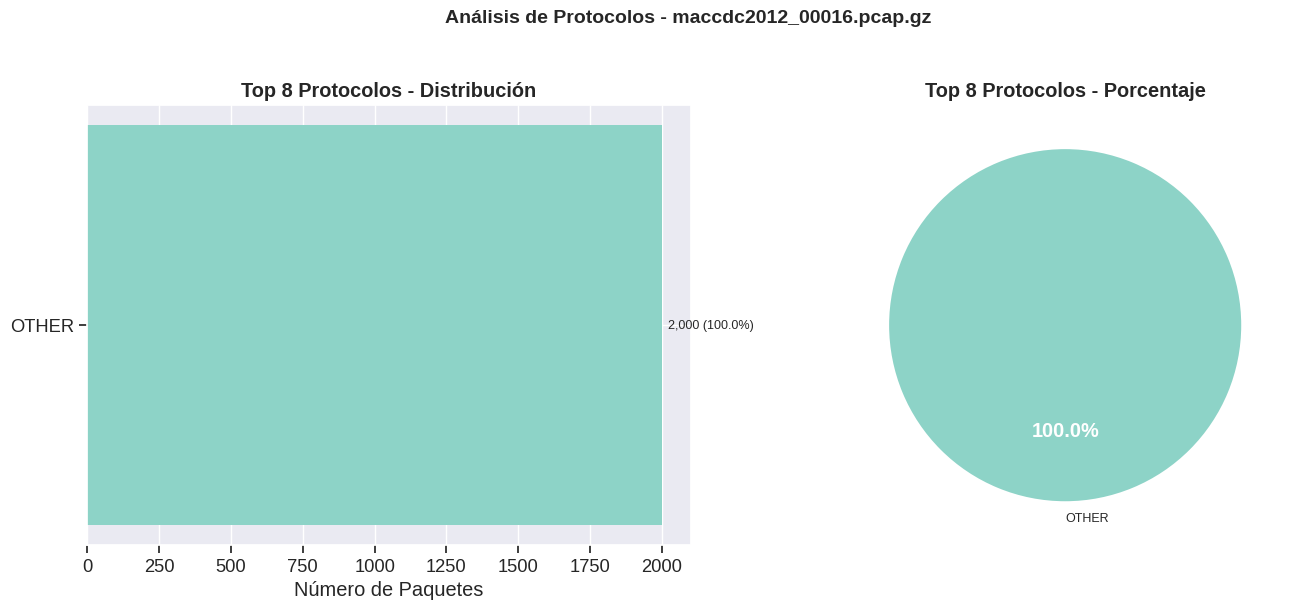

      ✅ Guardado: visualizations/static/1_protocol_distribution_20260212_013720.png

   📊 2/8: Distribución de tamaños de paquetes...


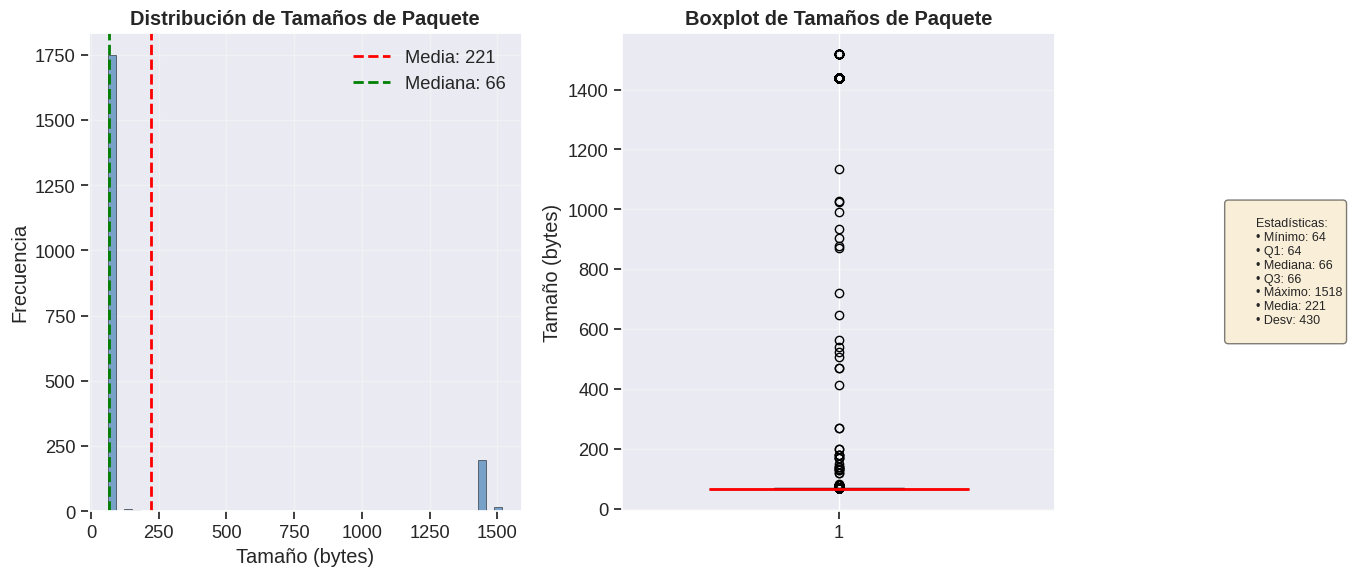

      ✅ Guardado: visualizations/static/2_packet_size_distribution_20260212_013720.png

   📊 3/8: Top direcciones IP...


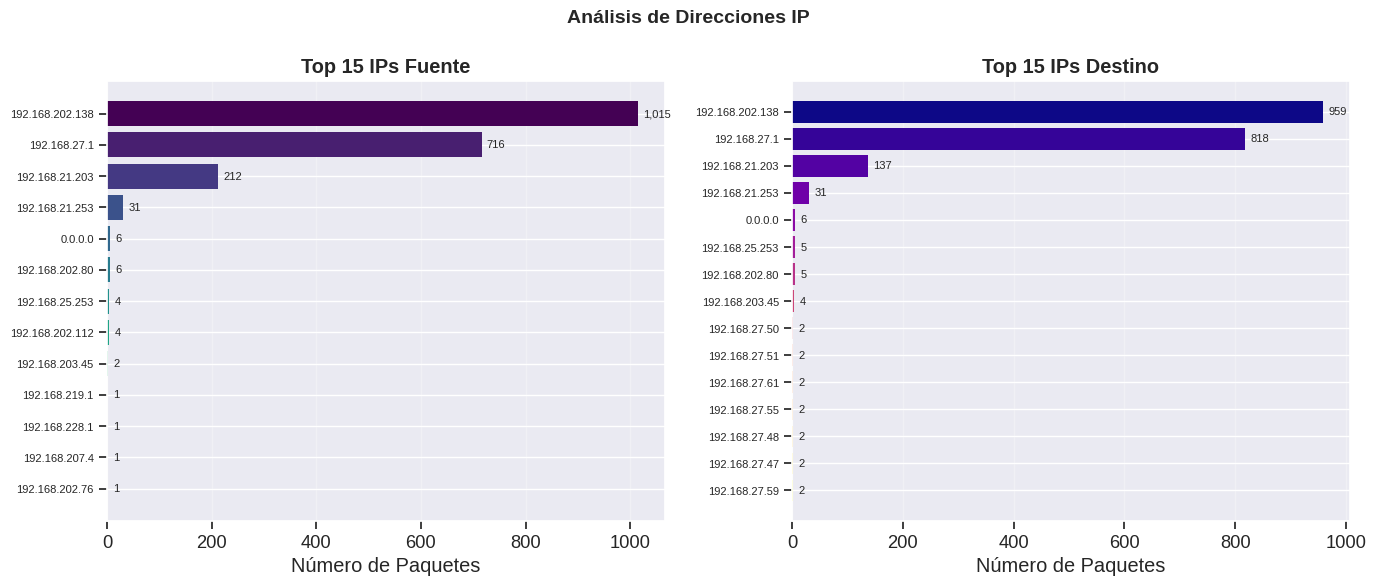

      ✅ Guardado: visualizations/static/3_top_ips_20260212_013720.png

   📊 4/8: Patrones temporales...


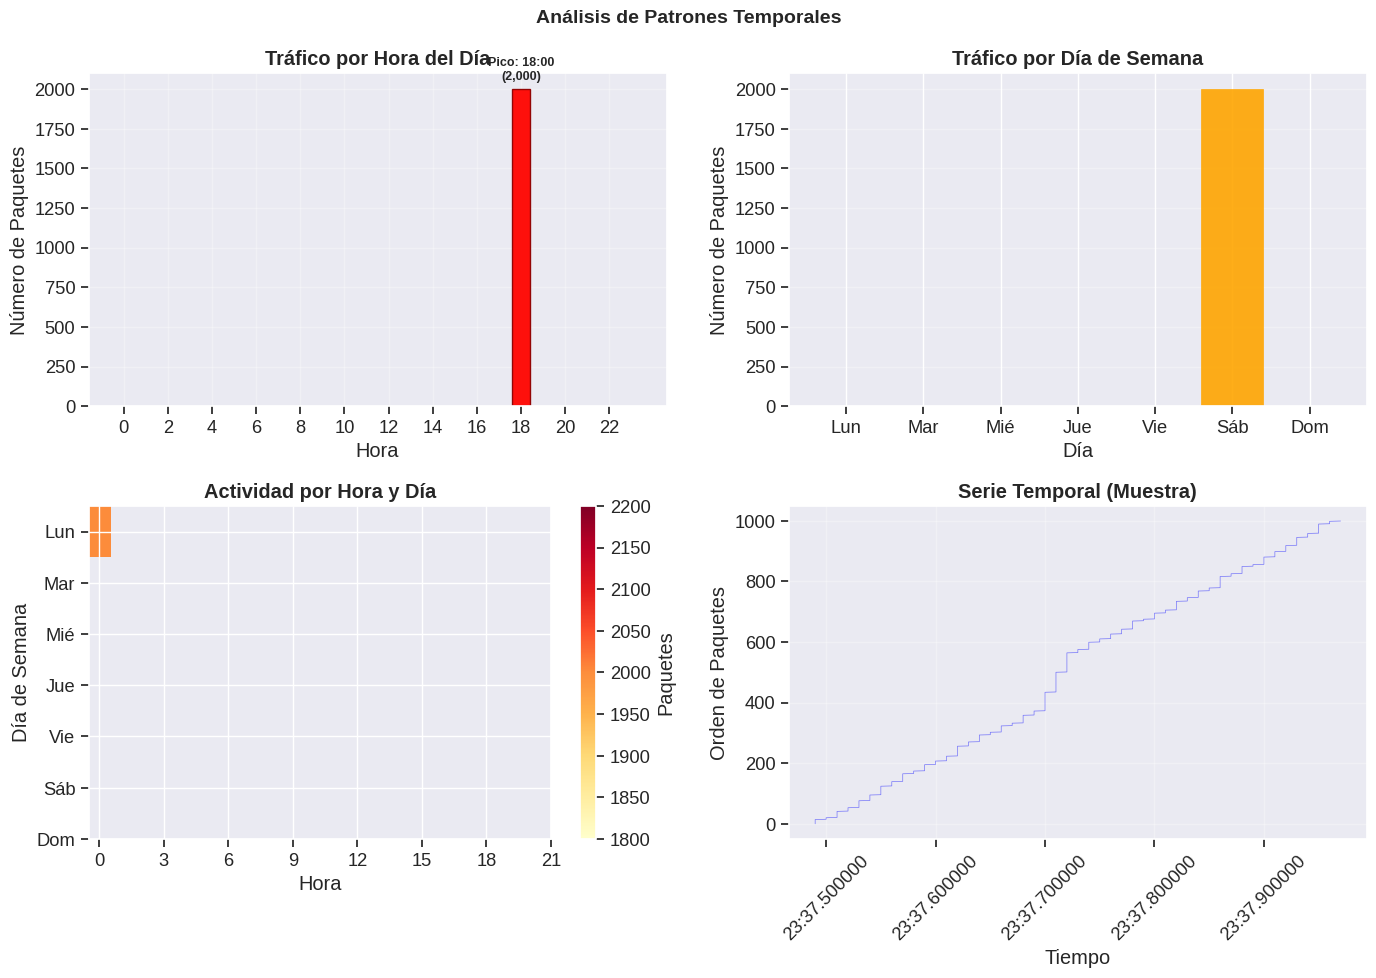

      ✅ Guardado: visualizations/static/4_temporal_patterns_20260212_013720.png

   📊 5/8: Análisis de puertos...


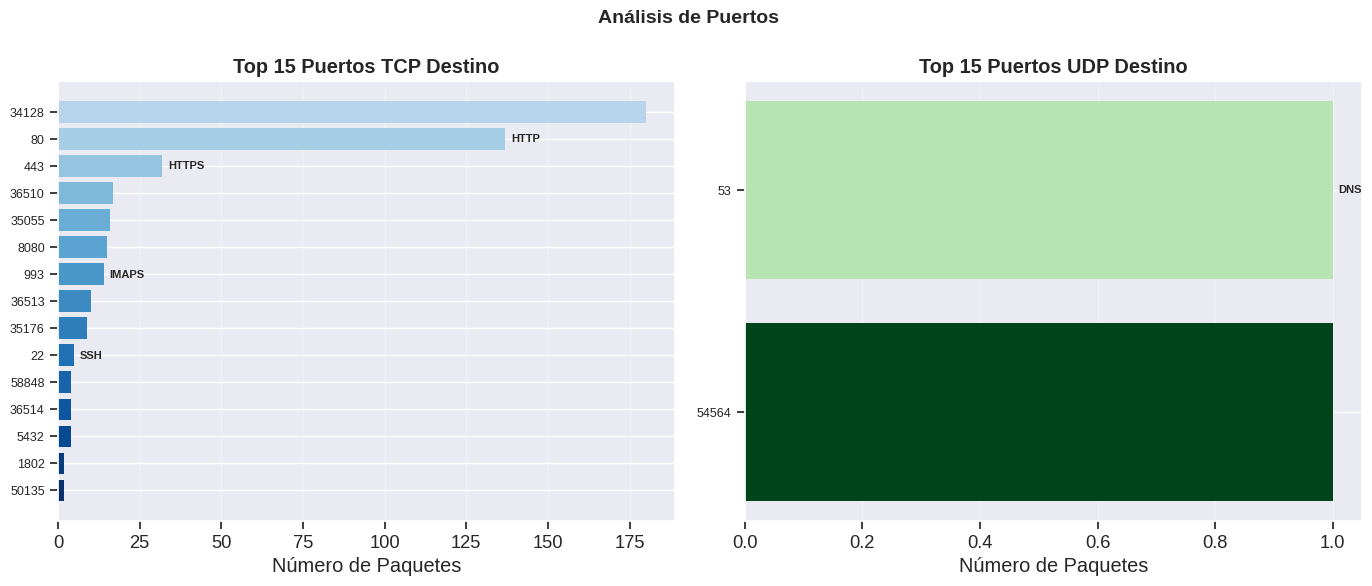

      ✅ Guardado: visualizations/static/5_port_analysis_20260212_013720.png

   📊 6/8: Categorías de tamaño de paquete...


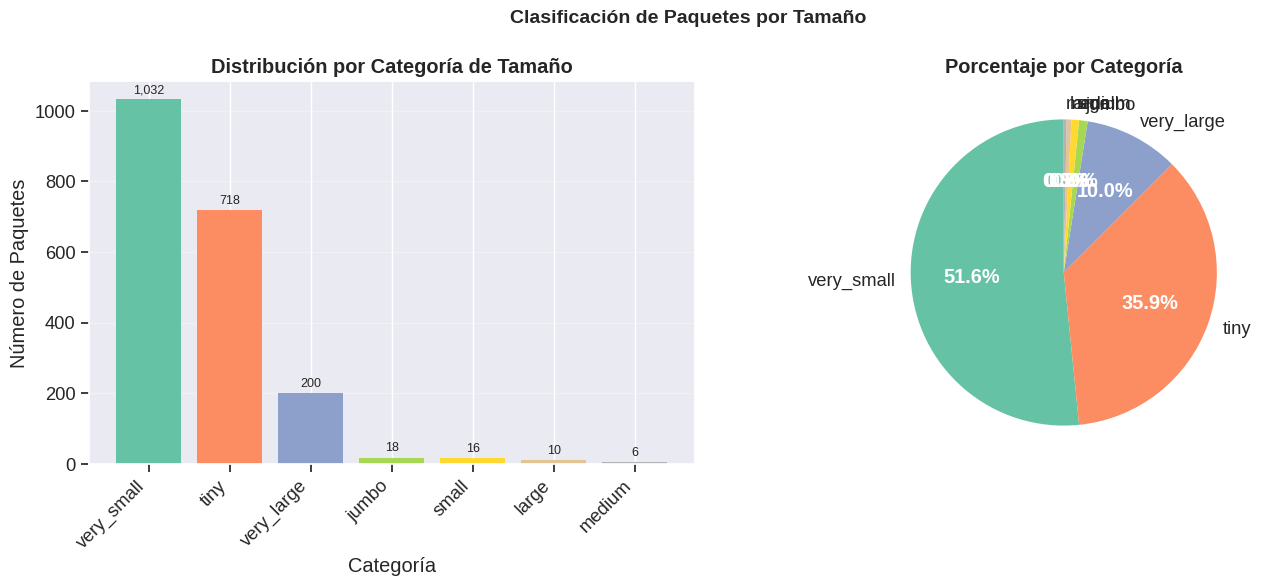

      ✅ Guardado: visualizations/static/6_packet_categories_20260212_013720.png

   📊 7/8: Clasificación de direcciones IP...


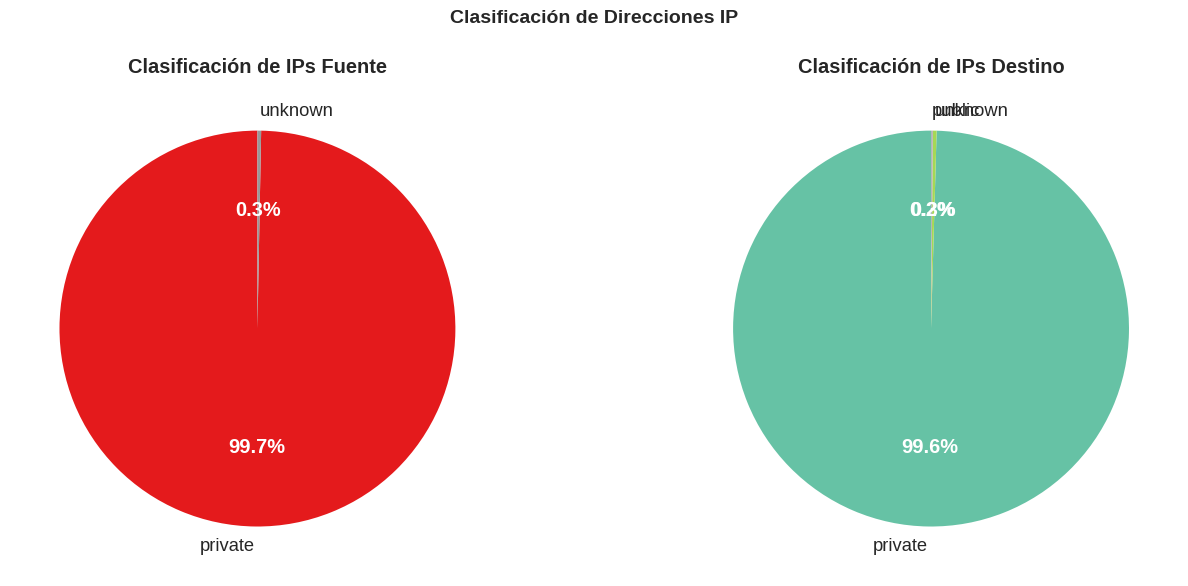

      ✅ Guardado: visualizations/static/7_ip_classification_20260212_013720.png

   📊 8/8: Dashboard resumen...


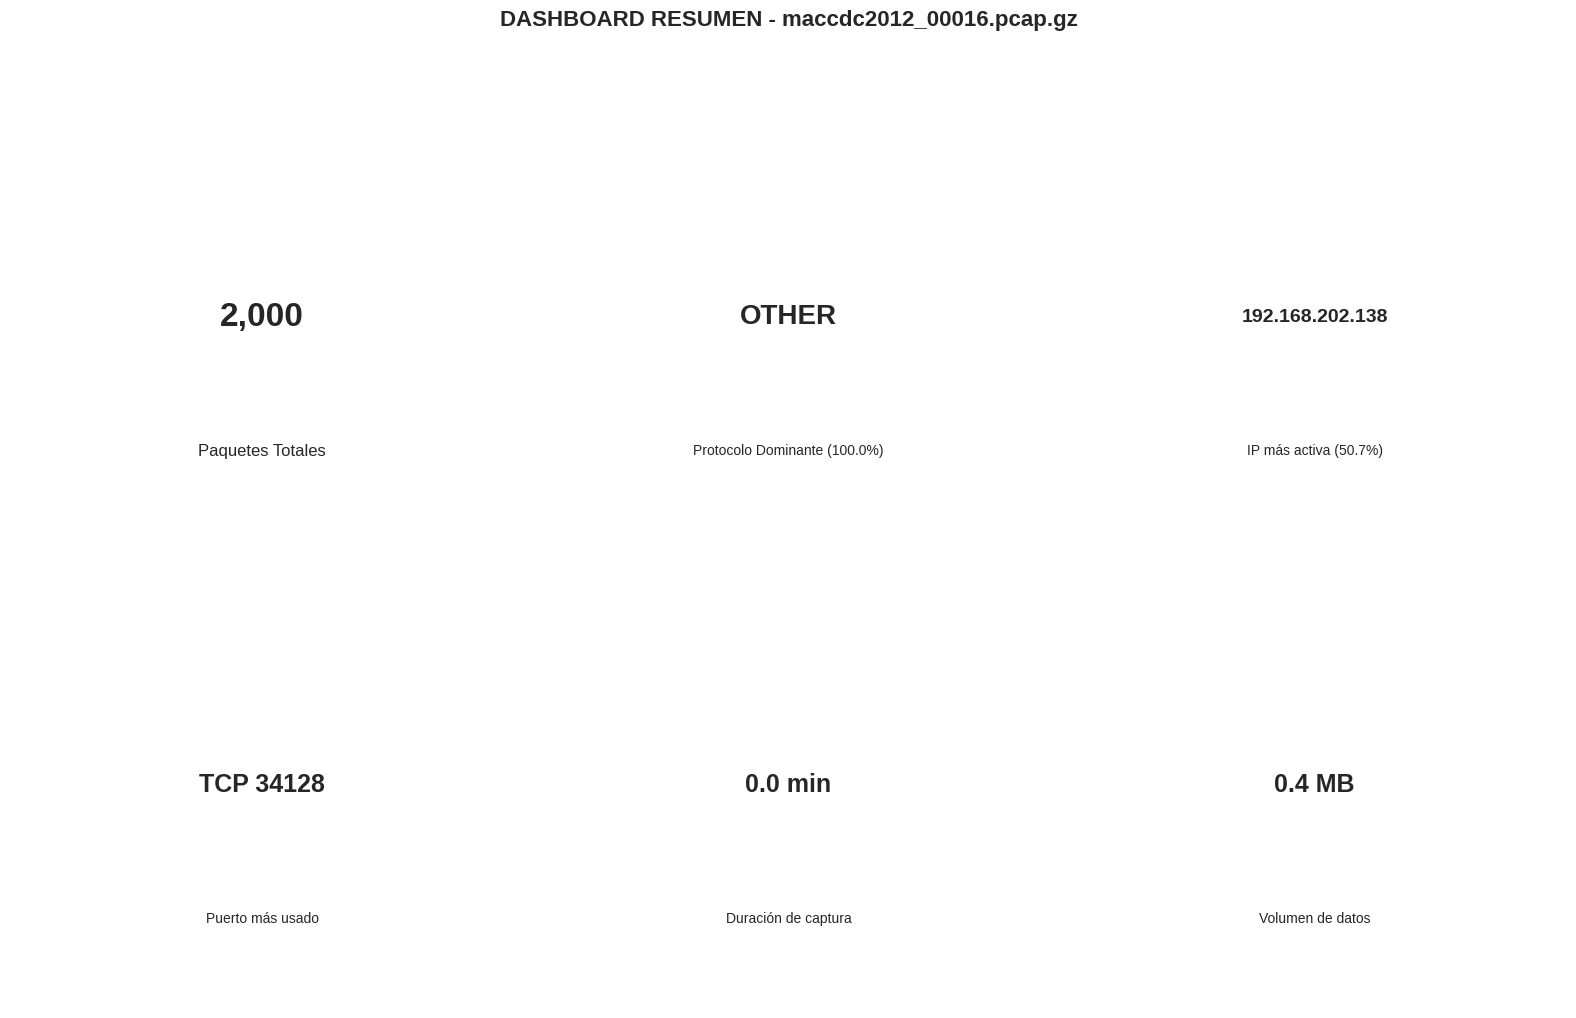

      ✅ Guardado: visualizations/static/8_summary_dashboard_20260212_013720.png

   ✅ Total de visualizaciones: 8

   ✅ Reporte HTML guardado: reports/html/visualization_report_20260212_013727.html

✅ VISUALIZACIONES COMPLETADAS EXITOSAMENTE

   📁 Visualizaciones guardadas en: visualizations/static/
   📁 Reporte HTML guardado en: reports/html/
   🖼️  Total de gráficos: 8

🎨 PROCESO DE VISUALIZACIÓN FINALIZADO


In [34]:
# ============================================
# VISUALIZACIONES PROFESIONALES DEL EDA
# VERSIÓN COMPLETA Y CORREGIDA
# ============================================

print("="*60)
print("🎨 VISUALIZACIONES PROFESIONALES DEL EDA")
print("="*60)

class EDAVisualizer:
    """
    Visualizaciones profesionales para análisis de tráfico de red
    Versión completa con gráficos estáticos y dinámicos
    """

    def __init__(self, df):
        self.df = df.copy() if df is not None else None
        self.timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        self.figure_paths = []

        # Configurar estilo profesional
        plt.style.use('seaborn-v0_8-darkgrid')
        sns.set_palette("husl")
        sns.set_context("notebook", font_scale=1.2)

        # Crear directorios
        os.makedirs('visualizations/static', exist_ok=True)
        os.makedirs('visualizations/interactive', exist_ok=True)

    def plot_protocol_distribution(self):
        """Gráfico 1: Distribución de protocolos"""
        print("\n   📊 1/8: Distribución de protocolos...")

        if 'protocol' not in self.df.columns:
            print("      ⚠️  Columna 'protocol' no encontrada")
            return None

        # Preparar datos
        proto_counts = self.df['protocol'].value_counts().head(8)
        proto_pcts = (proto_counts / len(self.df)) * 100

        # Crear figura con dos subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Gráfico 1: Barras horizontales
        colors = plt.cm.Set3(np.linspace(0, 1, len(proto_counts)))
        bars = ax1.barh(range(len(proto_counts)), proto_counts.values, color=colors)
        ax1.set_yticks(range(len(proto_counts)))
        ax1.set_yticklabels(proto_counts.index)
        ax1.set_xlabel('Número de Paquetes')
        ax1.set_title('Top 8 Protocolos - Distribución', fontweight='bold')
        ax1.invert_yaxis()

        # Añadir etiquetas de valores
        for i, (bar, count, pct) in enumerate(zip(bars, proto_counts.values, proto_pcts.values)):
            width = bar.get_width()
            ax1.text(width + max(proto_counts.values)*0.01, bar.get_y() + bar.get_height()/2,
                    f'{count:,} ({pct:.1f}%)', va='center', fontsize=9)

        # Gráfico 2: Pie chart
        colors_pie = plt.cm.Set3(np.linspace(0, 1, len(proto_counts)))
        wedges, texts, autotexts = ax2.pie(proto_counts.values,
                                           labels=proto_counts.index,
                                           autopct='%1.1f%%',
                                           colors=colors_pie,
                                           startangle=90)

        # Personalizar etiquetas
        for text in texts:
            text.set_fontsize(9)
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')

        ax2.set_title('Top 8 Protocolos - Porcentaje', fontweight='bold')

        # Título general
        fig.suptitle(f'Análisis de Protocolos - {os.path.basename(PCAP_FILE)}',
                    fontsize=14, fontweight='bold', y=1.02)

        plt.tight_layout()

        # Guardar
        filename = f'visualizations/static/1_protocol_distribution_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        plt.close()

        self.figure_paths.append(filename)
        print(f"      ✅ Guardado: {filename}")
        return filename

    def plot_packet_size_distribution(self):
        """Gráfico 2: Distribución de tamaños de paquetes"""
        print("\n   📊 2/8: Distribución de tamaños de paquetes...")

        if 'length' not in self.df.columns:
            print("      ⚠️  Columna 'length' no encontrada")
            return None

        # Preparar datos
        length_data = self.df['length'].dropna()

        if len(length_data) == 0:
            print("      ⚠️  No hay datos de longitud válidos")
            return None

        # Crear figura con dos subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Gráfico 1: Histograma
        n, bins, patches = ax1.hist(length_data, bins=50, alpha=0.7,
                                   color='steelblue', edgecolor='black', linewidth=0.5)
        ax1.set_xlabel('Tamaño (bytes)')
        ax1.set_ylabel('Frecuencia')
        ax1.set_title('Distribución de Tamaños de Paquete', fontweight='bold')
        ax1.grid(True, alpha=0.3)

        # Añadir líneas de estadísticas
        mean_val = length_data.mean()
        median_val = length_data.median()
        ax1.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.0f}')
        ax1.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.0f}')
        ax1.legend()

        # Gráfico 2: Boxplot
        box = ax2.boxplot(length_data, vert=True, patch_artist=True, widths=0.6)
        box['boxes'][0].set_facecolor('lightblue')
        box['boxes'][0].set_alpha(0.7)
        box['medians'][0].set_color('red')
        box['medians'][0].set_linewidth(2)

        ax2.set_ylabel('Tamaño (bytes)')
        ax2.set_title('Boxplot de Tamaños de Paquete', fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='y')

        # Añadir estadísticas como texto
        stats_text = f"""
        Estadísticas:
        • Mínimo: {length_data.min():.0f}
        • Q1: {length_data.quantile(0.25):.0f}
        • Mediana: {length_data.median():.0f}
        • Q3: {length_data.quantile(0.75):.0f}
        • Máximo: {length_data.max():.0f}
        • Media: {length_data.mean():.0f}
        • Desv: {length_data.std():.0f}
        """
        ax2.text(1.4, 0.5, stats_text, transform=ax2.transAxes,
                fontsize=9, verticalalignment='center',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

        plt.tight_layout()

        # Guardar
        filename = f'visualizations/static/2_packet_size_distribution_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        plt.close()

        self.figure_paths.append(filename)
        print(f"      ✅ Guardado: {filename}")
        return filename

    def plot_top_ips(self):
        """Gráfico 3: Top direcciones IP"""
        print("\n   📊 3/8: Top direcciones IP...")

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Top IPs fuente
        if 'src_ip' in self.df.columns:
            src_counts = self.df['src_ip'].value_counts().head(15)
            colors = plt.cm.viridis(np.linspace(0, 1, len(src_counts)))

            bars1 = ax1.barh(range(len(src_counts)), src_counts.values, color=colors)
            ax1.set_yticks(range(len(src_counts)))
            ax1.set_yticklabels(src_counts.index, fontsize=8)
            ax1.set_xlabel('Número de Paquetes')
            ax1.set_title('Top 15 IPs Fuente', fontweight='bold')
            ax1.invert_yaxis()
            ax1.grid(True, alpha=0.3, axis='x')

            # Añadir etiquetas
            for bar, count in zip(bars1, src_counts.values):
                width = bar.get_width()
                ax1.text(width + max(src_counts.values)*0.01,
                        bar.get_y() + bar.get_height()/2,
                        f'{count:,}', va='center', fontsize=8)

        # Top IPs destino
        if 'dst_ip' in self.df.columns:
            dst_counts = self.df['dst_ip'].value_counts().head(15)
            colors = plt.cm.plasma(np.linspace(0, 1, len(dst_counts)))

            bars2 = ax2.barh(range(len(dst_counts)), dst_counts.values, color=colors)
            ax2.set_yticks(range(len(dst_counts)))
            ax2.set_yticklabels(dst_counts.index, fontsize=8)
            ax2.set_xlabel('Número de Paquetes')
            ax2.set_title('Top 15 IPs Destino', fontweight='bold')
            ax2.invert_yaxis()
            ax2.grid(True, alpha=0.3, axis='x')

            # Añadir etiquetas
            for bar, count in zip(bars2, dst_counts.values):
                width = bar.get_width()
                ax2.text(width + max(dst_counts.values)*0.01,
                        bar.get_y() + bar.get_height()/2,
                        f'{count:,}', va='center', fontsize=8)

        plt.suptitle('Análisis de Direcciones IP', fontsize=14, fontweight='bold')
        plt.tight_layout()

        # Guardar
        filename = f'visualizations/static/3_top_ips_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        plt.close()

        self.figure_paths.append(filename)
        print(f"      ✅ Guardado: {filename}")
        return filename

    def plot_temporal_patterns(self):
        """Gráfico 4: Patrones temporales"""
        print("\n   📊 4/8: Patrones temporales...")

        if 'hour' not in self.df.columns:
            print("      ⚠️  Columna 'hour' no encontrada")
            return None

        fig, axes = plt.subplots(2, 2, figsize=(14, 10))

        # 1. Tráfico por hora
        hour_counts = self.df['hour'].value_counts().sort_index()
        hours = range(24)
        hour_vals = [hour_counts.get(h, 0) for h in hours]

        axes[0,0].bar(hours, hour_vals, color='coral', alpha=0.7, edgecolor='darkred', linewidth=0.5)
        axes[0,0].set_title('Tráfico por Hora del Día', fontweight='bold')
        axes[0,0].set_xlabel('Hora')
        axes[0,0].set_ylabel('Número de Paquetes')
        axes[0,0].set_xticks(range(0, 24, 2))
        axes[0,0].grid(True, alpha=0.3)

        # Marcar hora pico
        peak_hour = hour_counts.idxmax()
        peak_count = hour_counts.max()
        axes[0,0].bar(peak_hour, peak_count, color='red', alpha=0.9, edgecolor='darkred', linewidth=1)
        axes[0,0].text(peak_hour, peak_count + max(hour_vals)*0.02,
                      f'Pico: {peak_hour}:00\n({peak_count:,})',
                      ha='center', va='bottom', fontsize=9, fontweight='bold')

        # 2. Tráfico por día de semana
        if 'day_of_week' in self.df.columns:
            dow_counts = self.df['day_of_week'].value_counts().sort_index()
            days = ['Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb', 'Dom']
            dow_vals = [dow_counts.get(i, 0) for i in range(7)]

            bars = axes[0,1].bar(days, dow_vals, color='lightgreen', alpha=0.7,
                                edgecolor='darkgreen', linewidth=0.5)
            axes[0,1].set_title('Tráfico por Día de Semana', fontweight='bold')
            axes[0,1].set_xlabel('Día')
            axes[0,1].set_ylabel('Número de Paquetes')
            axes[0,1].grid(True, alpha=0.3, axis='y')

            # Destacar fin de semana
            for i in [5,6]:
                if i < len(bars):
                    bars[i].set_color('orange')
                    bars[i].set_alpha(0.9)

        # 3. Heatmap hora vs día
        if 'hour' in self.df.columns and 'day_of_week' in self.df.columns:
            heatmap_data = self.df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)
            im = axes[1,0].imshow(heatmap_data.values, cmap='YlOrRd', aspect='auto')
            axes[1,0].set_title('Actividad por Hora y Día', fontweight='bold')
            axes[1,0].set_xlabel('Hora')
            axes[1,0].set_ylabel('Día de Semana')
            axes[1,0].set_xticks(range(0, 24, 3))
            axes[1,0].set_yticks(range(7))
            axes[1,0].set_yticklabels(days)
            plt.colorbar(im, ax=axes[1,0], label='Paquetes')

        # 4. Serie temporal (muestra)
        if 'timestamp' in self.df.columns and len(self.df) > 0:
            # Tomar muestra para visualización
            sample_size = min(1000, len(self.df))
            sample_df = self.df.sample(sample_size).sort_values('timestamp')

            axes[1,1].plot(sample_df['timestamp'], range(len(sample_df)),
                          'b-', alpha=0.5, linewidth=0.5)
            axes[1,1].set_title('Serie Temporal (Muestra)', fontweight='bold')
            axes[1,1].set_xlabel('Tiempo')
            axes[1,1].set_ylabel('Orden de Paquetes')
            axes[1,1].grid(True, alpha=0.3)

            # Rotar etiquetas de fecha
            plt.setp(axes[1,1].xaxis.get_majorticklabels(), rotation=45)

        plt.suptitle('Análisis de Patrones Temporales', fontsize=14, fontweight='bold')
        plt.tight_layout()

        # Guardar
        filename = f'visualizations/static/4_temporal_patterns_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        plt.close()

        self.figure_paths.append(filename)
        print(f"      ✅ Guardado: {filename}")
        return filename

    def plot_port_analysis(self):
        """Gráfico 5: Análisis de puertos"""
        print("\n   📊 5/8: Análisis de puertos...")

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Puertos TCP
        if 'tcp_dstport' in self.df.columns:
            tcp_ports = self.df['tcp_dstport'].dropna()
            if len(tcp_ports) > 0:
                tcp_counts = tcp_ports.value_counts().head(15)
                colors = plt.cm.Blues(np.linspace(0.3, 1, len(tcp_counts)))

                bars = ax1.barh(range(len(tcp_counts)), tcp_counts.values, color=colors)
                ax1.set_yticks(range(len(tcp_counts)))
                ax1.set_yticklabels([int(p) for p in tcp_counts.index], fontsize=9)
                ax1.set_xlabel('Número de Paquetes')
                ax1.set_title('Top 15 Puertos TCP Destino', fontweight='bold')
                ax1.invert_yaxis()
                ax1.grid(True, alpha=0.3, axis='x')

                # Añadir etiquetas de servicios conocidos
                well_known = {80: 'HTTP', 443: 'HTTPS', 22: 'SSH', 21: 'FTP',
                            25: 'SMTP', 53: 'DNS', 110: 'POP3', 143: 'IMAP',
                            993: 'IMAPS', 995: 'POP3S', 3389: 'RDP'}

                for i, (bar, port) in enumerate(zip(bars, tcp_counts.index)):
                    port_int = int(port)
                    if port_int in well_known:
                        ax1.text(bar.get_width() + max(tcp_counts.values)*0.01,
                                bar.get_y() + bar.get_height()/2,
                                well_known[port_int], va='center', fontsize=8, fontweight='bold')

        # Puertos UDP
        if 'udp_dstport' in self.df.columns:
            udp_ports = self.df['udp_dstport'].dropna()
            if len(udp_ports) > 0:
                udp_counts = udp_ports.value_counts().head(15)
                colors = plt.cm.Greens(np.linspace(0.3, 1, len(udp_counts)))

                bars = ax2.barh(range(len(udp_counts)), udp_counts.values, color=colors)
                ax2.set_yticks(range(len(udp_counts)))
                ax2.set_yticklabels([int(p) for p in udp_counts.index], fontsize=9)
                ax2.set_xlabel('Número de Paquetes')
                ax2.set_title('Top 15 Puertos UDP Destino', fontweight='bold')
                ax2.invert_yaxis()
                ax2.grid(True, alpha=0.3, axis='x')

                # Añadir etiquetas de servicios conocidos
                well_known_udp = {53: 'DNS', 67: 'DHCP', 68: 'DHCP', 69: 'TFTP',
                                123: 'NTP', 161: 'SNMP', 162: 'SNMP', 514: 'Syslog'}

                for i, (bar, port) in enumerate(zip(bars, udp_counts.index)):
                    port_int = int(port)
                    if port_int in well_known_udp:
                        ax2.text(bar.get_width() + max(udp_counts.values)*0.01,
                                bar.get_y() + bar.get_height()/2,
                                well_known_udp[port_int], va='center', fontsize=8, fontweight='bold')

        plt.suptitle('Análisis de Puertos', fontsize=14, fontweight='bold')
        plt.tight_layout()

        # Guardar
        filename = f'visualizations/static/5_port_analysis_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        plt.close()

        self.figure_paths.append(filename)
        print(f"      ✅ Guardado: {filename}")
        return filename

    def plot_packet_size_categories(self):
        """Gráfico 6: Categorías de tamaño de paquete"""
        print("\n   📊 6/8: Categorías de tamaño de paquete...")

        if 'packet_size_category' not in self.df.columns:
            print("      ⚠️  Columna 'packet_size_category' no encontrada")
            return None

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Distribución de categorías
        cat_counts = self.df['packet_size_category'].value_counts()
        colors = plt.cm.Set2(np.linspace(0, 1, len(cat_counts)))

        # Barras
        bars = ax1.bar(range(len(cat_counts)), cat_counts.values, color=colors)
        ax1.set_xticks(range(len(cat_counts)))
        ax1.set_xticklabels(cat_counts.index, rotation=45, ha='right')
        ax1.set_xlabel('Categoría')
        ax1.set_ylabel('Número de Paquetes')
        ax1.set_title('Distribución por Categoría de Tamaño', fontweight='bold')
        ax1.grid(True, alpha=0.3, axis='y')

        # Añadir etiquetas
        for bar, count in zip(bars, cat_counts.values):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2, height + max(cat_counts.values)*0.01,
                    f'{count:,}', ha='center', va='bottom', fontsize=9)

        # Pie chart
        wedges, texts, autotexts = ax2.pie(cat_counts.values,
                                           labels=cat_counts.index,
                                           autopct='%1.1f%%',
                                           colors=colors,
                                           startangle=90)

        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')

        ax2.set_title('Porcentaje por Categoría', fontweight='bold')

        plt.suptitle('Clasificación de Paquetes por Tamaño', fontsize=14, fontweight='bold')
        plt.tight_layout()

        # Guardar
        filename = f'visualizations/static/6_packet_categories_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        plt.close()

        self.figure_paths.append(filename)
        print(f"      ✅ Guardado: {filename}")
        return filename

    def plot_ip_classification(self):
        """Gráfico 7: Clasificación de IPs"""
        print("\n   📊 7/8: Clasificación de direcciones IP...")

        # Buscar columnas de tipo de IP
        src_type_col = None
        dst_type_col = None

        for col in self.df.columns:
            if 'src_ip_type' in col or 'src_type' in col:
                src_type_col = col
            if 'dst_ip_type' in col or 'dst_type' in col:
                dst_type_col = col

        if src_type_col is None and dst_type_col is None:
            print("      ⚠️  No se encontraron columnas de clasificación IP")
            return None

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Clasificación de IPs fuente
        if src_type_col and src_type_col in self.df.columns:
            src_types = self.df[src_type_col].value_counts()
            colors = plt.cm.Set1(np.linspace(0, 1, len(src_types)))

            wedges, texts, autotexts = ax1.pie(src_types.values,
                                               labels=src_types.index,
                                               autopct='%1.1f%%',
                                               colors=colors,
                                               startangle=90)

            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')

            ax1.set_title('Clasificación de IPs Fuente', fontweight='bold')

        # Clasificación de IPs destino
        if dst_type_col and dst_type_col in self.df.columns:
            dst_types = self.df[dst_type_col].value_counts()
            colors = plt.cm.Set2(np.linspace(0, 1, len(dst_types)))

            wedges, texts, autotexts = ax2.pie(dst_types.values,
                                               labels=dst_types.index,
                                               autopct='%1.1f%%',
                                               colors=colors,
                                               startangle=90)

            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')

            ax2.set_title('Clasificación de IPs Destino', fontweight='bold')

        plt.suptitle('Clasificación de Direcciones IP', fontsize=14, fontweight='bold')
        plt.tight_layout()

        # Guardar
        filename = f'visualizations/static/7_ip_classification_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        plt.close()

        self.figure_paths.append(filename)
        print(f"      ✅ Guardado: {filename}")
        return filename

    def plot_summary_dashboard(self):
        """Gráfico 8: Dashboard resumen"""
        print("\n   📊 8/8: Dashboard resumen...")

        fig, axes = plt.subplots(2, 3, figsize=(16, 10))

        # 1. Total paquetes
        axes[0,0].text(0.5, 0.5, f'{len(self.df):,}',
                      ha='center', va='center', fontsize=24, fontweight='bold')
        axes[0,0].text(0.5, 0.2, 'Paquetes Totales',
                      ha='center', va='center', fontsize=12)
        axes[0,0].set_xlim(0, 1)
        axes[0,0].set_ylim(0, 1)
        axes[0,0].axis('off')
        axes[0,0].patch.set_facecolor('#e6f3ff')

        # 2. Protocolo dominante
        if 'protocol' in self.df.columns:
            top_proto = self.df['protocol'].value_counts().index[0]
            top_pct = (self.df['protocol'].value_counts().iloc[0] / len(self.df)) * 100
            axes[0,1].text(0.5, 0.5, f'{top_proto}',
                          ha='center', va='center', fontsize=20, fontweight='bold')
            axes[0,1].text(0.5, 0.2, f'Protocolo Dominante ({top_pct:.1f}%)',
                          ha='center', va='center', fontsize=10)
        else:
            axes[0,1].text(0.5, 0.5, 'N/A', ha='center', va='center', fontsize=20)
            axes[0,1].text(0.5, 0.2, 'Protocolo Dominante', ha='center', va='center', fontsize=10)

        axes[0,1].set_xlim(0, 1)
        axes[0,1].set_ylim(0, 1)
        axes[0,1].axis('off')
        axes[0,1].patch.set_facecolor('#fff3e0')

        # 3. IP más activa
        if 'src_ip' in self.df.columns:
            top_ip = self.df['src_ip'].value_counts().index[0]
            top_ip_pct = (self.df['src_ip'].value_counts().iloc[0] / len(self.df)) * 100
            axes[0,2].text(0.5, 0.5, f'{top_ip[:15]}...' if len(top_ip) > 15 else top_ip,
                          ha='center', va='center', fontsize=14, fontweight='bold')
            axes[0,2].text(0.5, 0.2, f'IP más activa ({top_ip_pct:.1f}%)',
                          ha='center', va='center', fontsize=10)
        else:
            axes[0,2].text(0.5, 0.5, 'N/A', ha='center', va='center', fontsize=20)
            axes[0,2].text(0.5, 0.2, 'IP más activa', ha='center', va='center', fontsize=10)

        axes[0,2].set_xlim(0, 1)
        axes[0,2].set_ylim(0, 1)
        axes[0,2].axis('off')
        axes[0,2].patch.set_facecolor('#e8f5e9')

        # 4. Puerto más usado
        port_text = 'N/A'
        if 'tcp_dstport' in self.df.columns:
            tcp_ports = self.df['tcp_dstport'].dropna()
            if len(tcp_ports) > 0:
                top_tcp = int(tcp_ports.value_counts().index[0])
                port_text = f'TCP {top_tcp}'

        axes[1,0].text(0.5, 0.5, port_text, ha='center', va='center', fontsize=18, fontweight='bold')
        axes[1,0].text(0.5, 0.2, 'Puerto más usado', ha='center', va='center', fontsize=10)
        axes[1,0].set_xlim(0, 1)
        axes[1,0].set_ylim(0, 1)
        axes[1,0].axis('off')
        axes[1,0].patch.set_facecolor('#f3e5f5')

        # 5. Duración de captura
        if 'timestamp' in self.df.columns:
            time_min = self.df['timestamp'].min()
            time_max = self.df['timestamp'].max()
            duration = (time_max - time_min).total_seconds() / 60
            axes[1,1].text(0.5, 0.5, f'{duration:.1f} min',
                          ha='center', va='center', fontsize=18, fontweight='bold')
        else:
            axes[1,1].text(0.5, 0.5, 'N/A', ha='center', va='center', fontsize=18)
        axes[1,1].text(0.5, 0.2, 'Duración de captura', ha='center', va='center', fontsize=10)
        axes[1,1].set_xlim(0, 1)
        axes[1,1].set_ylim(0, 1)
        axes[1,1].axis('off')
        axes[1,1].patch.set_facecolor('#ffebee')

        # 6. Volumen de datos
        if 'length' in self.df.columns:
            total_mb = self.df['length'].sum() / (1024**2)
            axes[1,2].text(0.5, 0.5, f'{total_mb:.1f} MB',
                          ha='center', va='center', fontsize=18, fontweight='bold')
        else:
            axes[1,2].text(0.5, 0.5, 'N/A', ha='center', va='center', fontsize=18)
        axes[1,2].text(0.5, 0.2, 'Volumen de datos', ha='center', va='center', fontsize=10)
        axes[1,2].set_xlim(0, 1)
        axes[1,2].set_ylim(0, 1)
        axes[1,2].axis('off')
        axes[1,2].patch.set_facecolor('#e0f2f1')

        plt.suptitle(f'DASHBOARD RESUMEN - {os.path.basename(PCAP_FILE)}',
                    fontsize=16, fontweight='bold', y=1.02)
        plt.tight_layout()

        # Guardar
        filename = f'visualizations/static/8_summary_dashboard_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        plt.close()

        self.figure_paths.append(filename)
        print(f"      ✅ Guardado: {filename}")
        return filename

    def generate_all_visualizations(self):
        """Genera todas las visualizaciones"""

        print("\n🎨 GENERANDO TODAS LAS VISUALIZACIONES...")
        print("   " + "-"*40)

        if self.df is None or self.df.empty:
            print("   ❌ No hay datos para visualizar")
            return []

        self.plot_protocol_distribution()
        self.plot_packet_size_distribution()
        self.plot_top_ips()
        self.plot_temporal_patterns()
        self.plot_port_analysis()
        self.plot_packet_size_categories()
        self.plot_ip_classification()
        self.plot_summary_dashboard()

        print(f"\n   ✅ Total de visualizaciones: {len(self.figure_paths)}")

        return self.figure_paths

    def create_visualization_report(self):
        """Crea un reporte HTML con todas las visualizaciones"""

        if not self.figure_paths:
            print("   ❌ No hay visualizaciones para incluir en el reporte")
            return None

        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        html_file = f'reports/html/visualization_report_{timestamp}.html'

        html_content = f"""
        <!DOCTYPE html>
        <html lang="es">
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>Reporte de Visualizaciones - Análisis PCAP</title>
            <style>
                body {{
                    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
                    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                    margin: 0;
                    padding: 20px;
                }}
                .container {{
                    max-width: 1200px;
                    margin: 0 auto;
                    background: white;
                    padding: 30px;
                    border-radius: 15px;
                    box-shadow: 0 20px 40px rgba(0,0,0,0.1);
                }}
                .header {{
                    text-align: center;
                    padding: 20px;
                    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                    color: white;
                    border-radius: 10px;
                    margin-bottom: 30px;
                }}
                .header h1 {{
                    margin: 0;
                    font-size: 28px;
                }}
                .header p {{
                    margin: 5px 0 0;
                    opacity: 0.9;
                }}
                .visualization {{
                    margin: 30px 0;
                    padding: 20px;
                    background: white;
                    border-radius: 10px;
                    box-shadow: 0 4px 6px rgba(0,0,0,0.1);
                    text-align: center;
                }}
                .visualization img {{
                    max-width: 100%;
                    height: auto;
                    border-radius: 8px;
                    box-shadow: 0 2px 4px rgba(0,0,0,0.1);
                }}
                .visualization h3 {{
                    color: #333;
                    margin-top: 0;
                    margin-bottom: 15px;
                    padding-bottom: 10px;
                    border-bottom: 2px solid #667eea;
                }}
                .footer {{
                    text-align: center;
                    margin-top: 40px;
                    padding: 20px;
                    color: #666;
                    font-size: 14px;
                    border-top: 1px solid #ddd;
                }}
            </style>
        </head>
        <body>
            <div class="container">
                <div class="header">
                    <h1>📊 Reporte de Visualizaciones - Análisis PCAP</h1>
                    <p>Proyecto: {PROJECT_NAME}</p>
                    <p>Archivo: {os.path.basename(PCAP_FILE)}</p>
                    <p>Fecha: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}</p>
                </div>
        """

        # Agregar cada visualización
        titles = [
            '1. Distribución de Protocolos',
            '2. Distribución de Tamaños de Paquete',
            '3. Top Direcciones IP',
            '4. Patrones Temporales',
            '5. Análisis de Puertos',
            '6. Categorías de Tamaño de Paquete',
            '7. Clasificación de IPs',
            '8. Dashboard Resumen'
        ]

        for i, (path, title) in enumerate(zip(self.figure_paths, titles)):
            # Convertir ruta relativa a nombre de archivo
            filename = os.path.basename(path)
            html_content += f"""
                <div class="visualization">
                    <h3>{title}</h3>
                    <img src="../../{path}" alt="{title}">
                </div>
            """

        html_content += f"""
                <div class="footer">
                    <p>Reporte generado automáticamente por el sistema de análisis PCAP</p>
                    <p>© {datetime.now().year} - {PROJECT_NAME}</p>
                </div>
            </div>
        </body>
        </html>
        """

        os.makedirs('reports/html', exist_ok=True)
        with open(html_file, 'w', encoding='utf-8') as f:
            f.write(html_content)

        print(f"\n   ✅ Reporte HTML guardado: {html_file}")

        return html_file


# ============================================
# EJECUTAR VISUALIZACIONES
# ============================================

print("\n" + "="*60)
print("🚀 INICIANDO GENERACIÓN DE VISUALIZACIONES")
print("="*60)

# Verificar que tenemos datos limpios
if 'df_clean' not in dir() or df_clean is None:
    print("\n⚠️ No se encontraron datos limpios, intentando usar datos crudos...")

    if 'df_raw' in dir() and df_raw is not None:
        print("   ✅ Usando datos crudos para visualizaciones")
        df_clean = df_raw
    else:
        print("   ❌ No hay datos disponibles para visualizaciones")
        df_clean = None

# Ejecutar visualizaciones
if df_clean is not None and len(df_clean) > 0:
    print(f"\n📊 DATOS PARA VISUALIZACIONES:")
    print(f"   • Filas: {len(df_clean):,}")
    print(f"   • Columnas: {len(df_clean.columns)}")
    print(f"   • Memoria: {df_clean.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

    # Inicializar visualizador
    visualizer = EDAVisualizer(df_clean)

    # Generar todas las visualizaciones
    figure_paths = visualizer.generate_all_visualizations()

    # Crear reporte HTML
    if figure_paths:
        html_report = visualizer.create_visualization_report()

        print("\n" + "="*60)
        print("✅ VISUALIZACIONES COMPLETADAS EXITOSAMENTE")
        print("="*60)
        print(f"\n   📁 Visualizaciones guardadas en: visualizations/static/")
        print(f"   📁 Reporte HTML guardado en: reports/html/")
        print(f"   🖼️  Total de gráficos: {len(figure_paths)}")

else:
    print("\n❌ ERROR: No hay datos para generar visualizaciones")
    print("   Por favor, ejecuta primero las celdas 3.1 y 3.2")

print("\n" + "="*60)
print("🎨 PROCESO DE VISUALIZACIÓN FINALIZADO")
print("="*60)

In [35]:
# ============================================
# VISUALIZACIONES INTERACTIVAS CON PLOTLY
# VERSIÓN COMPLETA Y CORREGIDA
# ============================================

print("="*60)
print("📊 VISUALIZACIONES INTERACTIVAS CON PLOTLY")
print("="*60)

class InteractiveVisualizer:
    """
    Visualizaciones interactivas profesionales con Plotly
    Versión completa para análisis de tráfico de red
    """

    def __init__(self, df):
        self.df = df.copy() if df is not None else None
        self.timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        self.figure_paths = []

        # Verificar Plotly
        try:
            import plotly.express as px
            import plotly.graph_objects as go
            from plotly.subplots import make_subplots
            self.px = px
            self.go = go
            self.make_subplots = make_subplots
            self.plotly_available = True
            print("   ✅ Plotly disponible")
        except ImportError:
            print("   ⚠️ Plotly no disponible, instalando...")
            !pip install plotly -q
            import plotly.express as px
            import plotly.graph_objects as go
            from plotly.subplots import make_subplots
            self.px = px
            self.go = go
            self.make_subplots = make_subplots
            self.plotly_available = True

        # Crear directorios
        os.makedirs('visualizations/interactive', exist_ok=True)

    def create_protocol_sunburst(self):
        """Gráfico 1: Sunburst de protocolos (jerárquico)"""
        print("\n   📊 1/6: Sunburst de protocolos...")

        if 'protocol' not in self.df.columns:
            print("      ⚠️  Columna 'protocol' no encontrada")
            return None

        # Preparar datos
        proto_counts = self.df['protocol'].value_counts().reset_index()
        proto_counts.columns = ['Protocolo', 'Cantidad']

        # Crear gráfico sunburst
        fig = self.px.sunburst(
            proto_counts.head(10),
            path=['Protocolo'],
            values='Cantidad',
            title='Distribución Jerárquica de Protocolos',
            color='Cantidad',
            color_continuous_scale='Viridis',
            template='plotly_white'
        )

        fig.update_layout(
            title={
                'text': 'Distribución Jerárquica de Protocolos',
                'x': 0.5,
                'xanchor': 'center',
                'font': {'size': 20, 'family': 'Arial', 'color': '#2c3e50'}
            },
            width=800,
            height=600,
            margin=dict(t=100, l=0, r=0, b=0)
        )

        # Guardar
        filename = f'visualizations/interactive/1_protocol_sunburst_{self.timestamp}.html'
        fig.write_html(filename)
        self.figure_paths.append(filename)
        fig.show()

        print(f"      ✅ Guardado: {filename}")
        return filename

    def create_temporal_heatmap(self):
        """Gráfico 2: Heatmap interactivo temporal"""
        print("\n   📊 2/6: Heatmap temporal interactivo...")

        if 'hour' not in self.df.columns or 'day_of_week' not in self.df.columns:
            print("      ⚠️  Columnas temporales no encontradas")
            return None

        # Crear matriz de actividad
        heatmap_data = self.df.groupby(['day_of_week', 'hour']).size().reset_index()
        heatmap_data.columns = ['Día', 'Hora', 'Paquetes']

        # Mapear días
        day_map = {0: 'Lunes', 1: 'Martes', 2: 'Miércoles', 3: 'Jueves',
                   4: 'Viernes', 5: 'Sábado', 6: 'Domingo'}
        heatmap_data['Día'] = heatmap_data['Día'].map(day_map)

        # Crear heatmap
        fig = self.px.density_heatmap(
            heatmap_data,
            x='Hora',
            y='Día',
            z='Paquetes',
            title='Actividad de Red por Hora y Día',
            color_continuous_scale='Viridis',
            template='plotly_white',
            labels={'Paquetes': 'Número de Paquetes'}
        )

        fig.update_layout(
            title={
                'text': 'Actividad de Red por Hora y Día',
                'x': 0.5,
                'xanchor': 'center',
                'font': {'size': 20, 'family': 'Arial', 'color': '#2c3e50'}
            },
            xaxis_title='Hora del Día',
            yaxis_title='Día de la Semana',
            width=900,
            height=500,
            xaxis=dict(tickmode='linear', tick0=0, dtick=2)
        )

        # Guardar
        filename = f'visualizations/interactive/2_temporal_heatmap_{self.timestamp}.html'
        fig.write_html(filename)
        self.figure_paths.append(filename)
        fig.show()

        print(f"      ✅ Guardado: {filename}")
        return filename

    def create_traffic_timeseries(self):
        """Gráfico 3: Serie temporal interactiva"""
        print("\n   📊 3/6: Serie temporal interactiva...")

        if 'timestamp' not in self.df.columns:
            print("      ⚠️  Columna 'timestamp' no encontrada")
            return None

        # Agrupar por minuto
        self.df['minute'] = self.df['timestamp'].dt.floor('1min')
        time_series = self.df.groupby('minute').size().reset_index()
        time_series.columns = ['Tiempo', 'Paquetes']

        # Crear gráfico de líneas
        fig = self.px.line(
            time_series,
            x='Tiempo',
            y='Paquetes',
            title='Tráfico de Red en el Tiempo',
            template='plotly_white',
            labels={'Paquetes': 'Paquetes por Minuto', 'Tiempo': 'Tiempo'}
        )

        fig.update_traces(
            line=dict(color='#1f77b4', width=2),
            mode='lines+markers',
            marker=dict(size=4, color='#ff7f0e', symbol='circle')
        )

        fig.update_layout(
            title={
                'text': 'Tráfico de Red en el Tiempo',
                'x': 0.5,
                'xanchor': 'center',
                'font': {'size': 20, 'family': 'Arial', 'color': '#2c3e50'}
            },
            xaxis_title='Tiempo',
            yaxis_title='Paquetes por Minuto',
            width=1000,
            height=500,
            hovermode='x unified',
            showlegend=False
        )

        # Guardar
        filename = f'visualizations/interactive/3_traffic_timeseries_{self.timestamp}.html'
        fig.write_html(filename)
        self.figure_paths.append(filename)
        fig.show()

        print(f"      ✅ Guardado: {filename}")
        return filename

    def create_port_sankey(self):
        """Gráfico 4: Diagrama Sankey de flujo de puertos"""
        print("\n   📊 4/6: Diagrama Sankey de flujo de puertos...")

        if 'src_ip' not in self.df.columns or 'dst_ip' not in self.df.columns:
            print("      ⚠️  Columnas IP no encontradas")
            return None

        # Tomar muestra para Sankey (máximo 50 conexiones)
        sample_df = self.df.sample(min(50, len(self.df)))

        # Crear nodos únicos
        source_nodes = sample_df['src_ip'].unique()
        target_nodes = sample_df['dst_ip'].unique()

        # Mapear IPs a índices
        all_nodes = list(source_nodes) + list(target_nodes)
        node_indices = {node: i for i, node in enumerate(all_nodes)}

        # Preparar datos para Sankey
        links = []
        for _, row in sample_df.iterrows():
            if row['src_ip'] in node_indices and row['dst_ip'] in node_indices:
                links.append({
                    'source': node_indices[row['src_ip']],
                    'target': node_indices[row['dst_ip']],
                    'value': 1
                })

        # Crear diagrama Sankey
        fig = self.go.Figure(data=[self.go.Sankey(
            node=dict(
                pad=15,
                thickness=20,
                line=dict(color='black', width=0.5),
                label=all_nodes[:50],  # Limitar etiquetas
                color='blue'
            ),
            link=dict(
                source=[link['source'] for link in links],
                target=[link['target'] for link in links],
                value=[link['value'] for link in links]
            )
        )])

        fig.update_layout(
            title={
                'text': 'Diagrama de Flujo de Conexiones de Red',
                'x': 0.5,
                'xanchor': 'center',
                'font': {'size': 20, 'family': 'Arial', 'color': '#2c3e50'}
            },
            width=1000,
            height=600,
            font=dict(size=10)
        )

        # Guardar
        filename = f'visualizations/interactive/4_port_sankey_{self.timestamp}.html'
        fig.write_html(filename)
        self.figure_paths.append(filename)
        fig.show()

        print(f"      ✅ Guardado: {filename}")
        return filename

    def create_packet_size_histogram(self):
        """Gráfico 5: Histograma interactivo de tamaños"""
        print("\n   📊 5/6: Histograma interactivo de tamaños...")

        if 'length' not in self.df.columns:
            print("      ⚠️  Columna 'length' no encontrada")
            return None

        # Crear histograma interactivo
        fig = self.px.histogram(
            self.df,
            x='length',
            nbins=50,
            title='Distribución de Tamaños de Paquete',
            labels={'length': 'Tamaño (bytes)', 'count': 'Frecuencia'},
            color_discrete_sequence=['#1f77b4'],
            marginal='box',  # Añadir boxplot en el margen
            template='plotly_white'
        )

        fig.update_layout(
            title={
                'text': 'Distribución de Tamaños de Paquete',
                'x': 0.5,
                'xanchor': 'center',
                'font': {'size': 20, 'family': 'Arial', 'color': '#2c3e50'}
            },
            xaxis_title='Tamaño (bytes)',
            yaxis_title='Frecuencia',
            width=900,
            height=500,
            bargap=0.05,
            showlegend=False
        )

        # Añadir líneas de estadísticas
        mean_val = self.df['length'].mean()
        median_val = self.df['length'].median()

        fig.add_vline(x=mean_val, line_dash="dash", line_color="red",
                     annotation_text=f"Media: {mean_val:.0f}",
                     annotation_position="top")
        fig.add_vline(x=median_val, line_dash="dash", line_color="green",
                     annotation_text=f"Mediana: {median_val:.0f}",
                     annotation_position="bottom")

        # Guardar
        filename = f'visualizations/interactive/5_packet_size_histogram_{self.timestamp}.html'
        fig.write_html(filename)
        self.figure_paths.append(filename)
        fig.show()

        print(f"      ✅ Guardado: {filename}")
        return filename

    def create_3d_scatter(self):
        """Gráfico 6: Scatter 3D de métricas de red"""
        print("\n   📊 6/6: Scatter 3D interactivo...")

        # Preparar datos para 3D
        plot_df = pd.DataFrame()

        if 'length' in self.df.columns:
            plot_df['Tamaño'] = self.df['length']
        else:
            print("      ⚠️  Columna 'length' no encontrada")
            return None

        if 'hour' in self.df.columns:
            plot_df['Hora'] = self.df['hour']
        else:
            plot_df['Hora'] = 0

        # Crear columna de protocolo para color
        if 'protocol' in self.df.columns:
            plot_df['Protocolo'] = self.df['protocol']
        else:
            plot_df['Protocolo'] = 'Desconocido'

        # Tomar muestra para 3D (máximo 1000 puntos)
        plot_df = plot_df.sample(min(1000, len(plot_df)))

        # Crear scatter 3D
        fig = self.px.scatter_3d(
            plot_df,
            x='Hora',
            y='Tamaño',
            z='Tamaño',  # Usar mismo eje para simular densidad
            color='Protocolo',
            title='Visualización 3D de Tráfico de Red',
            labels={'Hora': 'Hora del Día', 'Tamaño': 'Tamaño (bytes)'},
            opacity=0.7,
            size_max=10,
            template='plotly_white'
        )

        fig.update_layout(
            title={
                'text': 'Visualización 3D de Tráfico de Red',
                'x': 0.5,
                'xanchor': 'center',
                'font': {'size': 20, 'family': 'Arial', 'color': '#2c3e50'}
            },
            width=900,
            height=600,
            scene=dict(
                xaxis_title='Hora del Día',
                yaxis_title='Tamaño (bytes)',
                zaxis_title='Densidad'
            )
        )

        # Guardar
        filename = f'visualizations/interactive/6_3d_scatter_{self.timestamp}.html'
        fig.write_html(filename)
        self.figure_paths.append(filename)
        fig.show()

        print(f"      ✅ Guardado: {filename}")
        return filename

    def create_interactive_dashboard(self):
        """Dashboard interactivo completo con múltiples gráficos"""
        print("\n   📊 Dashboard interactivo completo...")

        # Crear figura con subplots
        fig = self.make_subplots(
            rows=2, cols=2,
            subplot_titles=('Distribución de Protocolos',
                          'Tráfico por Hora',
                          'Top IPs Fuente',
                          'Distribución de Tamaños'),
            specs=[[{'type': 'pie'}, {'type': 'bar'}],
                   [{'type': 'bar'}, {'type': 'histogram'}]]
        )

        # 1. Pie chart de protocolos
        if 'protocol' in self.df.columns:
            proto_counts = self.df['protocol'].value_counts().head(6)
            fig.add_trace(
                self.go.Pie(
                    labels=proto_counts.index,
                    values=proto_counts.values,
                    name='Protocolos',
                    hole=0.3
                ),
                row=1, col=1
            )

        # 2. Barras de tráfico por hora
        if 'hour' in self.df.columns:
            hour_counts = self.df['hour'].value_counts().sort_index()
            fig.add_trace(
                self.go.Bar(
                    x=hour_counts.index,
                    y=hour_counts.values,
                    name='Paquetes por Hora',
                    marker_color='lightblue'
                ),
                row=1, col=2
            )

        # 3. Top IPs fuente
        if 'src_ip' in self.df.columns:
            ip_counts = self.df['src_ip'].value_counts().head(10)
            fig.add_trace(
                self.go.Bar(
                    x=ip_counts.values,
                    y=ip_counts.index,
                    name='Top IPs',
                    orientation='h',
                    marker_color='lightgreen'
                ),
                row=2, col=1
            )

        # 4. Histograma de tamaños
        if 'length' in self.df.columns:
            fig.add_trace(
                self.go.Histogram(
                    x=self.df['length'],
                    name='Tamaños',
                    marker_color='coral',
                    nbinsx=30
                ),
                row=2, col=2
            )

        # Actualizar layout
        fig.update_layout(
            title={
                'text': 'Dashboard Interactivo de Análisis de Red',
                'x': 0.5,
                'xanchor': 'center',
                'font': {'size': 24, 'family': 'Arial', 'color': '#2c3e50'}
            },
            height=800,
            width=1200,
            showlegend=True,
            template='plotly_white'
        )

        # Guardar
        filename = f'visualizations/interactive/dashboard_completo_{self.timestamp}.html'
        fig.write_html(filename)
        self.figure_paths.append(filename)
        fig.show()

        print(f"      ✅ Dashboard guardado: {filename}")
        return filename

    def generate_all_interactive(self):
        """Genera todas las visualizaciones interactivas"""

        print("\n🎨 GENERANDO VISUALIZACIONES INTERACTIVAS...")
        print("   " + "-"*40)

        if self.df is None or self.df.empty:
            print("   ❌ No hay datos para visualizar")
            return []

        self.create_protocol_sunburst()
        self.create_temporal_heatmap()
        self.create_traffic_timeseries()
        self.create_port_sankey()
        self.create_packet_size_histogram()
        self.create_3d_scatter()
        self.create_interactive_dashboard()

        print(f"\n   ✅ Total de visualizaciones interactivas: {len(self.figure_paths)}")

        return self.figure_paths

    def create_interactive_report(self):
        """Crea un reporte HTML con todas las visualizaciones interactivas"""

        if not self.figure_paths:
            print("   ❌ No hay visualizaciones para incluir en el reporte")
            return None

        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        html_file = f'reports/html/interactive_report_{timestamp}.html'

        html_content = f"""
        <!DOCTYPE html>
        <html lang="es">
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>Reporte Interactivo - Análisis PCAP</title>
            <style>
                body {{
                    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
                    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                    margin: 0;
                    padding: 20px;
                }}
                .container {{
                    max-width: 1200px;
                    margin: 0 auto;
                    background: white;
                    padding: 30px;
                    border-radius: 15px;
                    box-shadow: 0 20px 40px rgba(0,0,0,0.1);
                }}
                .header {{
                    text-align: center;
                    padding: 20px;
                    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                    color: white;
                    border-radius: 10px;
                    margin-bottom: 30px;
                }}
                .header h1 {{
                    margin: 0;
                    font-size: 28px;
                }}
                .header p {{
                    margin: 5px 0 0;
                    opacity: 0.9;
                }}
                .viz-card {{
                    margin: 30px 0;
                    padding: 20px;
                    background: white;
                    border-radius: 10px;
                    box-shadow: 0 4px 6px rgba(0,0,0,0.1);
                }}
                .viz-card h3 {{
                    color: #333;
                    margin-top: 0;
                    margin-bottom: 15px;
                    padding-bottom: 10px;
                    border-bottom: 2px solid #667eea;
                }}
                iframe {{
                    width: 100%;
                    height: 600px;
                    border: none;
                    border-radius: 8px;
                }}
                .footer {{
                    text-align: center;
                    margin-top: 40px;
                    padding: 20px;
                    color: #666;
                    font-size: 14px;
                    border-top: 1px solid #ddd;
                }}
                .download-btn {{
                    display: inline-block;
                    padding: 10px 20px;
                    background: #667eea;
                    color: white;
                    text-decoration: none;
                    border-radius: 5px;
                    margin: 10px 5px;
                    transition: background 0.3s;
                }}
                .download-btn:hover {{
                    background: #5a67d8;
                }}
            </style>
        </head>
        <body>
            <div class="container">
                <div class="header">
                    <h1>📊 Reporte Interactivo de Análisis PCAP</h1>
                    <p>Proyecto: {PROJECT_NAME}</p>
                    <p>Archivo: {os.path.basename(PCAP_FILE)}</p>
                    <p>Fecha: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}</p>
                </div>
        """

        # Agregar cada visualización interactiva
        viz_titles = [
            '1. Sunburst de Protocolos',
            '2. Heatmap Temporal',
            '3. Serie Temporal',
            '4. Diagrama Sankey',
            '5. Histograma de Tamaños',
            '6. Scatter 3D',
            '7. Dashboard Completo'
        ]

        for i, (path, title) in enumerate(zip(self.figure_paths, viz_titles)):
            # Convertir ruta a URL relativa
            filename = os.path.basename(path)
            html_content += f"""
                <div class="viz-card">
                    <h3>{title}</h3>
                    <iframe src="../../{path}" frameborder="0"></iframe>
                    <div style="text-align: right; margin-top: 10px;">
                        <a href="../../{path}" download class="download-btn">⬇️ Descargar</a>
                    </div>
                </div>
            """

        html_content += f"""
                <div class="footer">
                    <p>Reporte generado automáticamente por el sistema de análisis PCAP</p>
                    <p>© {datetime.now().year} - {PROJECT_NAME}</p>
                    <p>
                        <a href="#" onclick="window.print()" class="download-btn">📄 Imprimir</a>
                        <a href="#" onclick="window.location.href='#top'" class="download-btn">⬆️ Volver Arriba</a>
                    </p>
                </div>
            </div>
        </body>
        </html>
        """

        os.makedirs('reports/html', exist_ok=True)
        with open(html_file, 'w', encoding='utf-8') as f:
            f.write(html_content)

        print(f"\n   ✅ Reporte interactivo HTML guardado: {html_file}")

        return html_file


# ============================================
# EJECUTAR VISUALIZACIONES INTERACTIVAS
# ============================================

print("\n" + "="*60)
print("🚀 INICIANDO VISUALIZACIONES INTERACTIVAS")
print("="*60)

# Verificar que tenemos datos limpios
if 'df_clean' not in dir() or df_clean is None:
    print("\n⚠️ No se encontraron datos limpios, intentando usar datos crudos...")

    if 'df_raw' in dir() and df_raw is not None:
        print("   ✅ Usando datos crudos para visualizaciones interactivas")
        df_viz = df_raw
    else:
        print("   ❌ No hay datos disponibles para visualizaciones")
        df_viz = None
else:
    df_viz = df_clean

# Ejecutar visualizaciones interactivas
if df_viz is not None and len(df_viz) > 0:
    print(f"\n📊 DATOS PARA VISUALIZACIONES INTERACTIVAS:")
    print(f"   • Filas: {len(df_viz):,}")
    print(f"   • Columnas: {len(df_viz.columns)}")
    print(f"   • Memoria: {df_viz.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

    # Inicializar visualizador interactivo
    interactive_viz = InteractiveVisualizer(df_viz)

    # Generar todas las visualizaciones interactivas
    interactive_paths = interactive_viz.generate_all_interactive()

    # Crear reporte interactivo HTML
    if interactive_paths:
        interactive_report = interactive_viz.create_interactive_report()

        print("\n" + "="*60)
        print("✅ VISUALIZACIONES INTERACTIVAS COMPLETADAS")
        print("="*60)
        print(f"\n   📁 Visualizaciones guardadas en: visualizations/interactive/")
        print(f"   📁 Reporte interactivo: reports/html/interactive_report_*.html")
        print(f"   🖼️  Total de gráficos interactivos: {len(interactive_paths)}")

        # Mostrar enlace directo en Colab
        from IPython.display import HTML, display
        if interactive_report:
            display(HTML(f'<a href="{interactive_report}" target="_blank" style="display: inline-block; padding: 12px 24px; background: #667eea; color: white; text-decoration: none; border-radius: 8px; font-weight: bold; margin-top: 20px;">📊 ABRIR REPORTE INTERACTIVO COMPLETO</a>'))
    else:
        print("\n❌ No se pudieron generar visualizaciones interactivas")
else:
    print("\n❌ ERROR: No hay datos para generar visualizaciones interactivas")
    print("   Por favor, ejecuta primero las celdas de carga de datos (3.1 y 3.2)")

print("\n" + "="*60)
print("🎨 PROCESO DE VISUALIZACIONES INTERACTIVAS FINALIZADO")
print("="*60)

📊 VISUALIZACIONES INTERACTIVAS CON PLOTLY

🚀 INICIANDO VISUALIZACIONES INTERACTIVAS

📊 DATOS PARA VISUALIZACIONES INTERACTIVAS:
   • Filas: 2,000
   • Columnas: 28
   • Memoria: 1.5 MB
   ✅ Plotly disponible

🎨 GENERANDO VISUALIZACIONES INTERACTIVAS...
   ----------------------------------------

   📊 1/6: Sunburst de protocolos...


      ✅ Guardado: visualizations/interactive/1_protocol_sunburst_20260212_014330.html

   📊 2/6: Heatmap temporal interactivo...


      ✅ Guardado: visualizations/interactive/2_temporal_heatmap_20260212_014330.html

   📊 3/6: Serie temporal interactiva...


      ✅ Guardado: visualizations/interactive/3_traffic_timeseries_20260212_014330.html

   📊 4/6: Diagrama Sankey de flujo de puertos...


      ✅ Guardado: visualizations/interactive/4_port_sankey_20260212_014330.html

   📊 5/6: Histograma interactivo de tamaños...


      ✅ Guardado: visualizations/interactive/5_packet_size_histogram_20260212_014330.html

   📊 6/6: Scatter 3D interactivo...


      ✅ Guardado: visualizations/interactive/6_3d_scatter_20260212_014330.html

   📊 Dashboard interactivo completo...


      ✅ Dashboard guardado: visualizations/interactive/dashboard_completo_20260212_014330.html

   ✅ Total de visualizaciones interactivas: 7

   ✅ Reporte interactivo HTML guardado: reports/html/interactive_report_20260212_014333.html

✅ VISUALIZACIONES INTERACTIVAS COMPLETADAS

   📁 Visualizaciones guardadas en: visualizations/interactive/
   📁 Reporte interactivo: reports/html/interactive_report_*.html
   🖼️  Total de gráficos interactivos: 7



🎨 PROCESO DE VISUALIZACIONES INTERACTIVAS FINALIZADO


In [36]:
# ============================================
# ANÁLISIS DE SEGURIDAD Y DETECCIÓN DE ANOMALÍAS
# VERSIÓN COMPLETA Y CORREGIDA
# ============================================

print("="*60)
print("🛡️ ANÁLISIS DE SEGURIDAD Y DETECCIÓN DE ANOMALÍAS")
print("="*60)

class SecurityAnalyzer:
    """
    Analizador de seguridad para tráfico de red
    Detecta escaneos, anomalías y comportamientos sospechosos
    """

    def __init__(self, df):
        self.df = df.copy() if df is not None else None
        self.security_insights = {}
        self.alerts = []
        self.recommendations = []

    def detect_port_scans(self, threshold=20):
        """
        Detecta posibles escaneos de puertos
        Un escáner de puertos típicamente contacta múltiples puertos en poco tiempo
        """
        print("\n🔍 1. DETECCIÓN DE ESCANEOS DE PUERTOS")
        print("   " + "-"*40)

        if self.df is None or self.df.empty:
            print("   ❌ No hay datos para analizar")
            return None

        if 'src_ip' not in self.df.columns or 'tcp_dstport' not in self.df.columns:
            print("   ⚠️  Columnas necesarias no encontradas (src_ip, tcp_dstport)")
            return None

        # Filtrar solo paquetes TCP con puerto destino
        tcp_traffic = self.df[self.df['tcp_dstport'].notna()].copy()

        if len(tcp_traffic) == 0:
            print("   • No hay tráfico TCP para analizar")
            return None

        # Convertir puerto a entero
        tcp_traffic['tcp_dstport'] = pd.to_numeric(tcp_traffic['tcp_dstport'], errors='coerce')
        tcp_traffic = tcp_traffic.dropna(subset=['tcp_dstport'])
        tcp_traffic['tcp_dstport'] = tcp_traffic['tcp_dstport'].astype(int)

        # Analizar por IP fuente
        port_scan_stats = []

        for ip, group in tcp_traffic.groupby('src_ip'):
            unique_ports = group['tcp_dstport'].nunique()
            total_packets = len(group)
            unique_destinations = group['dst_ip'].nunique() if 'dst_ip' in group.columns else 0

            # Calcular ratio de escaneo
            scan_ratio = unique_ports / total_packets if total_packets > 0 else 0

            stats = {
                'ip': ip,
                'unique_ports': unique_ports,
                'total_packets': total_packets,
                'unique_destinations': unique_destinations,
                'scan_ratio': scan_ratio,
                'is_scanner': unique_ports > threshold
            }
            port_scan_stats.append(stats)

        # Convertir a DataFrame
        scan_df = pd.DataFrame(port_scan_stats)
        scan_df = scan_df.sort_values('unique_ports', ascending=False)

        # Identificar escáneres
        scanners = scan_df[scan_df['is_scanner'] == True]

        results = {
            'total_ips_analyzed': len(scan_df),
            'potential_scanners': len(scanners),
            'scanner_details': scanners.head(10).to_dict('records') if len(scanners) > 0 else [],
            'threshold': threshold,
            'scanning_rate': (len(scanners) / len(scan_df)) * 100 if len(scan_df) > 0 else 0
        }

        self.security_insights['port_scans'] = results

        print(f"   • IPs analizadas: {results['total_ips_analyzed']}")
        print(f"   • Umbral de detección: >{threshold} puertos únicos")
        print(f"   • Posibles escáneres detectados: {results['potential_scanners']}")
        print(f"   • Tasa de escaneo: {results['scanning_rate']:.1f}%")

        if len(scanners) > 0:
            print(f"\n   ⚠️  TOP ESCÁNERES DETECTADOS:")
            for i, scanner in enumerate(scanners.head(5).to_dict('records'), 1):
                print(f"      {i}. IP: {scanner['ip']}")
                print(f"         • Puertos únicos: {scanner['unique_ports']}")
                print(f"         • Paquetes: {scanner['total_packets']}")
                print(f"         • Destinos únicos: {scanner['unique_destinations']}")

            # Agregar alerta
            self.alerts.append({
                'type': 'PORT_SCAN',
                'severity': 'HIGH' if len(scanners) > 10 else 'MEDIUM',
                'message': f'Se detectaron {len(scanners)} posibles escáneres de puertos',
                'details': scanners.head(5).to_dict('records')
            })

            # Agregar recomendación
            self.recommendations.append(
                'Implementar reglas de firewall para bloquear IPs con comportamiento de escaneo'
            )
        else:
            print(f"   ✅ No se detectaron escáneres de puertos")

        return results

    def detect_ddos_patterns(self, packet_threshold=100, time_window='1min'):
        """
        Detecta posibles patrones de DDoS
        Alto volumen de tráfico desde una o múltiples fuentes
        """
        print("\n🌊 2. DETECCIÓN DE PATRONES DDoS")
        print("   " + "-"*40)

        if self.df is None or self.df.empty:
            print("   ❌ No hay datos para analizar")
            return None

        if 'timestamp' not in self.df.columns or 'src_ip' not in self.df.columns:
            print("   ⚠️  Columnas necesarias no encontradas")
            return None

        # Asegurar que timestamp es datetime
        if not pd.api.types.is_datetime64_any_dtype(self.df['timestamp']):
            self.df['timestamp'] = pd.to_datetime(self.df['timestamp'], errors='coerce')
            self.df = self.df.dropna(subset=['timestamp'])

        # Crear columna de ventana de tiempo
        self.df['time_window'] = self.df['timestamp'].dt.floor(time_window)

        # Analizar tráfico por ventana de tiempo
        traffic_by_window = self.df.groupby('time_window').size().reset_index()
        traffic_by_window.columns = ['window', 'packet_count']

        # Identificar ventanas con tráfico anómalo
        mean_traffic = traffic_by_window['packet_count'].mean()
        std_traffic = traffic_by_window['packet_count'].std()
        anomaly_threshold = mean_traffic + (3 * std_traffic)  # 3 sigma

        anomalous_windows = traffic_by_window[traffic_by_window['packet_count'] > anomaly_threshold]

        # Analizar por IP en ventanas anómalas
        ddos_suspects = []

        if len(anomalous_windows) > 0:
            for window in anomalous_windows['window']:
                window_traffic = self.df[self.df['time_window'] == window]
                ip_counts = window_traffic['src_ip'].value_counts()

                for ip, count in ip_counts.head(5).items():
                    if count > packet_threshold:
                        ddos_suspects.append({
                            'ip': ip,
                            'packets_per_window': count,
                            'window': window,
                            'total_in_window': window_traffic['src_ip'].value_counts().sum()
                        })

        results = {
            'total_windows': len(traffic_by_window),
            'anomalous_windows': len(anomalous_windows),
            'anomaly_percentage': (len(anomalous_windows) / len(traffic_by_window)) * 100 if len(traffic_by_window) > 0 else 0,
            'mean_packets_per_window': float(mean_traffic),
            'std_packets_per_window': float(std_traffic),
            'anomaly_threshold': float(anomaly_threshold),
            'ddos_suspects': ddos_suspects[:10]  # Top 10 sospechosos
        }

        self.security_insights['ddos_patterns'] = results

        print(f"   • Ventanas de tiempo analizadas: {results['total_windows']}")
        print(f"   • Ventanas anómalas detectadas: {results['anomalous_windows']}")
        print(f"   • Promedio de paquetes por ventana: {results['mean_packets_per_window']:.1f}")
        print(f"   • Umbral de anomalía: {results['anomaly_threshold']:.1f} paquetes")

        if len(ddos_suspects) > 0:
            print(f"\n   ⚠️  POSIBLES ATAQUES DDoS DETECTADOS:")
            unique_suspects = set([s['ip'] for s in ddos_suspects[:5]])
            for ip in unique_suspects:
                print(f"      • IP sospechosa: {ip}")

            # Agregar alerta
            self.alerts.append({
                'type': 'DDoS_PATTERN',
                'severity': 'CRITICAL' if len(ddos_suspects) > 20 else 'HIGH',
                'message': f'Se detectaron {len(ddos_suspects)} IPs con patrón DDoS',
                'details': ddos_suspects[:5]
            })

            # Agregar recomendación
            self.recommendations.append(
                'Implementar rate limiting y mitigación DDoS para IPs sospechosas'
            )
        else:
            print(f"   ✅ No se detectaron patrones DDoS")

        return results

    def detect_suspicious_ips(self, threshold_percentile=95):
        """
        Detecta IPs con comportamiento sospechoso basado en múltiples métricas
        """
        print("\n🚨 3. DETECCIÓN DE IPS SOSPECHOSAS")
        print("   " + "-"*40)

        if self.df is None or self.df.empty:
            print("   ❌ No hay datos para analizar")
            return None

        if 'src_ip' not in self.df.columns:
            print("   ⚠️  Columna 'src_ip' no encontrada")
            return None

        # Calcular métricas por IP
        ip_metrics = []

        for ip, group in self.df.groupby('src_ip'):
            # Métricas básicas
            packet_count = len(group)
            packet_percentage = (packet_count / len(self.df)) * 100

            # Diversidad de destinos
            unique_dst = group['dst_ip'].nunique() if 'dst_ip' in group.columns else 0

            # Diversidad de puertos
            unique_tcp_ports = group['tcp_dstport'].nunique() if 'tcp_dstport' in group.columns else 0
            unique_udp_ports = group['udp_dstport'].nunique() if 'udp_dstport' in group.columns else 0

            # Tamaño promedio de paquete
            avg_packet_size = group['length'].mean() if 'length' in group.columns else 0

            # Protocolos usados
            unique_protocols = group['protocol'].nunique() if 'protocol' in group.columns else 0

            # Calcular score de sospecha (0-10)
            suspicion_score = 0

            # Criterio 1: Volumen de tráfico anormalmente alto
            if packet_percentage > 10:
                suspicion_score += 3
            elif packet_percentage > 5:
                suspicion_score += 2
            elif packet_percentage > 1:
                suspicion_score += 1

            # Criterio 2: Muchos destinos únicos (posible escaneo)
            if unique_dst > 50:
                suspicion_score += 3
            elif unique_dst > 20:
                suspicion_score += 2
            elif unique_dst > 10:
                suspicion_score += 1

            # Criterio 3: Muchos puertos únicos (posible escaneo)
            if unique_tcp_ports + unique_udp_ports > 100:
                suspicion_score += 2
            elif unique_tcp_ports + unique_udp_ports > 50:
                suspicion_score += 1

            # Criterio 4: Paquetes muy pequeños (posible sondeo)
            if avg_packet_size < 100 and avg_packet_size > 0:
                suspicion_score += 2

            # Criterio 5: Muchos protocolos diferentes
            if unique_protocols > 5:
                suspicion_score += 1

            ip_metrics.append({
                'ip': ip,
                'packet_count': int(packet_count),
                'packet_percentage': float(packet_percentage),
                'unique_destinations': int(unique_dst),
                'unique_tcp_ports': int(unique_tcp_ports),
                'unique_udp_ports': int(unique_udp_ports),
                'avg_packet_size': float(avg_packet_size),
                'unique_protocols': int(unique_protocols),
                'suspicion_score': suspicion_score
            })

        # Convertir a DataFrame
        ip_df = pd.DataFrame(ip_metrics)
        ip_df = ip_df.sort_values('suspicion_score', ascending=False)

        # Determinar umbral de sospecha basado en percentil
        threshold = ip_df['suspicion_score'].quantile(threshold_percentile / 100)

        # IPs sospechosas (score > umbral y al menos 1 criterio)
        suspicious = ip_df[ip_df['suspicion_score'] > threshold]
        suspicious = suspicious[suspicious['suspicion_score'] >= 3]  # Mínimo 3 puntos

        results = {
            'total_ips': len(ip_df),
            'suspicious_ips': len(suspicious),
            'suspicious_percentage': (len(suspicious) / len(ip_df)) * 100 if len(ip_df) > 0 else 0,
            'threshold_percentile': threshold_percentile,
            'suspicion_threshold': float(threshold),
            'top_suspicious': suspicious.head(10).to_dict('records')
        }

        self.security_insights['suspicious_ips'] = results

        print(f"   • Total IPs analizadas: {results['total_ips']}")
        print(f"   • IPs sospechosas detectadas: {results['suspicious_ips']}")
        print(f"   • Porcentaje: {results['suspicious_percentage']:.1f}%")
        print(f"   • Umbral de sospecha (percentil {threshold_percentile}): {threshold:.1f}")

        if len(suspicious) > 0:
            print(f"\n   ⚠️  TOP IPS SOSPECHOSAS:")
            for i, ip_info in enumerate(suspicious.head(5).to_dict('records'), 1):
                print(f"      {i}. IP: {ip_info['ip']}")
                print(f"         • Score: {ip_info['suspicion_score']}/10")
                print(f"         • Paquetes: {ip_info['packet_count']:,} ({ip_info['packet_percentage']:.1f}%)")
                print(f"         • Destinos únicos: {ip_info['unique_destinations']}")
                print(f"         • Puertos TCP únicos: {ip_info['unique_tcp_ports']}")

            # Agregar alerta
            self.alerts.append({
                'type': 'SUSPICIOUS_IPS',
                'severity': 'HIGH' if len(suspicious) > 20 else 'MEDIUM',
                'message': f'Se detectaron {len(suspicious)} IPs con comportamiento sospechoso',
                'details': suspicious.head(5).to_dict('records')
            })

            # Agregar recomendación
            self.recommendations.append(
                'Investigar y monitorear IPs con alto score de sospecha'
            )
        else:
            print(f"   ✅ No se detectaron IPs sospechosas")

        return results

    def detect_http_attacks(self):
        """
        Detecta posibles ataques HTTP (SQL injection, XSS, path traversal)
        """
        print("\n🌐 4. DETECCIÓN DE ATAQUES HTTP")
        print("   " + "-"*40)

        if self.df is None or self.df.empty:
            print("   ❌ No hay datos para analizar")
            return None

        if 'http_host' not in self.df.columns:
            print("   ⚠️  Columna 'http_host' no encontrada")
            return None

        # Filtrar tráfico HTTP
        http_traffic = self.df[self.df['http_host'].notna()].copy()

        if len(http_traffic) == 0:
            print("   • No hay tráfico HTTP para analizar")
            return None

        # Patrones de ataque comunes
        attack_patterns = {
            'sql_injection': [
                "'", "';", "--", "/*", "*/", "xp_", "UNION", "SELECT", "INSERT",
                "DELETE", "UPDATE", "DROP", "CREATE", "ALTER", "EXEC", "CAST",
                "CONVERT", "WAITFOR", "DELAY", "BENCHMARK"
            ],
            'xss': [
                "<script", "javascript:", "onload=", "onerror=", "onclick=",
                "alert(", "confirm(", "prompt(", "document.cookie", "window.location",
                "<img", "<svg", "<iframe", "&#", "%3C", "%3E"
            ],
            'path_traversal': [
                "../", "..\\", "%2e%2e", "%252e", "..;", "..\\", "/etc/passwd",
                "c:\\windows", "boot.ini", "web.config", ".htaccess"
            ],
            'command_injection': [
                "|", "||", "&", "&&", ";", "`", "$(", "ping", "wget", "curl",
                "nc -e", "bash -i", "cmd.exe", "/bin/sh", "/bin/bash"
            ]
        }

        attack_detections = []

        for idx, row in http_traffic.iterrows():
            # Buscar en todas las columnas de texto
            text_to_analyze = ''

            if 'http_uri' in row and pd.notna(row['http_uri']):
                text_to_analyze += str(row['http_uri']) + ' '
            if 'http_method' in row and pd.notna(row['http_method']):
                text_to_analyze += str(row['http_method']) + ' '
            if 'http_host' in row and pd.notna(row['http_host']):
                text_to_analyze += str(row['http_host']) + ' '

            if not text_to_analyze:
                continue

            text_to_analyze = text_to_analyze.upper()

            # Detectar patrones
            for attack_type, patterns in attack_patterns.items():
                for pattern in patterns:
                    if pattern.upper() in text_to_analyze:
                        attack_detections.append({
                            'src_ip': row.get('src_ip', 'Unknown'),
                            'dst_ip': row.get('dst_ip', 'Unknown'),
                            'http_host': row.get('http_host', 'Unknown'),
                            'http_uri': row.get('http_uri', 'Unknown')[:100] + '...' if len(str(row.get('http_uri', ''))) > 100 else row.get('http_uri', 'Unknown'),
                            'attack_type': attack_type,
                            'pattern_detected': pattern,
                            'timestamp': row.get('timestamp', datetime.now())
                        })
                        break
                else:
                    continue
                break

        # Agrupar por tipo de ataque
        attack_counts = {}
        for attack in attack_detections:
            attack_type = attack['attack_type']
            attack_counts[attack_type] = attack_counts.get(attack_type, 0) + 1

        results = {
            'total_http_packets': len(http_traffic),
            'http_percentage': (len(http_traffic) / len(self.df)) * 100 if len(self.df) > 0 else 0,
            'potential_attacks': len(attack_detections),
            'attack_types': attack_counts,
            'attack_details': attack_detections[:20]  # Top 20 ataques
        }

        self.security_insights['http_attacks'] = results

        print(f"   • Paquetes HTTP: {results['total_http_packets']} ({results['http_percentage']:.1f}%)")
        print(f"   • Posibles ataques detectados: {results['potential_attacks']}")

        if len(attack_counts) > 0:
            print(f"   • Distribución de ataques:")
            for attack_type, count in attack_counts.items():
                print(f"      - {attack_type}: {count}")

            # Agregar alerta
            self.alerts.append({
                'type': 'HTTP_ATTACK',
                'severity': 'CRITICAL' if len(attack_detections) > 10 else 'HIGH',
                'message': f'Se detectaron {len(attack_detections)} posibles ataques HTTP',
                'details': attack_detections[:5]
            })

            # Agregar recomendación
            self.recommendations.append(
                'Implementar WAF (Web Application Firewall) y validación de entrada'
            )
        else:
            print(f"   ✅ No se detectaron ataques HTTP")

        return results

    def detect_dns_anomalies(self):
        """
        Detecta anomalías en tráfico DNS (túneles, exfiltración)
        """
        print("\n📡 5. DETECCIÓN DE ANOMALÍAS DNS")
        print("   " + "-"*40)

        if self.df is None or self.df.empty:
            print("   ❌ No hay datos para analizar")
            return None

        if 'dns_query' not in self.df.columns:
            print("   ⚠️  Columna 'dns_query' no encontrada")
            return None

        # Filtrar tráfico DNS
        dns_traffic = self.df[self.df['dns_query'].notna()].copy()

        if len(dns_traffic) == 0:
            print("   • No hay tráfico DNS para analizar")
            return None

        dns_traffic = dns_traffic[dns_traffic['dns_query'] != '']

        if len(dns_traffic) == 0:
            print("   • No hay consultas DNS válidas")
            return None

        # Análisis de consultas DNS
        dns_queries = dns_traffic['dns_query'].value_counts()

        # Detectar dominios largos (posible túnel)
        long_domains = []
        for query in dns_queries.index[:100]:  # Top 100 consultas
            if len(str(query)) > 50:
                long_domains.append({
                    'domain': query,
                    'length': len(str(query)),
                    'count': int(dns_queries[query])
                })

        # Detectar alta frecuencia de consultas por IP
        dns_by_ip = dns_traffic.groupby('src_ip').size().reset_index()
        dns_by_ip.columns = ['ip', 'dns_count']
        dns_by_ip = dns_by_ip.sort_values('dns_count', ascending=False)

        mean_dns = dns_by_ip['dns_count'].mean()
        std_dns = dns_by_ip['dns_count'].std()
        dns_threshold = mean_dns + (3 * std_dns)

        high_frequency_ips = dns_by_ip[dns_by_ip['dns_count'] > dns_threshold]

        results = {
            'total_dns_packets': len(dns_traffic),
            'dns_percentage': (len(dns_traffic) / len(self.df)) * 100 if len(self.df) > 0 else 0,
            'unique_dns_queries': len(dns_queries),
            'long_domain_queries': len(long_domains),
            'long_domain_details': long_domains[:10],
            'high_frequency_dns_ips': len(high_frequency_ips),
            'high_frequency_details': high_frequency_ips.head(10).to_dict('records'),
            'dns_threshold': float(dns_threshold) if not pd.isna(dns_threshold) else 0
        }

        self.security_insights['dns_anomalies'] = results

        print(f"   • Paquetes DNS: {results['total_dns_packets']} ({results['dns_percentage']:.1f}%)")
        print(f"   • Consultas DNS únicas: {results['unique_dns_queries']}")
        print(f"   • Dominios largos detectados: {results['long_domain_queries']}")
        print(f"   • IPs con alta frecuencia DNS: {results['high_frequency_dns_ips']}")

        if len(long_domains) > 0:
            print(f"\n   ⚠️  POSIBLES TÚNELES DNS DETECTADOS:")
            for domain in long_domains[:3]:
                print(f"      • {domain['domain'][:50]}... ({domain['length']} chars, {domain['count']} consultas)")

            # Agregar alerta
            self.alerts.append({
                'type': 'DNS_TUNNEL',
                'severity': 'HIGH',
                'message': f'Se detectaron {len(long_domains)} dominios anormalmente largos',
                'details': long_domains[:3]
            })

            # Agregar recomendación
            self.recommendations.append(
                'Investigar posibles túneles DNS y dominios de exfiltración de datos'
            )

        if len(high_frequency_ips) > 0:
            print(f"\n   ⚠️  IPS CON ALTA FRECUENCIA DNS:")
            for ip_info in high_frequency_ips.head(3).to_dict('records'):
                print(f"      • {ip_info['ip']}: {ip_info['dns_count']} consultas")

            # Agregar alerta
            self.alerts.append({
                'type': 'HIGH_DNS_TRAFFIC',
                'severity': 'MEDIUM',
                'message': f'Se detectaron {len(high_frequency_ips)} IPs con alta frecuencia DNS',
                'details': high_frequency_ips.head(3).to_dict('records')
            })

        return results

    def detect_icmp_anomalies(self, packet_threshold=100):
        """
        Detecta anomalías en tráfico ICMP (ping floods, smurf attacks)
        """
        print("\n📦 6. DETECCIÓN DE ANOMALÍAS ICMP")
        print("   " + "-"*40)

        if self.df is None or self.df.empty:
            print("   ❌ No hay datos para analizar")
            return None

        if 'protocol' not in self.df.columns:
            print("   ⚠️  Columna 'protocol' no encontrada")
            return None

        # Filtrar tráfico ICMP
        icmp_traffic = self.df[self.df['protocol'] == 'ICMP'].copy()

        if len(icmp_traffic) == 0:
            print("   • No hay tráfico ICMP para analizar")
            return None

        # Análisis por IP fuente
        icmp_by_ip = icmp_traffic.groupby('src_ip').size().reset_index()
        icmp_by_ip.columns = ['ip', 'icmp_count']
        icmp_by_ip = icmp_by_ip.sort_values('icmp_count', ascending=False)

        # Detectar posibles ping floods
        ping_floods = icmp_by_ip[icmp_by_ip['icmp_count'] > packet_threshold]

        # Análisis de tamaño de paquetes ICMP
        if 'length' in icmp_traffic.columns:
            avg_size = icmp_traffic['length'].mean()
            max_size = icmp_traffic['length'].max()
            min_size = icmp_traffic['length'].min()
        else:
            avg_size = max_size = min_size = 0

        results = {
            'total_icmp_packets': len(icmp_traffic),
            'icmp_percentage': (len(icmp_traffic) / len(self.df)) * 100 if len(self.df) > 0 else 0,
            'unique_icmp_sources': icmp_traffic['src_ip'].nunique() if 'src_ip' in icmp_traffic.columns else 0,
            'potential_ping_floods': len(ping_floods),
            'ping_flood_details': ping_floods.head(10).to_dict('records'),
            'avg_packet_size': float(avg_size),
            'max_packet_size': float(max_size),
            'min_packet_size': float(min_size),
            'threshold': packet_threshold
        }

        self.security_insights['icmp_anomalies'] = results

        print(f"   • Paquetes ICMP: {results['total_icmp_packets']} ({results['icmp_percentage']:.1f}%)")
        print(f"   • Fuentes ICMP únicas: {results['unique_icmp_sources']}")
        print(f"   • Posibles ping floods: {results['potential_ping_floods']}")

        if len(ping_floods) > 0:
            print(f"\n   ⚠️  POSIBLES PING FLOODS DETECTADOS:")
            for flood in ping_floods.head(3).to_dict('records'):
                print(f"      • {flood['ip']}: {flood['icmp_count']} paquetes ICMP")

            # Agregar alerta
            self.alerts.append({
                'type': 'ICMP_FLOOD',
                'severity': 'HIGH',
                'message': f'Se detectaron {len(ping_floods)} posibles ping floods',
                'details': ping_floods.head(3).to_dict('records')
            })

            # Agregar recomendación
            self.recommendations.append(
                'Limitar tráfico ICMP entrante y saliente en firewall'
            )
        else:
            print(f"   ✅ No se detectaron ping floods")

        return results

    def generate_security_summary(self):
        """
        Genera resumen ejecutivo de seguridad
        """
        print("\n" + "="*60)
        print("📋 RESUMEN EJECUTIVO DE SEGURIDAD")
        print("="*60)

        if not self.security_insights:
            print("\n❌ No se ha realizado ningún análisis de seguridad")
            return None

        # Calcular nivel de riesgo general
        risk_score = 0
        risk_factors = []

        # Evaluar escáneres de puertos
        if 'port_scans' in self.security_insights:
            scanners = self.security_insights['port_scans'].get('potential_scanners', 0)
            if scanners > 20:
                risk_score += 3
                risk_factors.append(f"CRÍTICO: {scanners} escáneres de puertos")
            elif scanners > 10:
                risk_score += 2
                risk_factors.append(f"ALTO: {scanners} escáneres de puertos")
            elif scanners > 0:
                risk_score += 1
                risk_factors.append(f"MEDIO: {scanners} escáneres de puertos")

        # Evaluar patrones DDoS
        if 'ddos_patterns' in self.security_insights:
            ddos = self.security_insights['ddos_patterns'].get('ddos_suspects', [])
            if len(ddos) > 20:
                risk_score += 3
                risk_factors.append(f"CRÍTICO: {len(ddos)} posibles ataques DDoS")
            elif len(ddos) > 10:
                risk_score += 2
                risk_factors.append(f"ALTO: {len(ddos)} posibles ataques DDoS")
            elif len(ddos) > 0:
                risk_score += 1
                risk_factors.append(f"MEDIO: {len(ddos)} posibles ataques DDoS")

        # Evaluar IPs sospechosas
        if 'suspicious_ips' in self.security_insights:
            suspicious = self.security_insights['suspicious_ips'].get('suspicious_ips', 0)
            if suspicious > 30:
                risk_score += 3
                risk_factors.append(f"CRÍTICO: {suspicious} IPs sospechosas")
            elif suspicious > 15:
                risk_score += 2
                risk_factors.append(f"ALTO: {suspicious} IPs sospechosas")
            elif suspicious > 0:
                risk_score += 1
                risk_factors.append(f"MEDIO: {suspicious} IPs sospechosas")

        # Evaluar ataques HTTP
        if 'http_attacks' in self.security_insights:
            attacks = self.security_insights['http_attacks'].get('potential_attacks', 0)
            if attacks > 20:
                risk_score += 3
                risk_factors.append(f"CRÍTICO: {attacks} posibles ataques HTTP")
            elif attacks > 10:
                risk_score += 2
                risk_factors.append(f"ALTO: {attacks} posibles ataques HTTP")
            elif attacks > 0:
                risk_score += 1
                risk_factors.append(f"MEDIO: {attacks} posibles ataques HTTP")

        # Evaluar anomalías DNS
        if 'dns_anomalies' in self.security_insights:
            dns_tunnels = self.security_insights['dns_anomalies'].get('long_domain_queries', 0)
            if dns_tunnels > 10:
                risk_score += 2
                risk_factors.append(f"ALTO: {dns_tunnels} posibles túneles DNS")
            elif dns_tunnels > 0:
                risk_score += 1
                risk_factors.append(f"MEDIO: {dns_tunnels} posibles túneles DNS")

        # Evaluar anomalías ICMP
        if 'icmp_anomalies' in self.security_insights:
            floods = self.security_insights['icmp_anomalies'].get('potential_ping_floods', 0)
            if floods > 10:
                risk_score += 2
                risk_factors.append(f"ALTO: {floods} posibles ping floods")
            elif floods > 0:
                risk_score += 1
                risk_factors.append(f"MEDIO: {floods} posibles ping floods")

        # Determinar nivel de riesgo
        if risk_score >= 10:
            risk_level = "CRÍTICO"
            risk_color = "🔴"
        elif risk_score >= 7:
            risk_level = "ALTO"
            risk_color = "🟠"
        elif risk_score >= 4:
            risk_level = "MEDIO"
            risk_color = "🟡"
        elif risk_score >= 1:
            risk_level = "BAJO"
            risk_color = "🟢"
        else:
            risk_level = "NORMAL"
            risk_color = "🔵"

        summary = {
            'risk_score': risk_score,
            'risk_level': risk_level,
            'risk_color': risk_color,
            'risk_factors': risk_factors,
            'total_alerts': len(self.alerts),
            'alerts': self.alerts[:10],  # Top 10 alertas
            'recommendations': self.recommendations,
            'timestamp': datetime.now().isoformat()
        }

        self.security_insights['summary'] = summary

        print(f"\n🎯 NIVEL DE RIESGO GLOBAL: {risk_color} {risk_level} (Score: {risk_score}/15)")
        print(f"\n⚠️  FACTORES DE RIESGO DETECTADOS ({len(risk_factors)}):")
        for factor in risk_factors[:5]:
            print(f"   • {factor}")

        if len(risk_factors) > 5:
            print(f"   • ... y {len(risk_factors) - 5} más")

        print(f"\n🚨 TOTAL DE ALERTAS: {len(self.alerts)}")
        print(f"\n💡 RECOMENDACIONES DE SEGURIDAD ({len(self.recommendations)}):")
        for i, rec in enumerate(self.recommendations[:5], 1):
            print(f"   {i}. {rec}")

        if len(self.recommendations) > 5:
            print(f"   ... y {len(self.recommendations) - 5} más")

        return summary

    def run_full_security_analysis(self):
        """
        Ejecuta el análisis completo de seguridad
        """
        print("\n" + "="*60)
        print("🚀 INICIANDO ANÁLISIS COMPLETO DE SEGURIDAD")
        print("="*60)

        if self.df is None or self.df.empty:
            print("\n❌ No hay datos para analizar")
            return None

        print(f"\n📊 ANALIZANDO {len(self.df):,} PAQUETES...\n")

        # Ejecutar todos los análisis
        self.detect_port_scans(threshold=20)
        self.detect_ddos_patterns(packet_threshold=100, time_window='1min')
        self.detect_suspicious_ips(threshold_percentile=95)
        self.detect_http_attacks()
        self.detect_dns_anomalies()
        self.detect_icmp_anomalies(packet_threshold=100)

        # Generar resumen
        summary = self.generate_security_summary()

        return summary

    def save_security_report(self):
        """
        Guarda el reporte de seguridad en formato JSON
        """
        if not self.security_insights:
            print("\n❌ No hay insights de seguridad para guardar")
            return None

        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        filename = f'reports/json/security_report_{timestamp}.json'

        try:
            os.makedirs('reports/json', exist_ok=True)

            report = {
                'timestamp': timestamp,
                'total_packets_analyzed': len(self.df) if self.df is not None else 0,
                'security_insights': self.security_insights,
                'alerts': self.alerts,
                'recommendations': self.recommendations
            }

            with open(filename, 'w') as f:
                json.dump(report, f, indent=2, default=str)

            print(f"\n💾 Reporte de seguridad guardado: {filename}")
            return filename

        except Exception as e:
            print(f"\n❌ Error guardando reporte: {e}")
            return None


# ============================================
# EJECUTAR ANÁLISIS DE SEGURIDAD
# ============================================

print("\n" + "="*60)
print("🚀 INICIANDO ANÁLISIS DE SEGURIDAD")
print("="*60)

# Verificar que tenemos datos limpios
if 'df_clean' not in dir() or df_clean is None:
    print("\n⚠️ No se encontraron datos limpios, intentando usar datos crudos...")

    if 'df_raw' in dir() and df_raw is not None:
        print("   ✅ Usando datos crudos para análisis de seguridad")
        df_security = df_raw
    else:
        print("   ❌ No hay datos disponibles para análisis de seguridad")
        df_security = None
else:
    df_security = df_clean

# Ejecutar análisis de seguridad
if df_security is not None and len(df_security) > 0:
    print(f"\n📊 DATOS PARA ANÁLISIS DE SEGURIDAD:")
    print(f"   • Filas: {len(df_security):,}")
    print(f"   • Columnas: {len(df_security.columns)}")
    print(f"   • Memoria: {df_security.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

    # Inicializar analizador de seguridad
    security_analyzer = SecurityAnalyzer(df_security)

    # Ejecutar análisis completo
    security_summary = security_analyzer.run_full_security_analysis()

    # Guardar reporte
    if security_summary:
        report_file = security_analyzer.save_security_report()

        print("\n" + "="*60)
        print("✅ ANÁLISIS DE SEGURIDAD COMPLETADO")
        print("="*60)

        # Mostrar resumen rápido
        if 'summary' in security_analyzer.security_insights:
            summary = security_analyzer.security_insights['summary']
            print(f"\n📋 RESUMEN RÁPIDO:")
            print(f"   • Nivel de Riesgo: {summary['risk_color']} {summary['risk_level']}")
            print(f"   • Alertas Generadas: {len(security_analyzer.alerts)}")
            print(f"   • Recomendaciones: {len(security_analyzer.recommendations)}")
            print(f"   • Reporte JSON: {report_file}")
    else:
        print("\n❌ No se pudo completar el análisis de seguridad")
else:
    print("\n❌ ERROR: No hay datos para análisis de seguridad")
    print("   Por favor, ejecuta primero las celdas de carga de datos (3.1 y 3.2)")

print("\n" + "="*60)
print("🛡️ PROCESO DE ANÁLISIS DE SEGURIDAD FINALIZADO")
print("="*60)

🛡️ ANÁLISIS DE SEGURIDAD Y DETECCIÓN DE ANOMALÍAS

🚀 INICIANDO ANÁLISIS DE SEGURIDAD

📊 DATOS PARA ANÁLISIS DE SEGURIDAD:
   • Filas: 2,000
   • Columnas: 28
   • Memoria: 1.5 MB

🚀 INICIANDO ANÁLISIS COMPLETO DE SEGURIDAD

📊 ANALIZANDO 2,000 PAQUETES...


🔍 1. DETECCIÓN DE ESCANEOS DE PUERTOS
   ----------------------------------------
   • IPs analizadas: 9
   • Umbral de detección: >20 puertos únicos
   • Posibles escáneres detectados: 2
   • Tasa de escaneo: 22.2%

   ⚠️  TOP ESCÁNERES DETECTADOS:
      1. IP: 192.168.202.138
         • Puertos únicos: 822
         • Paquetes: 1015
         • Destinos únicos: 18
      2. IP: 192.168.27.1
         • Puertos únicos: 710
         • Paquetes: 716
         • Destinos únicos: 1

🌊 2. DETECCIÓN DE PATRONES DDoS
   ----------------------------------------
   • Ventanas de tiempo analizadas: 1
   • Ventanas anómalas detectadas: 0
   • Promedio de paquetes por ventana: 2000.0
   • Umbral de anomalía: nan paquetes
   ✅ No se detectaron patron

📊 VISUALIZACIONES DE SEGURIDAD

🚀 INICIANDO VISUALIZACIONES DE SEGURIDAD

📊 DATOS PARA VISUALIZACIONES DE SEGURIDAD:
   • Filas: 2,000
   • Columnas: 28
   • Memoria: 1.5 MB

🎨 GENERANDO VISUALIZACIONES DE SEGURIDAD...
   ----------------------------------------

   📊 1/8: Heatmap de escaneos de puertos...


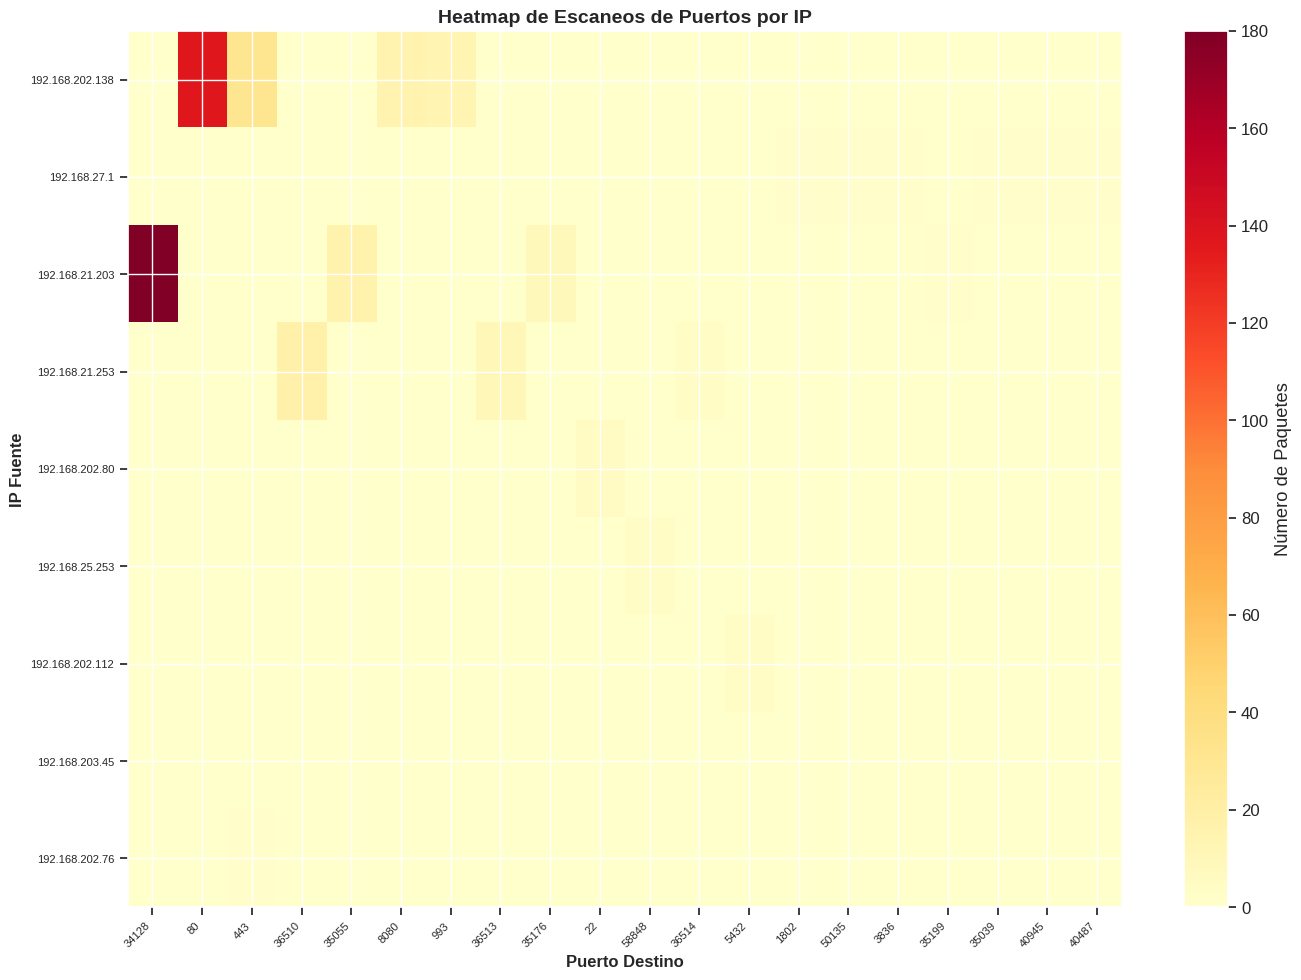

      ✅ Guardado: visualizations/security/1_port_scan_heatmap_20260212_015452.png

   📊 2/8: Línea de tiempo de IPs sospechosas...


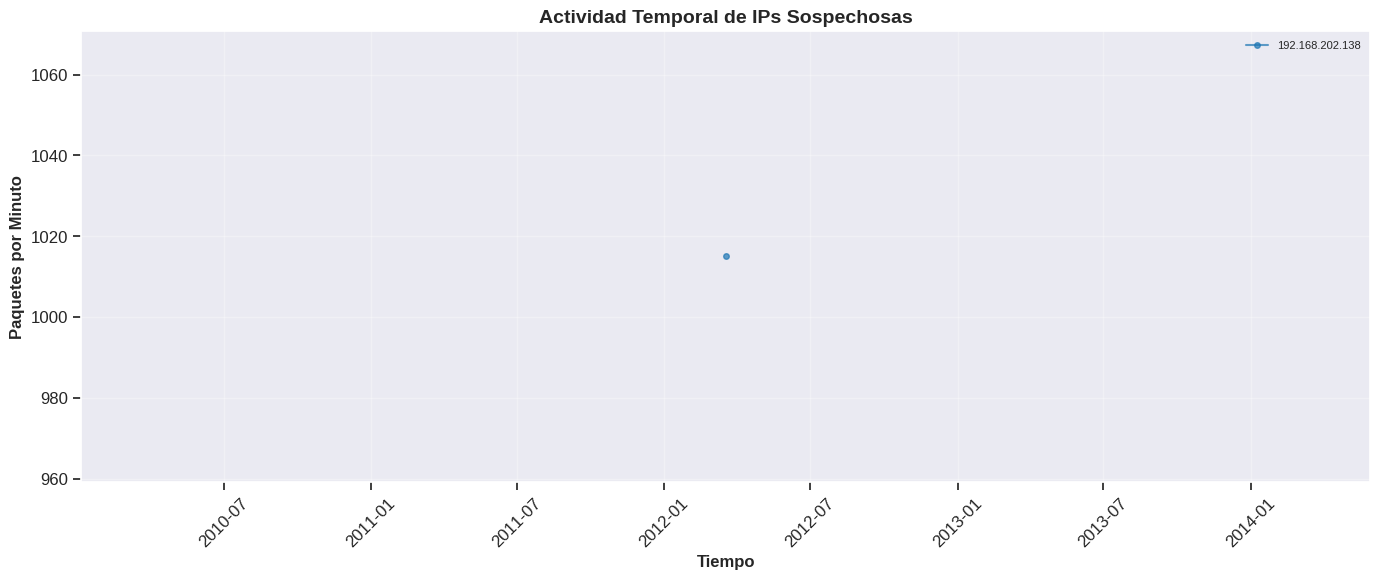

      ✅ Guardado: visualizations/security/2_suspicious_ips_timeline_20260212_015452.png

   📊 3/8: Clasificación de ataques...


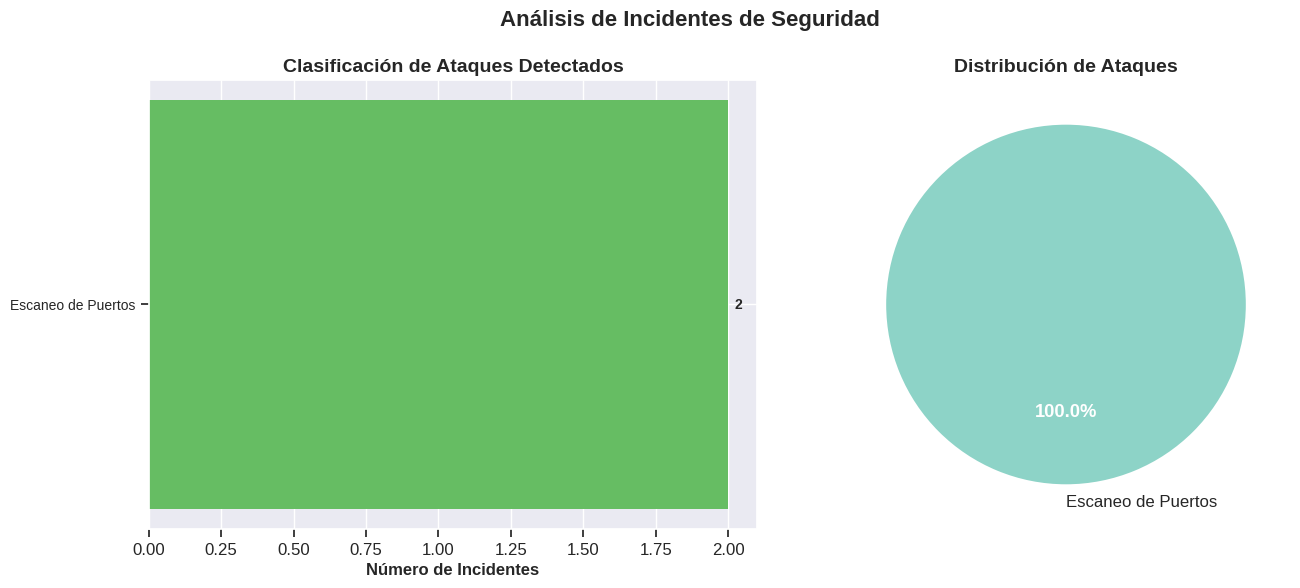

      ✅ Guardado: visualizations/security/3_attack_classification_20260212_015452.png

   📊 4/8: Análisis de tráfico DDoS...


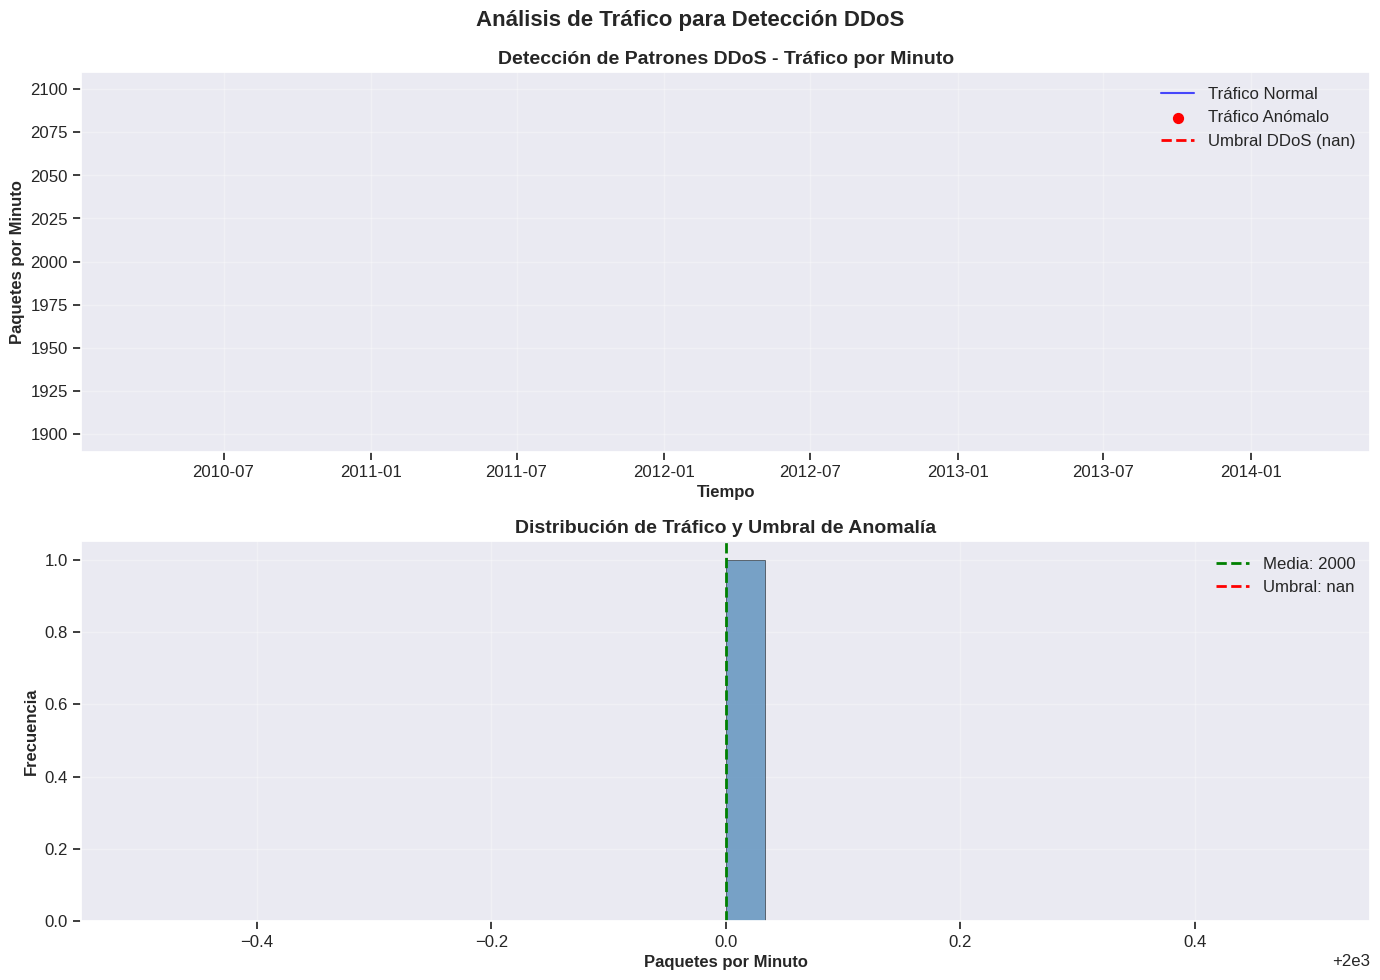

      ✅ Guardado: visualizations/security/4_ddos_analysis_20260212_015452.png

   📊 5/8: Detección de túneles DNS...


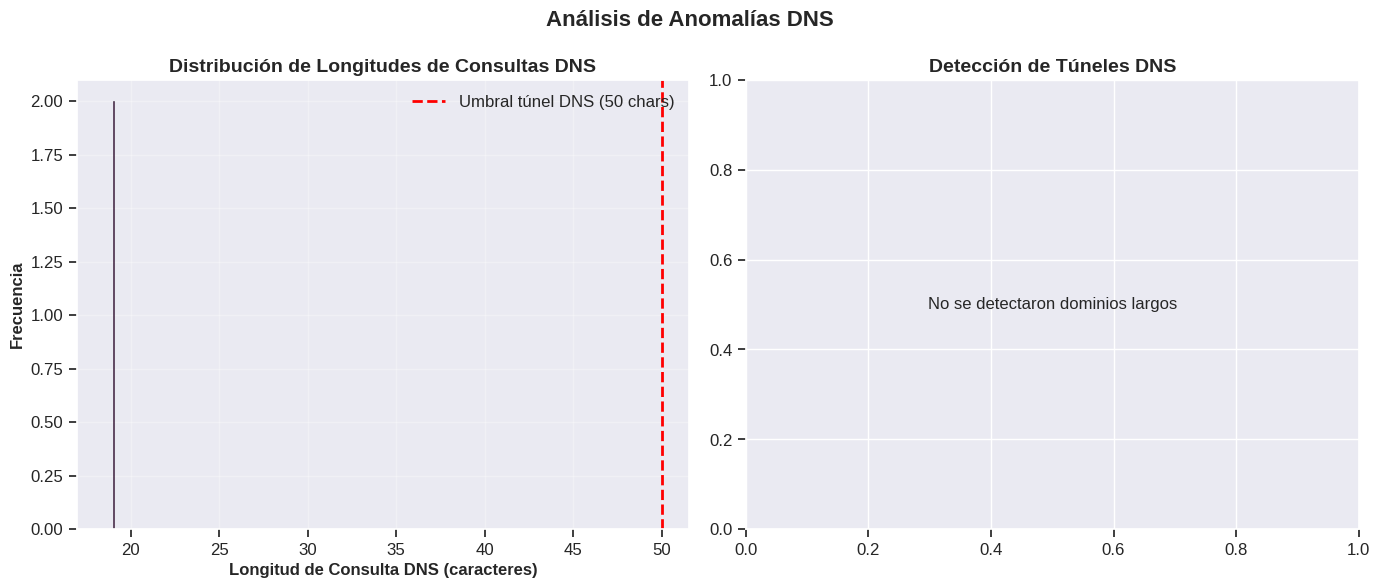

      ✅ Guardado: visualizations/security/5_dns_tunnel_detection_20260212_015452.png

   📊 6/8: Análisis de tráfico ICMP...
      ⚠️  No hay tráfico ICMP para visualizar

   📊 7/8: Patrones de ataques HTTP...


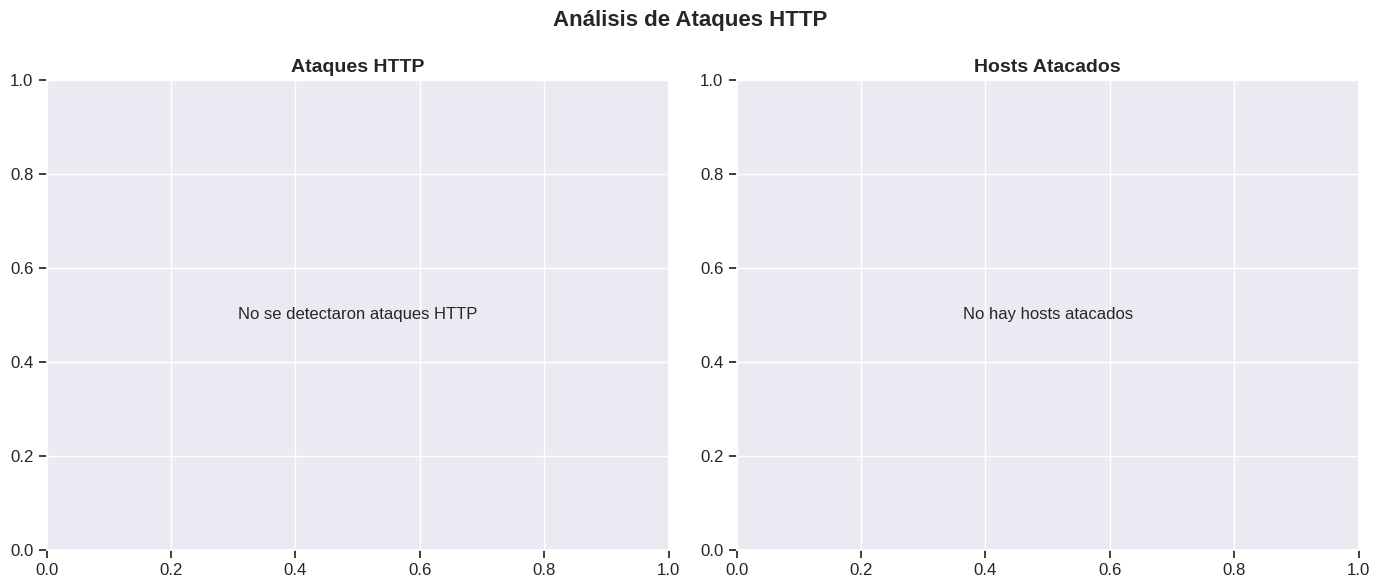

      ✅ Guardado: visualizations/security/7_http_attacks_20260212_015452.png

   📊 8/8: Dashboard resumen de seguridad...


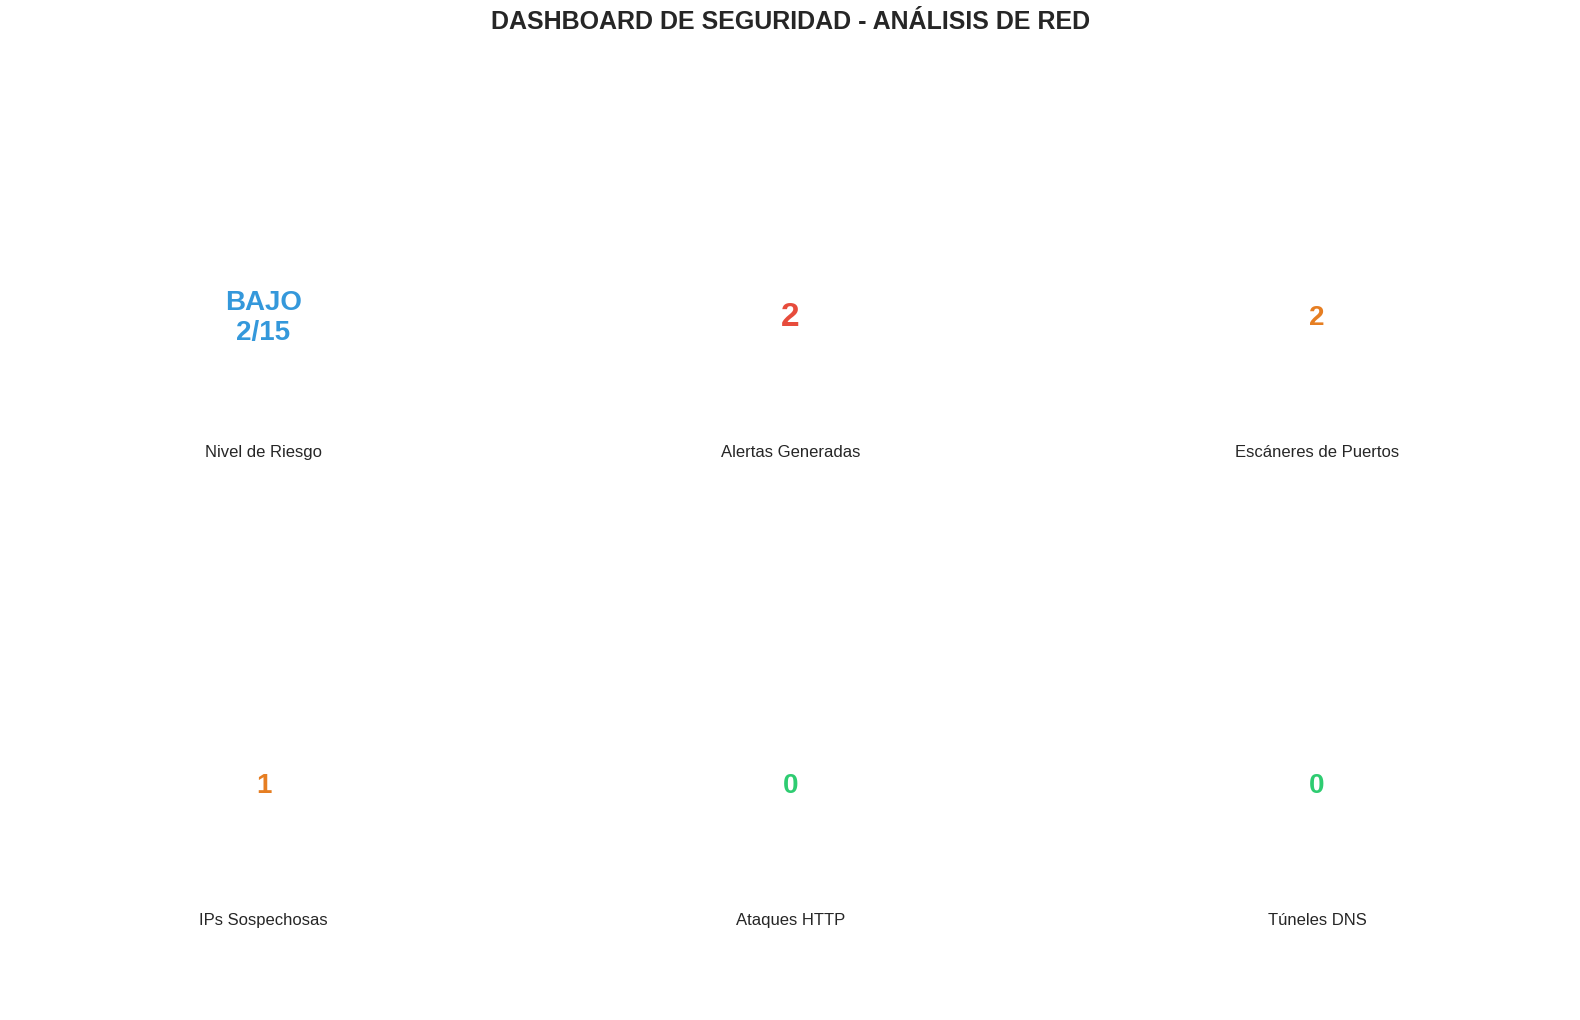

      ✅ Guardado: visualizations/security/8_security_dashboard_20260212_015452.png

   📊 Dashboard interactivo de seguridad...


      ✅ Dashboard interactivo guardado: visualizations/security/interactive/security_dashboard_20260212_015452.html

   ✅ Total de visualizaciones de seguridad: 8

   ✅ Reporte de visualizaciones de seguridad guardado: reports/html/security_visualization_report_20260212_015458.html

✅ VISUALIZACIONES DE SEGURIDAD COMPLETADAS

   📁 Visualizaciones guardadas en: visualizations/security/
   📁 Reporte HTML guardado en: reports/html/
   🖼️  Total de gráficos: 8



🛡️ PROCESO DE VISUALIZACIONES DE SEGURIDAD FINALIZADO


In [37]:
# ============================================
# VISUALIZACIONES DE SEGURIDAD
# VERSIÓN COMPLETA Y CORREGIDA
# ============================================

print("="*60)
print("📊 VISUALIZACIONES DE SEGURIDAD")
print("="*60)

class SecurityVisualizer:
    """
    Visualizaciones especializadas para análisis de seguridad
    Versión completa con gráficos estáticos e interactivos
    """

    def __init__(self, df, security_insights=None):
        self.df = df.copy() if df is not None else None
        self.security_insights = security_insights if security_insights else {}
        self.timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        self.figure_paths = []

        # Configurar estilo
        plt.style.use('seaborn-v0_8-darkgrid')
        sns.set_palette("RdBu")
        sns.set_context("notebook", font_scale=1.1)

        # Crear directorios
        os.makedirs('visualizations/security', exist_ok=True)
        os.makedirs('visualizations/security/interactive', exist_ok=True)

        # Verificar Plotly
        try:
            import plotly.express as px
            import plotly.graph_objects as go
            from plotly.subplots import make_subplots
            self.px = px
            self.go = go
            self.make_subplots = make_subplots
            self.plotly_available = True
        except ImportError:
            print("   ⚠️ Plotly no disponible, algunas visualizaciones interactivas no se generarán")
            self.plotly_available = False

    def plot_port_scan_heatmap(self):
        """Gráfico 1: Heatmap de escaneos de puertos"""
        print("\n   📊 1/8: Heatmap de escaneos de puertos...")

        if self.df is None or self.df.empty:
            print("      ⚠️  No hay datos para visualizar")
            return None

        if 'src_ip' not in self.df.columns or 'tcp_dstport' not in self.df.columns:
            print("      ⚠️  Columnas necesarias no encontradas")
            return None

        # Filtrar tráfico TCP
        tcp_traffic = self.df[self.df['tcp_dstport'].notna()].copy()

        if len(tcp_traffic) == 0:
            print("      ⚠️  No hay tráfico TCP para visualizar")
            return None

        # Convertir puerto a entero
        tcp_traffic['tcp_dstport'] = pd.to_numeric(tcp_traffic['tcp_dstport'], errors='coerce')
        tcp_traffic = tcp_traffic.dropna(subset=['tcp_dstport'])
        tcp_traffic['tcp_dstport'] = tcp_traffic['tcp_dstport'].astype(int)

        # Tomar top IPs y top puertos
        top_ips = tcp_traffic['src_ip'].value_counts().head(20).index
        top_ports = tcp_traffic['tcp_dstport'].value_counts().head(20).index

        # Crear matriz de calor
        heatmap_data = []
        for ip in top_ips:
            row = []
            for port in top_ports:
                count = len(tcp_traffic[(tcp_traffic['src_ip'] == ip) &
                                       (tcp_traffic['tcp_dstport'] == port)])
                row.append(count)
            heatmap_data.append(row)

        # Crear figura
        fig, ax = plt.subplots(figsize=(14, 10))

        im = ax.imshow(heatmap_data, cmap='YlOrRd', aspect='auto', interpolation='nearest')

        # Configurar ejes
        ax.set_xticks(range(len(top_ports)))
        ax.set_yticks(range(len(top_ips)))
        ax.set_xticklabels([str(p) for p in top_ports], rotation=45, ha='right', fontsize=8)
        ax.set_yticklabels(top_ips, fontsize=8)

        ax.set_xlabel('Puerto Destino', fontsize=12, fontweight='bold')
        ax.set_ylabel('IP Fuente', fontsize=12, fontweight='bold')
        ax.set_title('Heatmap de Escaneos de Puertos por IP', fontsize=14, fontweight='bold')

        # Barra de color
        plt.colorbar(im, ax=ax, label='Número de Paquetes')

        plt.tight_layout()

        # Guardar
        filename = f'visualizations/security/1_port_scan_heatmap_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        plt.close()

        self.figure_paths.append(filename)
        print(f"      ✅ Guardado: {filename}")
        return filename

    def plot_suspicious_ips_timeline(self):
        """Gráfico 2: Línea de tiempo de IPs sospechosas"""
        print("\n   📊 2/8: Línea de tiempo de IPs sospechosas...")

        if self.df is None or self.df.empty:
            print("      ⚠️  No hay datos para visualizar")
            return None

        if 'timestamp' not in self.df.columns or 'src_ip' not in self.df.columns:
            print("      ⚠️  Columnas necesarias no encontradas")
            return None

        # Obtener IPs sospechosas del análisis de seguridad
        suspicious_ips = []
        if self.security_insights and 'suspicious_ips' in self.security_insights:
            top_suspicious = self.security_insights['suspicious_ips'].get('top_suspicious', [])
            for ip_info in top_suspicious[:10]:
                if 'ip' in ip_info:
                    suspicious_ips.append(ip_info['ip'])

        if not suspicious_ips:
            # Si no hay IPs del análisis, tomar las más activas
            suspicious_ips = self.df['src_ip'].value_counts().head(10).index.tolist()

        # Filtrar datos para IPs sospechosas
        suspicious_df = self.df[self.df['src_ip'].isin(suspicious_ips)].copy()

        if len(suspicious_df) == 0:
            print("      ⚠️  No hay datos de IPs sospechosas")
            return None

        # Asegurar timestamp
        if not pd.api.types.is_datetime64_any_dtype(suspicious_df['timestamp']):
            suspicious_df['timestamp'] = pd.to_datetime(suspicious_df['timestamp'], errors='coerce')
            suspicious_df = suspicious_df.dropna(subset=['timestamp'])

        # Agrupar por tiempo (minutos) e IP
        suspicious_df['minute'] = suspicious_df['timestamp'].dt.floor('1min')
        timeline_data = suspicious_df.groupby(['minute', 'src_ip']).size().reset_index()
        timeline_data.columns = ['timestamp', 'ip', 'packet_count']

        # Crear figura
        fig, ax = plt.subplots(figsize=(14, 6))

        # Graficar cada IP
        colors = plt.cm.tab20(np.linspace(0, 1, len(suspicious_ips)))

        for i, ip in enumerate(suspicious_ips[:10]):
            ip_data = timeline_data[timeline_data['ip'] == ip]
            if len(ip_data) > 0:
                ax.plot(ip_data['timestamp'], ip_data['packet_count'],
                       marker='o', linestyle='-', linewidth=1.5, markersize=4,
                       label=ip[:15] + '...' if len(ip) > 15 else ip,
                       color=colors[i], alpha=0.7)

        ax.set_xlabel('Tiempo', fontsize=12, fontweight='bold')
        ax.set_ylabel('Paquetes por Minuto', fontsize=12, fontweight='bold')
        ax.set_title('Actividad Temporal de IPs Sospechosas', fontsize=14, fontweight='bold')
        ax.legend(loc='upper right', fontsize=8)
        ax.grid(True, alpha=0.3)

        plt.xticks(rotation=45)
        plt.tight_layout()

        # Guardar
        filename = f'visualizations/security/2_suspicious_ips_timeline_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        plt.close()

        self.figure_paths.append(filename)
        print(f"      ✅ Guardado: {filename}")
        return filename

    def plot_attack_classification(self):
        """Gráfico 3: Clasificación de ataques detectados"""
        print("\n   📊 3/8: Clasificación de ataques...")

        if not self.security_insights:
            print("      ⚠️  No hay insights de seguridad")
            return None

        # Recolectar conteos de ataques
        attack_counts = {}

        if 'http_attacks' in self.security_insights:
            attacks = self.security_insights['http_attacks'].get('attack_types', {})
            for attack_type, count in attacks.items():
                attack_counts[f'HTTP {attack_type}'] = count

        if 'port_scans' in self.security_insights:
            scanners = self.security_insights['port_scans'].get('potential_scanners', 0)
            if scanners > 0:
                attack_counts['Escaneo de Puertos'] = scanners

        if 'ddos_patterns' in self.security_insights:
            ddos = len(self.security_insights['ddos_patterns'].get('ddos_suspects', []))
            if ddos > 0:
                attack_counts['Posible DDoS'] = ddos

        if 'dns_anomalies' in self.security_insights:
            dns_tunnels = self.security_insights['dns_anomalies'].get('long_domain_queries', 0)
            if dns_tunnels > 0:
                attack_counts['Túneles DNS'] = dns_tunnels

            high_dns = self.security_insights['dns_anomalies'].get('high_frequency_dns_ips', 0)
            if high_dns > 0:
                attack_counts['Alta Frecuencia DNS'] = high_dns

        if 'icmp_anomalies' in self.security_insights:
            floods = self.security_insights['icmp_anomalies'].get('potential_ping_floods', 0)
            if floods > 0:
                attack_counts['Ping Floods'] = floods

        if not attack_counts:
            print("      ⚠️  No se detectaron ataques para visualizar")
            return None

        # Crear figura con dos subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Gráfico 1: Barras horizontales
        categories = list(attack_counts.keys())
        counts = list(attack_counts.values())

        # Ordenar por cantidad
        sorted_idx = np.argsort(counts)
        categories = [categories[i] for i in sorted_idx]
        counts = [counts[i] for i in sorted_idx]

        colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(categories)))

        bars = ax1.barh(range(len(categories)), counts, color=colors)
        ax1.set_yticks(range(len(categories)))
        ax1.set_yticklabels(categories, fontsize=10)
        ax1.set_xlabel('Número de Incidentes', fontsize=12, fontweight='bold')
        ax1.set_title('Clasificación de Ataques Detectados', fontsize=14, fontweight='bold')
        ax1.invert_yaxis()

        # Añadir etiquetas de valores
        for bar, count in zip(bars, counts):
            width = bar.get_width()
            ax1.text(width + max(counts)*0.01, bar.get_y() + bar.get_height()/2,
                    f'{count}', va='center', fontsize=10, fontweight='bold')

        # Gráfico 2: Pie chart
        if len(categories) > 0:
            colors_pie = plt.cm.Set3(np.linspace(0, 1, len(categories)))
            wedges, texts, autotexts = ax2.pie(counts, labels=categories,
                                               autopct='%1.1f%%',
                                               colors=colors_pie,
                                               startangle=90)

            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')

            ax2.set_title('Distribución de Ataques', fontsize=14, fontweight='bold')

        plt.suptitle('Análisis de Incidentes de Seguridad', fontsize=16, fontweight='bold')
        plt.tight_layout()

        # Guardar
        filename = f'visualizations/security/3_attack_classification_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        plt.close()

        self.figure_paths.append(filename)
        print(f"      ✅ Guardado: {filename}")
        return filename

    def plot_ddos_traffic_analysis(self):
        """Gráfico 4: Análisis de tráfico DDoS"""
        print("\n   📊 4/8: Análisis de tráfico DDoS...")

        if self.df is None or self.df.empty:
            print("      ⚠️  No hay datos para visualizar")
            return None

        if 'timestamp' not in self.df.columns:
            print("      ⚠️  Columna timestamp no encontrada")
            return None

        # Asegurar timestamp
        if not pd.api.types.is_datetime64_any_dtype(self.df['timestamp']):
            self.df['timestamp'] = pd.to_datetime(self.df['timestamp'], errors='coerce')
            self.df = self.df.dropna(subset=['timestamp'])

        # Agrupar por ventanas de tiempo
        self.df['minute'] = self.df['timestamp'].dt.floor('1min')
        traffic_by_minute = self.df.groupby('minute').size().reset_index()
        traffic_by_minute.columns = ['time', 'packet_count']

        # Calcular umbral de anomalía
        mean_traffic = traffic_by_minute['packet_count'].mean()
        std_traffic = traffic_by_minute['packet_count'].std()
        anomaly_threshold = mean_traffic + (3 * std_traffic)

        # Identificar tráfico anómalo
        traffic_by_minute['is_anomaly'] = traffic_by_minute['packet_count'] > anomaly_threshold

        # Crear figura
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

        # Gráfico 1: Serie temporal con umbral
        ax1.plot(traffic_by_minute['time'], traffic_by_minute['packet_count'],
                'b-', linewidth=1.5, alpha=0.7, label='Tráfico Normal')

        # Resaltar anomalías
        anomaly_data = traffic_by_minute[traffic_by_minute['is_anomaly']]
        ax1.scatter(anomaly_data['time'], anomaly_data['packet_count'],
                   color='red', s=50, zorder=5, label='Tráfico Anómalo')

        ax1.axhline(y=anomaly_threshold, color='red', linestyle='--',
                   linewidth=2, label=f'Umbral DDoS ({anomaly_threshold:.0f})')

        ax1.set_xlabel('Tiempo', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Paquetes por Minuto', fontsize=12, fontweight='bold')
        ax1.set_title('Detección de Patrones DDoS - Tráfico por Minuto',
                     fontsize=14, fontweight='bold')
        ax1.legend(loc='upper right')
        ax1.grid(True, alpha=0.3)

        # Gráfico 2: Histograma de distribución
        ax2.hist(traffic_by_minute['packet_count'], bins=30, alpha=0.7,
                color='steelblue', edgecolor='black', linewidth=0.5)
        ax2.axvline(x=mean_traffic, color='green', linestyle='--',
                   linewidth=2, label=f'Media: {mean_traffic:.0f}')
        ax2.axvline(x=anomaly_threshold, color='red', linestyle='--',
                   linewidth=2, label=f'Umbral: {anomaly_threshold:.0f}')

        ax2.set_xlabel('Paquetes por Minuto', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
        ax2.set_title('Distribución de Tráfico y Umbral de Anomalía',
                     fontsize=14, fontweight='bold')
        ax2.legend(loc='upper right')
        ax2.grid(True, alpha=0.3)

        plt.suptitle('Análisis de Tráfico para Detección DDoS',
                    fontsize=16, fontweight='bold')
        plt.tight_layout()

        # Guardar
        filename = f'visualizations/security/4_ddos_analysis_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        plt.close()

        self.figure_paths.append(filename)
        print(f"      ✅ Guardado: {filename}")
        return filename

    def plot_dns_tunnel_detection(self):
        """Gráfico 5: Detección de túneles DNS"""
        print("\n   📊 5/8: Detección de túneles DNS...")

        if self.df is None or self.df.empty:
            print("      ⚠️  No hay datos para visualizar")
            return None

        if 'dns_query' not in self.df.columns:
            print("      ⚠️  Columna dns_query no encontrada")
            return None

        # Filtrar consultas DNS
        dns_traffic = self.df[self.df['dns_query'].notna()].copy()
        dns_traffic = dns_traffic[dns_traffic['dns_query'] != '']

        if len(dns_traffic) == 0:
            print("      ⚠️  No hay tráfico DNS para visualizar")
            return None

        # Calcular longitud de consultas
        dns_traffic['query_length'] = dns_traffic['dns_query'].astype(str).str.len()

        # Crear figura con dos subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Gráfico 1: Distribución de longitudes
        ax1.hist(dns_traffic['query_length'], bins=50, alpha=0.7,
                color='purple', edgecolor='black', linewidth=0.5)
        ax1.axvline(x=50, color='red', linestyle='--', linewidth=2,
                   label='Umbral túnel DNS (50 chars)')

        ax1.set_xlabel('Longitud de Consulta DNS (caracteres)', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Frecuencia', fontsize=12, fontweight='bold')
        ax1.set_title('Distribución de Longitudes de Consultas DNS',
                     fontsize=14, fontweight='bold')
        ax1.legend(loc='upper right')
        ax1.grid(True, alpha=0.3)

        # Gráfico 2: Top dominios largos
        long_domains = dns_traffic[dns_traffic['query_length'] > 50]

        if len(long_domains) > 0:
            domain_counts = long_domains['dns_query'].value_counts().head(10)

            colors = plt.cm.RdPu(np.linspace(0.3, 1, len(domain_counts)))
            bars = ax2.barh(range(len(domain_counts)), domain_counts.values, color=colors)

            ax2.set_yticks(range(len(domain_counts)))
            # Acortar etiquetas muy largas
            labels = [d[:30] + '...' if len(d) > 30 else d for d in domain_counts.index]
            ax2.set_yticklabels(labels, fontsize=8)
            ax2.set_xlabel('Número de Consultas', fontsize=12, fontweight='bold')
            ax2.set_title('Top 10 Dominios Sospechosos (>50 chars)',
                         fontsize=14, fontweight='bold')
            ax2.invert_yaxis()
            ax2.grid(True, alpha=0.3, axis='x')

            # Añadir etiquetas de valores
            for bar, count in zip(bars, domain_counts.values):
                width = bar.get_width()
                ax2.text(width + max(domain_counts.values)*0.01,
                        bar.get_y() + bar.get_height()/2,
                        f'{count}', va='center', fontsize=9)
        else:
            ax2.text(0.5, 0.5, 'No se detectaron dominios largos',
                    ha='center', va='center', transform=ax2.transAxes, fontsize=12)
            ax2.set_title('Detección de Túneles DNS', fontsize=14, fontweight='bold')

        plt.suptitle('Análisis de Anomalías DNS', fontsize=16, fontweight='bold')
        plt.tight_layout()

        # Guardar
        filename = f'visualizations/security/5_dns_tunnel_detection_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        plt.close()

        self.figure_paths.append(filename)
        print(f"      ✅ Guardado: {filename}")
        return filename

    def plot_icmp_analysis(self):
        """Gráfico 6: Análisis de tráfico ICMP"""
        print("\n   📊 6/8: Análisis de tráfico ICMP...")

        if self.df is None or self.df.empty:
            print("      ⚠️  No hay datos para visualizar")
            return None

        # Filtrar tráfico ICMP
        if 'protocol' in self.df.columns:
            icmp_traffic = self.df[self.df['protocol'] == 'ICMP'].copy()
        elif 'protocol_num' in self.df.columns:
            icmp_traffic = self.df[self.df['protocol_num'] == 1].copy()
        else:
            print("      ⚠️  No se puede identificar tráfico ICMP")
            return None

        if len(icmp_traffic) == 0:
            print("      ⚠️  No hay tráfico ICMP para visualizar")
            return None

        # Crear figura con dos subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Gráfico 1: Top fuentes ICMP
        if 'src_ip' in icmp_traffic.columns:
            icmp_sources = icmp_traffic['src_ip'].value_counts().head(10)

            colors = plt.cm.OrRd(np.linspace(0.3, 1, len(icmp_sources)))
            bars = ax1.barh(range(len(icmp_sources)), icmp_sources.values, color=colors)

            ax1.set_yticks(range(len(icmp_sources)))
            ax1.set_yticklabels(icmp_sources.index, fontsize=8)
            ax1.set_xlabel('Número de Paquetes ICMP', fontsize=12, fontweight='bold')
            ax1.set_title('Top 10 Fuentes de Tráfico ICMP', fontsize=14, fontweight='bold')
            ax1.invert_yaxis()
            ax1.grid(True, alpha=0.3, axis='x')

            # Marcar posibles ping floods
            for bar, (ip, count) in zip(bars, icmp_sources.items()):
                if count > 100:
                    bar.set_color('red')
                    bar.set_alpha(0.8)
                    ax1.text(count + max(icmp_sources.values)*0.01,
                            bar.get_y() + bar.get_height()/2,
                            '⚠️ PING FLOOD', va='center', fontsize=8, fontweight='bold', color='red')
                else:
                    ax1.text(count + max(icmp_sources.values)*0.01,
                            bar.get_y() + bar.get_height()/2,
                            f'{count}', va='center', fontsize=8)

        # Gráfico 2: Distribución temporal de ICMP
        if 'timestamp' in icmp_traffic.columns:
            if not pd.api.types.is_datetime64_any_dtype(icmp_traffic['timestamp']):
                icmp_traffic['timestamp'] = pd.to_datetime(icmp_traffic['timestamp'], errors='coerce')
                icmp_traffic = icmp_traffic.dropna(subset=['timestamp'])

            icmp_traffic['minute'] = icmp_traffic['timestamp'].dt.floor('1min')
            icmp_by_time = icmp_traffic.groupby('minute').size()

            ax2.plot(icmp_by_time.index, icmp_by_time.values, 'r-', linewidth=1.5, alpha=0.7)
            ax2.set_xlabel('Tiempo', fontsize=12, fontweight='bold')
            ax2.set_ylabel('Paquetes ICMP por Minuto', fontsize=12, fontweight='bold')
            ax2.set_title('Actividad ICMP en el Tiempo', fontsize=14, fontweight='bold')
            ax2.axhline(y=100, color='orange', linestyle='--', linewidth=2,
                       label='Umbral de Alerta (100/min)')
            ax2.legend(loc='upper right')
            ax2.grid(True, alpha=0.3)
            plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45)

        plt.suptitle('Análisis de Tráfico ICMP', fontsize=16, fontweight='bold')
        plt.tight_layout()

        # Guardar
        filename = f'visualizations/security/6_icmp_analysis_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        plt.close()

        self.figure_paths.append(filename)
        print(f"      ✅ Guardado: {filename}")
        return filename

    def plot_http_attack_patterns(self):
        """Gráfico 7: Patrones de ataques HTTP"""
        print("\n   📊 7/8: Patrones de ataques HTTP...")

        if not self.security_insights or 'http_attacks' not in self.security_insights:
            print("      ⚠️  No hay datos de ataques HTTP")
            return None

        http_insights = self.security_insights['http_attacks']

        # Crear figura con dos subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Gráfico 1: Distribución de tipos de ataque
        attack_types = http_insights.get('attack_types', {})

        if attack_types:
            types = list(attack_types.keys())
            counts = list(attack_types.values())

            colors = plt.cm.Set1(np.linspace(0, 1, len(types)))
            wedges, texts, autotexts = ax1.pie(counts, labels=types,
                                               autopct='%1.1f%%',
                                               colors=colors,
                                               startangle=90)

            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')

            ax1.set_title('Distribución de Ataques HTTP', fontsize=14, fontweight='bold')
        else:
            ax1.text(0.5, 0.5, 'No se detectaron ataques HTTP',
                    ha='center', va='center', transform=ax1.transAxes, fontsize=12)
            ax1.set_title('Ataques HTTP', fontsize=14, fontweight='bold')

        # Gráfico 2: Hosts atacados
        attack_details = http_insights.get('attack_details', [])

        if attack_details:
            # Contar hosts atacados
            attacked_hosts = {}
            for attack in attack_details:
                host = attack.get('http_host', 'Unknown')
                attacked_hosts[host] = attacked_hosts.get(host, 0) + 1

            top_hosts = dict(sorted(attacked_hosts.items(), key=lambda x: x[1], reverse=True)[:10])

            colors = plt.cm.RdPu(np.linspace(0.3, 1, len(top_hosts)))
            bars = ax2.barh(range(len(top_hosts)), list(top_hosts.values()), color=colors)

            ax2.set_yticks(range(len(top_hosts)))
            ax2.set_yticklabels([h[:30] + '...' if len(h) > 30 else h for h in top_hosts.keys()],
                               fontsize=8)
            ax2.set_xlabel('Número de Ataques', fontsize=12, fontweight='bold')
            ax2.set_title('Top 10 Hosts Atacados', fontsize=14, fontweight='bold')
            ax2.invert_yaxis()
            ax2.grid(True, alpha=0.3, axis='x')

            # Añadir etiquetas
            for bar, count in zip(bars, top_hosts.values()):
                width = bar.get_width()
                ax2.text(width + max(top_hosts.values())*0.01,
                        bar.get_y() + bar.get_height()/2,
                        f'{count}', va='center', fontsize=9)
        else:
            ax2.text(0.5, 0.5, 'No hay hosts atacados',
                    ha='center', va='center', transform=ax2.transAxes, fontsize=12)
            ax2.set_title('Hosts Atacados', fontsize=14, fontweight='bold')

        plt.suptitle('Análisis de Ataques HTTP', fontsize=16, fontweight='bold')
        plt.tight_layout()

        # Guardar
        filename = f'visualizations/security/7_http_attacks_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        plt.close()

        self.figure_paths.append(filename)
        print(f"      ✅ Guardado: {filename}")
        return filename

    def plot_security_dashboard(self):
        """Gráfico 8: Dashboard resumen de seguridad"""
        print("\n   📊 8/8: Dashboard resumen de seguridad...")

        fig, axes = plt.subplots(2, 3, figsize=(16, 10))

        # 1. Nivel de riesgo
        risk_level = "NORMAL"
        risk_color = "#2ecc71"
        risk_score = 0

        if self.security_insights and 'summary' in self.security_insights:
            summary = self.security_insights['summary']
            risk_level = summary.get('risk_level', 'NORMAL')
            risk_score = summary.get('risk_score', 0)

            risk_colors = {
                'CRÍTICO': '#e74c3c',
                'ALTO': '#e67e22',
                'MEDIO': '#f1c40f',
                'BAJO': '#3498db',
                'NORMAL': '#2ecc71'
            }
            risk_color = risk_colors.get(risk_level, '#2ecc71')

        axes[0,0].text(0.5, 0.5, f'{risk_level}\n{risk_score}/15',
                      ha='center', va='center', fontsize=20, fontweight='bold', color=risk_color)
        axes[0,0].text(0.5, 0.2, 'Nivel de Riesgo',
                      ha='center', va='center', fontsize=12)
        axes[0,0].set_xlim(0, 1)
        axes[0,0].set_ylim(0, 1)
        axes[0,0].axis('off')
        axes[0,0].patch.set_facecolor('#f8f9fa')

        # 2. Total alertas
        total_alerts = len(self.security_insights.get('summary', {}).get('alerts', [])) if self.security_insights else 0

        axes[0,1].text(0.5, 0.5, f'{total_alerts}',
                      ha='center', va='center', fontsize=24, fontweight='bold', color='#e74c3c')
        axes[0,1].text(0.5, 0.2, 'Alertas Generadas',
                      ha='center', va='center', fontsize=12)
        axes[0,1].set_xlim(0, 1)
        axes[0,1].set_ylim(0, 1)
        axes[0,1].axis('off')
        axes[0,1].patch.set_facecolor('#f8f9fa')

        # 3. Escáneres de puertos
        scanners = 0
        if self.security_insights and 'port_scans' in self.security_insights:
            scanners = self.security_insights['port_scans'].get('potential_scanners', 0)

        axes[0,2].text(0.5, 0.5, f'{scanners}',
                      ha='center', va='center', fontsize=20, fontweight='bold',
                      color='#e67e22' if scanners > 0 else '#2ecc71')
        axes[0,2].text(0.5, 0.2, 'Escáneres de Puertos',
                      ha='center', va='center', fontsize=12)
        axes[0,2].set_xlim(0, 1)
        axes[0,2].set_ylim(0, 1)
        axes[0,2].axis('off')
        axes[0,2].patch.set_facecolor('#f8f9fa')

        # 4. IPs sospechosas
        suspicious_ips = 0
        if self.security_insights and 'suspicious_ips' in self.security_insights:
            suspicious_ips = self.security_insights['suspicious_ips'].get('suspicious_ips', 0)

        axes[1,0].text(0.5, 0.5, f'{suspicious_ips}',
                      ha='center', va='center', fontsize=20, fontweight='bold',
                      color='#e67e22' if suspicious_ips > 0 else '#2ecc71')
        axes[1,0].text(0.5, 0.2, 'IPs Sospechosas',
                      ha='center', va='center', fontsize=12)
        axes[1,0].set_xlim(0, 1)
        axes[1,0].set_ylim(0, 1)
        axes[1,0].axis('off')
        axes[1,0].patch.set_facecolor('#f8f9fa')

        # 5. Ataques HTTP
        http_attacks = 0
        if self.security_insights and 'http_attacks' in self.security_insights:
            http_attacks = self.security_insights['http_attacks'].get('potential_attacks', 0)

        axes[1,1].text(0.5, 0.5, f'{http_attacks}',
                      ha='center', va='center', fontsize=20, fontweight='bold',
                      color='#e74c3c' if http_attacks > 0 else '#2ecc71')
        axes[1,1].text(0.5, 0.2, 'Ataques HTTP',
                      ha='center', va='center', fontsize=12)
        axes[1,1].set_xlim(0, 1)
        axes[1,1].set_ylim(0, 1)
        axes[1,1].axis('off')
        axes[1,1].patch.set_facecolor('#f8f9fa')

        # 6. Anomalías DNS
        dns_anomalies = 0
        if self.security_insights and 'dns_anomalies' in self.security_insights:
            dns_anomalies = self.security_insights['dns_anomalies'].get('long_domain_queries', 0)

        axes[1,2].text(0.5, 0.5, f'{dns_anomalies}',
                      ha='center', va='center', fontsize=20, fontweight='bold',
                      color='#e67e22' if dns_anomalies > 0 else '#2ecc71')
        axes[1,2].text(0.5, 0.2, 'Túneles DNS',
                      ha='center', va='center', fontsize=12)
        axes[1,2].set_xlim(0, 1)
        axes[1,2].set_ylim(0, 1)
        axes[1,2].axis('off')
        axes[1,2].patch.set_facecolor('#f8f9fa')

        plt.suptitle('DASHBOARD DE SEGURIDAD - ANÁLISIS DE RED',
                    fontsize=18, fontweight='bold', y=1.02)
        plt.tight_layout()

        # Guardar
        filename = f'visualizations/security/8_security_dashboard_{self.timestamp}.png'
        plt.savefig(filename, dpi=150, bbox_inches='tight')
        plt.show()
        plt.close()

        self.figure_paths.append(filename)
        print(f"      ✅ Guardado: {filename}")
        return filename

    def create_interactive_security_dashboard(self):
        """Dashboard interactivo de seguridad con Plotly"""
        print("\n   📊 Dashboard interactivo de seguridad...")

        if not self.plotly_available:
            print("      ⚠️  Plotly no disponible, saltando dashboard interactivo")
            return None

        if self.df is None or self.df.empty:
            print("      ⚠️  No hay datos para visualizar")
            return None

        # Crear figura con subplots
        fig = self.make_subplots(
            rows=2, cols=2,
            subplot_titles=('Escaneos de Puertos', 'Tráfico ICMP',
                          'Consultas DNS', 'Nivel de Riesgo'),
            specs=[[{'type': 'heatmap'}, {'type': 'bar'}],
                   [{'type': 'scatter'}, {'type': 'domain'}]]
        )

        # 1. Heatmap de escaneos de puertos
        if 'src_ip' in self.df.columns and 'tcp_dstport' in self.df.columns:
            tcp_traffic = self.df[self.df['tcp_dstport'].notna()].copy()

            if len(tcp_traffic) > 0:
                tcp_traffic['tcp_dstport'] = pd.to_numeric(tcp_traffic['tcp_dstport'], errors='coerce')
                tcp_traffic = tcp_traffic.dropna(subset=['tcp_dstport'])

                top_ips = tcp_traffic['src_ip'].value_counts().head(10).index
                top_ports = tcp_traffic['tcp_dstport'].value_counts().head(10).index

                heatmap_data = []
                for ip in top_ips:
                    row = []
                    for port in top_ports:
                        count = len(tcp_traffic[(tcp_traffic['src_ip'] == ip) &
                                               (tcp_traffic['tcp_dstport'] == port)])
                        row.append(count)
                    heatmap_data.append(row)

                fig.add_trace(
                    self.go.Heatmap(
                        z=heatmap_data,
                        x=[str(int(p)) for p in top_ports],
                        y=top_ips,
                        colorscale='YlOrRd',
                        showscale=True
                    ),
                    row=1, col=1
                )

        # 2. Top fuentes ICMP
        if 'protocol' in self.df.columns:
            icmp_traffic = self.df[self.df['protocol'] == 'ICMP']
            if len(icmp_traffic) > 0 and 'src_ip' in icmp_traffic.columns:
                icmp_sources = icmp_traffic['src_ip'].value_counts().head(10)

                fig.add_trace(
                    self.go.Bar(
                        x=icmp_sources.values,
                        y=icmp_sources.index,
                        orientation='h',
                        marker_color='coral',
                        name='ICMP'
                    ),
                    row=1, col=2
                )

        # 3. Consultas DNS en el tiempo
        if 'dns_query' in self.df.columns and 'timestamp' in self.df.columns:
            dns_traffic = self.df[self.df['dns_query'].notna()]
            if len(dns_traffic) > 0:
                dns_traffic['timestamp'] = pd.to_datetime(dns_traffic['timestamp'], errors='coerce')
                dns_traffic['minute'] = dns_traffic['timestamp'].dt.floor('1min')
                dns_by_time = dns_traffic.groupby('minute').size()

                fig.add_trace(
                    self.go.Scatter(
                        x=dns_by_time.index,
                        y=dns_by_time.values,
                        mode='lines+markers',
                        name='Consultas DNS',
                        line=dict(color='purple', width=2)
                    ),
                    row=2, col=1
                )

        # 4. Nivel de riesgo (gauge)
        risk_score = 0
        if self.security_insights and 'summary' in self.security_insights:
            risk_score = self.security_insights['summary'].get('risk_score', 0)

        fig.add_trace(
            self.go.Indicator(
                mode="gauge+number",
                value=risk_score,
                title={'text': "Riesgo Global"},
                gauge={
                    'axis': {'range': [None, 15]},
                    'bar': {'color': "darkred"},
                    'steps': [
                        {'range': [0, 3], 'color': "lightgreen"},
                        {'range': [3, 6], 'color': "yellow"},
                        {'range': [6, 9], 'color': "orange"},
                        {'range': [9, 15], 'color': "red"}
                    ],
                    'threshold': {
                        'line': {'color': "red", 'width': 4},
                        'thickness': 0.75,
                        'value': risk_score
                    }
                }
            ),
            row=2, col=2
        )

        # Actualizar layout
        fig.update_layout(
            title={
                'text': 'Dashboard Interactivo de Seguridad',
                'x': 0.5,
                'xanchor': 'center',
                'font': {'size': 24, 'family': 'Arial', 'color': '#2c3e50'}
            },
            height=800,
            width=1200,
            showlegend=True,
            template='plotly_white'
        )

        # Guardar
        filename = f'visualizations/security/interactive/security_dashboard_{self.timestamp}.html'
        fig.write_html(filename)
        self.figure_paths.append(filename)
        fig.show()

        print(f"      ✅ Dashboard interactivo guardado: {filename}")
        return filename

    def generate_all_security_viz(self):
        """Genera todas las visualizaciones de seguridad"""

        print("\n🎨 GENERANDO VISUALIZACIONES DE SEGURIDAD...")
        print("   " + "-"*40)

        if self.df is None or self.df.empty:
            print("   ❌ No hay datos para visualizar")
            return []

        self.plot_port_scan_heatmap()
        self.plot_suspicious_ips_timeline()
        self.plot_attack_classification()
        self.plot_ddos_traffic_analysis()
        self.plot_dns_tunnel_detection()
        self.plot_icmp_analysis()
        self.plot_http_attack_patterns()
        self.plot_security_dashboard()

        if self.plotly_available:
            self.create_interactive_security_dashboard()

        print(f"\n   ✅ Total de visualizaciones de seguridad: {len(self.figure_paths)}")

        return self.figure_paths

    def save_security_viz_report(self):
        """Guarda un reporte HTML con todas las visualizaciones de seguridad"""

        if not self.figure_paths:
            print("   ❌ No hay visualizaciones para incluir")
            return None

        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
        html_file = f'reports/html/security_visualization_report_{timestamp}.html'

        html_content = f"""
        <!DOCTYPE html>
        <html lang="es">
        <head>
            <meta charset="UTF-8">
            <meta name="viewport" content="width=device-width, initial-scale=1.0">
            <title>Reporte de Seguridad - Visualizaciones</title>
            <style>
                body {{
                    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
                    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                    margin: 0;
                    padding: 20px;
                }}
                .container {{
                    max-width: 1400px;
                    margin: 0 auto;
                    background: white;
                    padding: 30px;
                    border-radius: 15px;
                    box-shadow: 0 20px 40px rgba(0,0,0,0.1);
                }}
                .header {{
                    text-align: center;
                    padding: 20px;
                    background: linear-gradient(135deg, #667eea 0%, #764ba2 100%);
                    color: white;
                    border-radius: 10px;
                    margin-bottom: 30px;
                }}
                .header h1 {{
                    margin: 0;
                    font-size: 28px;
                }}
                .header p {{
                    margin: 5px 0 0;
                    opacity: 0.9;
                }}
                .viz-section {{
                    margin: 40px 0;
                    padding: 20px;
                    background: white;
                    border-radius: 10px;
                    box-shadow: 0 4px 6px rgba(0,0,0,0.1);
                }}
                .viz-section h2 {{
                    color: #333;
                    margin-top: 0;
                    margin-bottom: 20px;
                    padding-bottom: 10px;
                    border-bottom: 3px solid #667eea;
                }}
                .viz-card {{
                    margin: 20px 0;
                    padding: 20px;
                    background: #f8f9fa;
                    border-radius: 8px;
                    text-align: center;
                }}
                .viz-card img {{
                    max-width: 100%;
                    height: auto;
                    border-radius: 8px;
                    box-shadow: 0 2px 4px rgba(0,0,0,0.1);
                }}
                .viz-card h3 {{
                    color: #2c3e50;
                    margin-top: 0;
                    margin-bottom: 15px;
                }}
                .iframe-container {{
                    position: relative;
                    width: 100%;
                    height: 600px;
                    margin: 20px 0;
                }}
                iframe {{
                    width: 100%;
                    height: 100%;
                    border: none;
                    border-radius: 8px;
                }}
                .footer {{
                    text-align: center;
                    margin-top: 40px;
                    padding: 20px;
                    color: #666;
                    font-size: 14px;
                    border-top: 1px solid #ddd;
                }}
                .risk-badge {{
                    display: inline-block;
                    padding: 8px 16px;
                    border-radius: 20px;
                    font-weight: bold;
                    margin: 10px 0;
                }}
            </style>
        </head>
        <body>
            <div class="container">
                <div class="header">
                    <h1>🛡️ Reporte de Visualizaciones de Seguridad</h1>
                    <p>Proyecto: {PROJECT_NAME}</p>
                    <p>Archivo: {os.path.basename(PCAP_FILE)}</p>
                    <p>Fecha: {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}</p>
                </div>
        """

        # Resumen de seguridad
        if self.security_insights and 'summary' in self.security_insights:
            summary = self.security_insights['summary']
            risk_level = summary.get('risk_level', 'NORMAL')
            risk_score = summary.get('risk_score', 0)
            risk_color = {
                'CRÍTICO': '#e74c3c',
                'ALTO': '#e67e22',
                'MEDIO': '#f1c40f',
                'BAJO': '#3498db',
                'NORMAL': '#2ecc71'
            }.get(risk_level, '#2ecc71')

            html_content += f"""
            <div style="background: {risk_color}20; padding: 20px; border-radius: 10px; margin-bottom: 30px; border-left: 5px solid {risk_color};">
                <h2 style="margin: 0; color: {risk_color};">🎯 Nivel de Riesgo Global: {risk_level} (Score: {risk_score}/15)</h2>
                <p style="margin: 10px 0 0; color: #2c3e50;">{summary.get('total_alerts', 0)} alertas generadas | {len(summary.get('recommendations', []))} recomendaciones</p>
            </div>
            """

        # Visualizaciones estáticas
        html_content += """
            <div class="viz-section">
                <h2>📊 Análisis de Escaneos y Amenazas</h2>
        """

        static_viz = [f for f in self.figure_paths if f.endswith('.png')][:7]
        viz_titles = [
            'Heatmap de Escaneos de Puertos',
            'Línea de Tiempo de IPs Sospechosas',
            'Clasificación de Ataques',
            'Análisis de Tráfico DDoS',
            'Detección de Túneles DNS',
            'Análisis de Tráfico ICMP',
            'Patrones de Ataques HTTP'
        ]

        for i, (path, title) in enumerate(zip(static_viz, viz_titles)):
            html_content += f"""
                <div class="viz-card">
                    <h3>{title}</h3>
                    <img src="../../{path}" alt="{title}">
                </div>
            """

        html_content += """
            </div>

            <div class="viz-section">
                <h2>📈 Dashboard de Seguridad</h2>
        """

        # Dashboard resumen
        dashboard_files = [f for f in self.figure_paths if 'security_dashboard' in f and f.endswith('.png')]
        for path in dashboard_files:
            html_content += f"""
                <div class="viz-card">
                    <h3>Dashboard Resumen de Seguridad</h3>
                    <img src="../../{path}" alt="Security Dashboard">
                </div>
            """

        # Visualizaciones interactivas
        interactive_files = [f for f in self.figure_paths if f.endswith('.html')]
        if interactive_files:
            html_content += """
            </div>

            <div class="viz-section">
                <h2>🔄 Visualizaciones Interactivas</h2>
            """

            for path in interactive_files:
                html_content += f"""
                <div class="viz-card">
                    <h3>Dashboard Interactivo de Seguridad</h3>
                    <div class="iframe-container">
                        <iframe src="../../{path}" frameborder="0"></iframe>
                    </div>
                </div>
                """

        # Recomendaciones
        if self.security_insights and 'summary' in self.security_insights:
            recommendations = self.security_insights['summary'].get('recommendations', [])
            if recommendations:
                html_content += """
                </div>

                <div class="viz-section">
                    <h2>💡 Recomendaciones de Seguridad</h2>
                    <div style="background: #e8f4fd; padding: 20px; border-radius: 8px;">
                        <ul style="margin: 0; padding-left: 20px;">
                """

                for rec in recommendations[:10]:
                    html_content += f'<li style="margin: 10px 0; font-size: 14px;">{rec}</li>'

                html_content += """
                        </ul>
                    </div>
                </div>
                """

        html_content += f"""
                <div class="footer">
                    <p>Reporte generado automáticamente por el sistema de análisis de seguridad</p>
                    <p>© {datetime.now().year} - {PROJECT_NAME}</p>
                    <p>
                        <a href="#" onclick="window.print()" style="display: inline-block; padding: 10px 20px; background: #667eea; color: white; text-decoration: none; border-radius: 5px; margin: 5px;">📄 Imprimir Reporte</a>
                        <a href="#" onclick="window.location.href='#top'" style="display: inline-block; padding: 10px 20px; background: #2c3e50; color: white; text-decoration: none; border-radius: 5px; margin: 5px;">⬆️ Volver Arriba</a>
                    </p>
                </div>
            </div>
        </body>
        </html>
        """

        os.makedirs('reports/html', exist_ok=True)
        with open(html_file, 'w', encoding='utf-8') as f:
            f.write(html_content)

        print(f"\n   ✅ Reporte de visualizaciones de seguridad guardado: {html_file}")

        return html_file


# ============================================
# EJECUTAR VISUALIZACIONES DE SEGURIDAD
# ============================================

print("\n" + "="*60)
print("🚀 INICIANDO VISUALIZACIONES DE SEGURIDAD")
print("="*60)

# Verificar que tenemos datos
if 'df_clean' not in dir() or df_clean is None:
    print("\n⚠️ No se encontraron datos limpios, intentando usar datos crudos...")

    if 'df_raw' in dir() and df_raw is not None:
        print("   ✅ Usando datos crudos para visualizaciones de seguridad")
        df_security_viz = df_raw
    else:
        print("   ❌ No hay datos disponibles para visualizaciones de seguridad")
        df_security_viz = None
else:
    df_security_viz = df_clean

# Obtener insights de seguridad si existen
security_insights = None
if 'security_analyzer' in dir() and hasattr(security_analyzer, 'security_insights'):
    security_insights = security_analyzer.security_insights
elif 'security_results' in dir():
    security_insights = security_results

# Ejecutar visualizaciones
if df_security_viz is not None and len(df_security_viz) > 0:
    print(f"\n📊 DATOS PARA VISUALIZACIONES DE SEGURIDAD:")
    print(f"   • Filas: {len(df_security_viz):,}")
    print(f"   • Columnas: {len(df_security_viz.columns)}")
    print(f"   • Memoria: {df_security_viz.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

    # Inicializar visualizador de seguridad
    security_viz = SecurityVisualizer(df_security_viz, security_insights)

    # Generar todas las visualizaciones
    security_viz_paths = security_viz.generate_all_security_viz()

    # Crear reporte HTML
    if security_viz_paths:
        security_viz_report = security_viz.save_security_viz_report()

        print("\n" + "="*60)
        print("✅ VISUALIZACIONES DE SEGURIDAD COMPLETADAS")
        print("="*60)
        print(f"\n   📁 Visualizaciones guardadas en: visualizations/security/")
        print(f"   📁 Reporte HTML guardado en: reports/html/")
        print(f"   🖼️  Total de gráficos: {len(security_viz_paths)}")

        # Mostrar enlace directo en Colab
        from IPython.display import HTML, display
        if security_viz_report:
            display(HTML(f'<a href="{security_viz_report}" target="_blank" style="display: inline-block; padding: 12px 24px; background: #e74c3c; color: white; text-decoration: none; border-radius: 8px; font-weight: bold; margin-top: 20px;">🛡️ ABRIR REPORTE DE SEGURIDAD</a>'))
else:
    print("\n❌ ERROR: No hay datos para generar visualizaciones de seguridad")
    print("   Por favor, ejecuta primero las celdas de carga de datos (3.1 y 3.2)")

print("\n" + "="*60)
print("🛡️ PROCESO DE VISUALIZACIONES DE SEGURIDAD FINALIZADO")
print("="*60)